# CartPole-v0
description : https://github.com/openai/gym/wiki/CartPole-v0

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import renom as rm
from renom_rl.discrete.double_dqn import DoubleDQN
from renom_rl.environ.env import BaseEnv
from renom_rl.utility.filter import EpsilonSLFilter
from renom_rl.utility import Animation

from renom.cuda import set_cuda_active
set_cuda_active(True)

/Users/koyaohashi/ReNom/renom/cuda/__init__.py:32: UserWarning: Couldn't find cuda modules.
  warnings.warn("Couldn't find cuda modules.")


In [2]:
class CartPole(BaseEnv):
    
    def __init__(self):
        self.env = gym.make('CartPole-v0')
        
        self.action_shape = (self.env.action_space.n, )
        self.state_shape = self.env.observation_space.shape
        print("Env Space : ", self.state_shape)
        print("Action Space : ", self.action_shape)
        
        self.num_step = 0

        self.animation = Animation()
        self.test_mode = False
    
    def reset(self):
        return self.env.reset()
    
    def sample(self):
        return self.env.action_space.sample()
    
    def step(self, action):
        state, _, terminal, _ = self.env.step(int(action))
        self.num_step += 1
        
        reward = 0
        
        if terminal:
            reward = 1 if self.num_step >= 195 else -1
            self.num_step = 0
                
        return state, reward, terminal

    def test_start(self):
        self.animation.reset()
        self.env.reset()
    
    def test_epoch_step(self):
        self.animation.store(self.env.render(mode="rgb_array"))
    
    def test_close(self):
        #self.env.close() 
        self.env.viewer = None
                
            
env = CartPole()

q_network = rm.Sequential([ rm.Dense(32),
                                                   rm.Relu(),
                                                   rm.Dense(env.action_shape[0])
                                                ])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Env Space :  (4,)
Action Space :  (2,)


In [3]:
fil = EpsilonSLFilter(min=0.01)

agent = DoubleDQN(env, q_network)
agent.fit(epoch=1, 
          epoch_step=10000, 
          batch_size=100, 
          update_period=50, 
          action_filter = fil,
         test_step=None)

Run random 50000 step for storing experiences


epoch 001 avg_loss:0.0024 total reward in epoch: [train:-283.000 test: 1.0] avg train reward in episode:-1.000 e-greedy:0.604: 100%|██████████| 10000/10000 [00:58<00:00, 170.72it/s]

pass


reward of one episode is  1.0



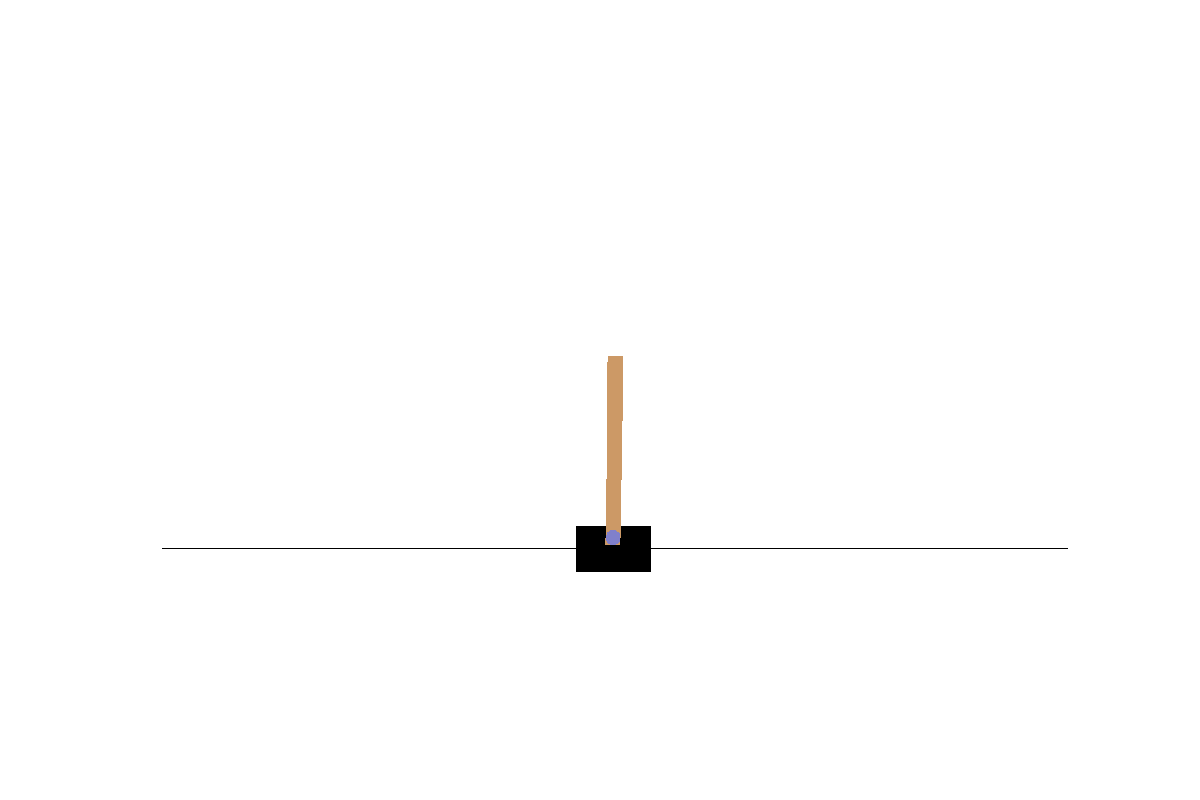
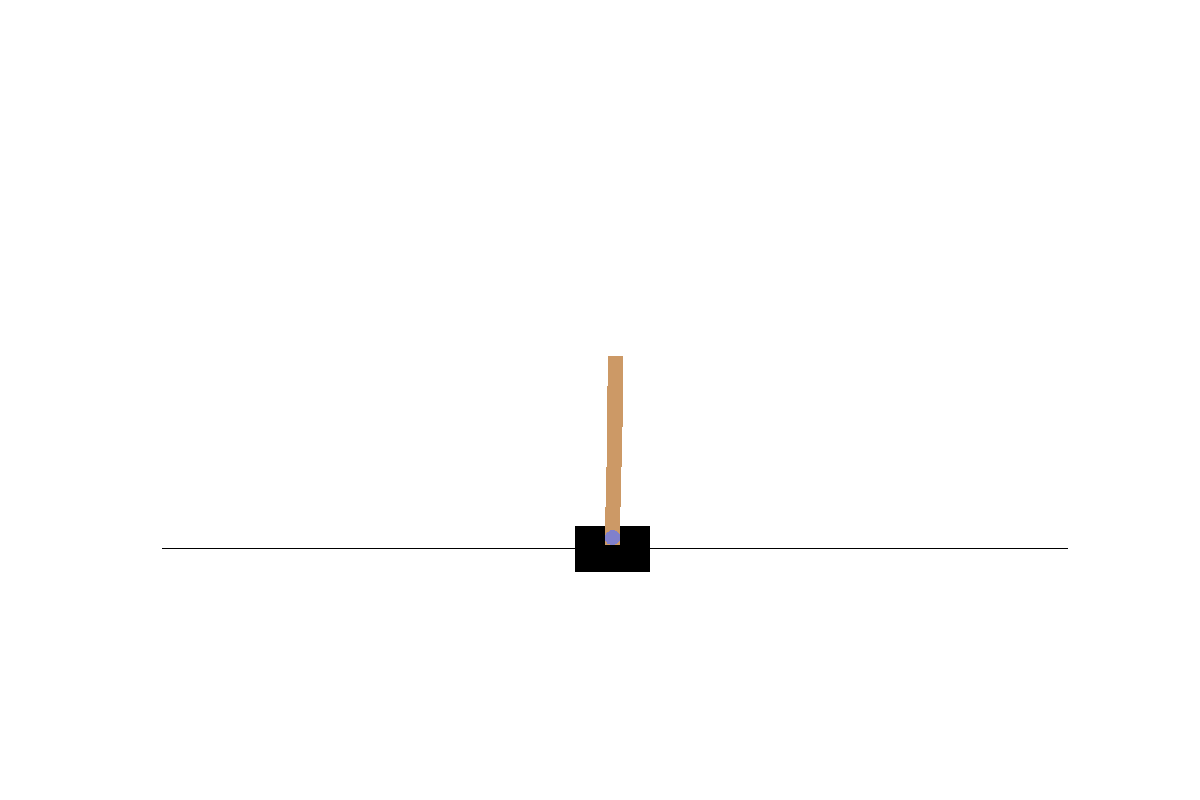
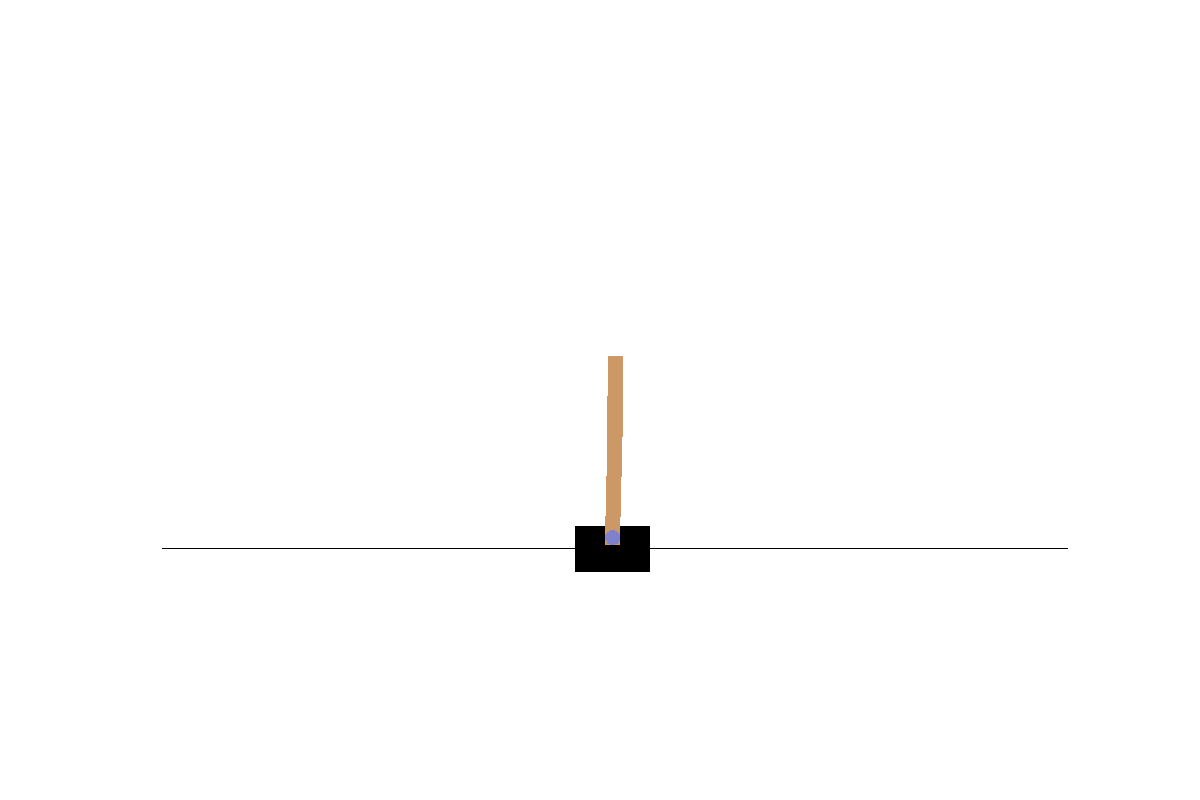
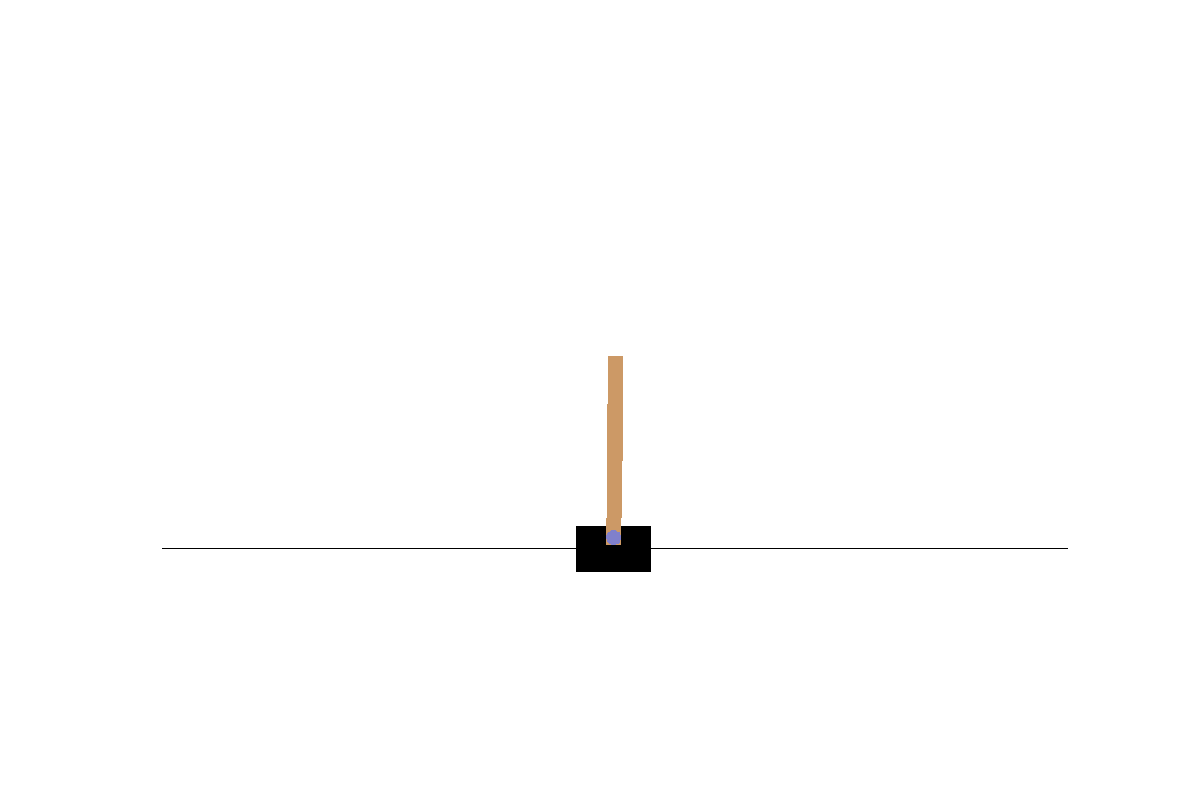
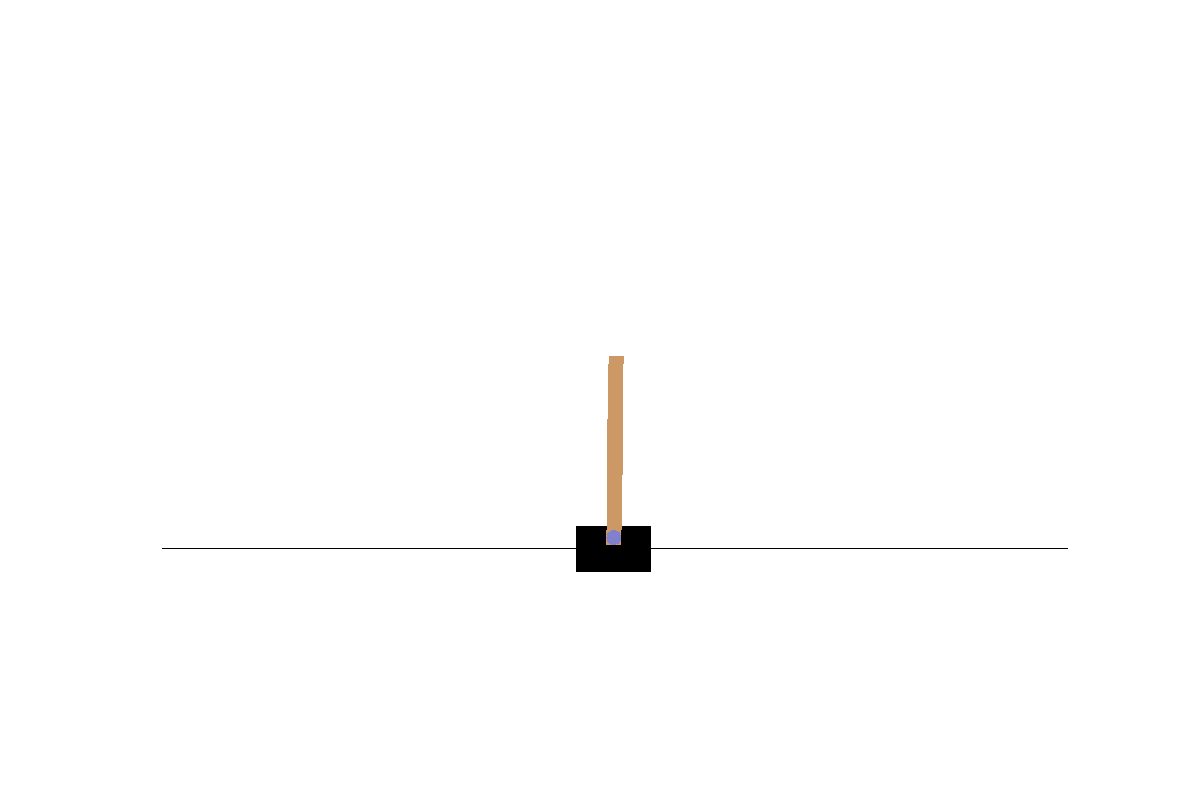
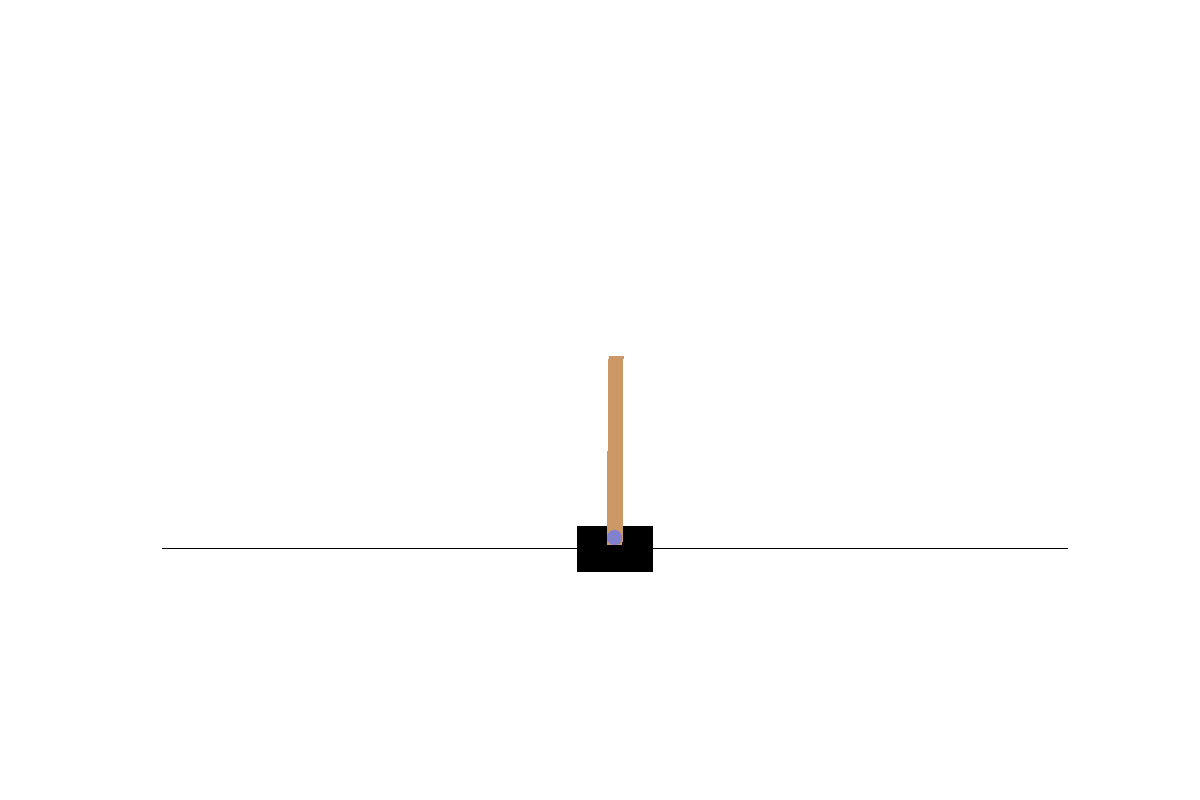
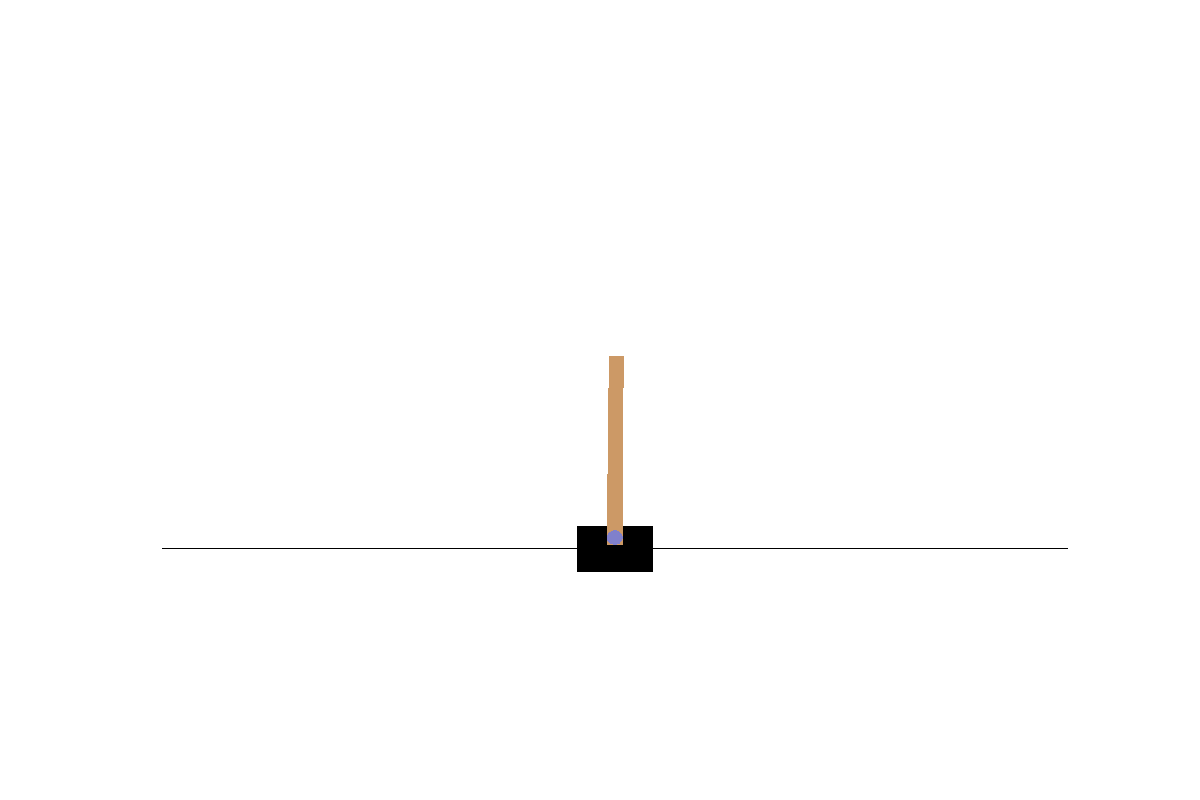
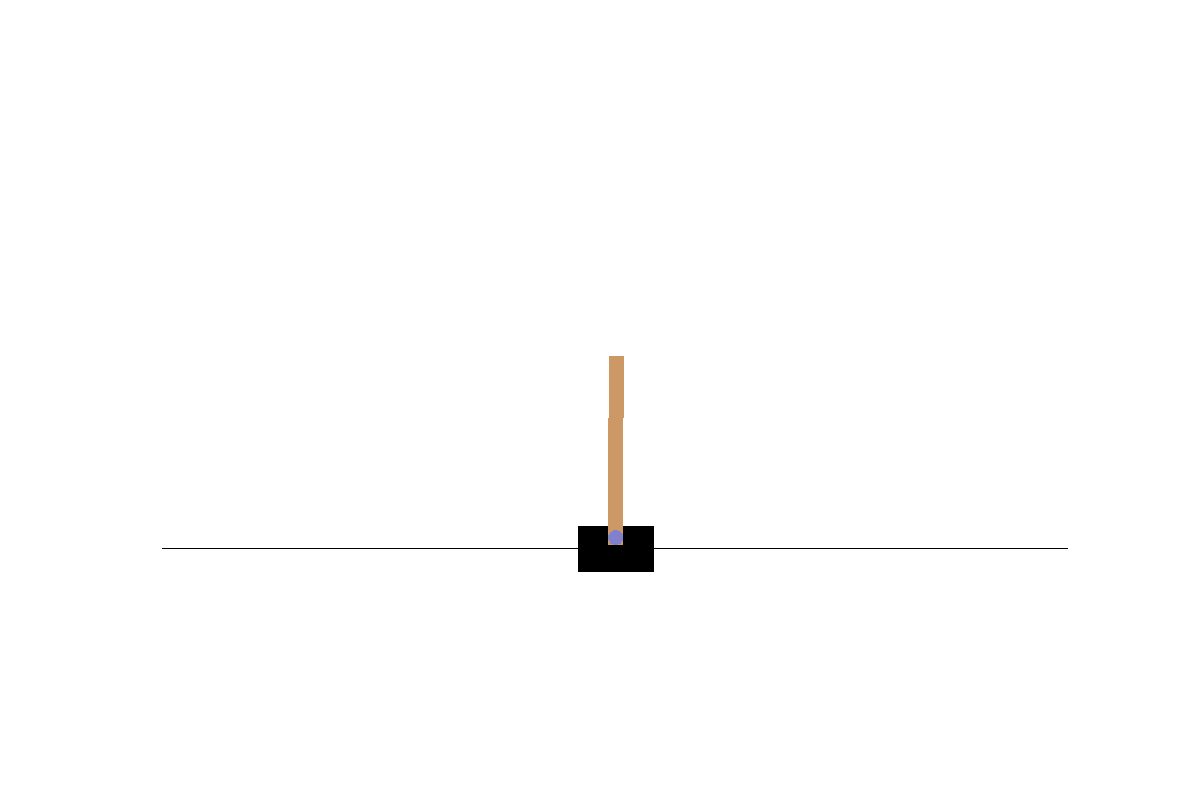
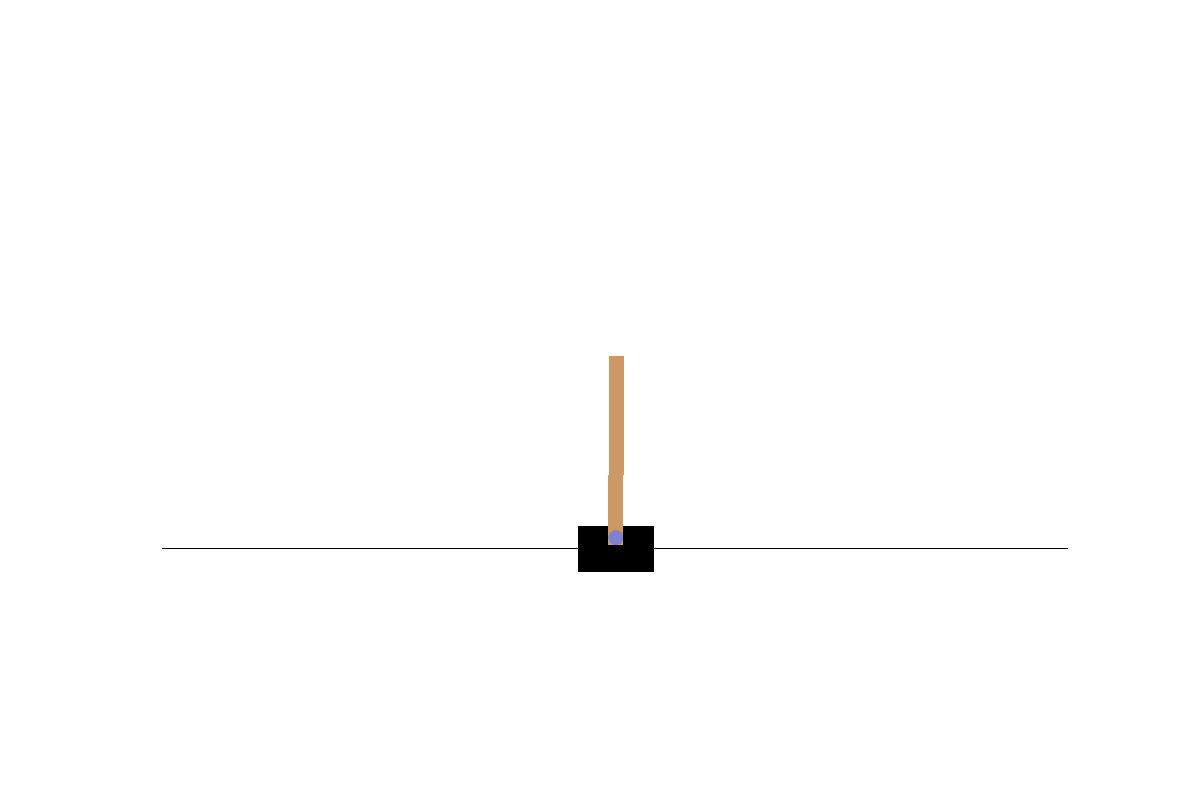
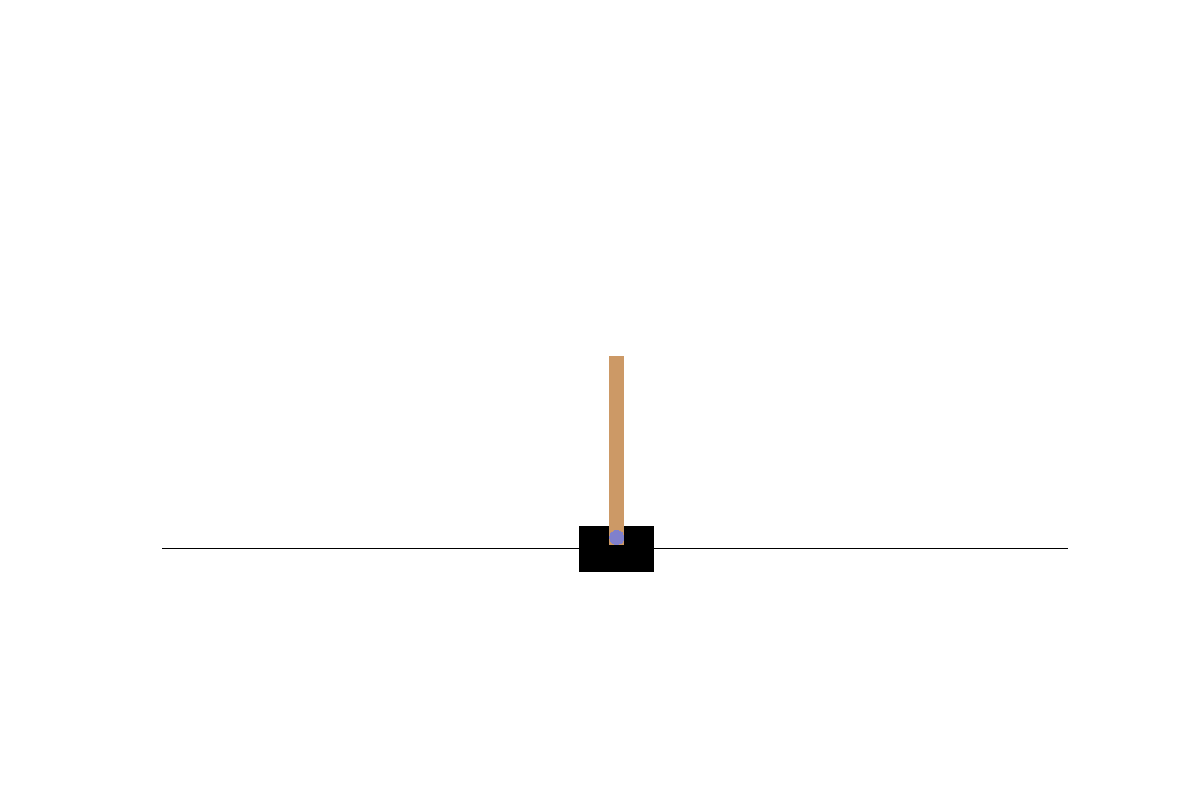
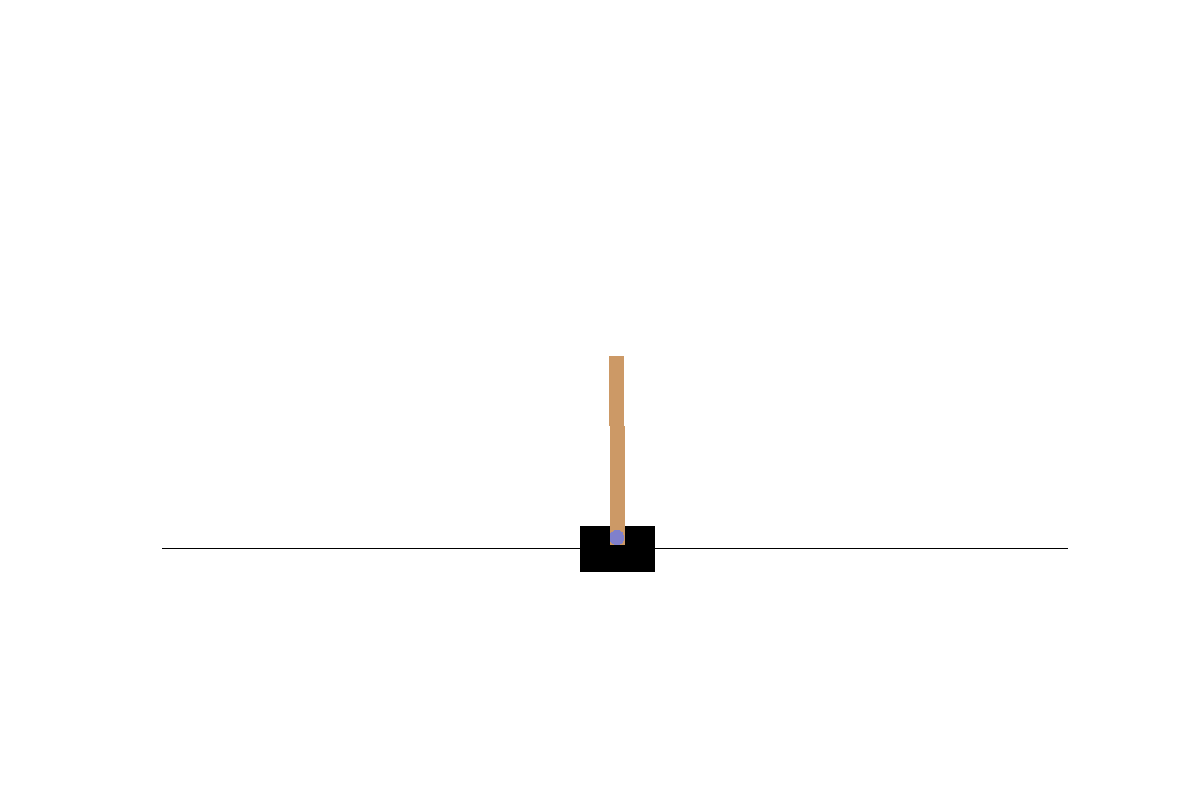
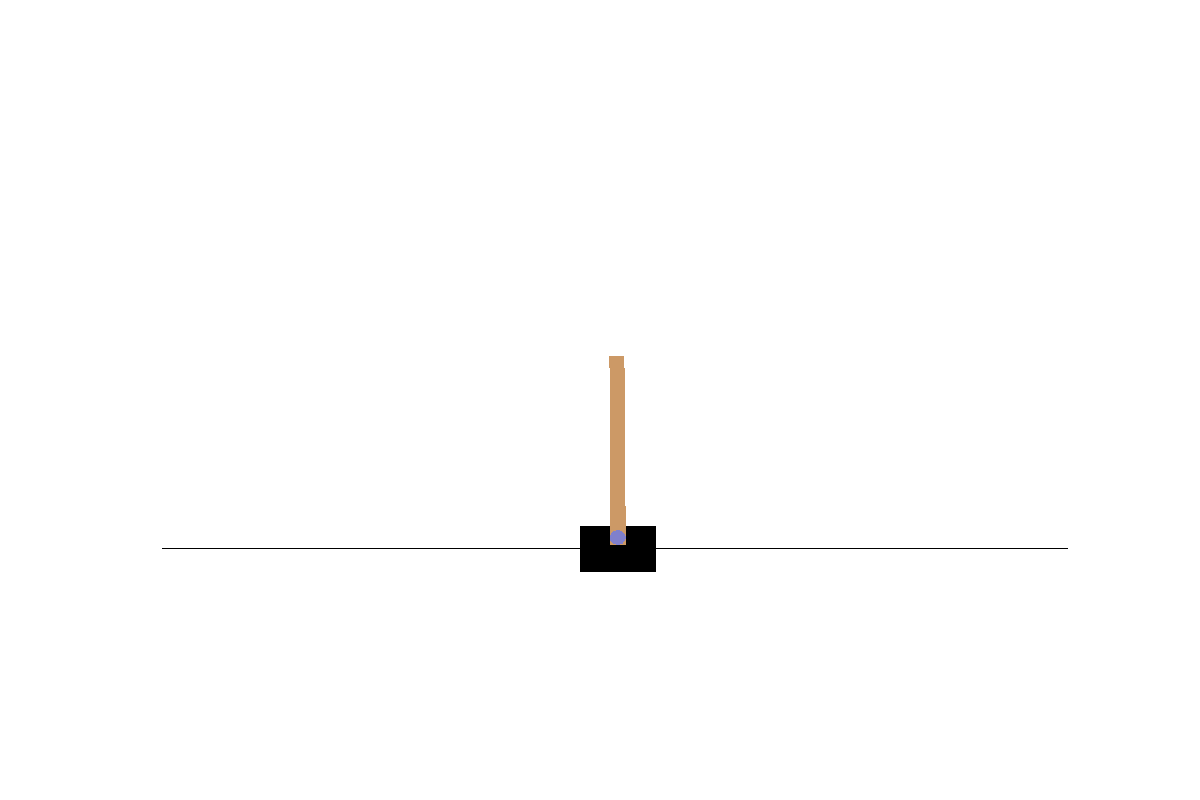
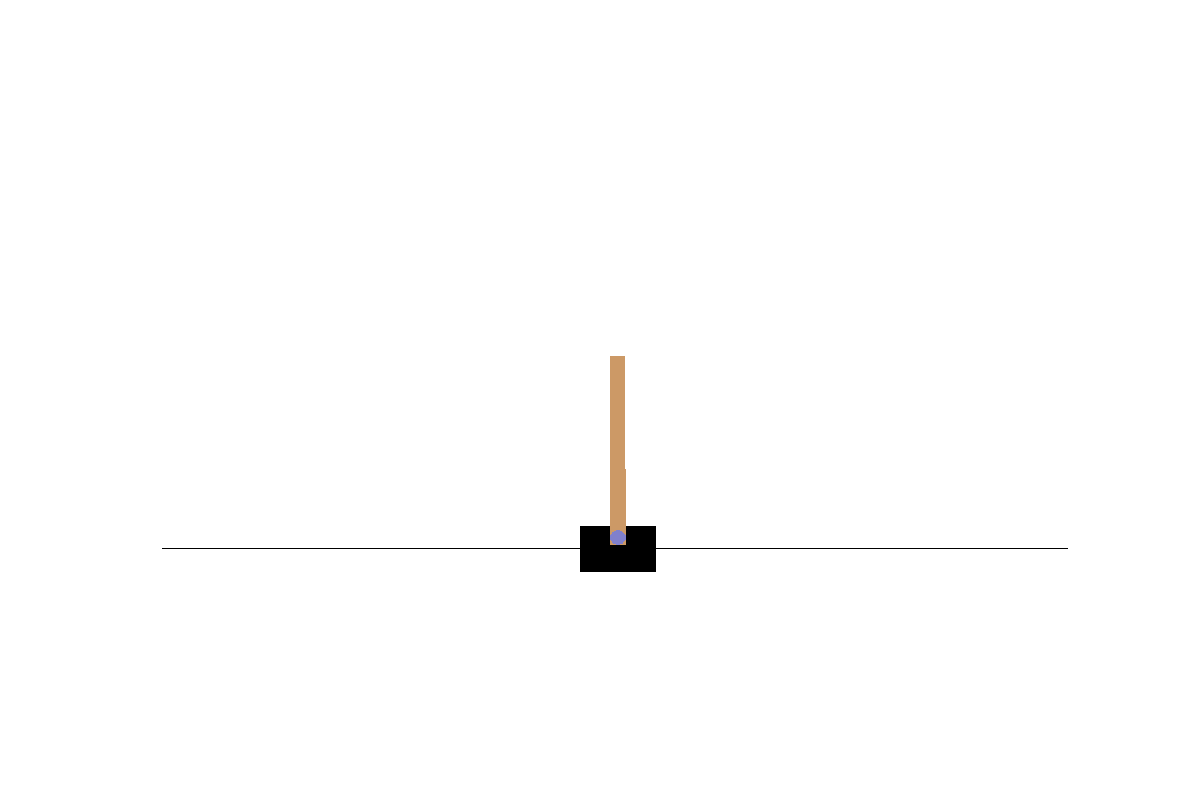
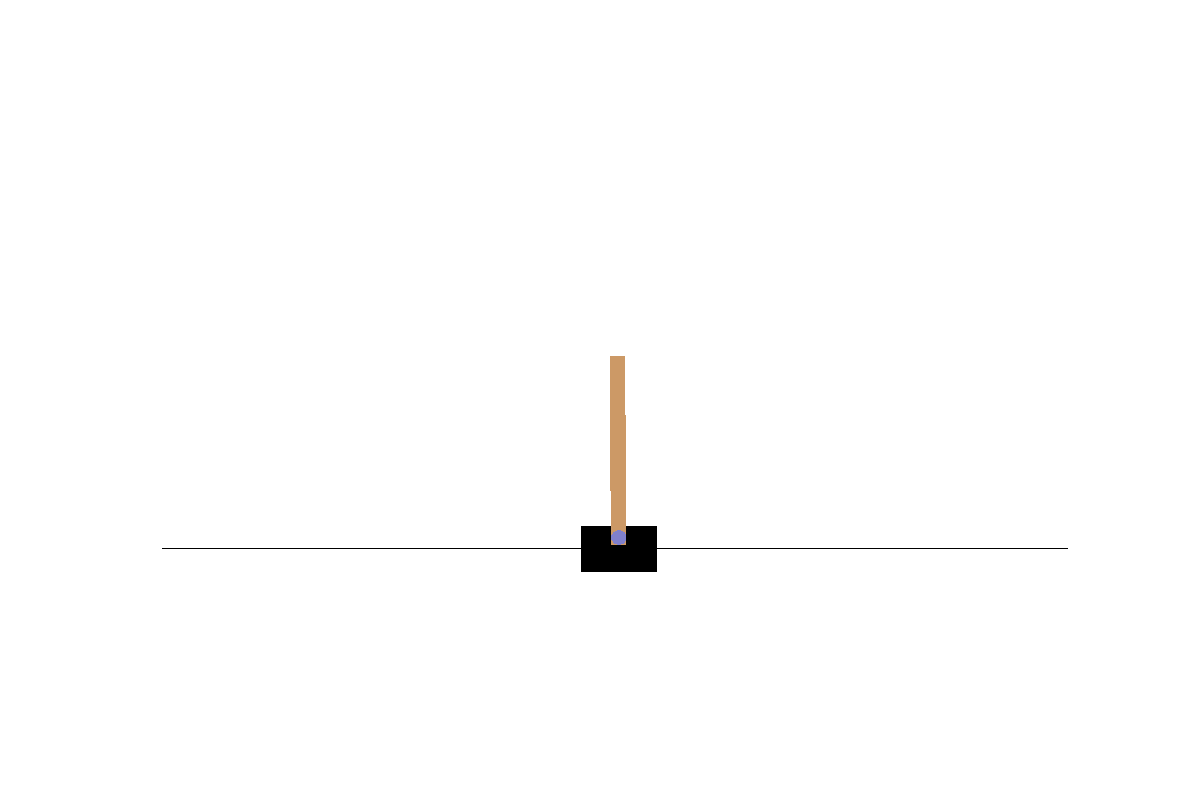
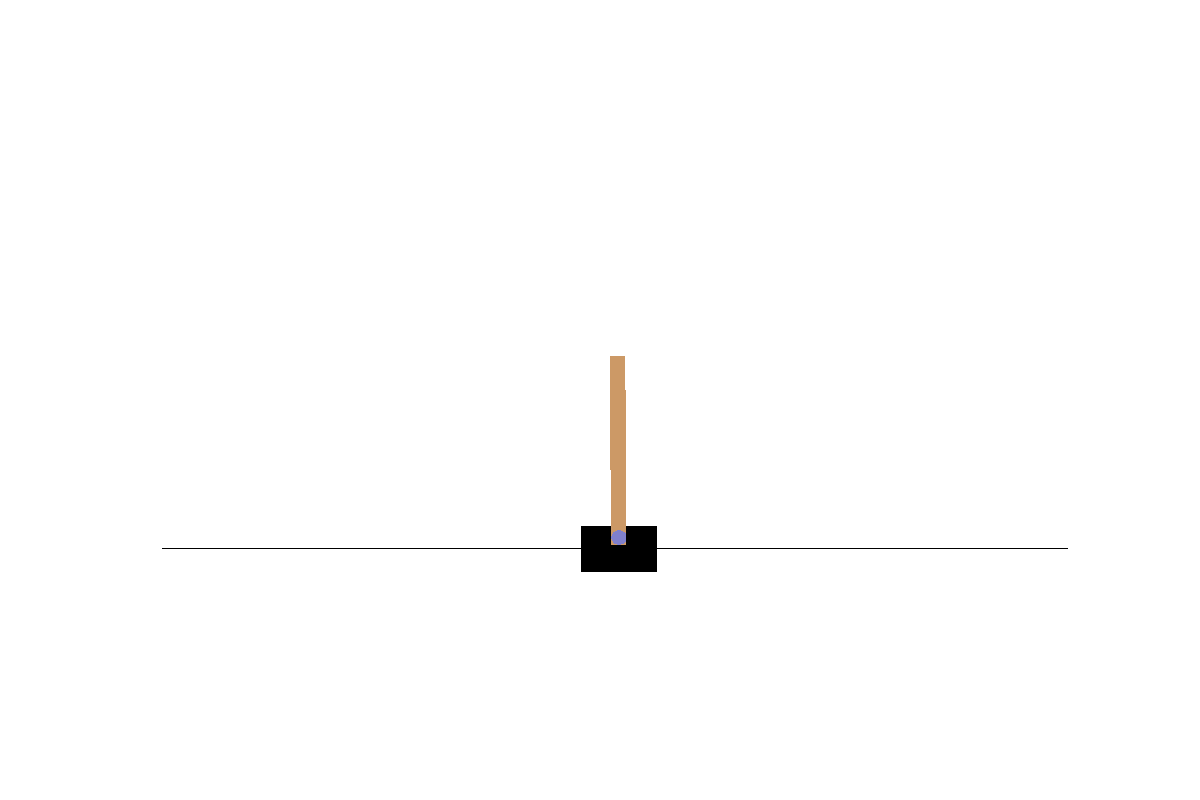
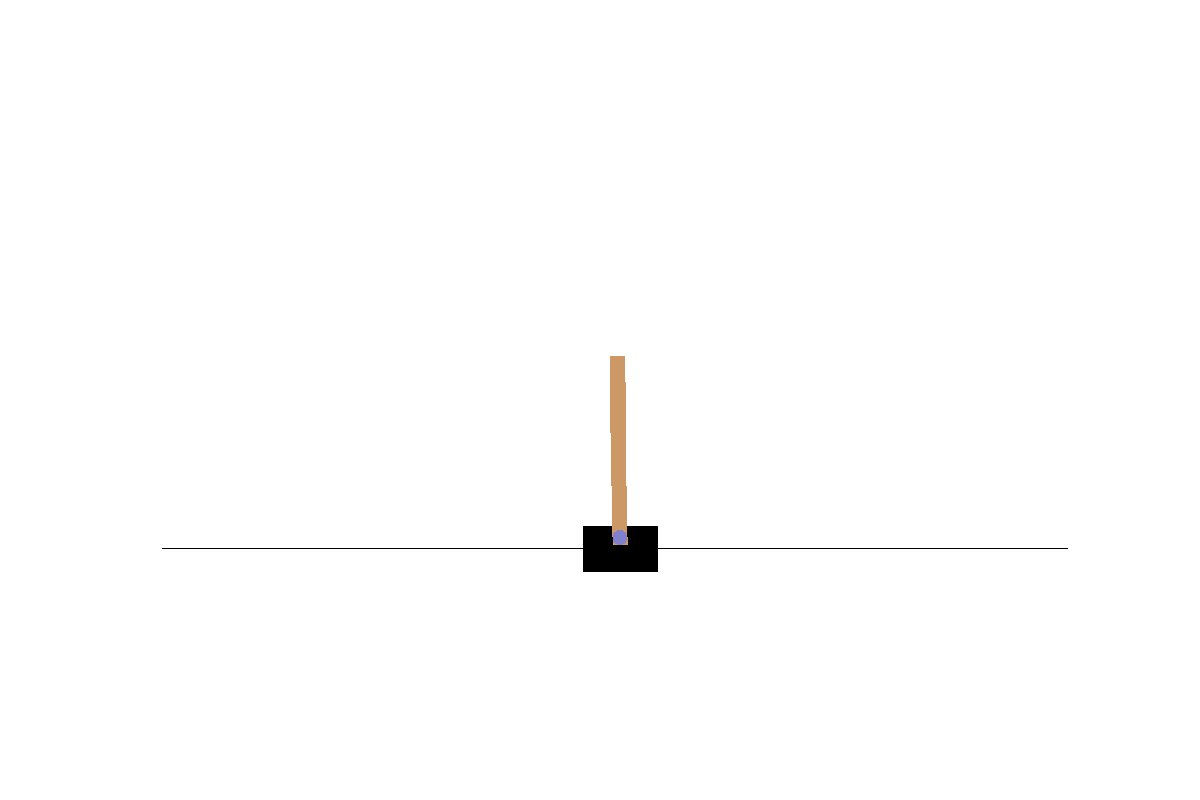
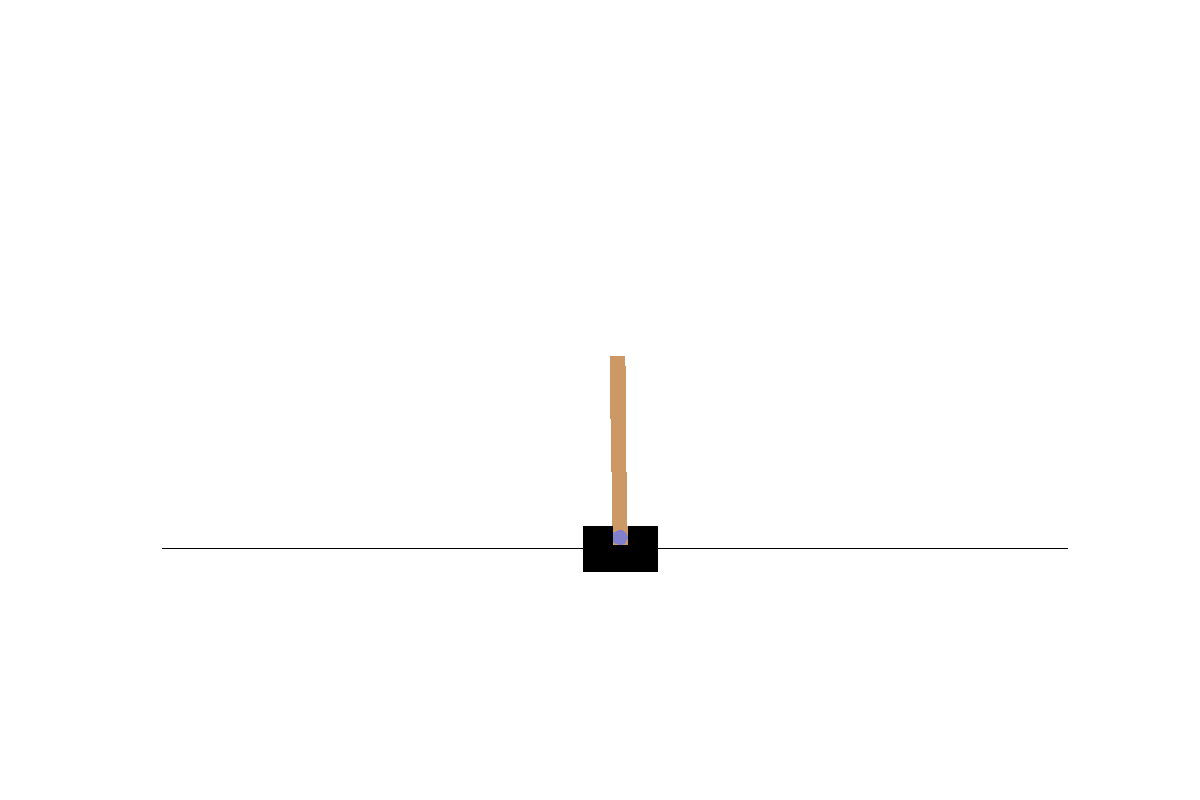
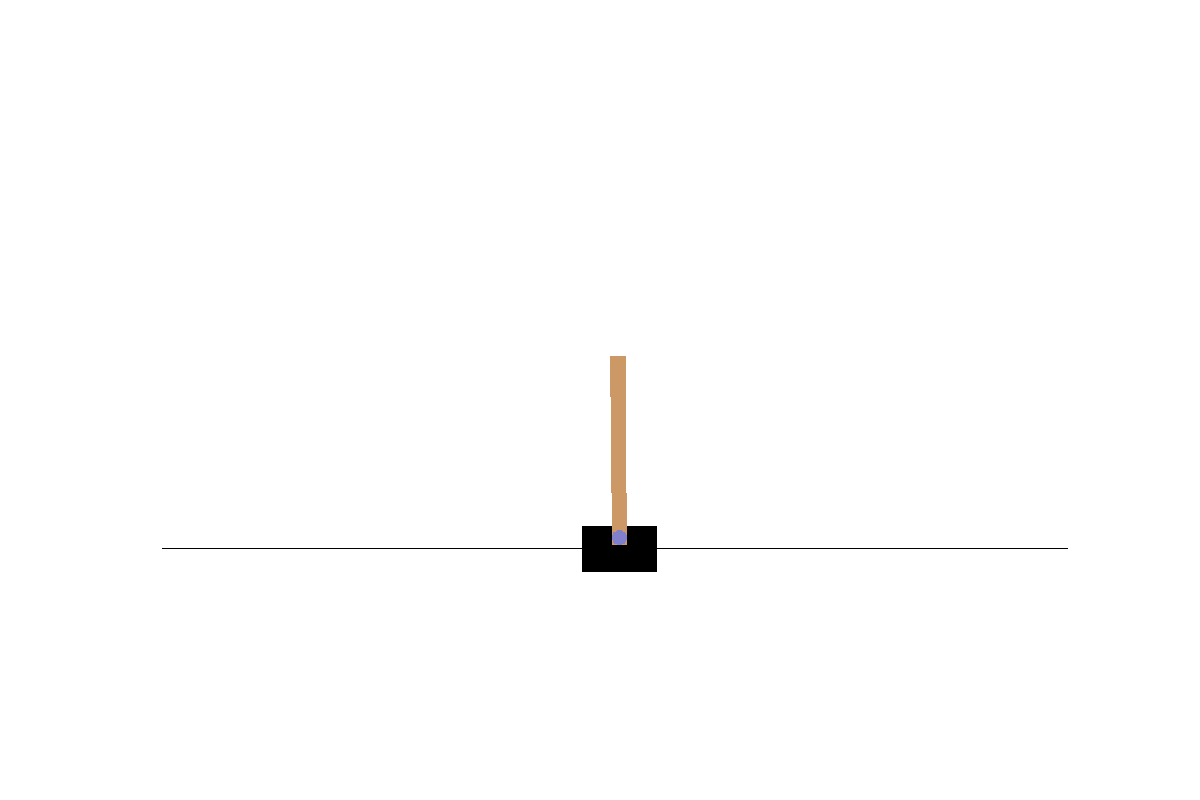
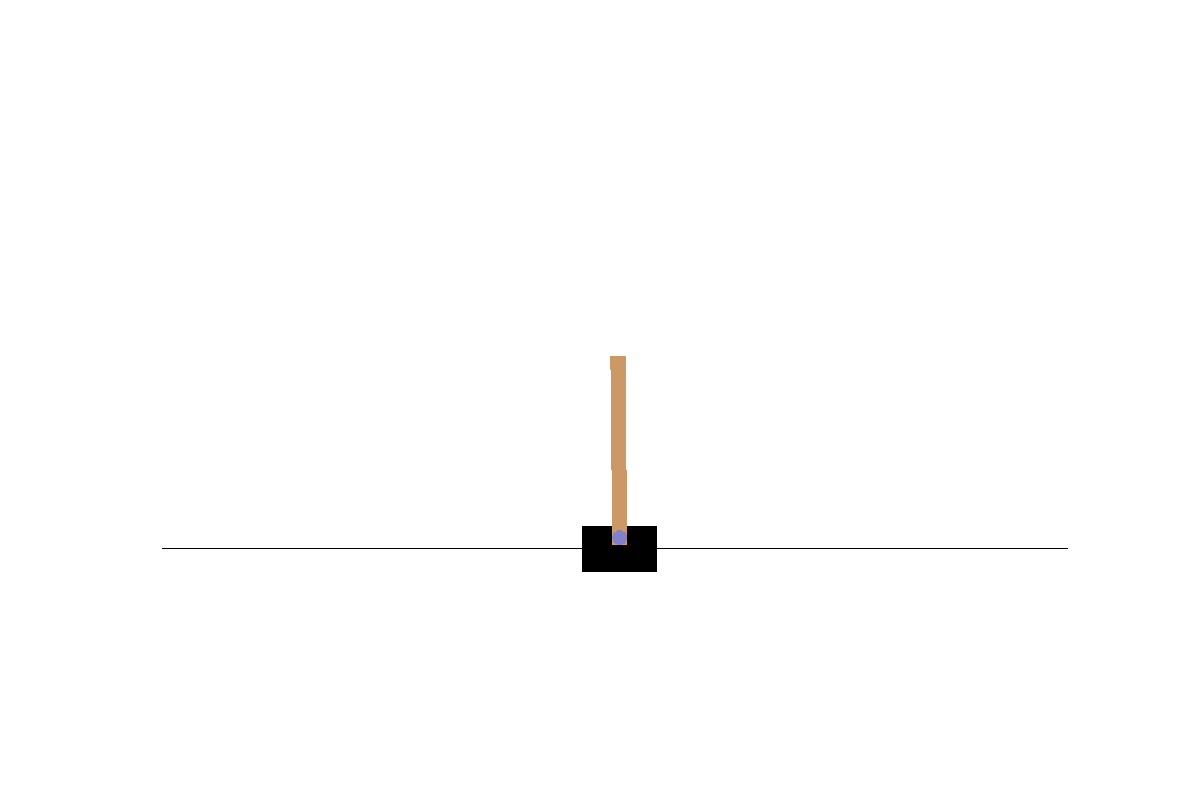
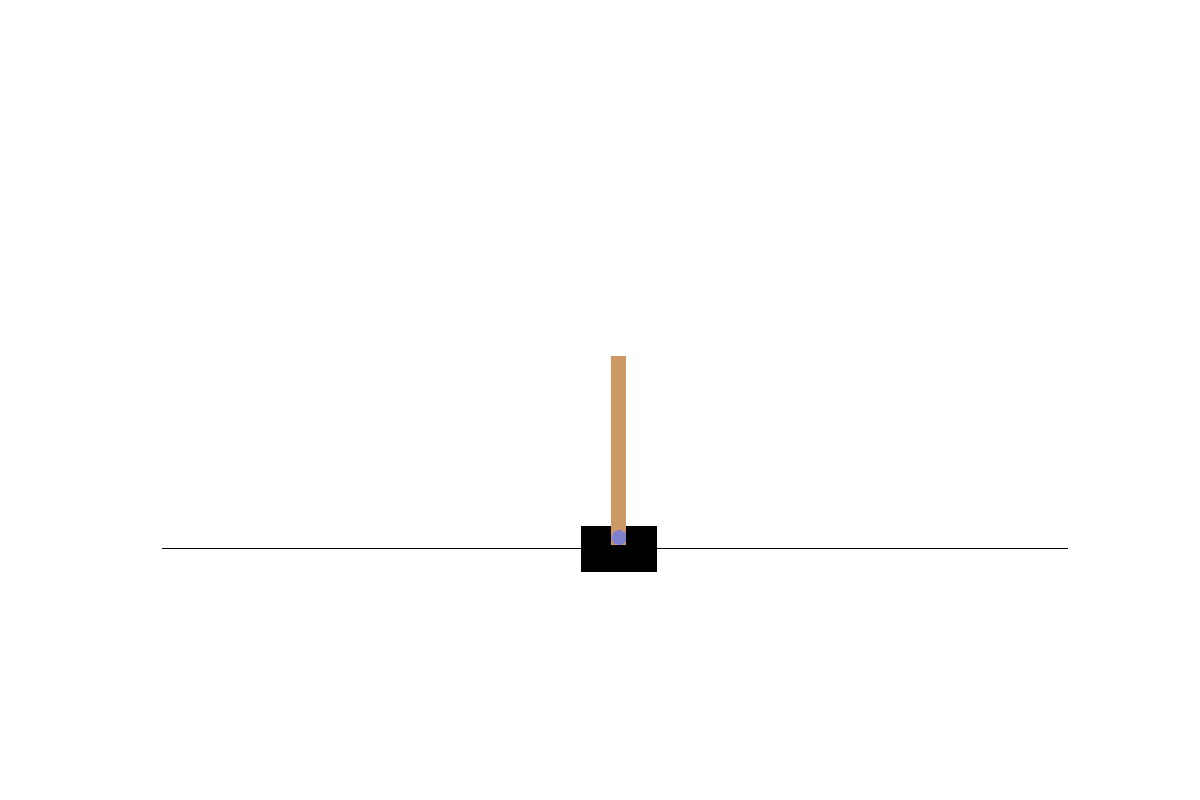
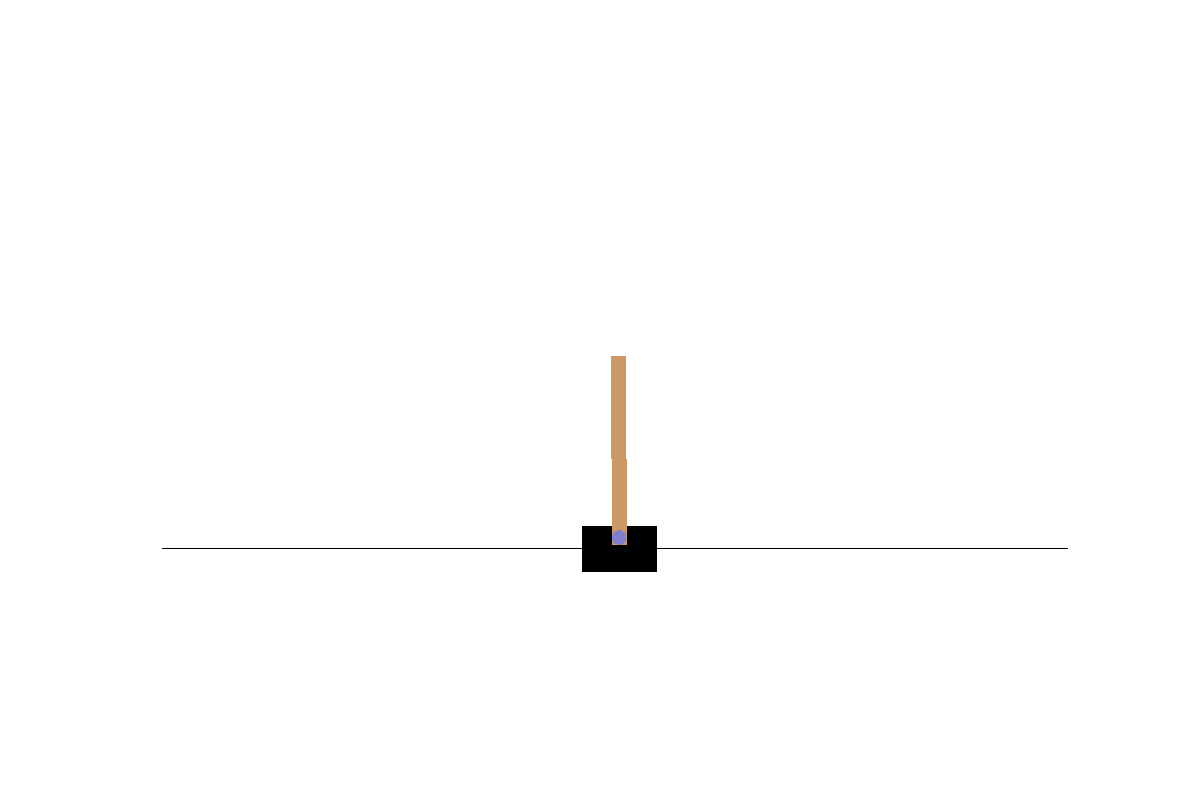
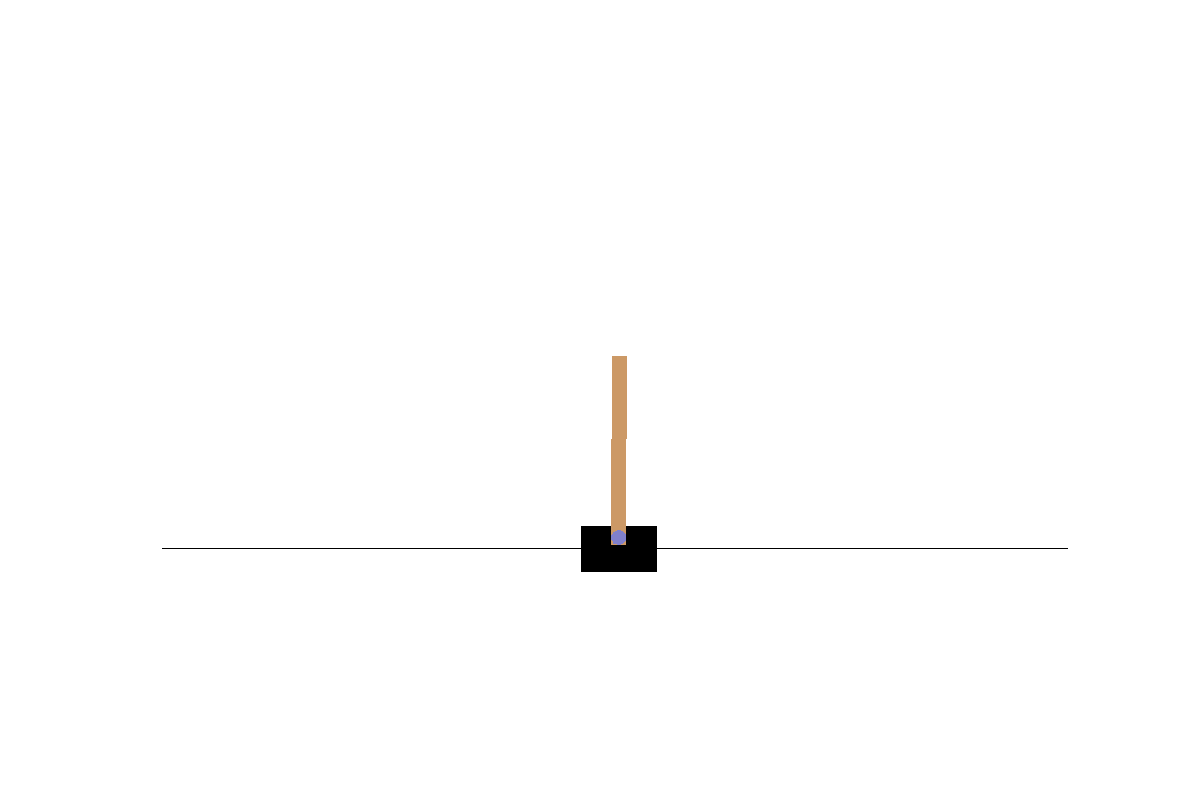
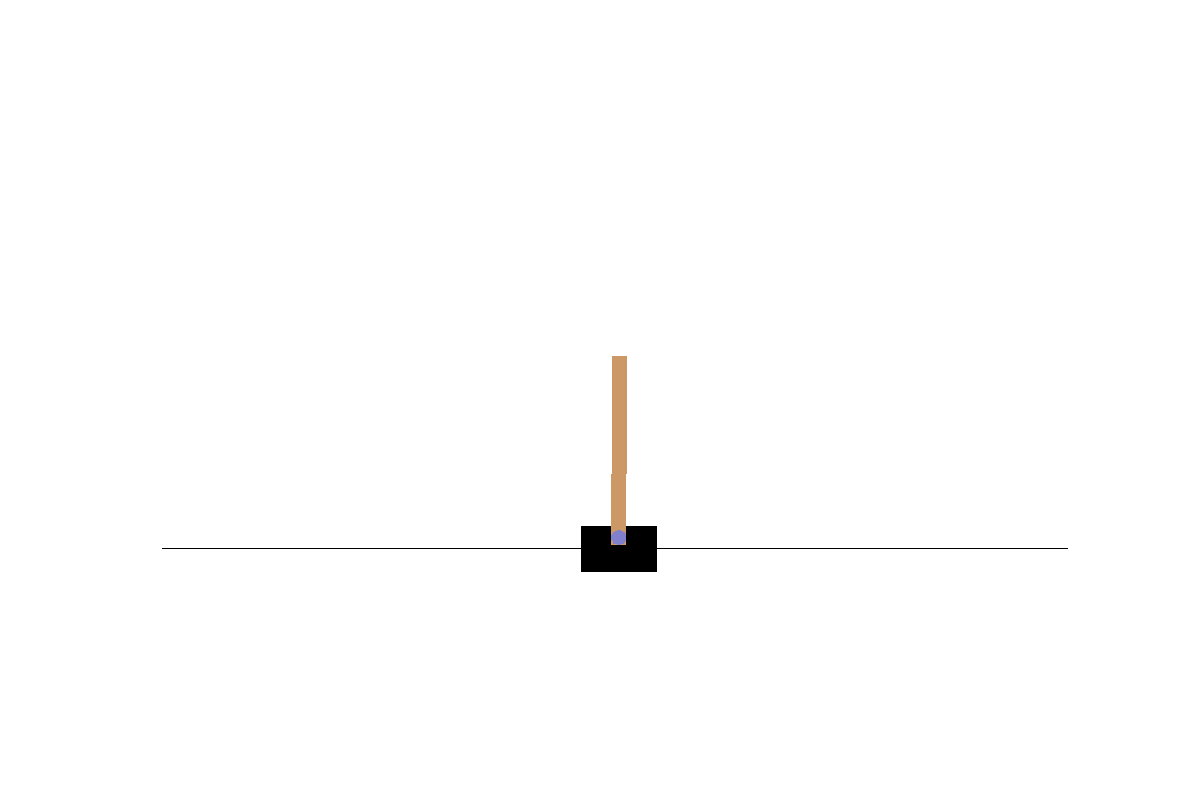
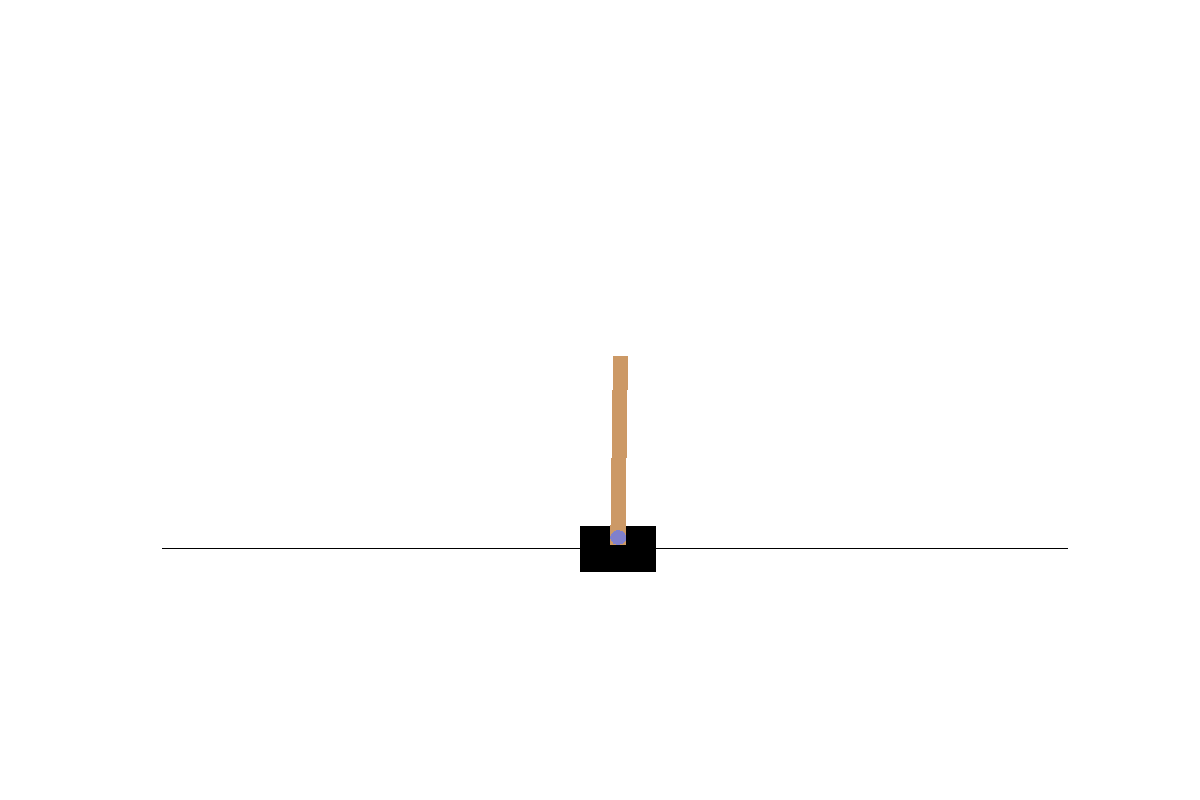
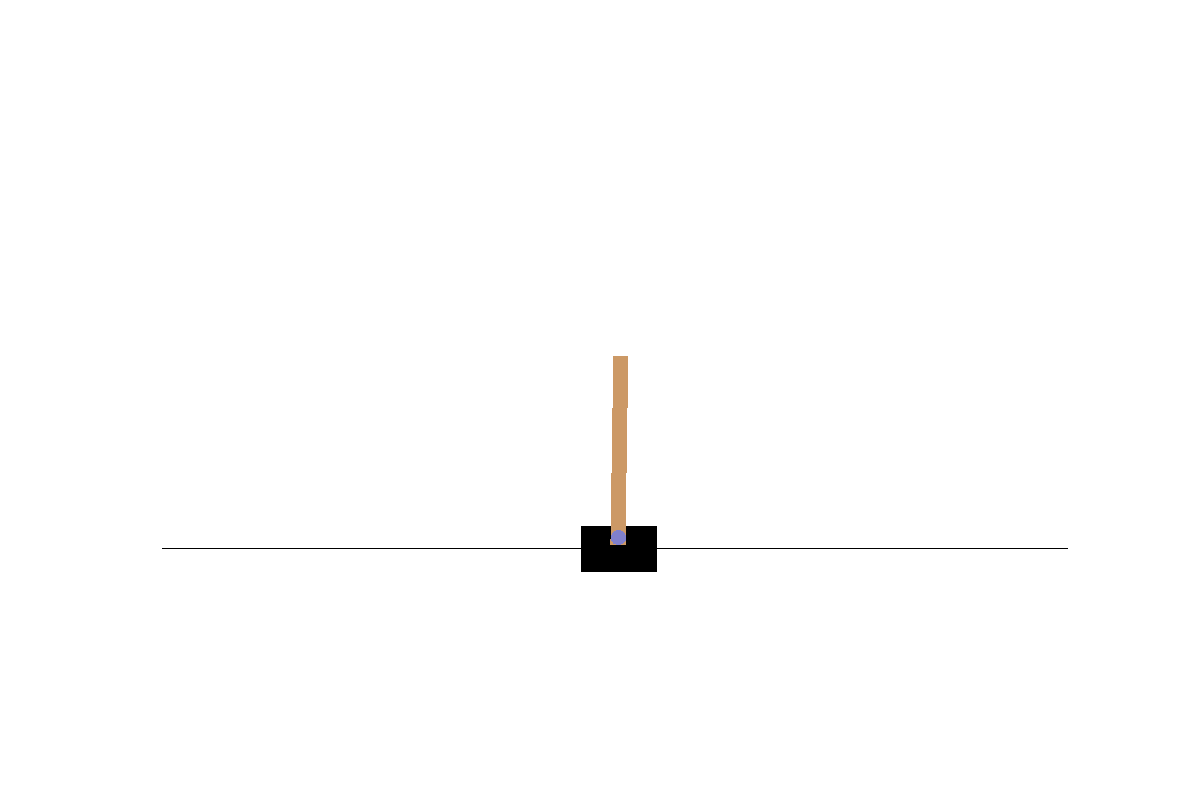
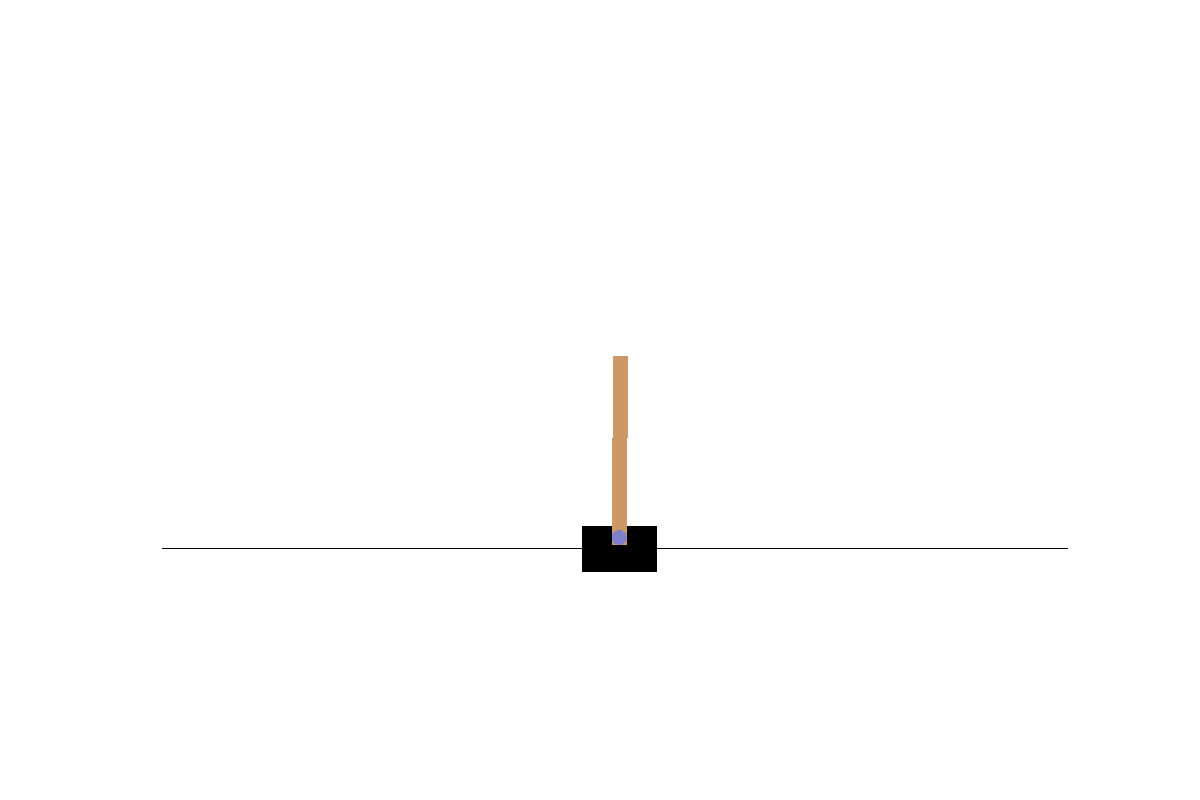
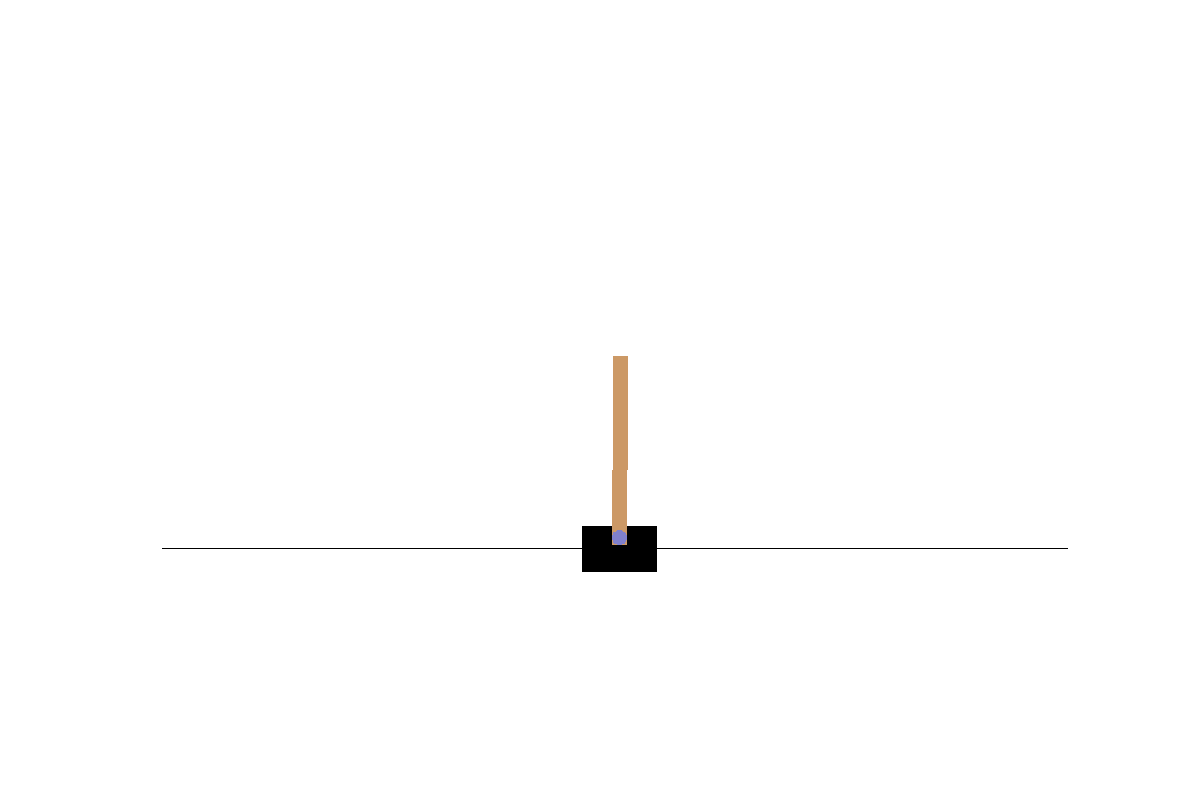
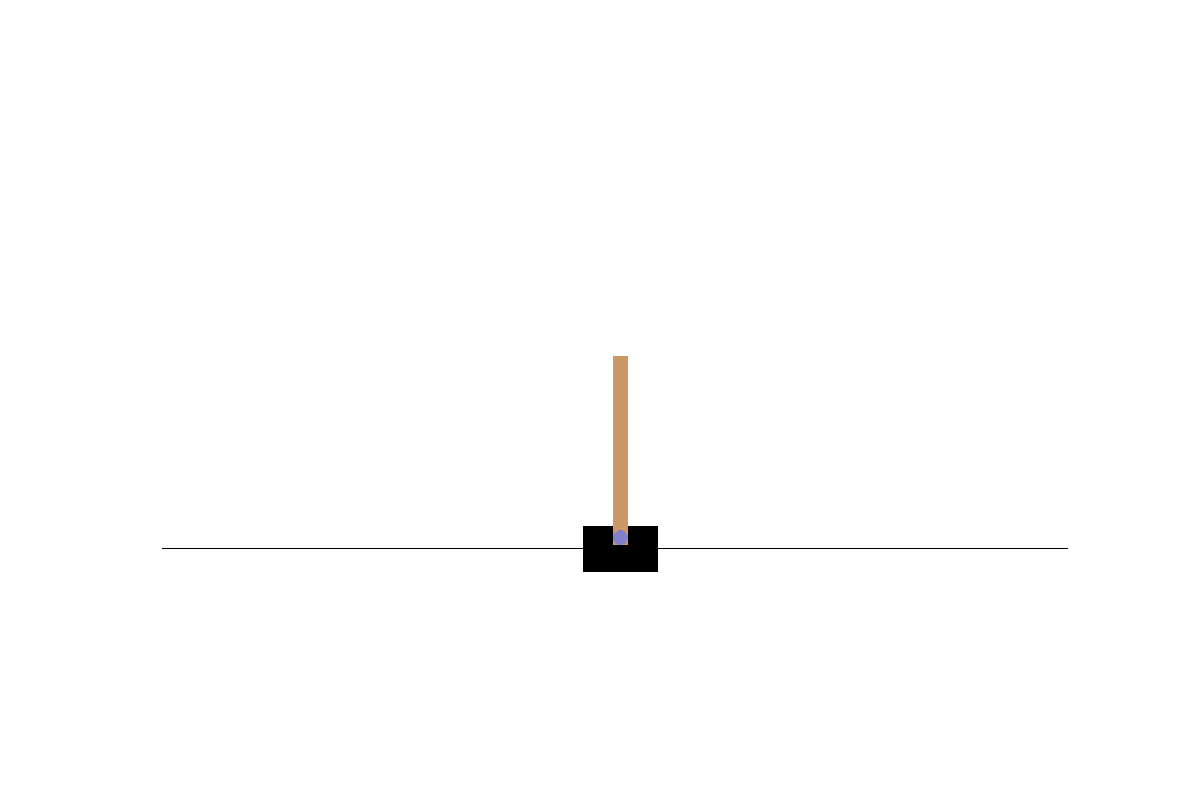
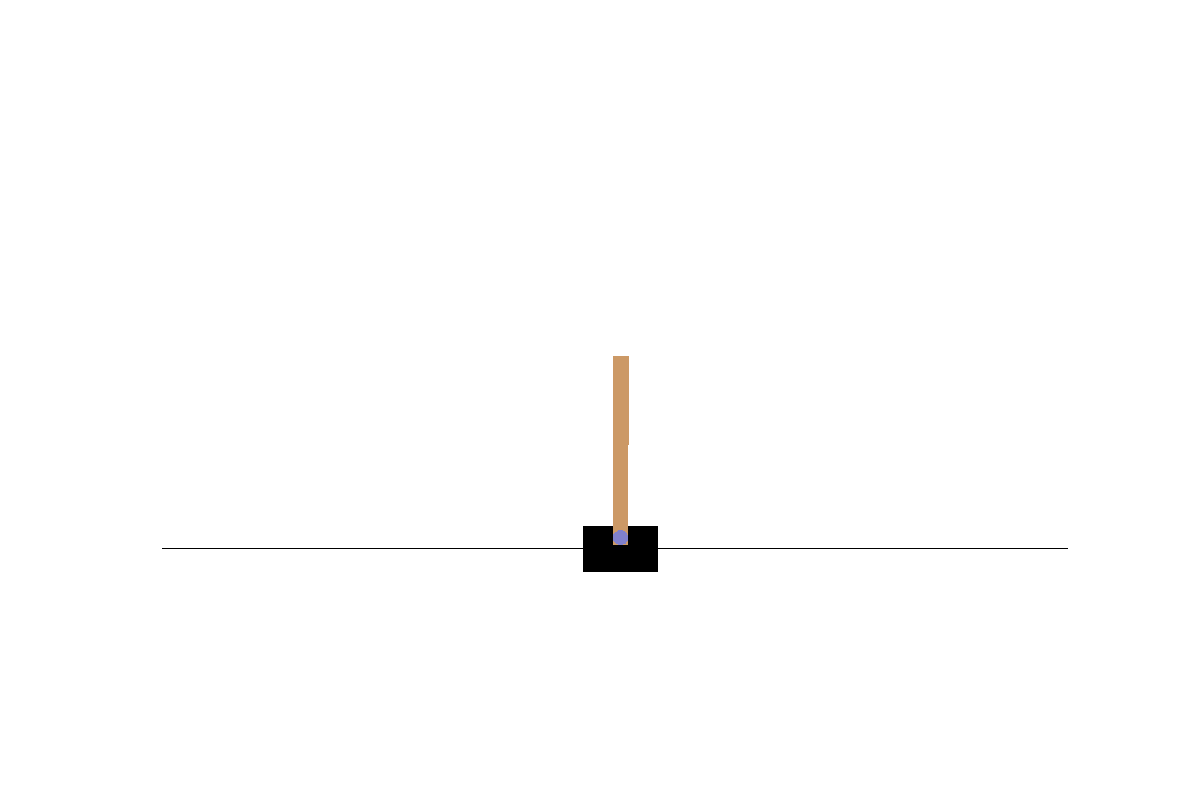
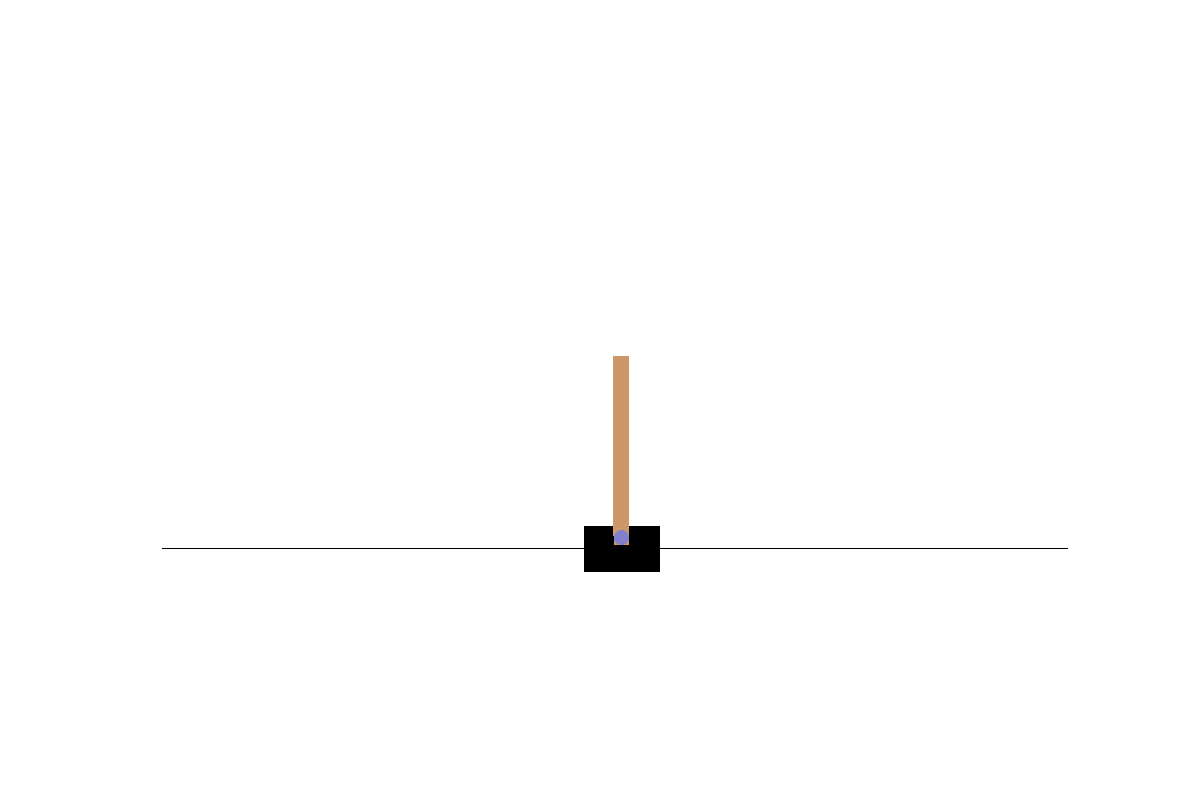
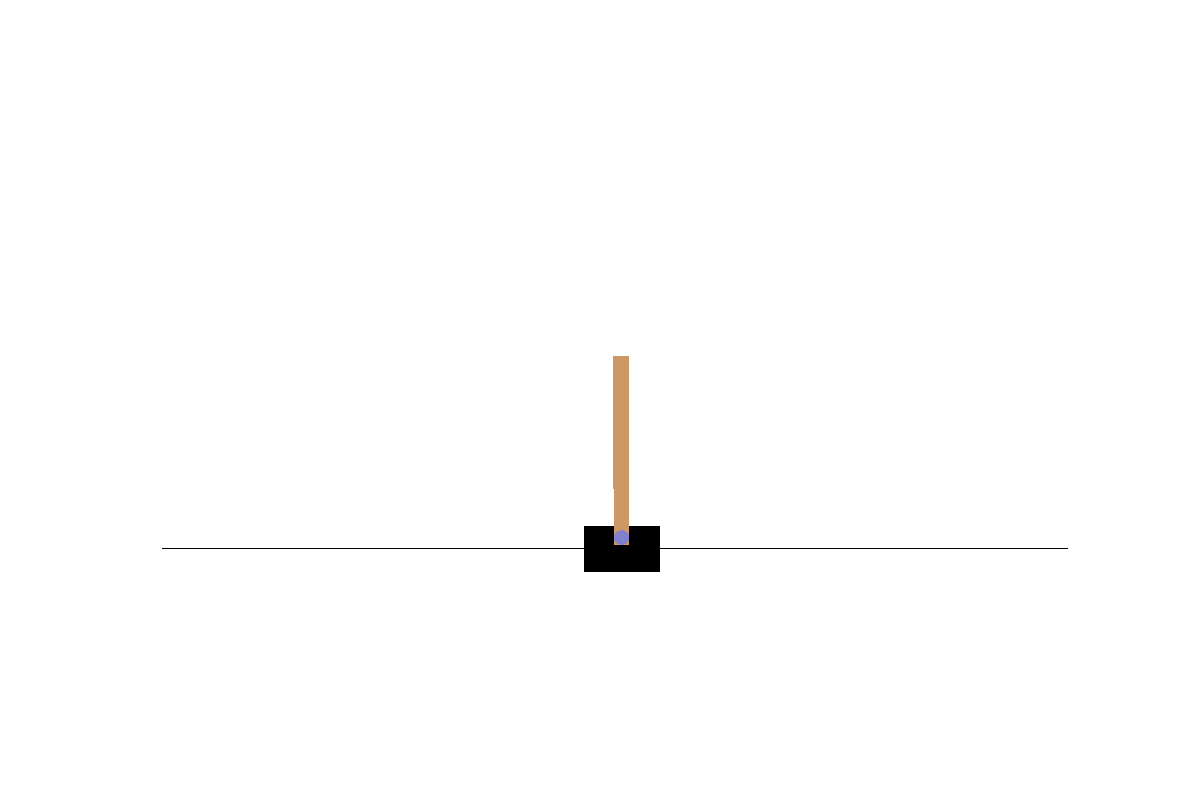
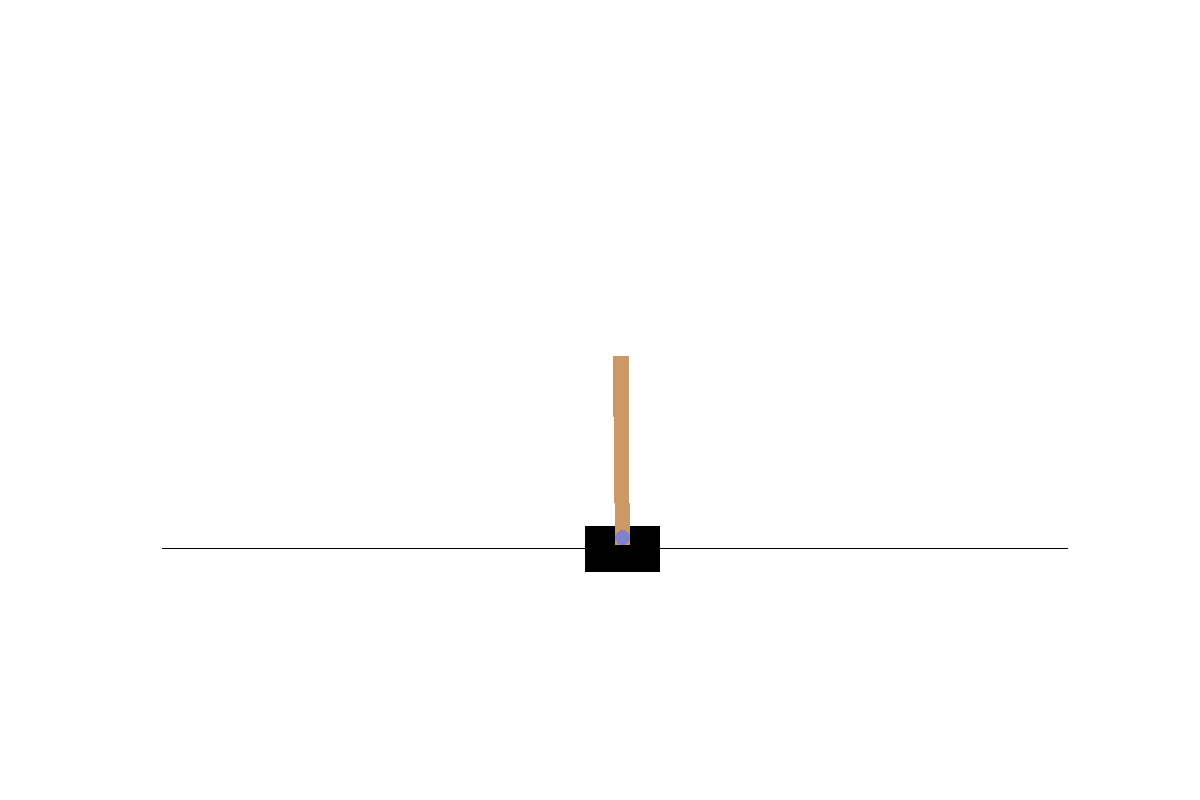
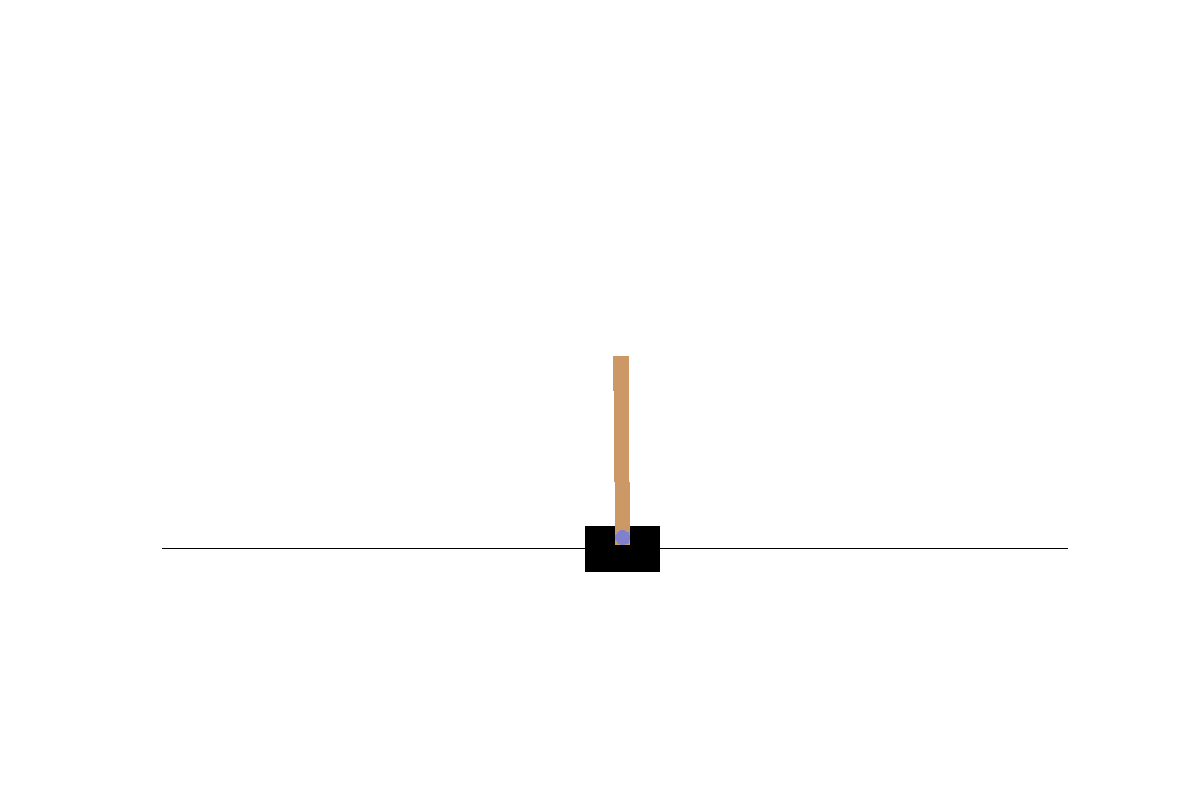
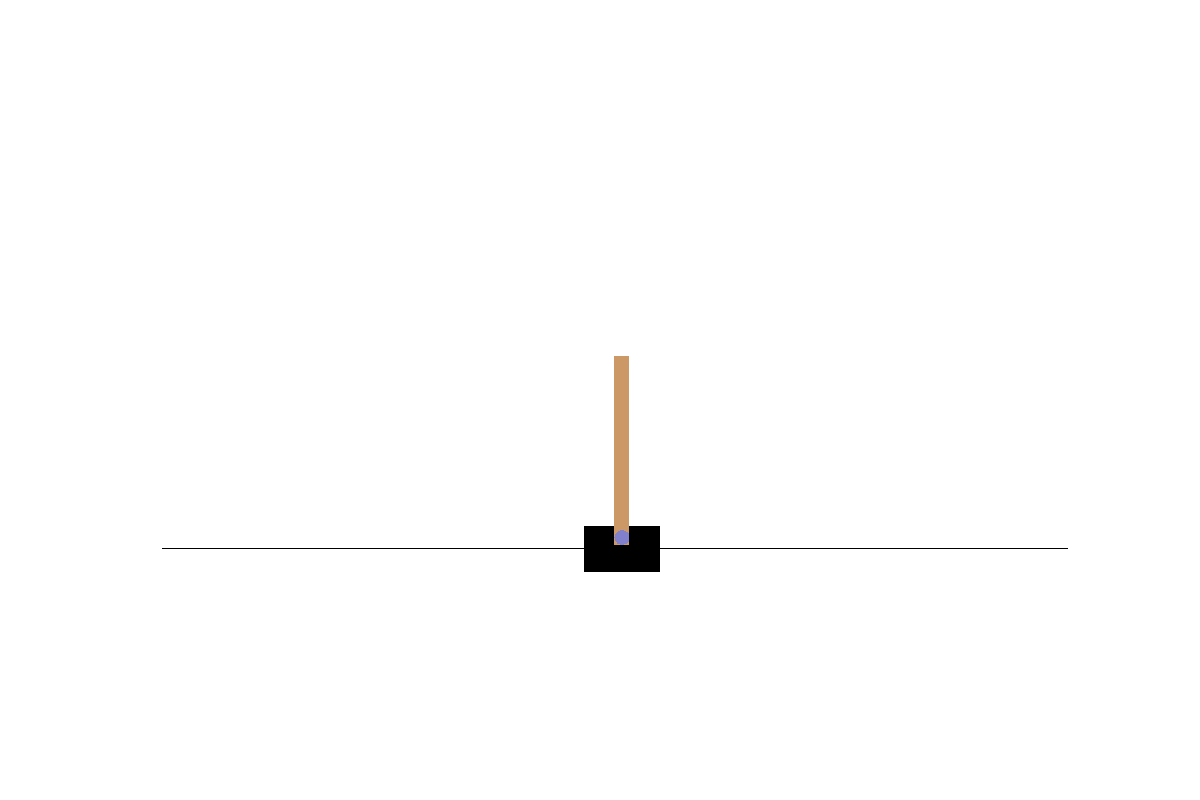
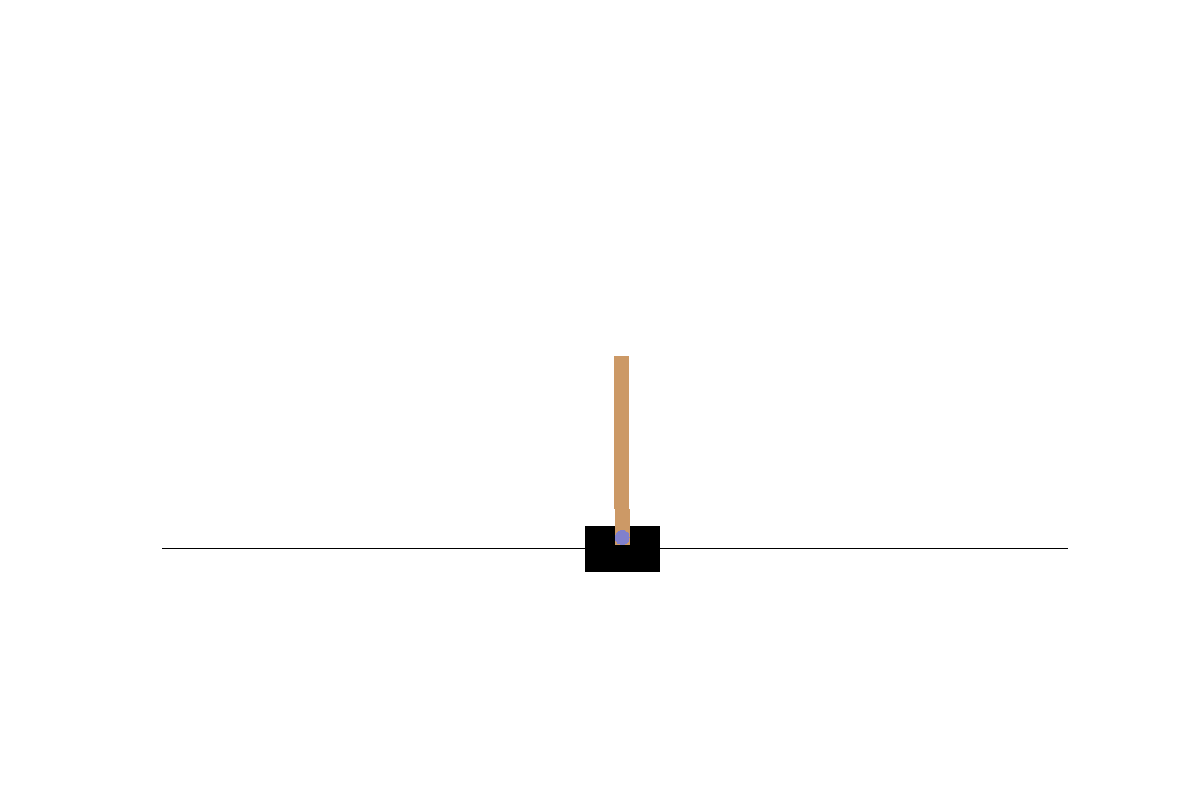
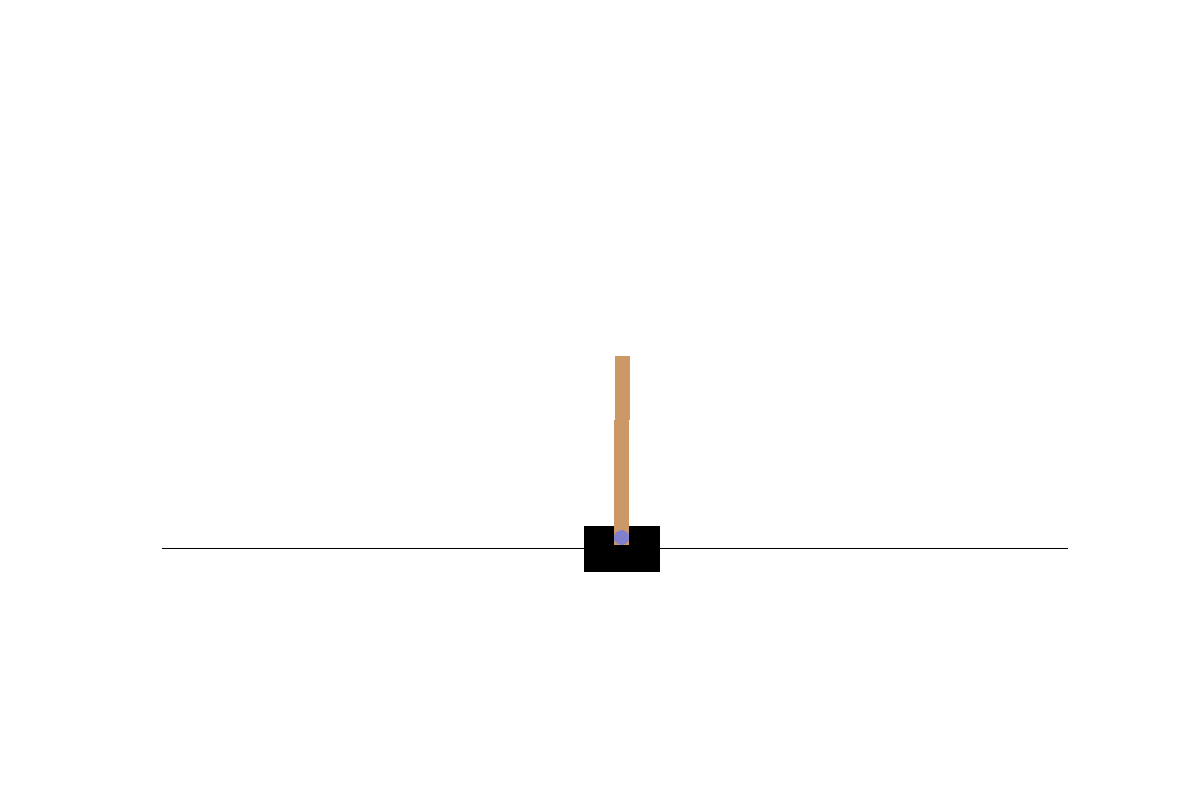
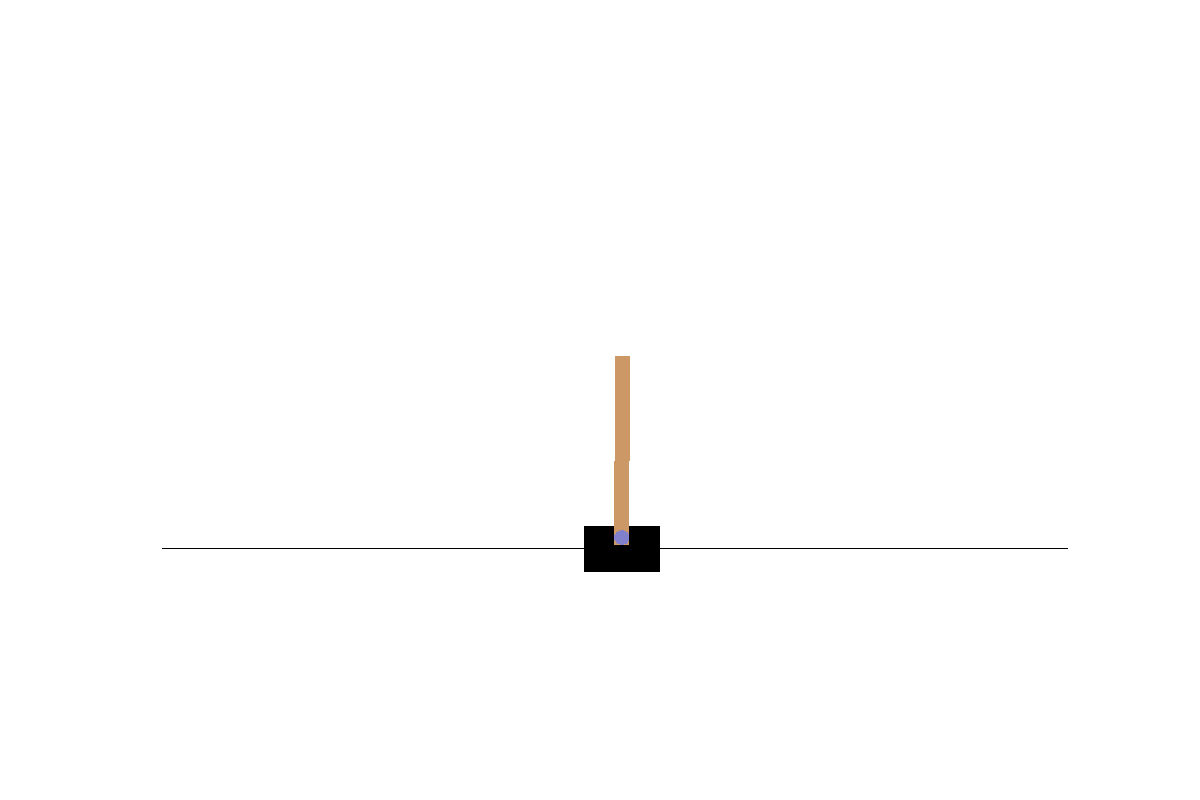
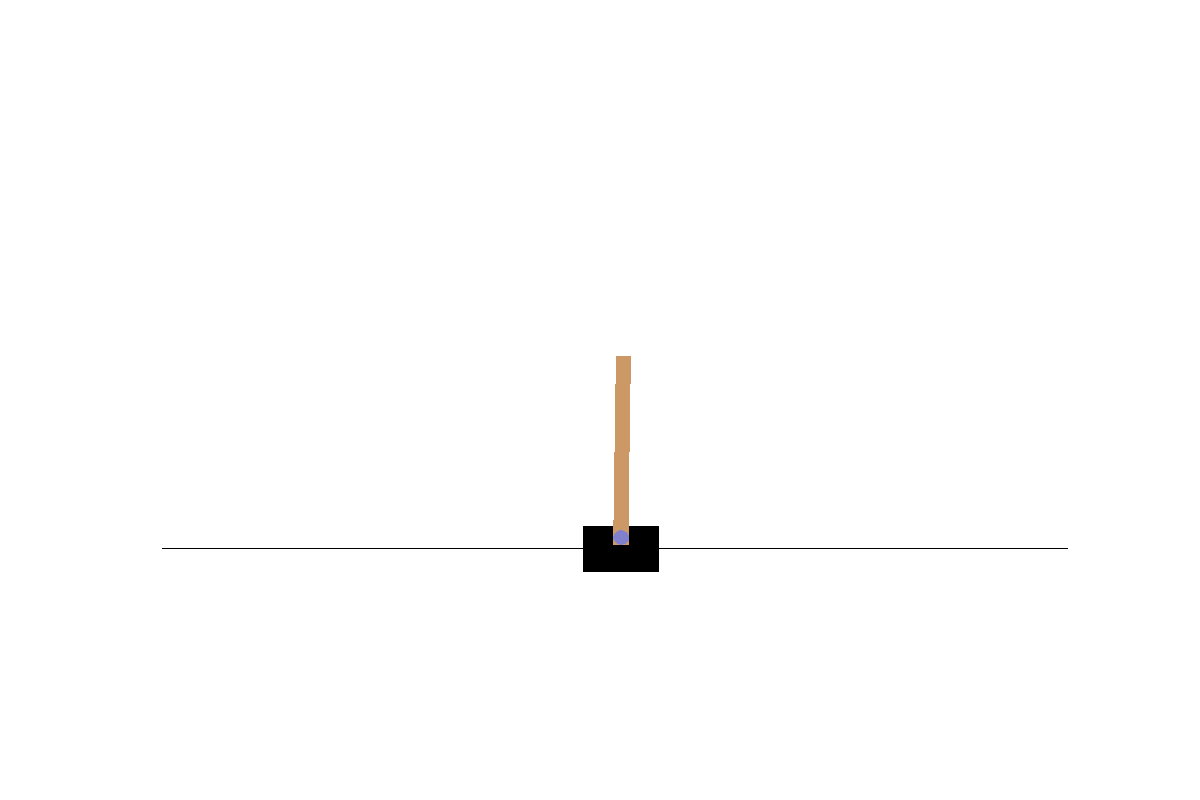
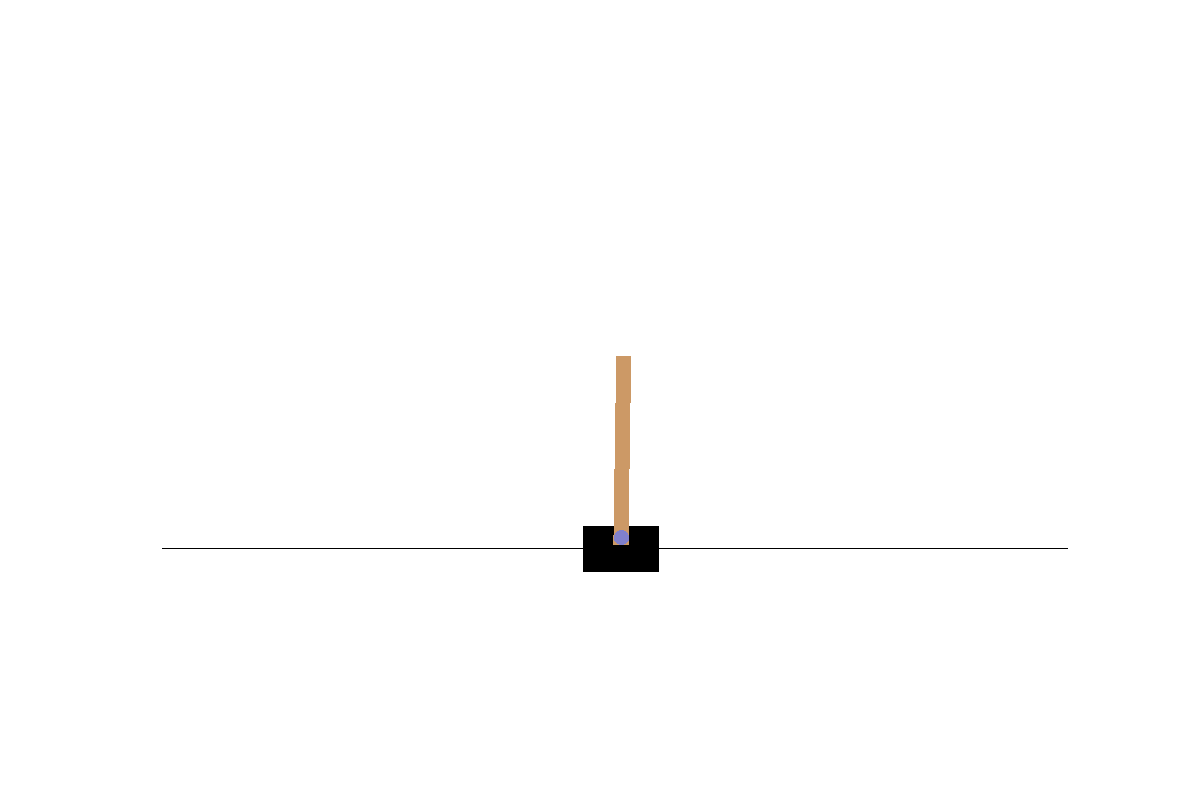
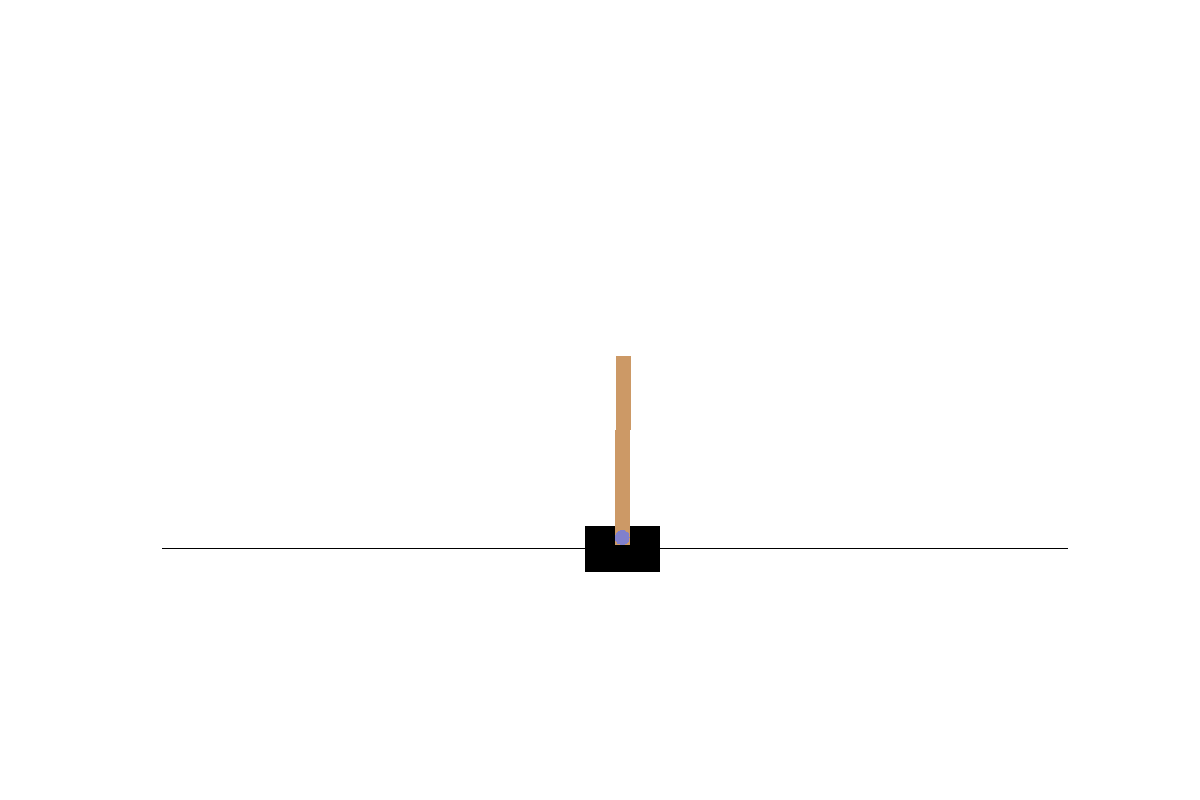
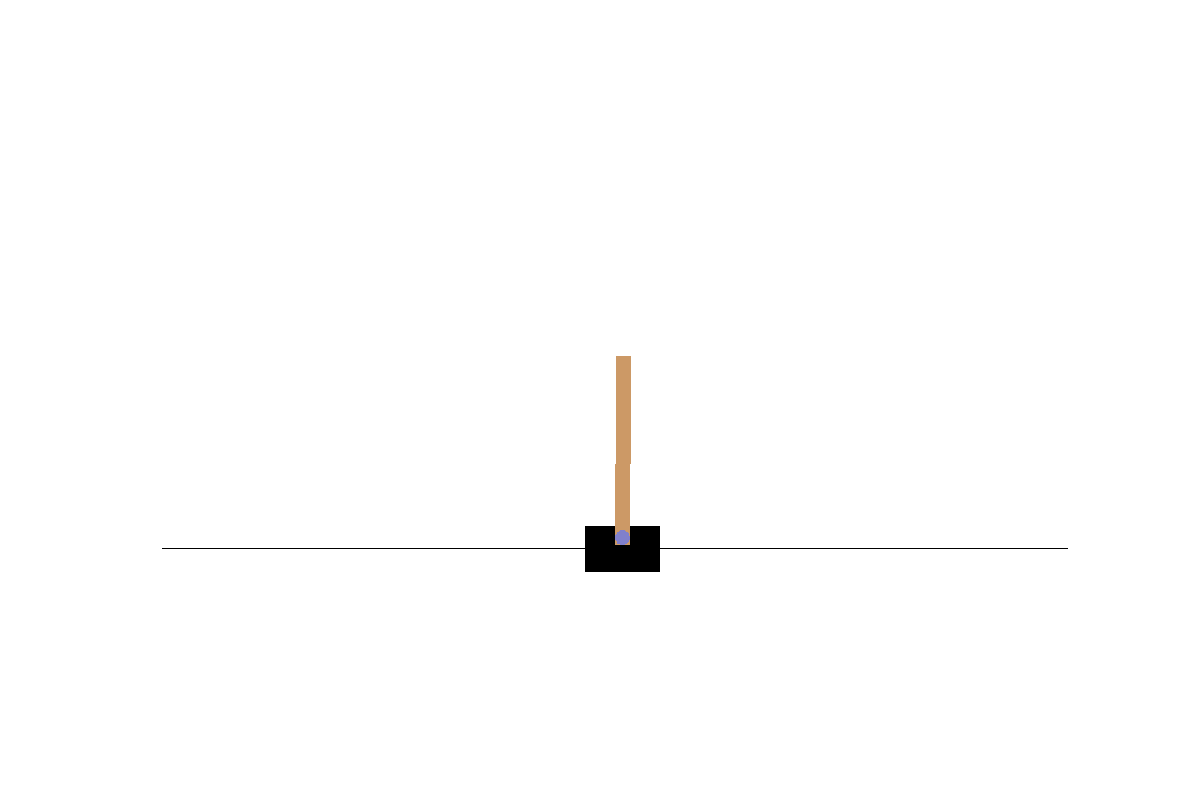
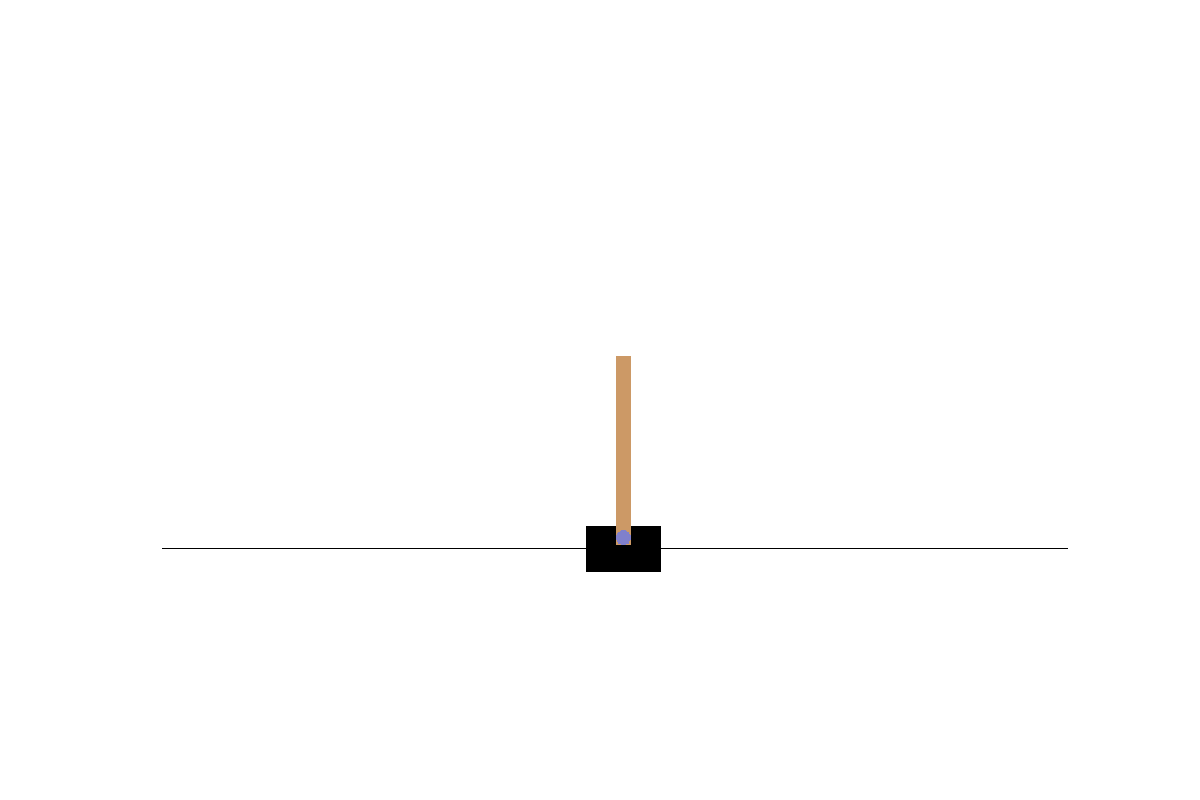
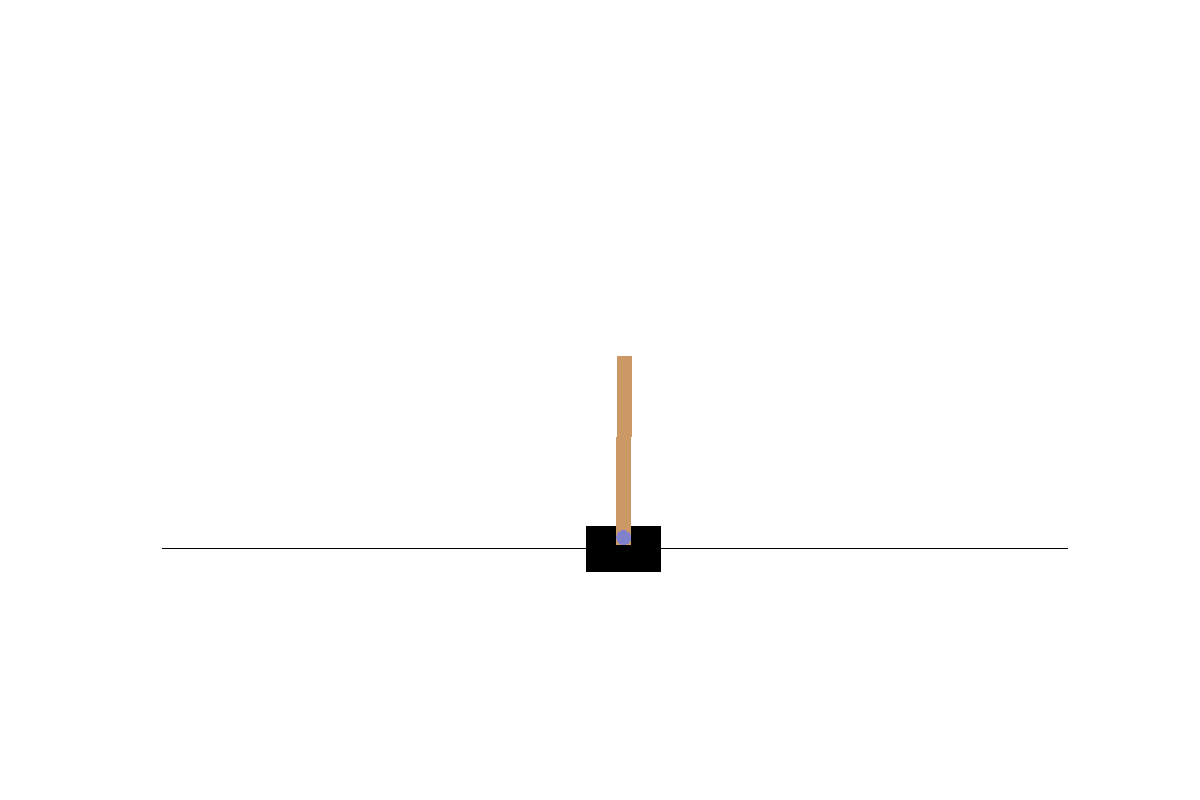
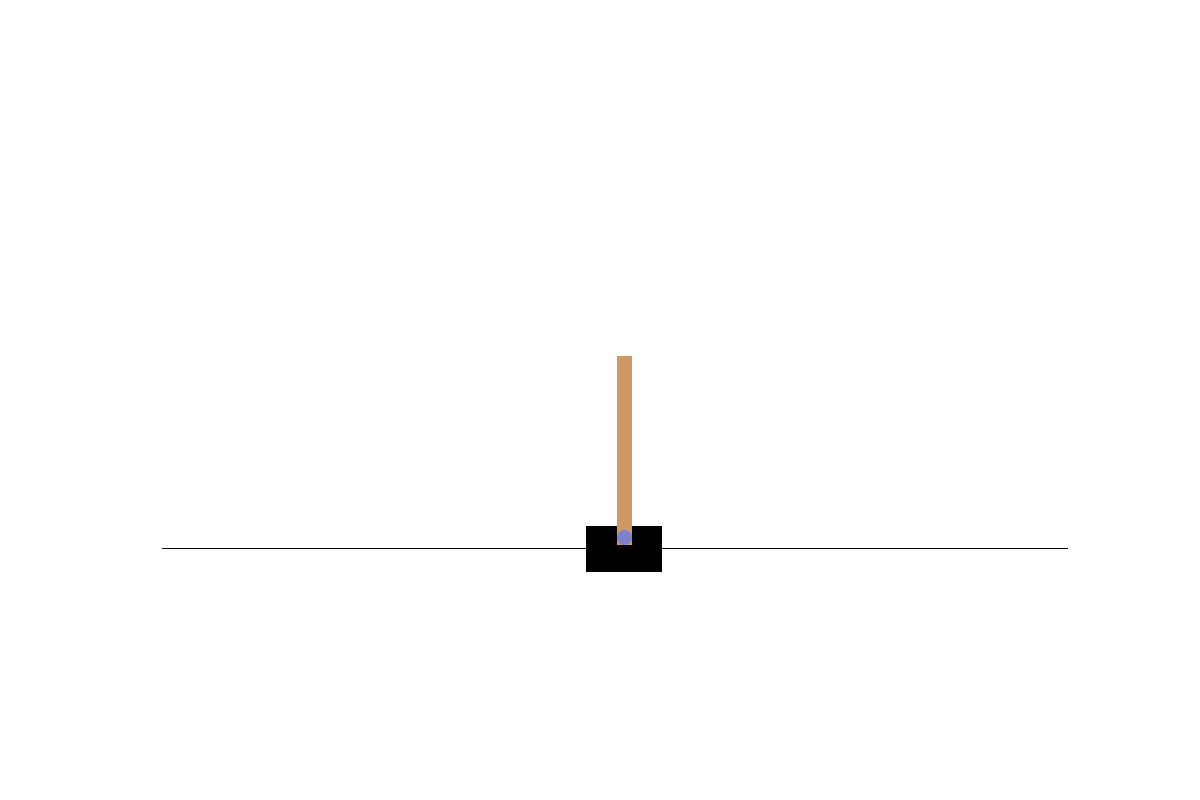
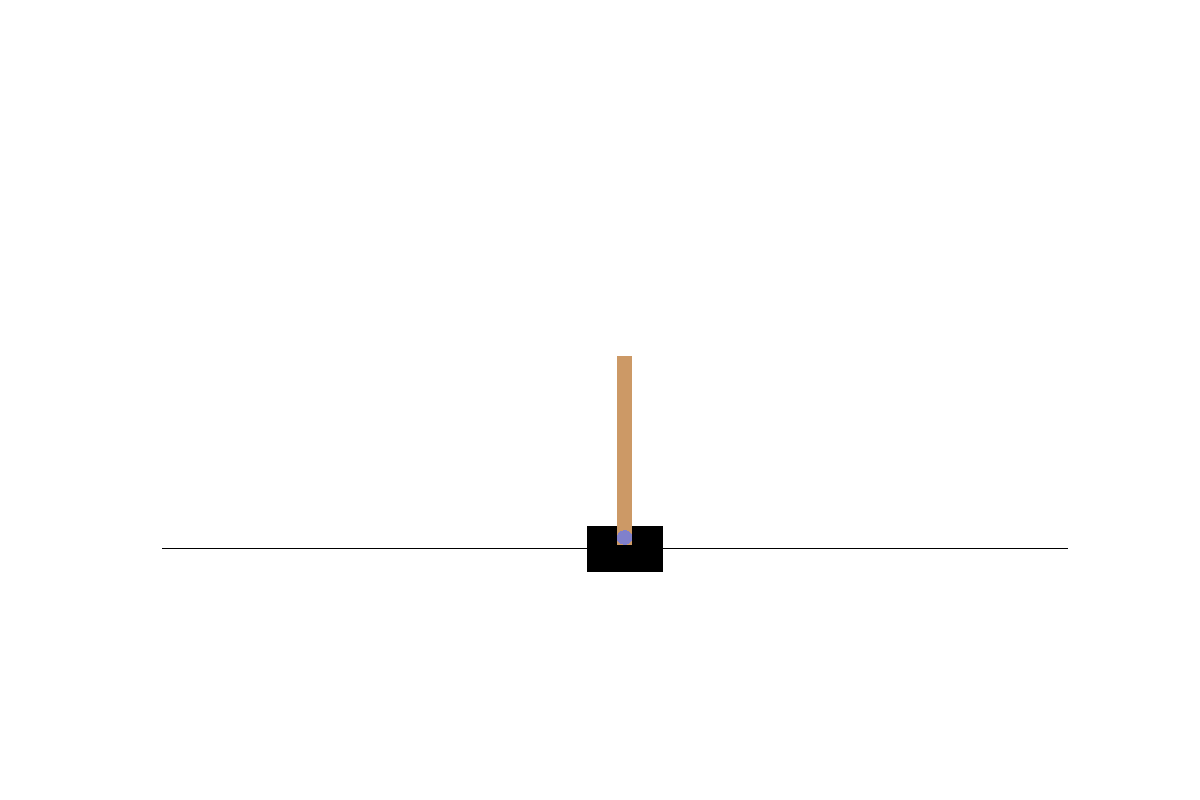
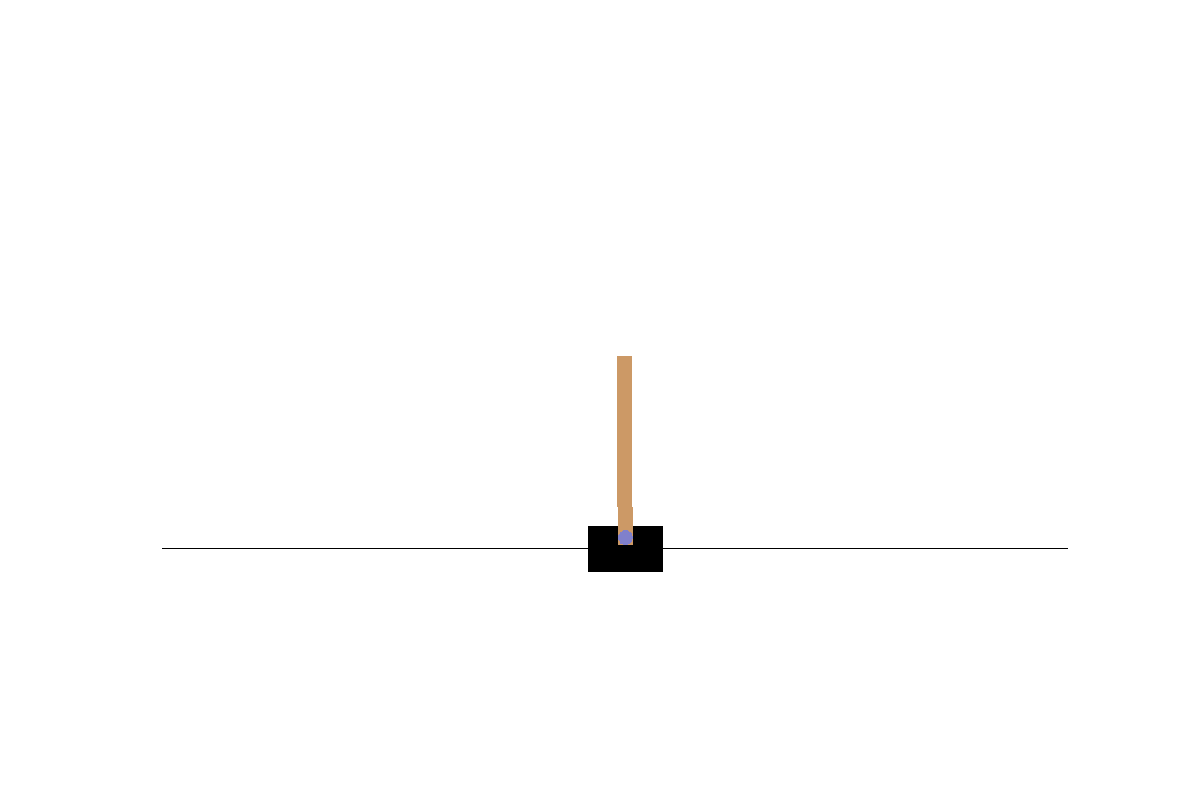
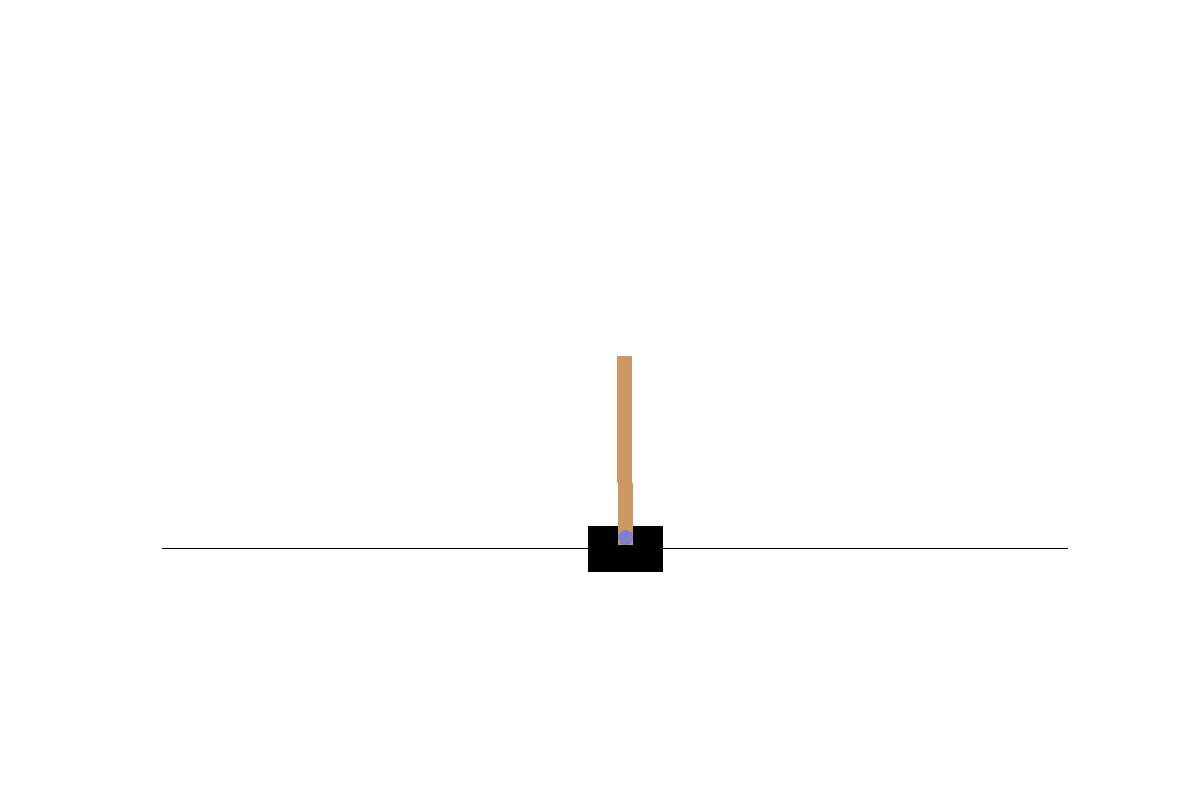
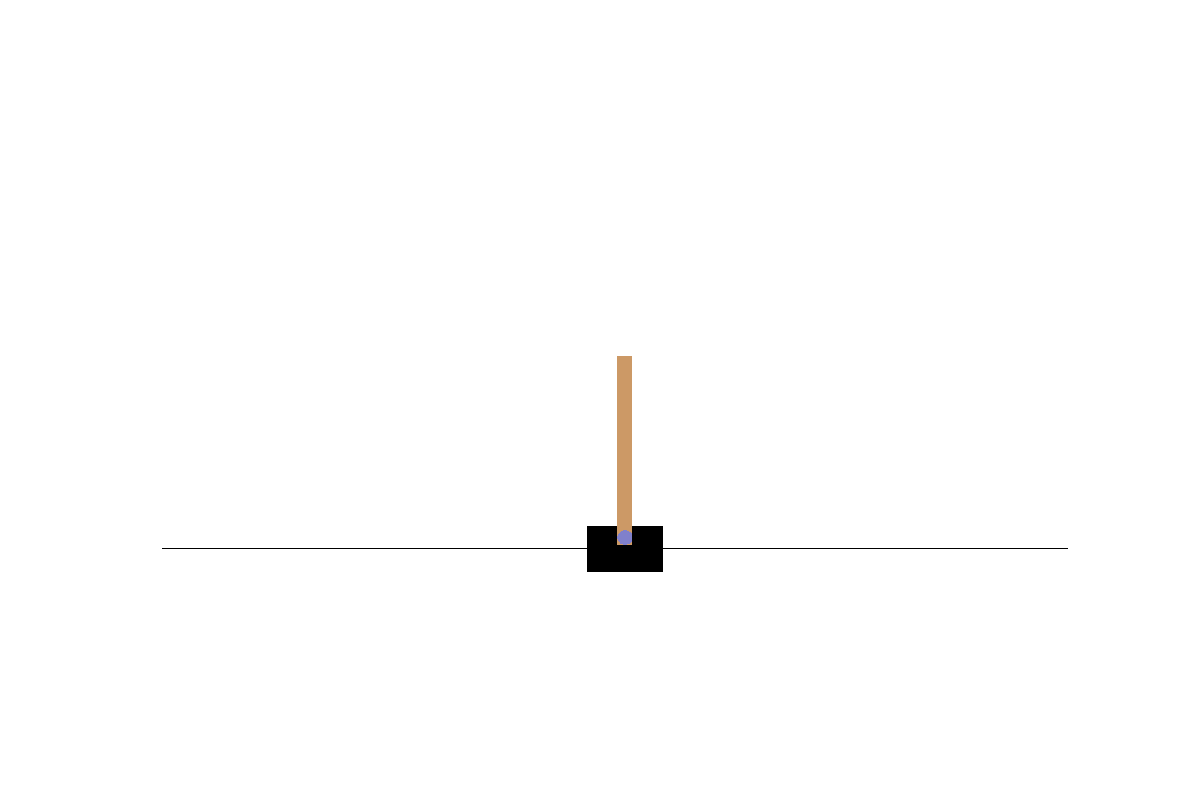
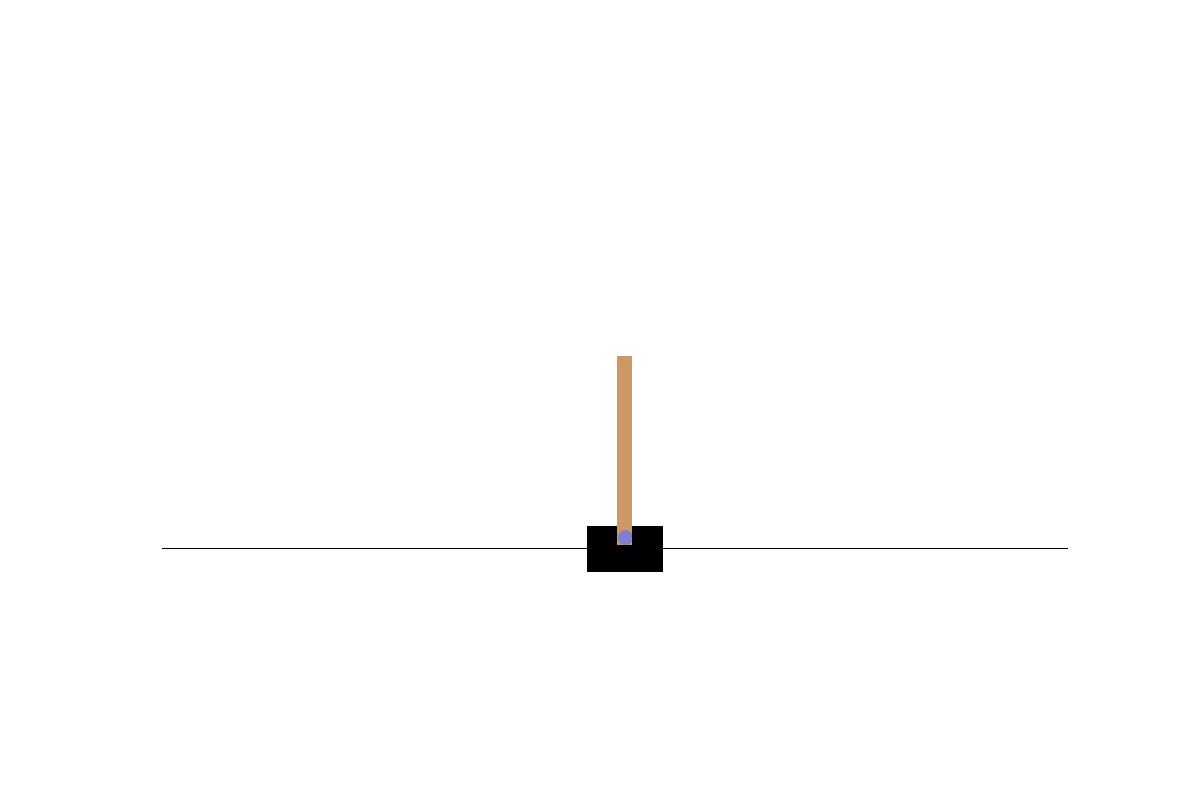
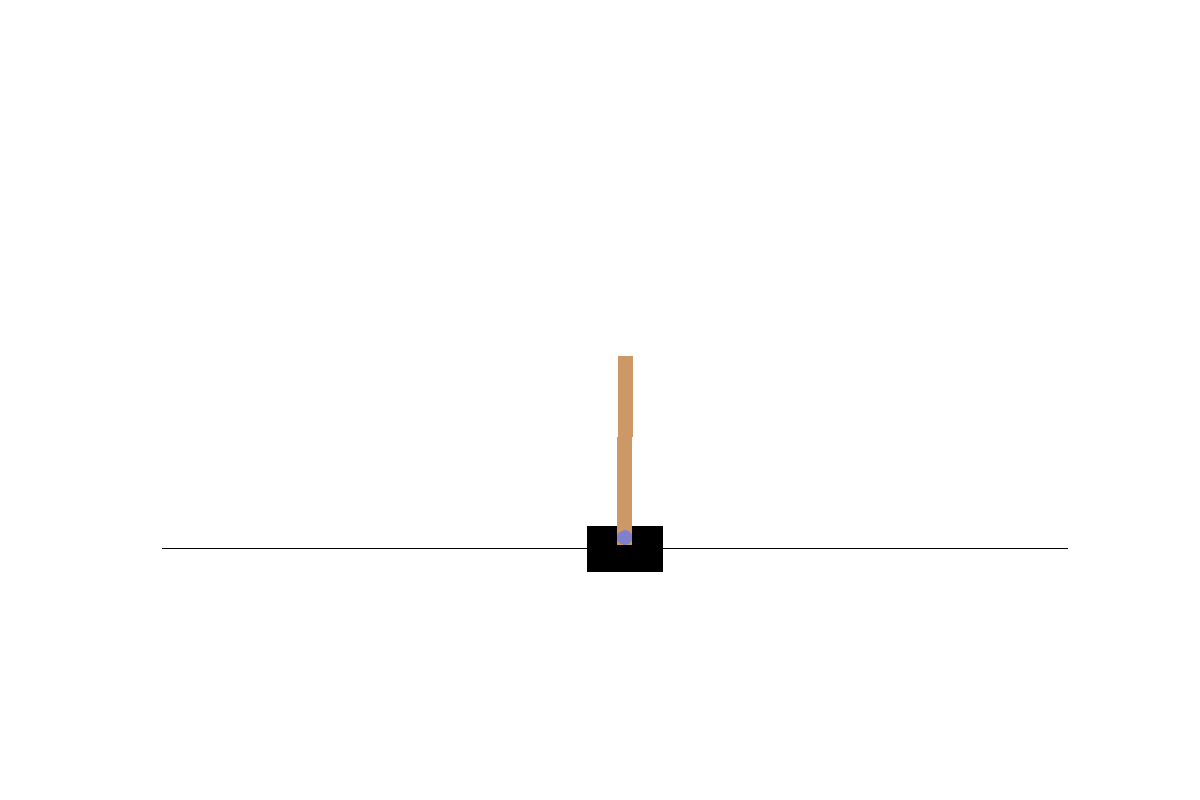
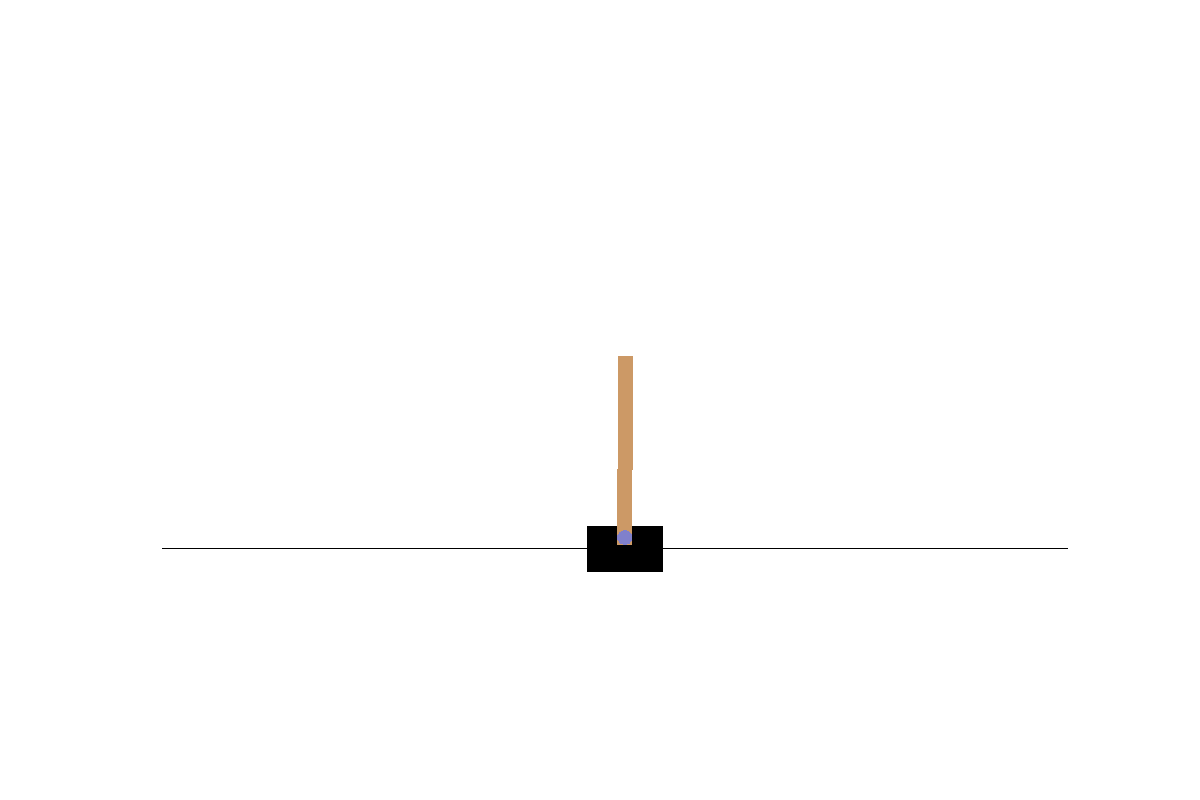
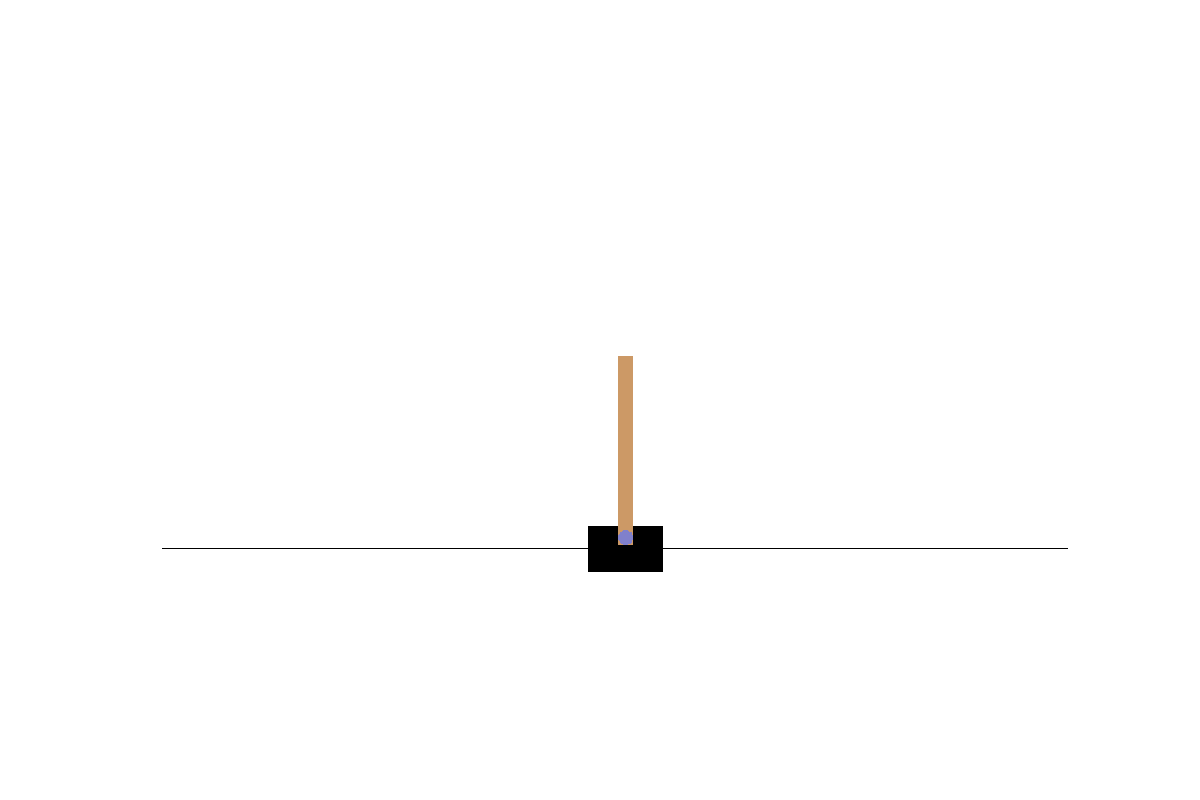
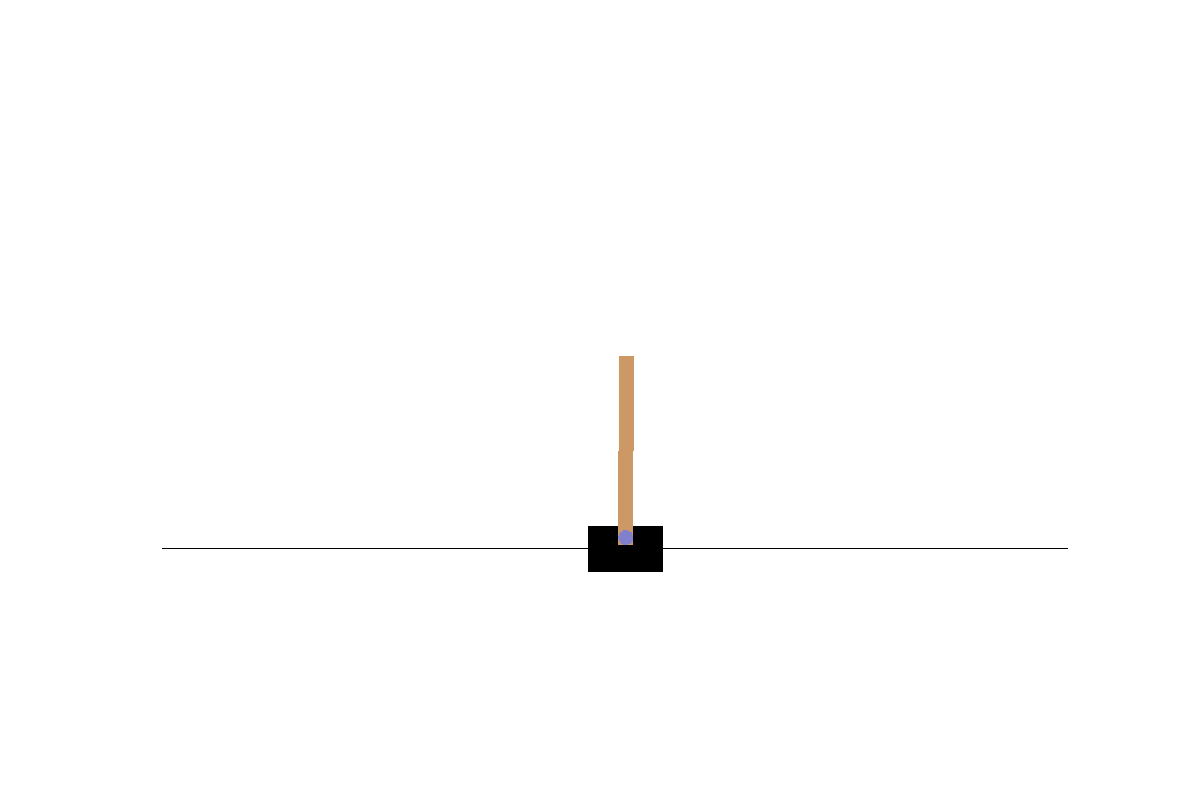
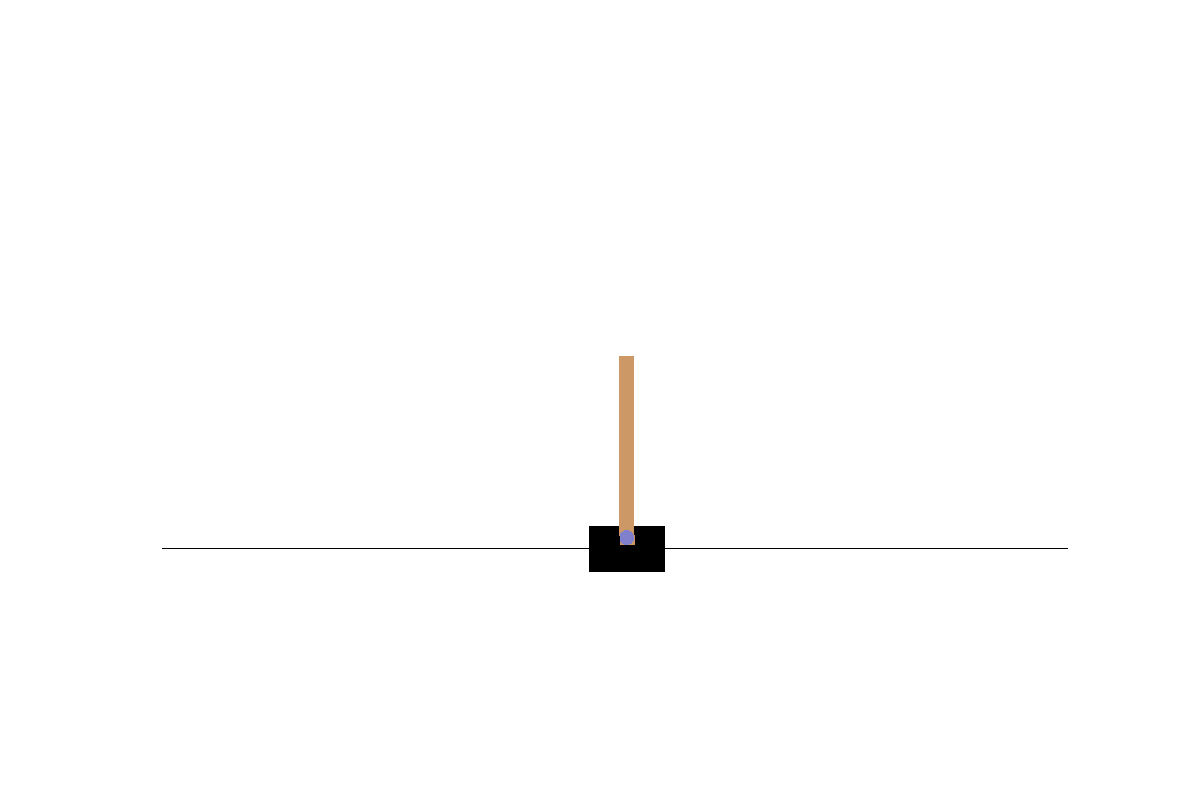
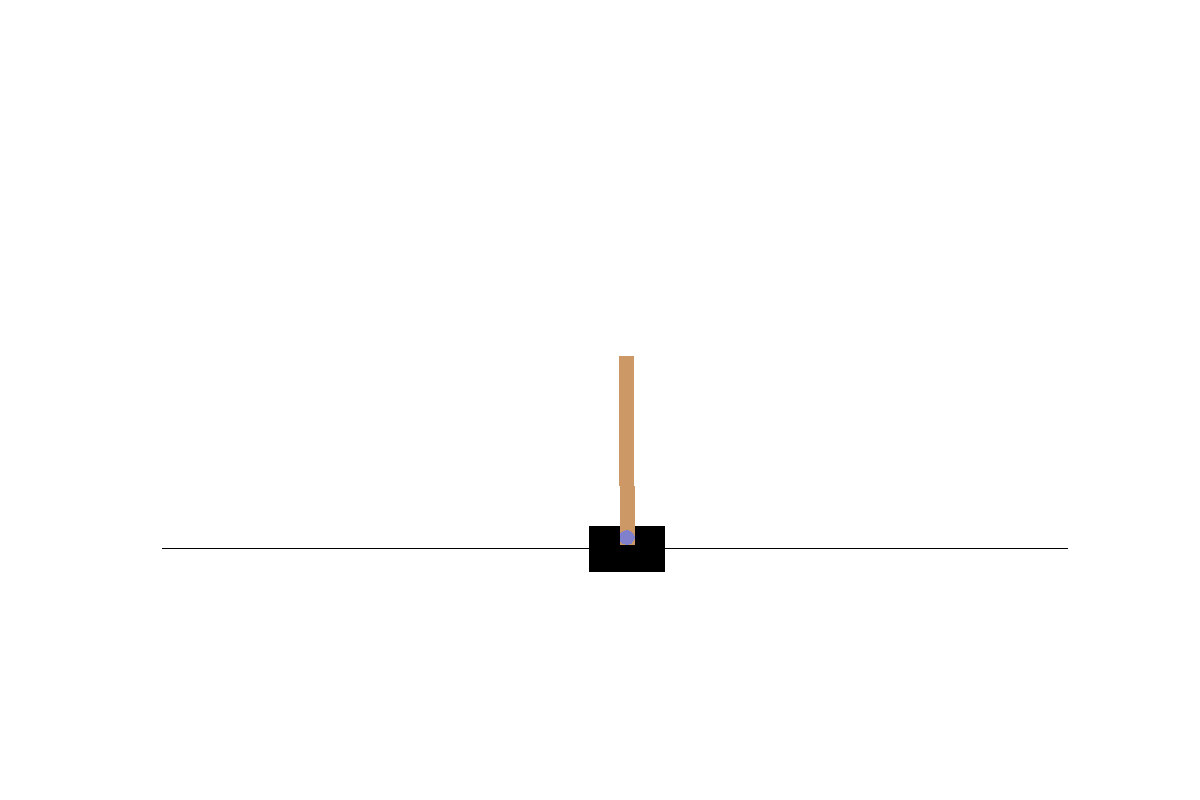
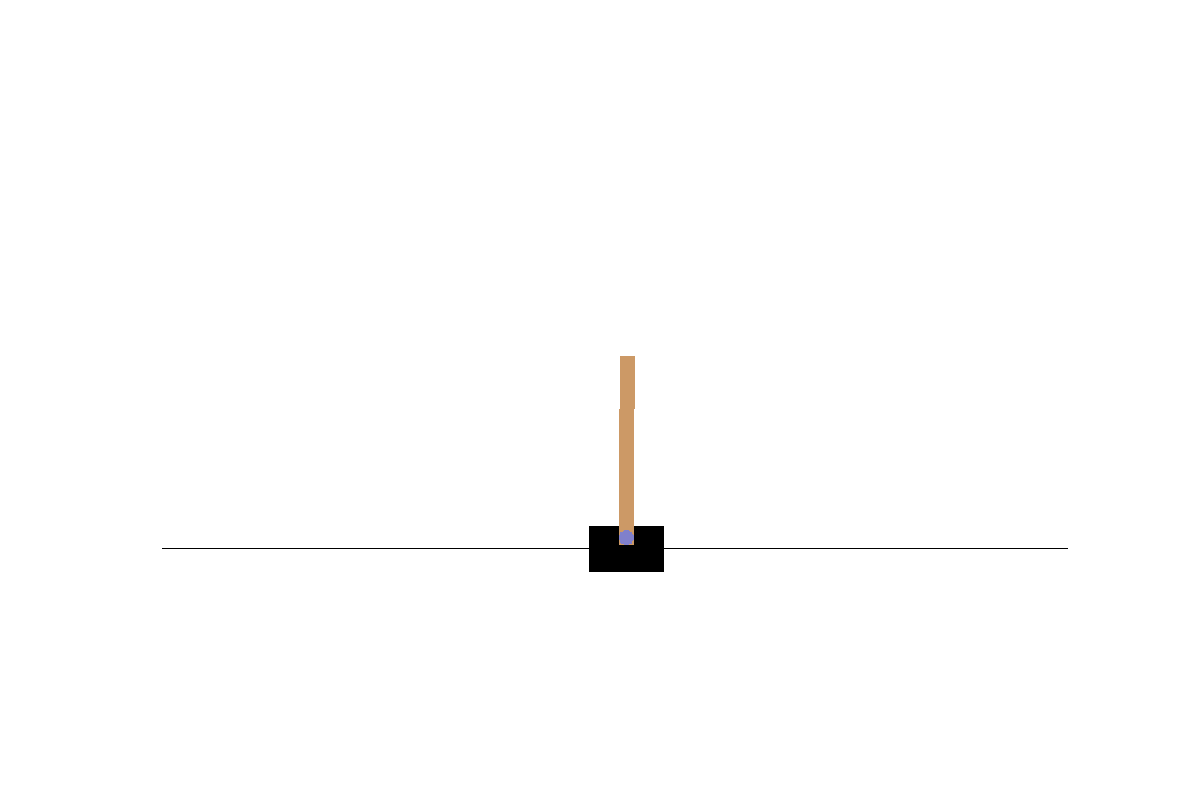
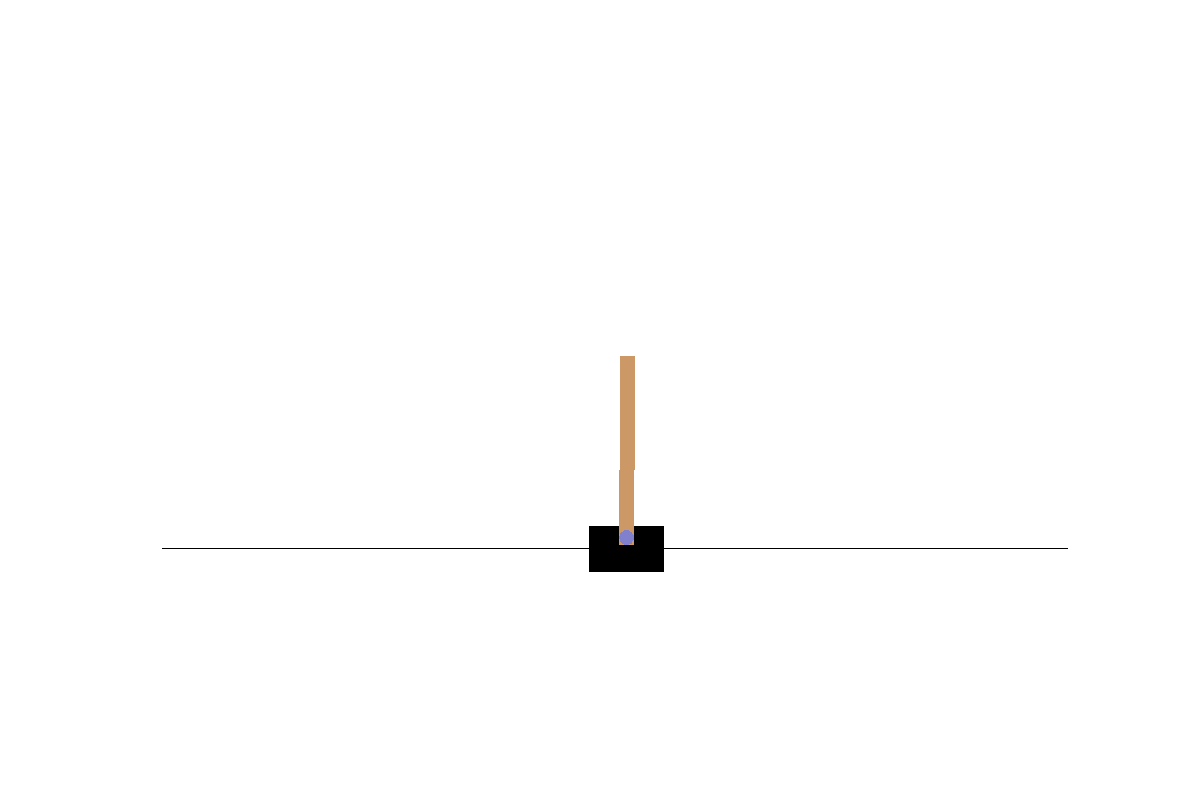
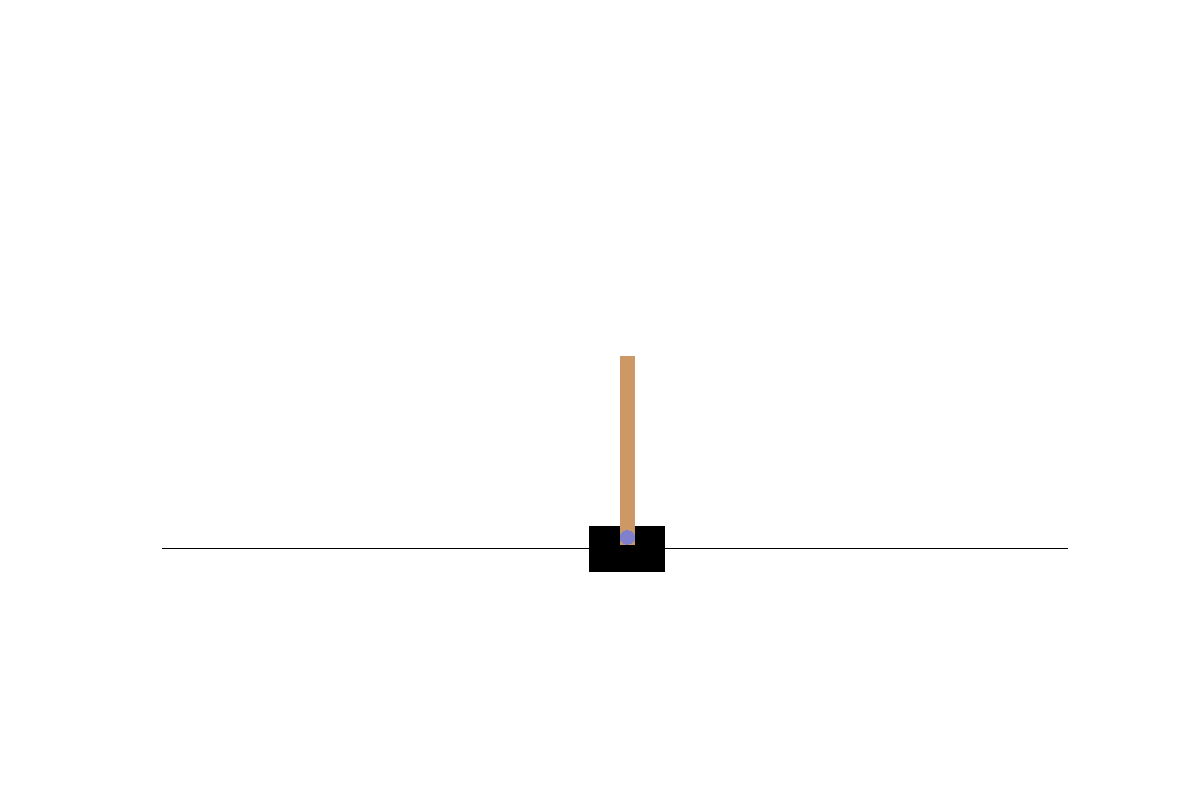
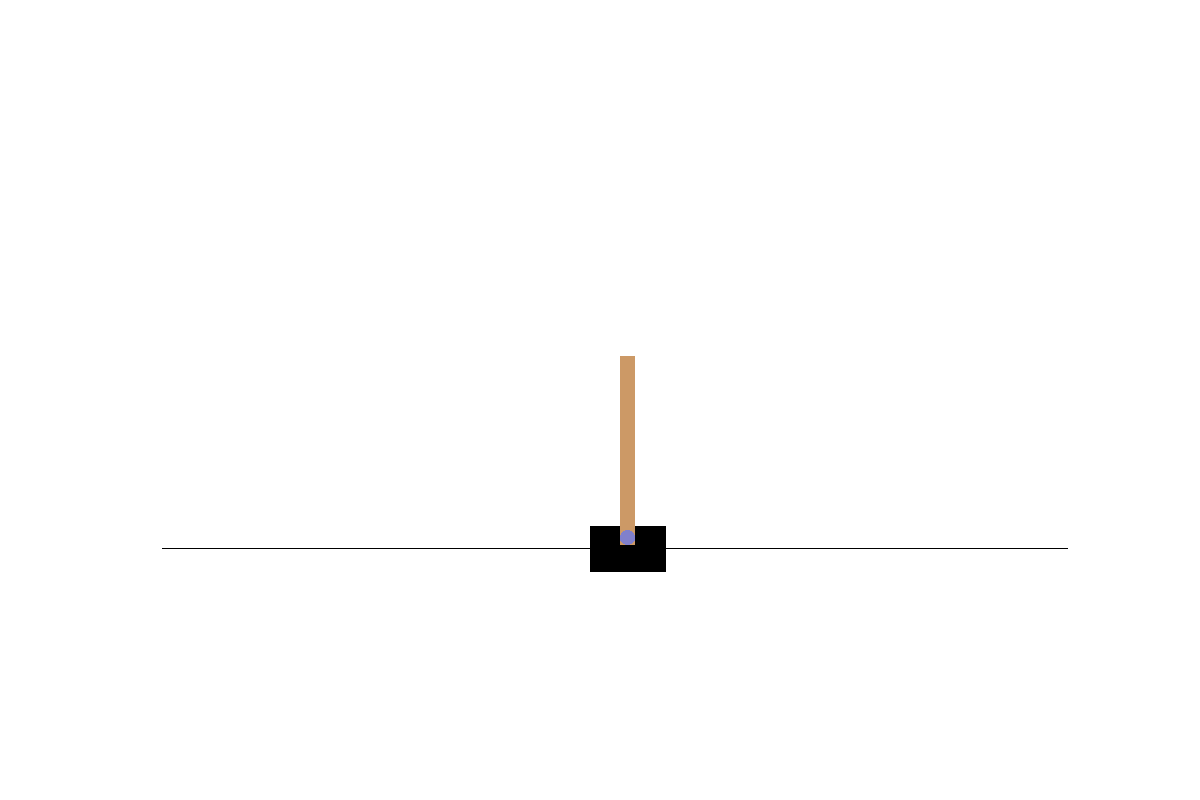
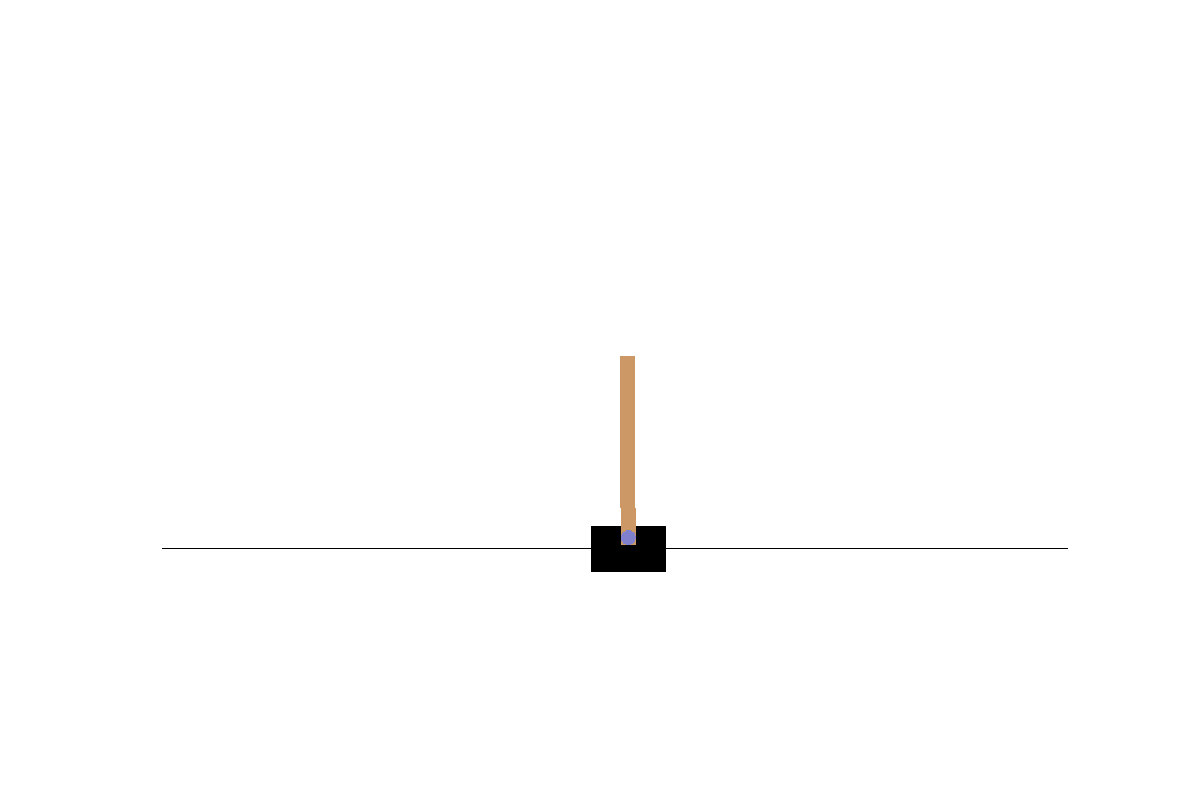
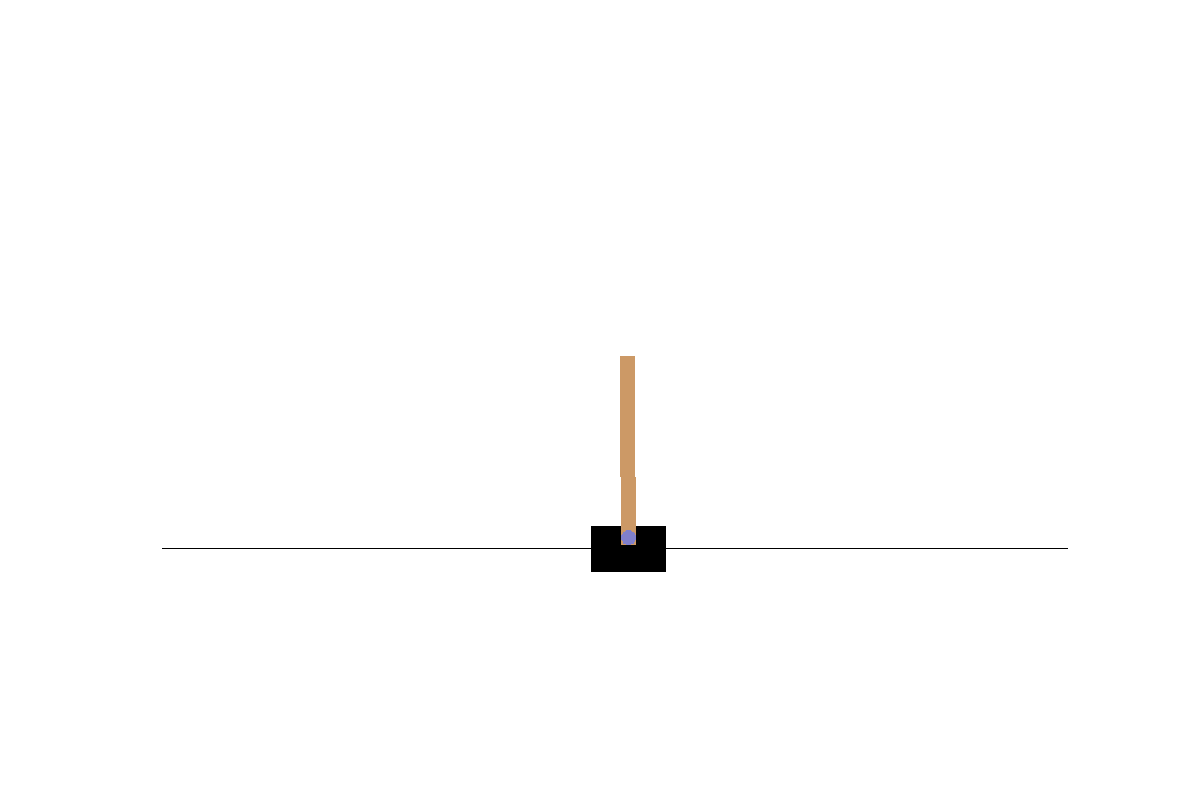
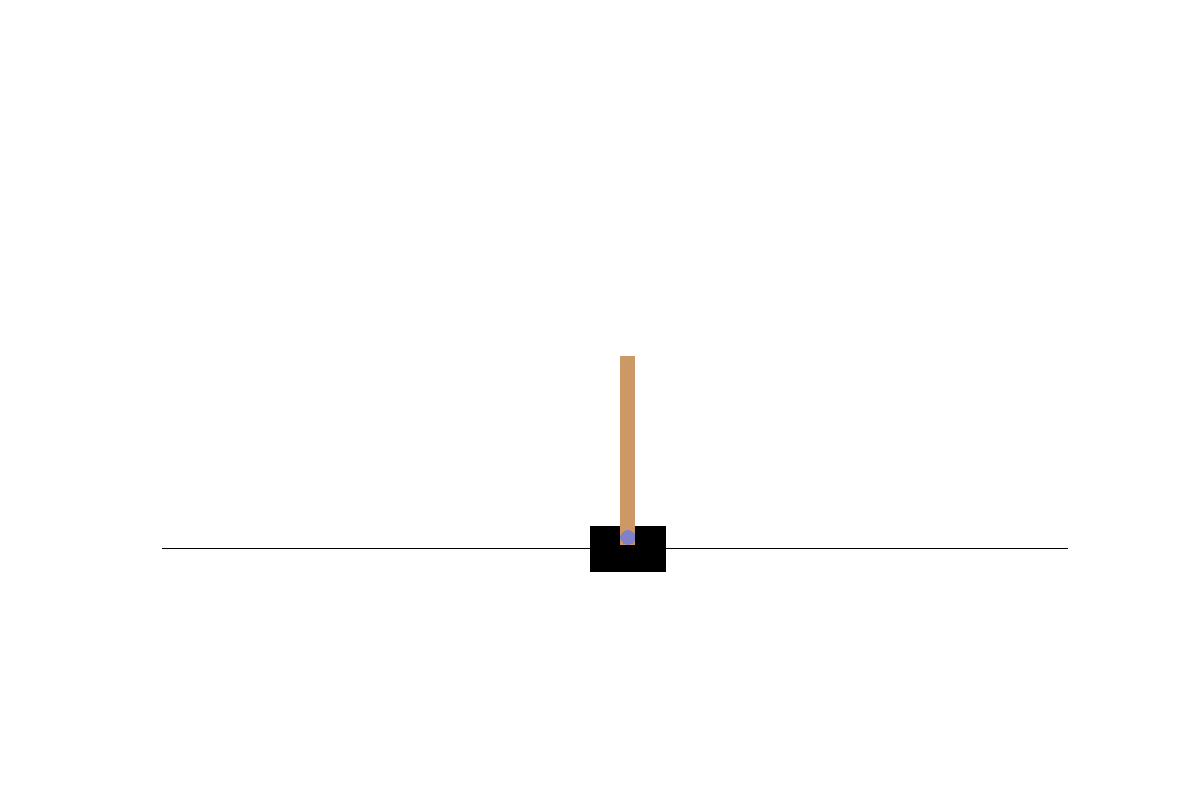
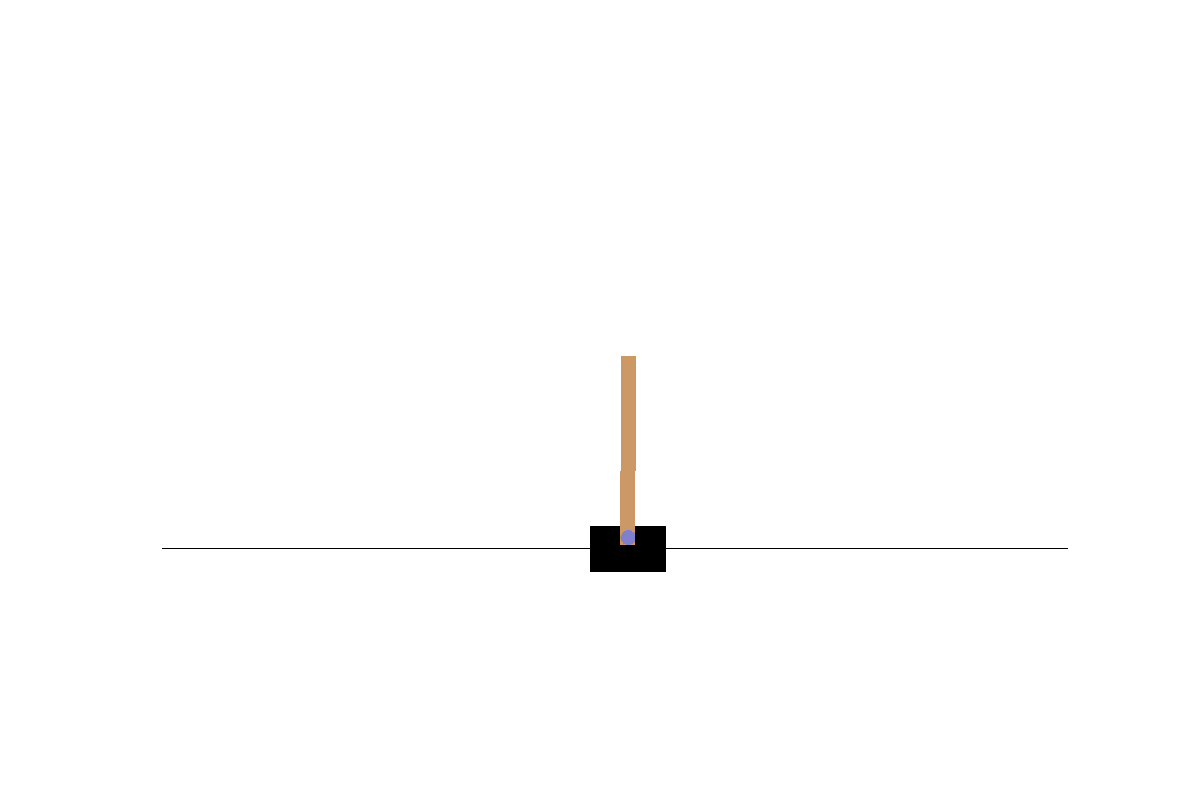
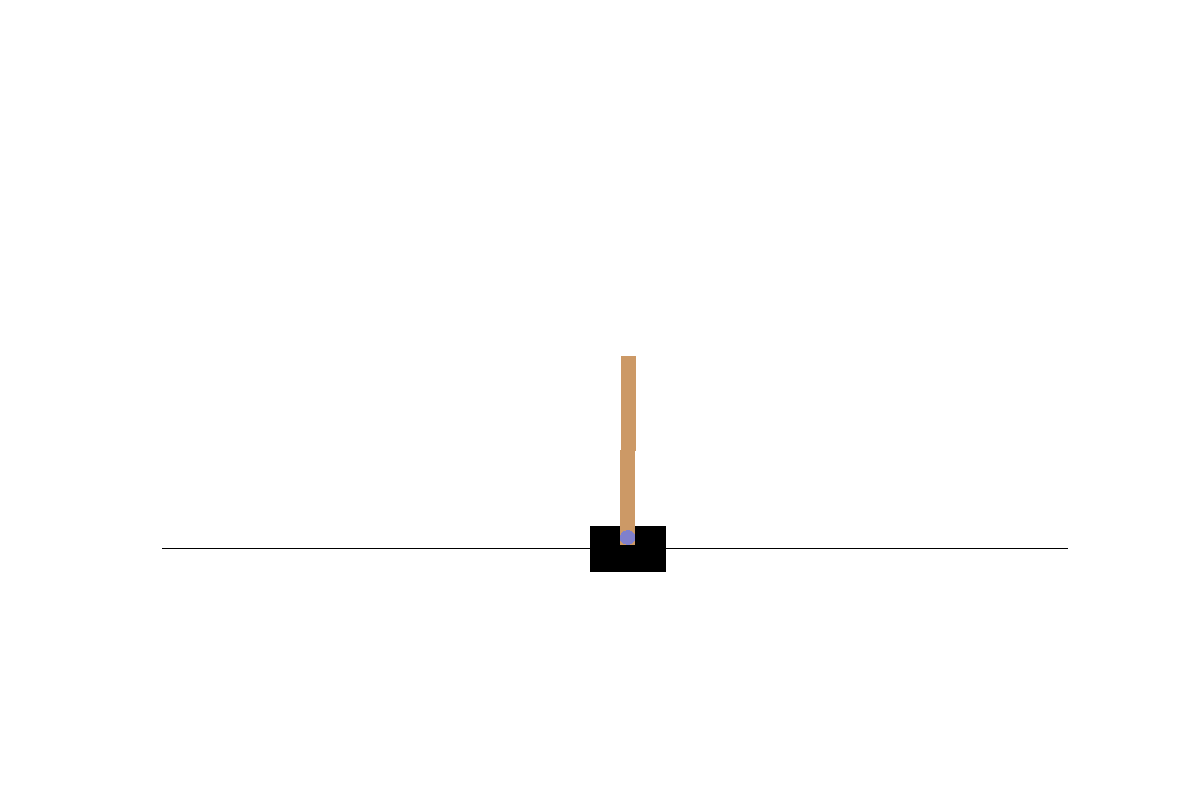
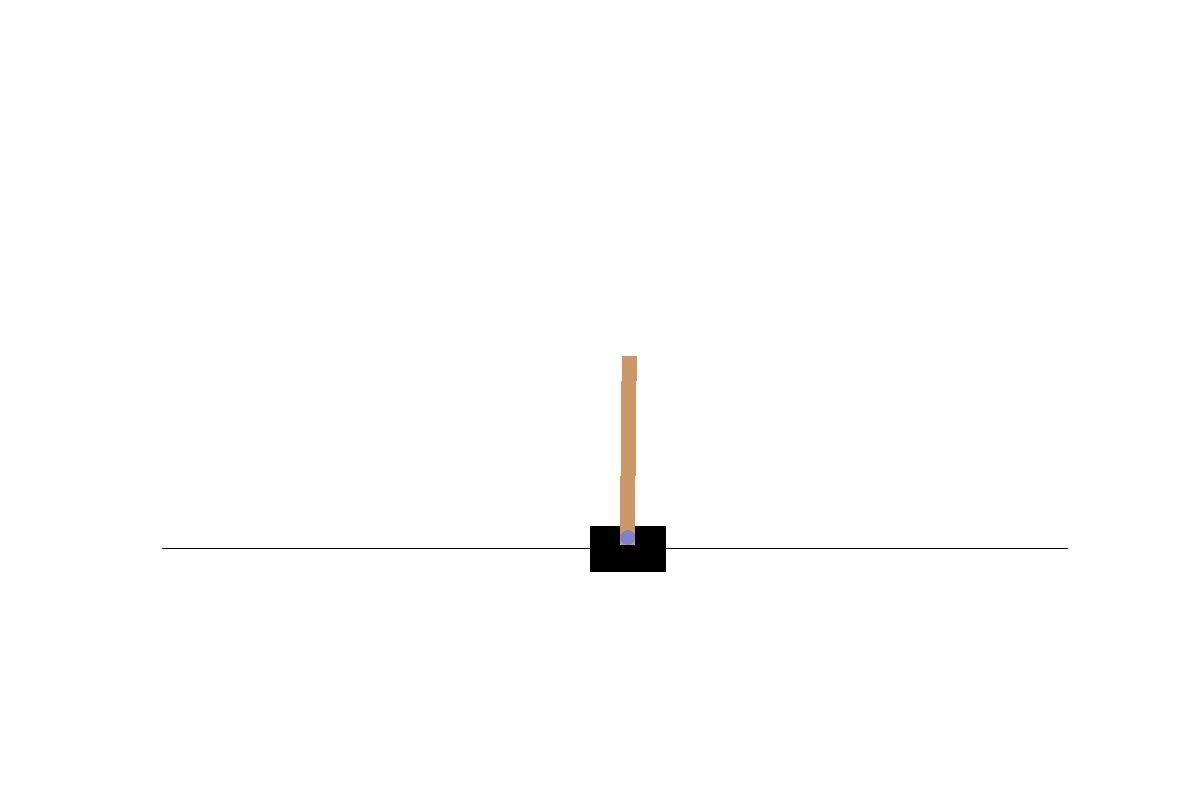
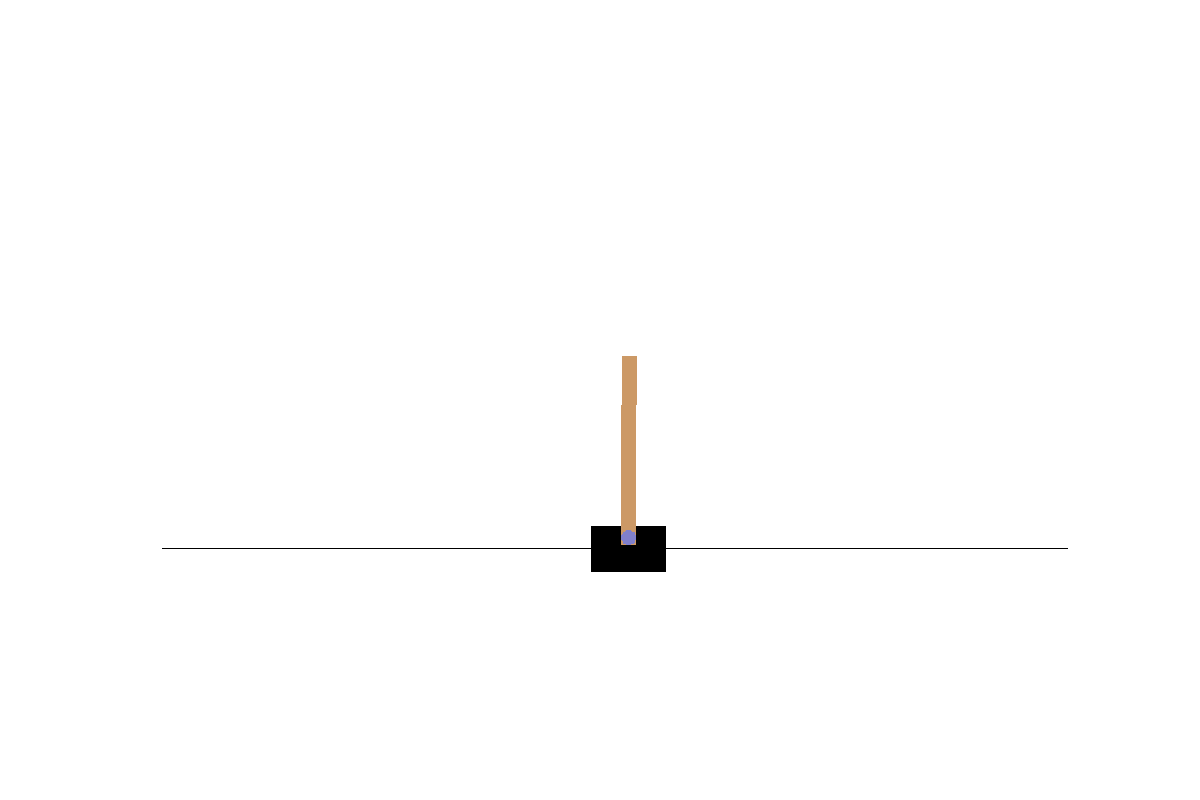
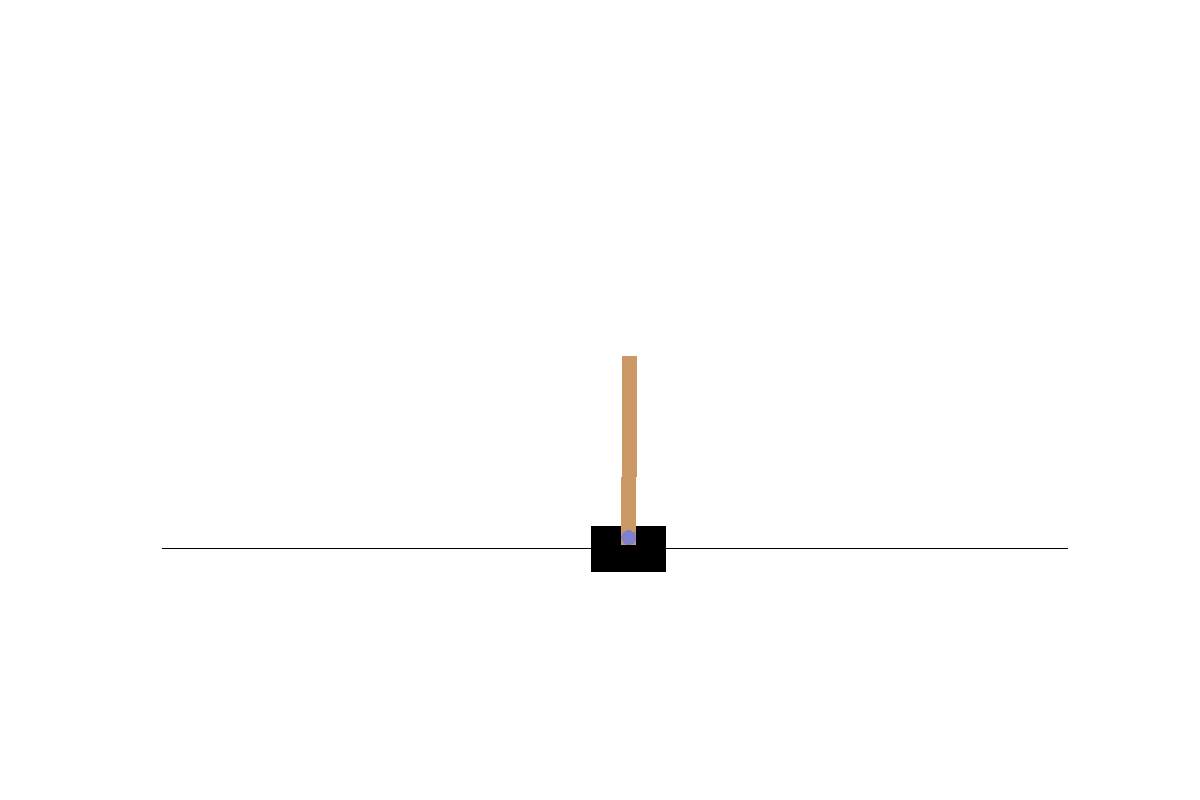
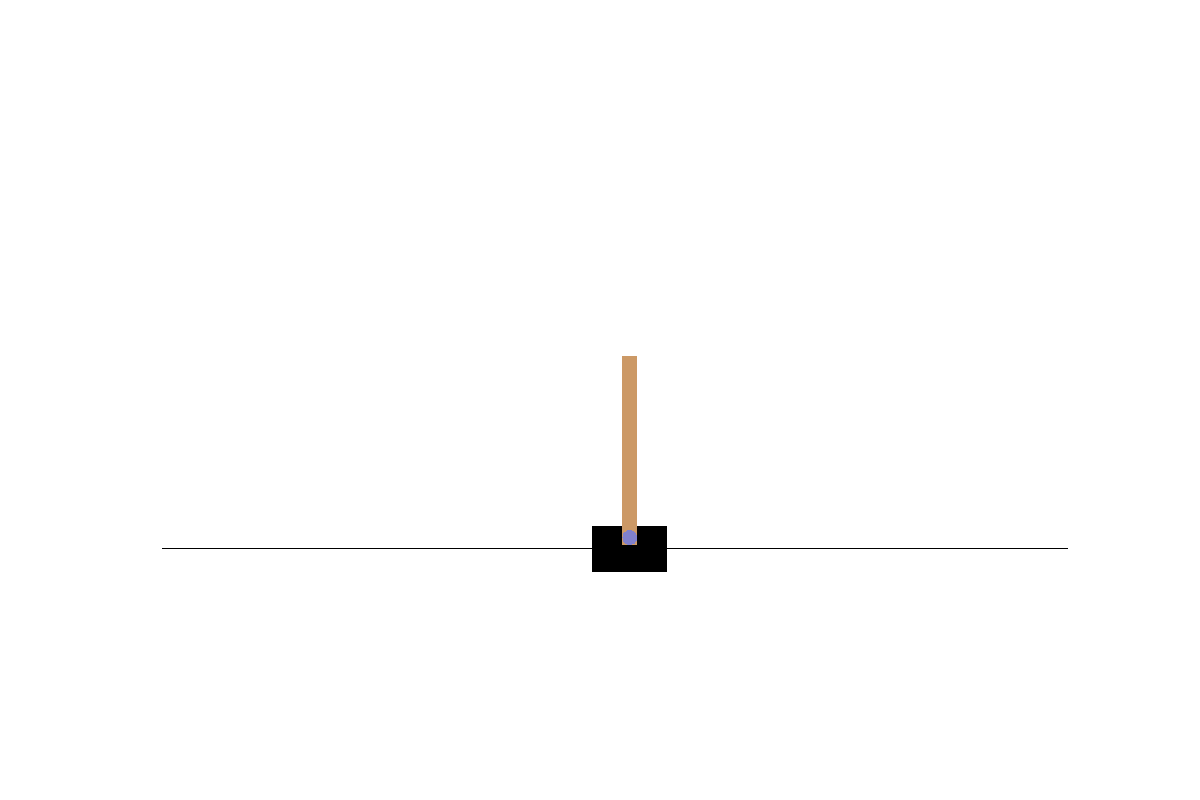
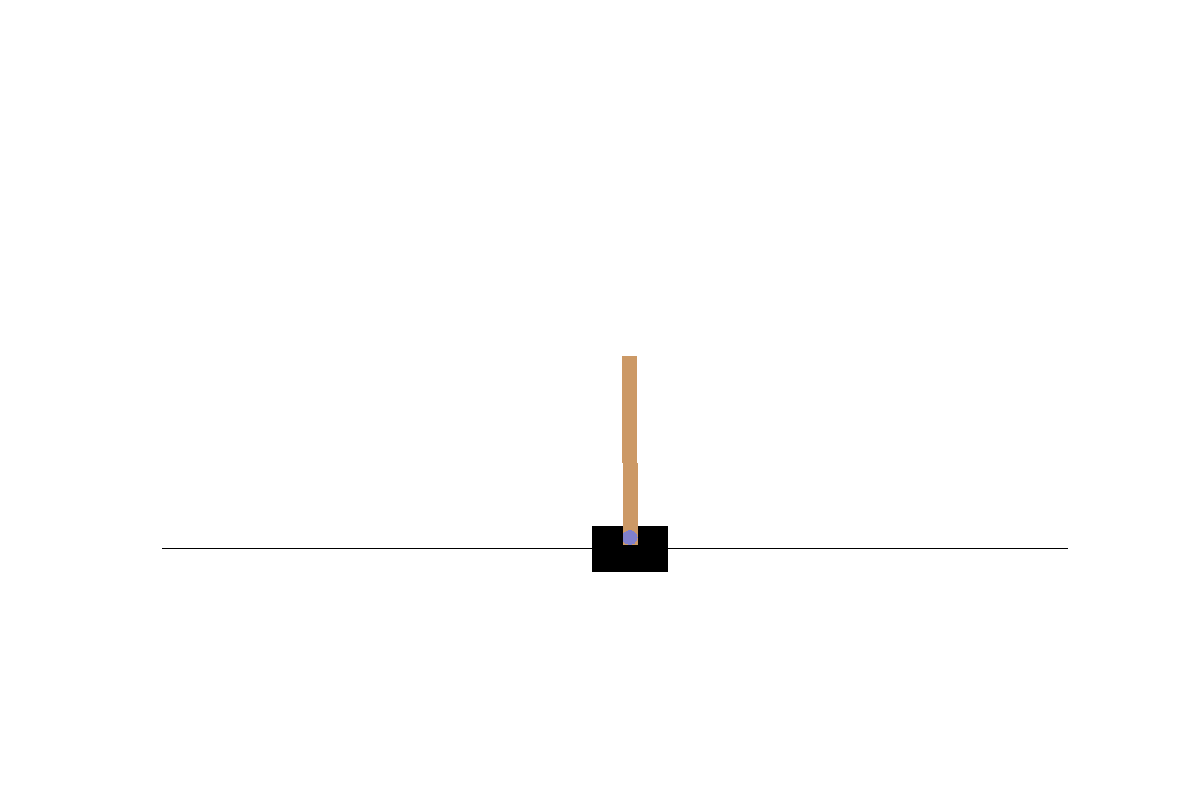
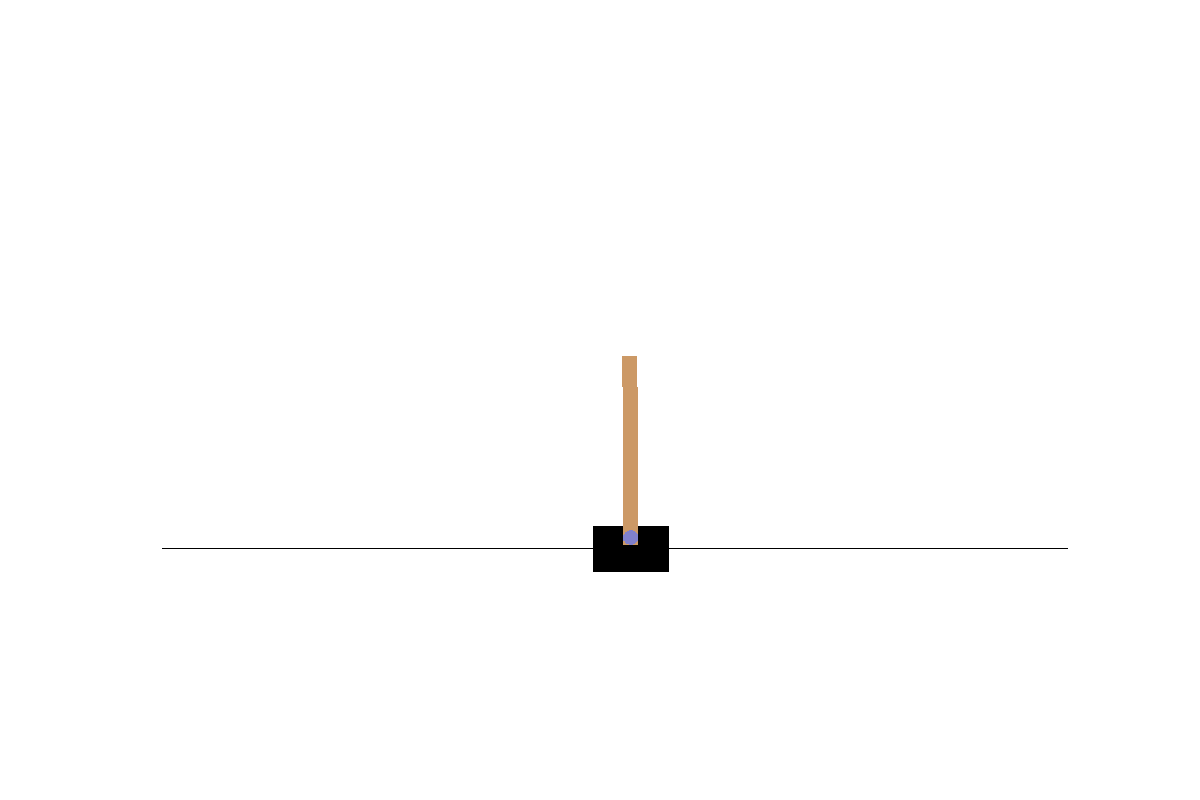
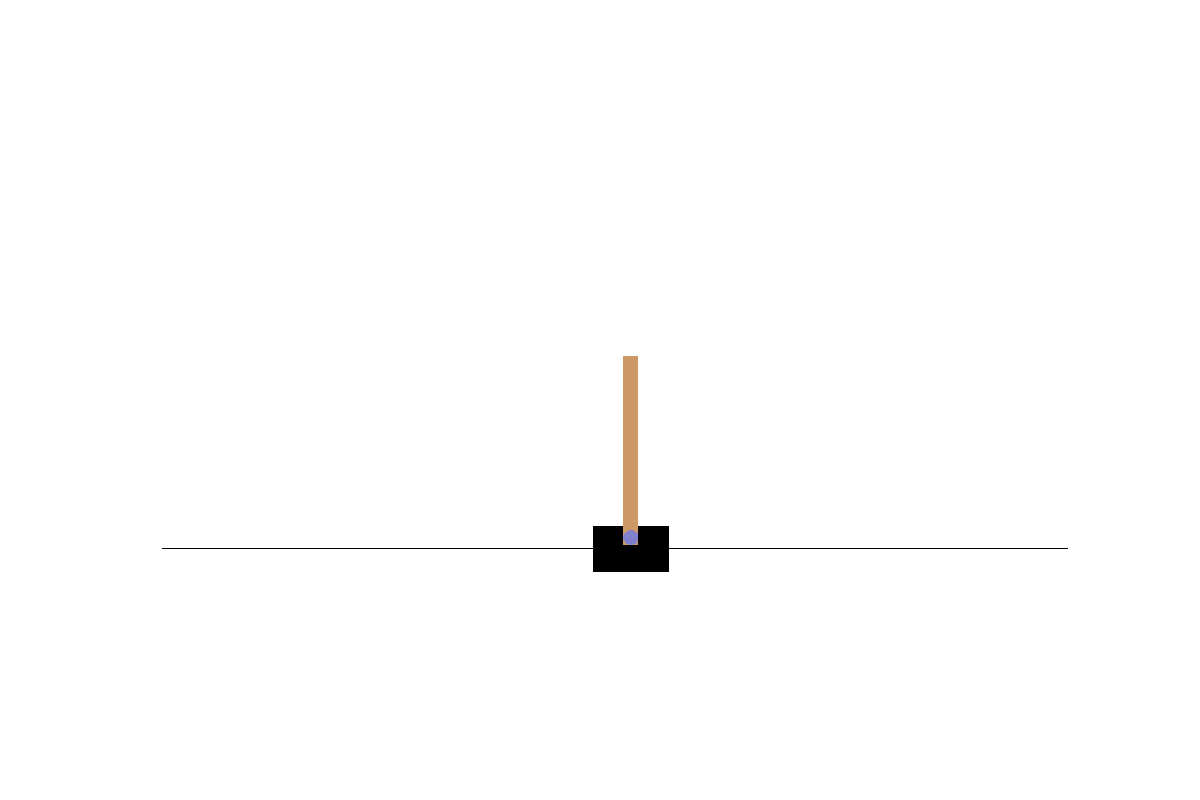
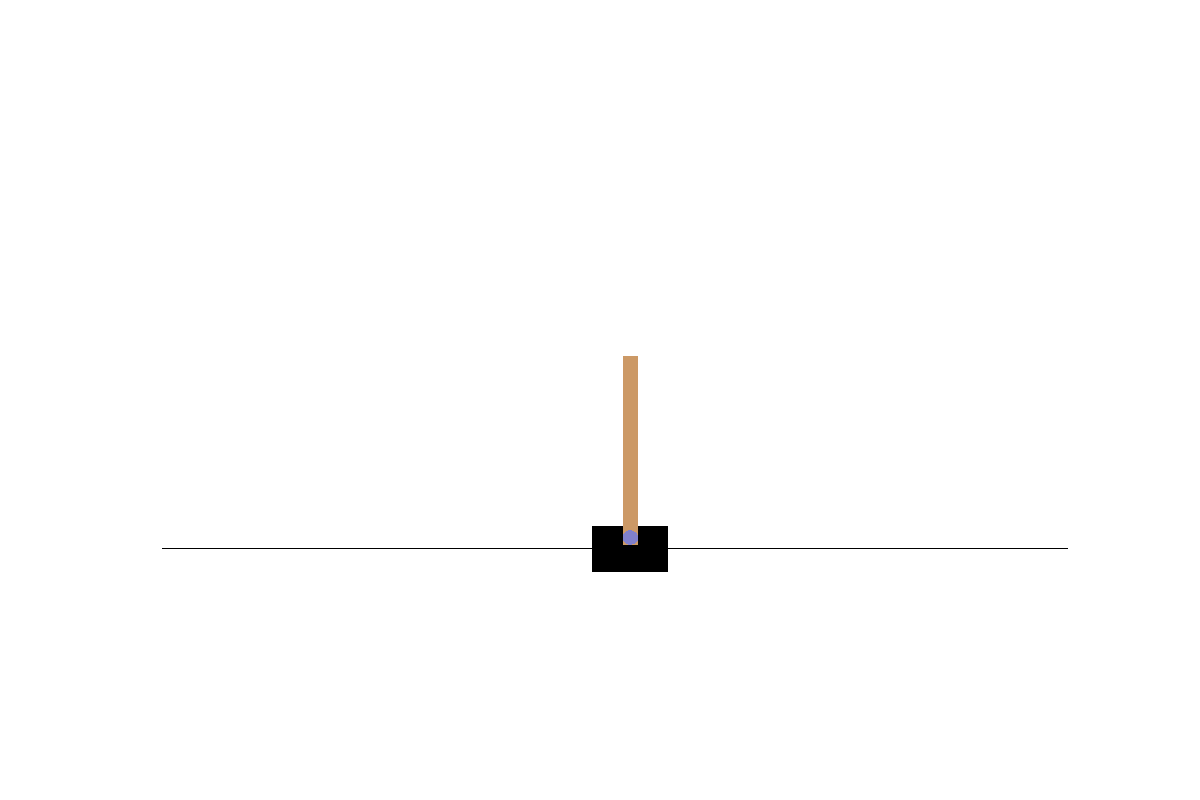
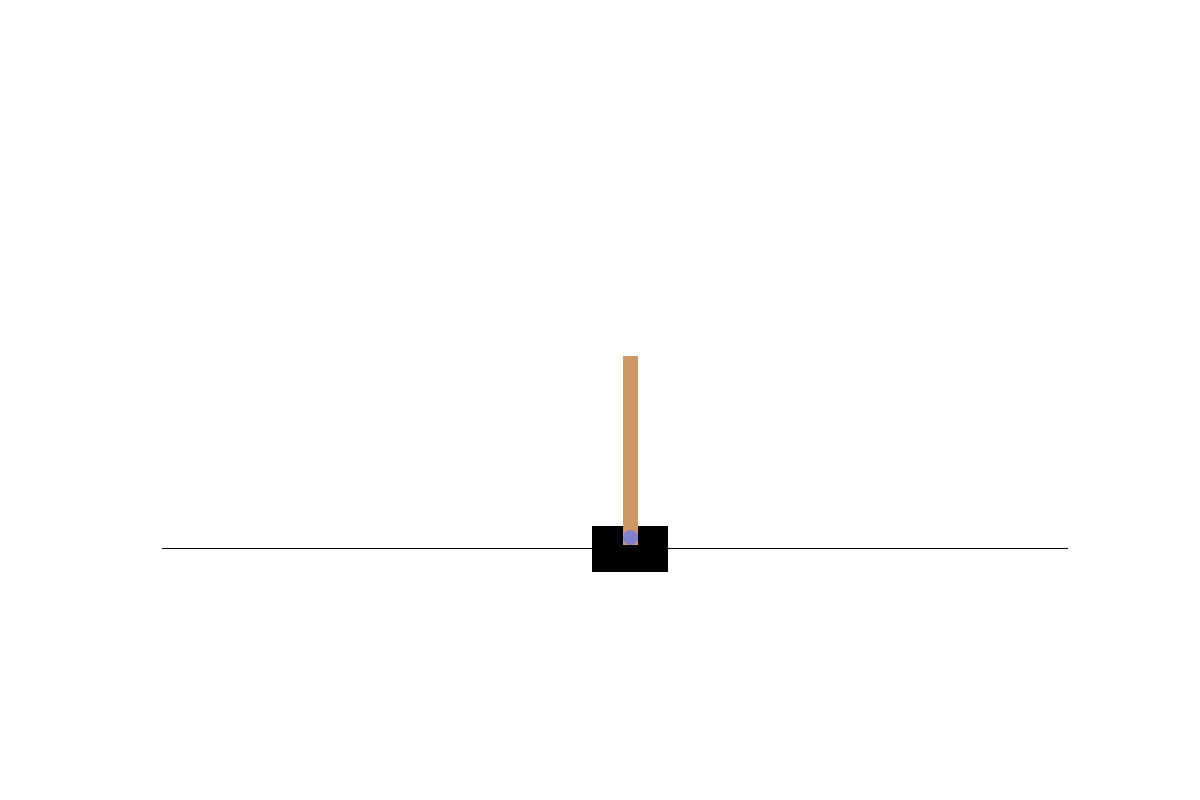
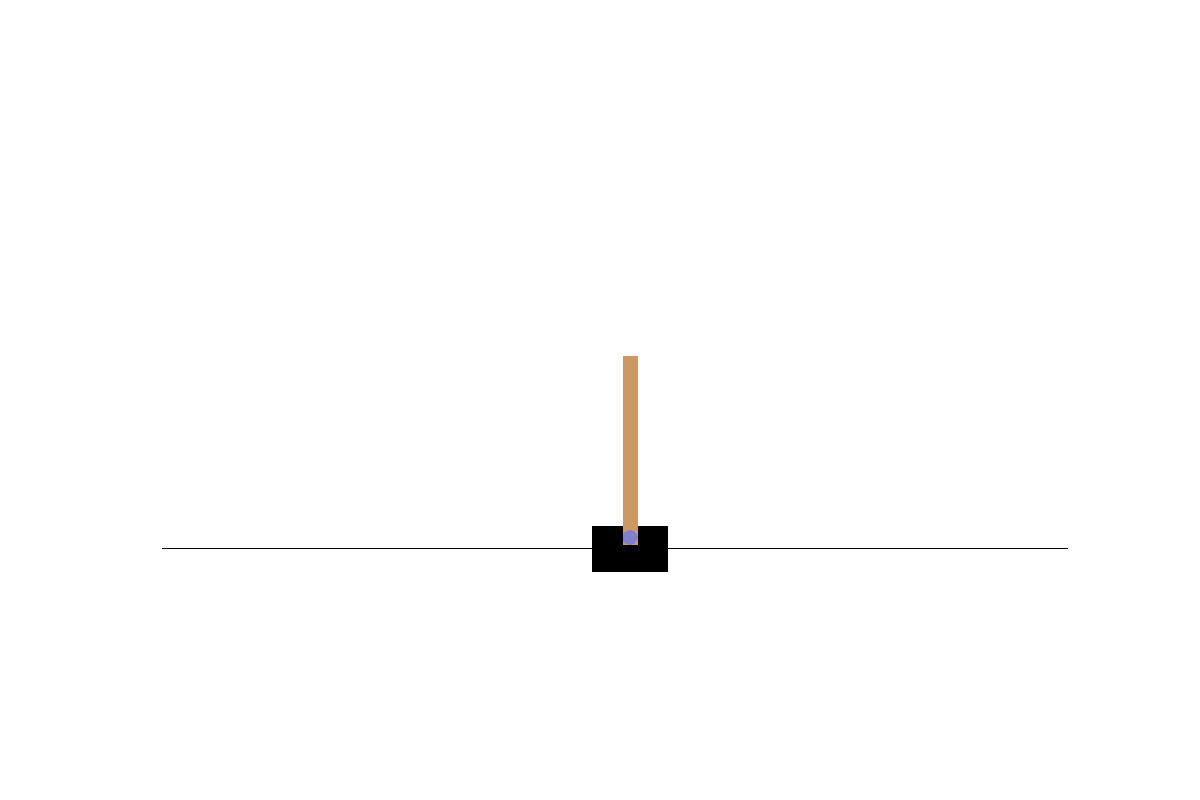
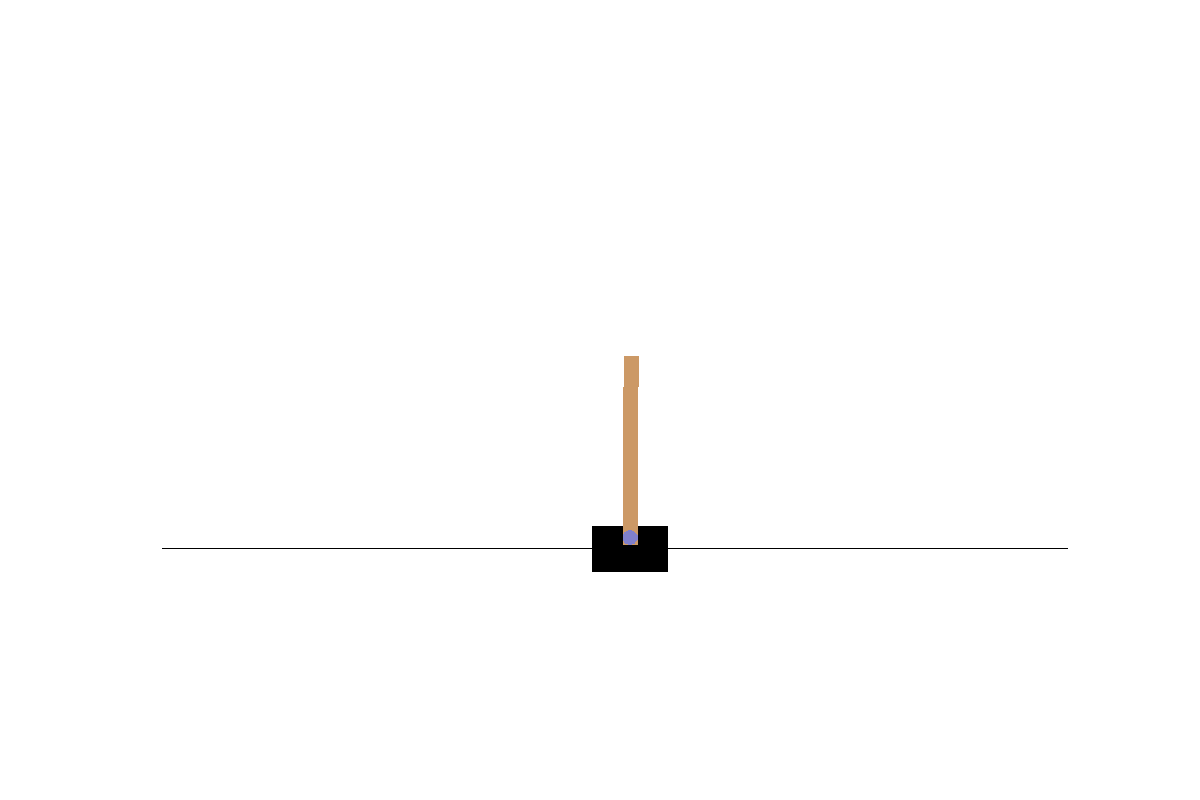
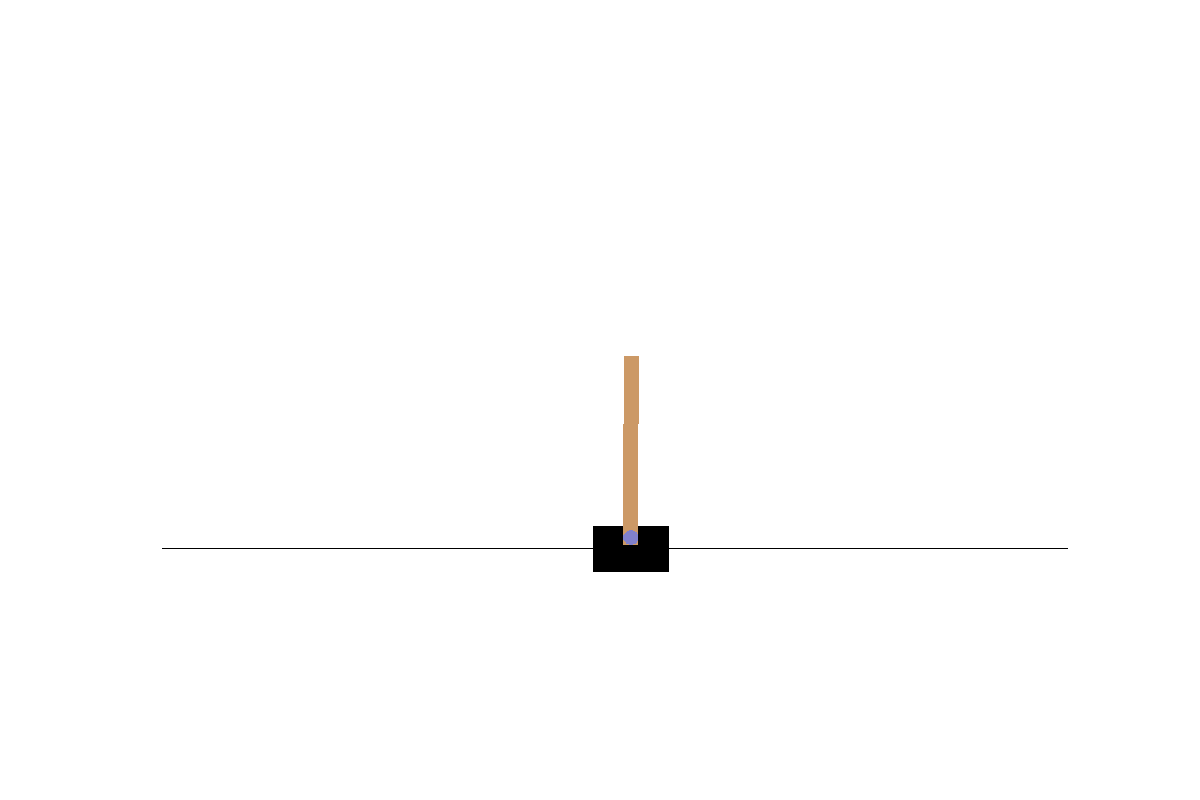
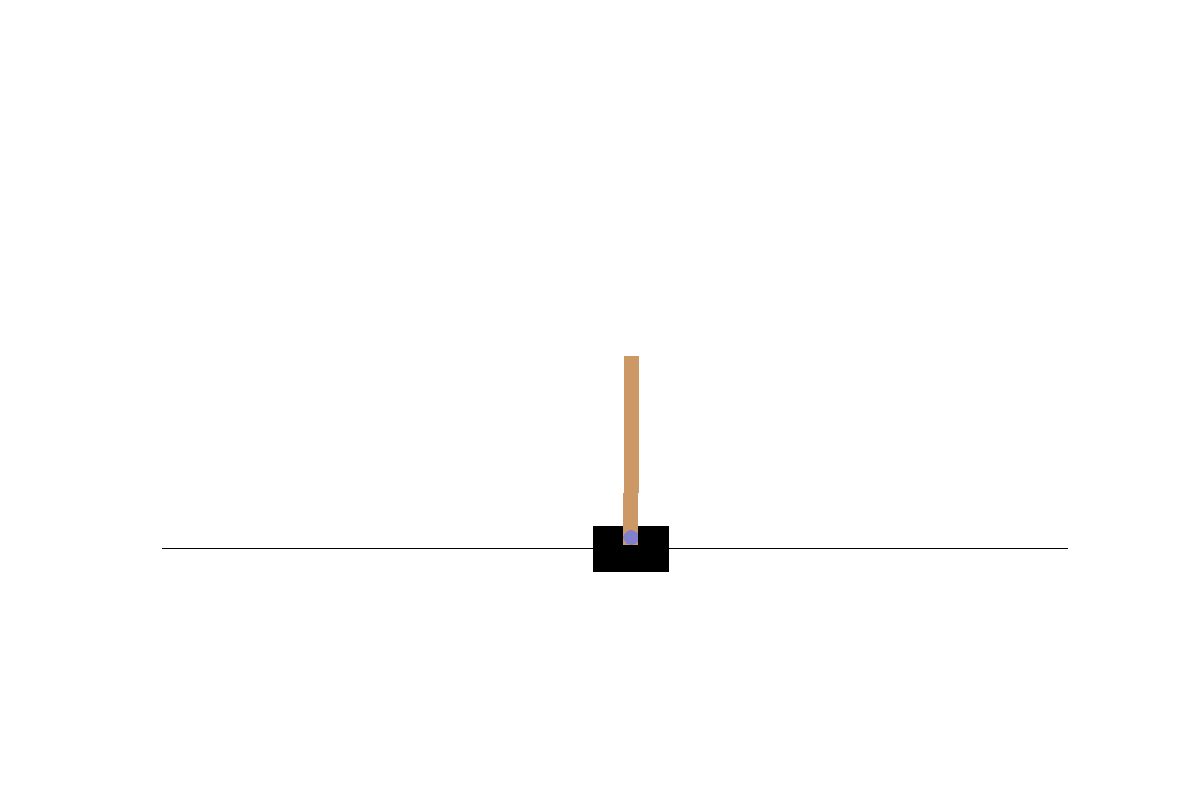
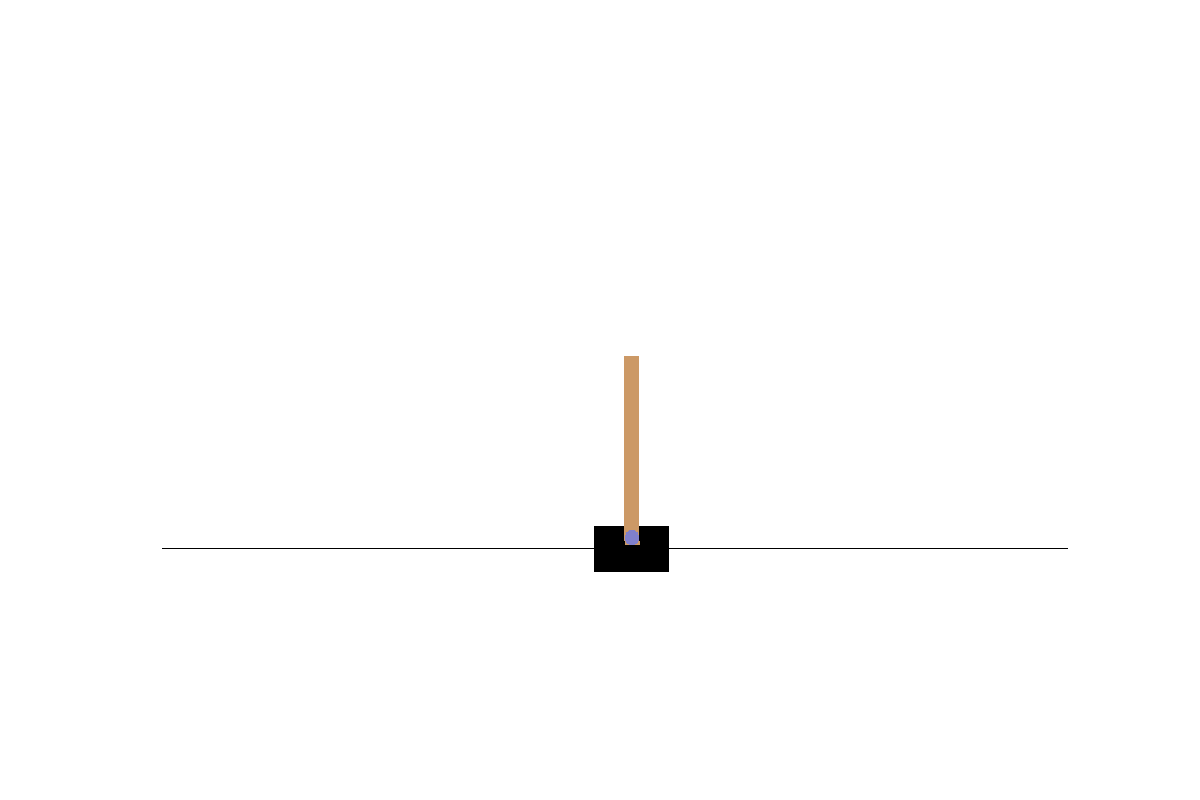
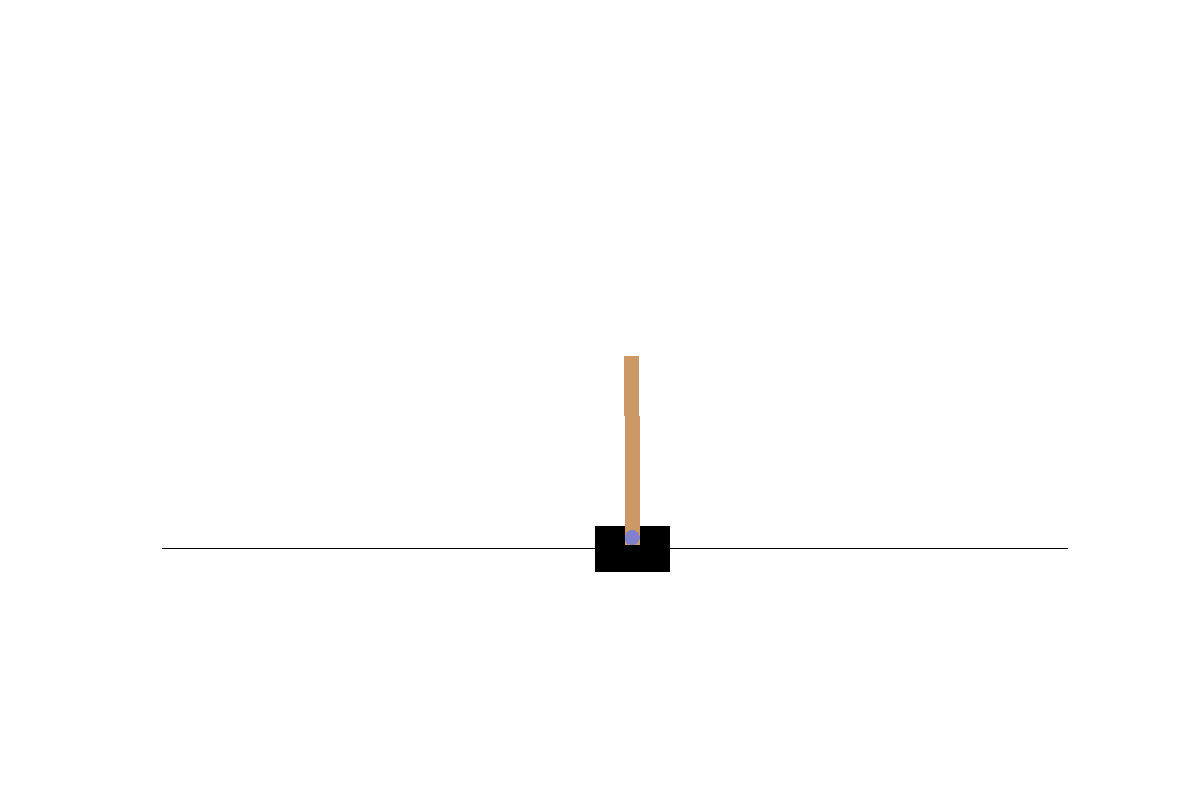
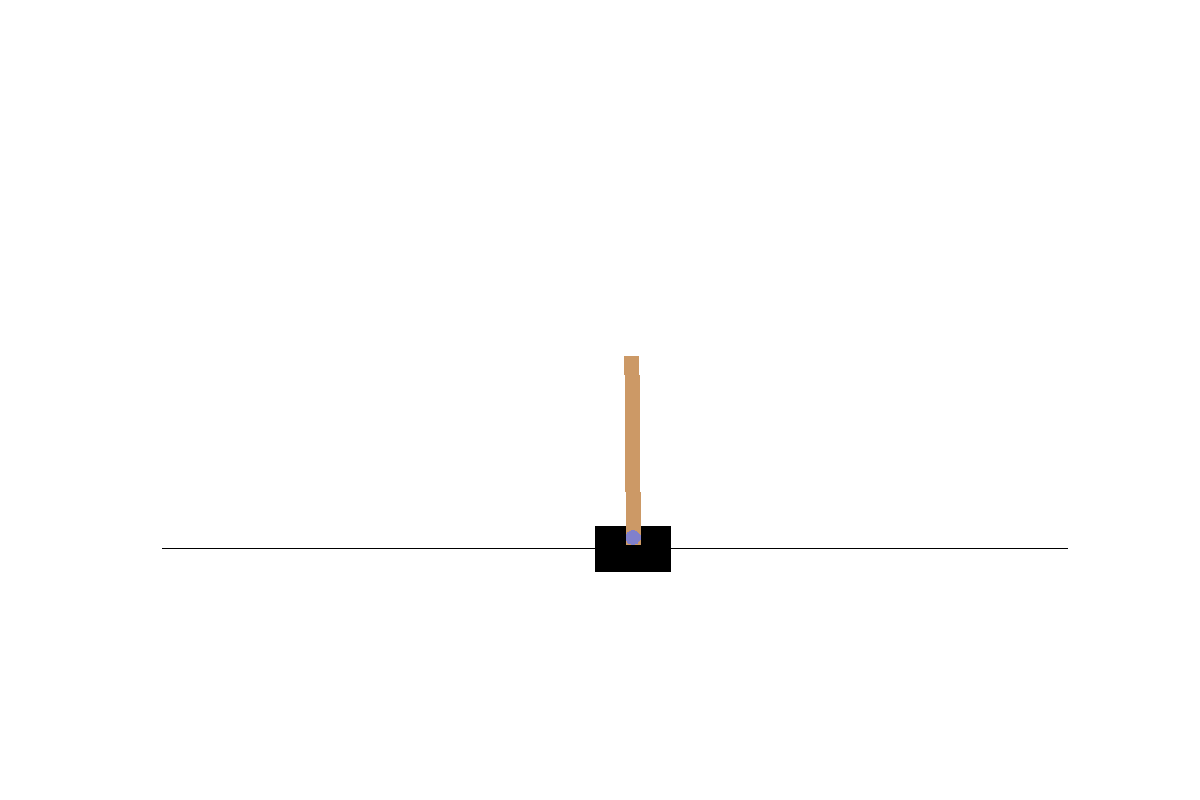
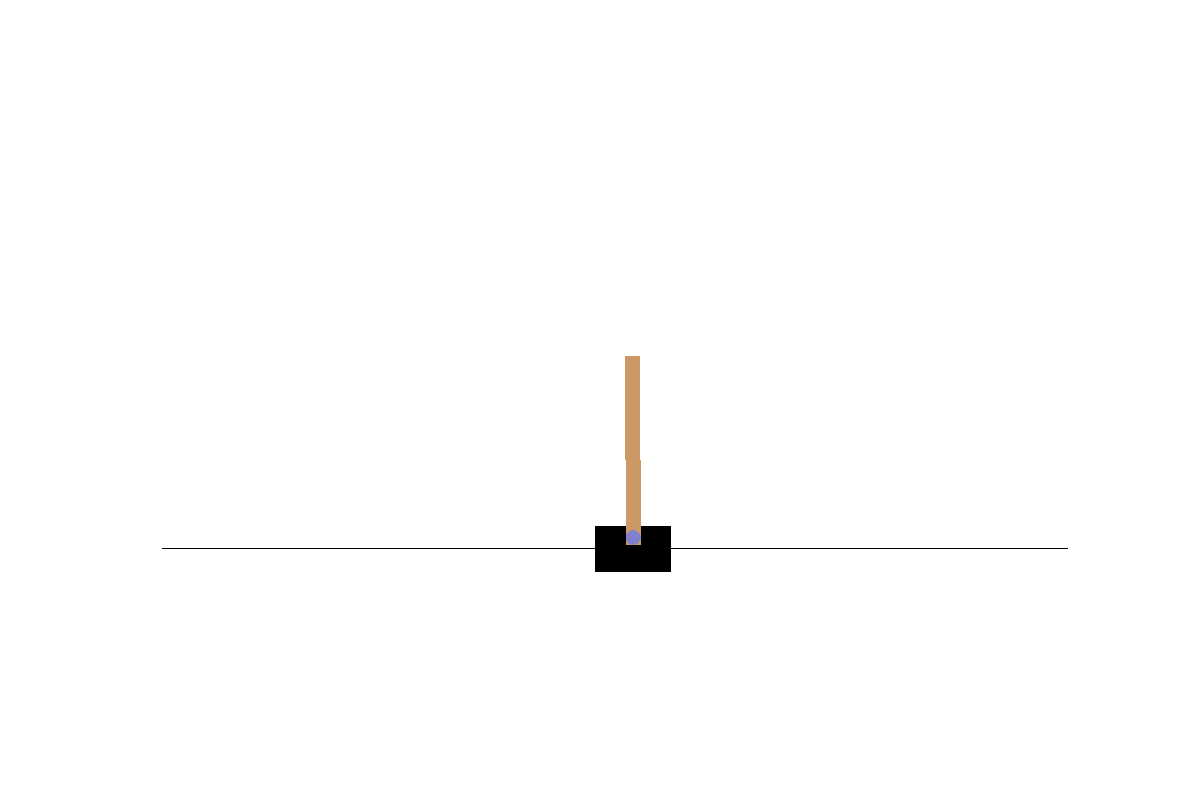
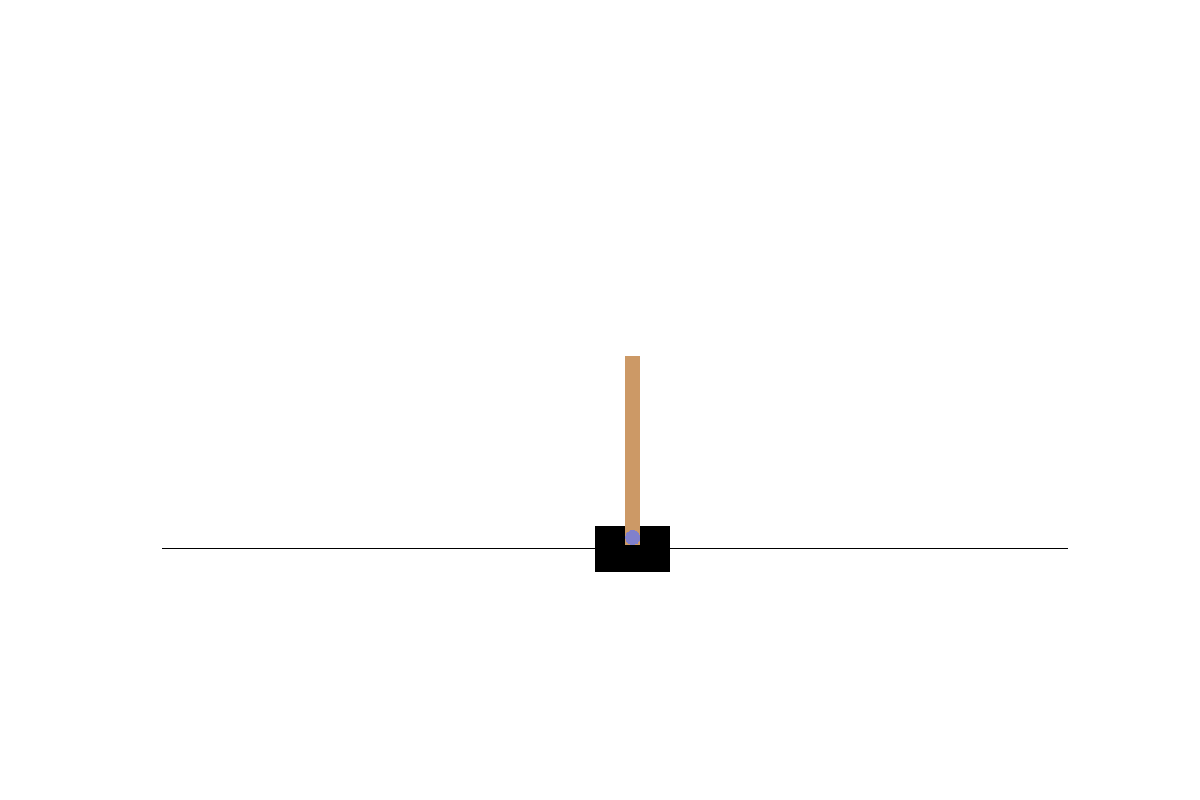
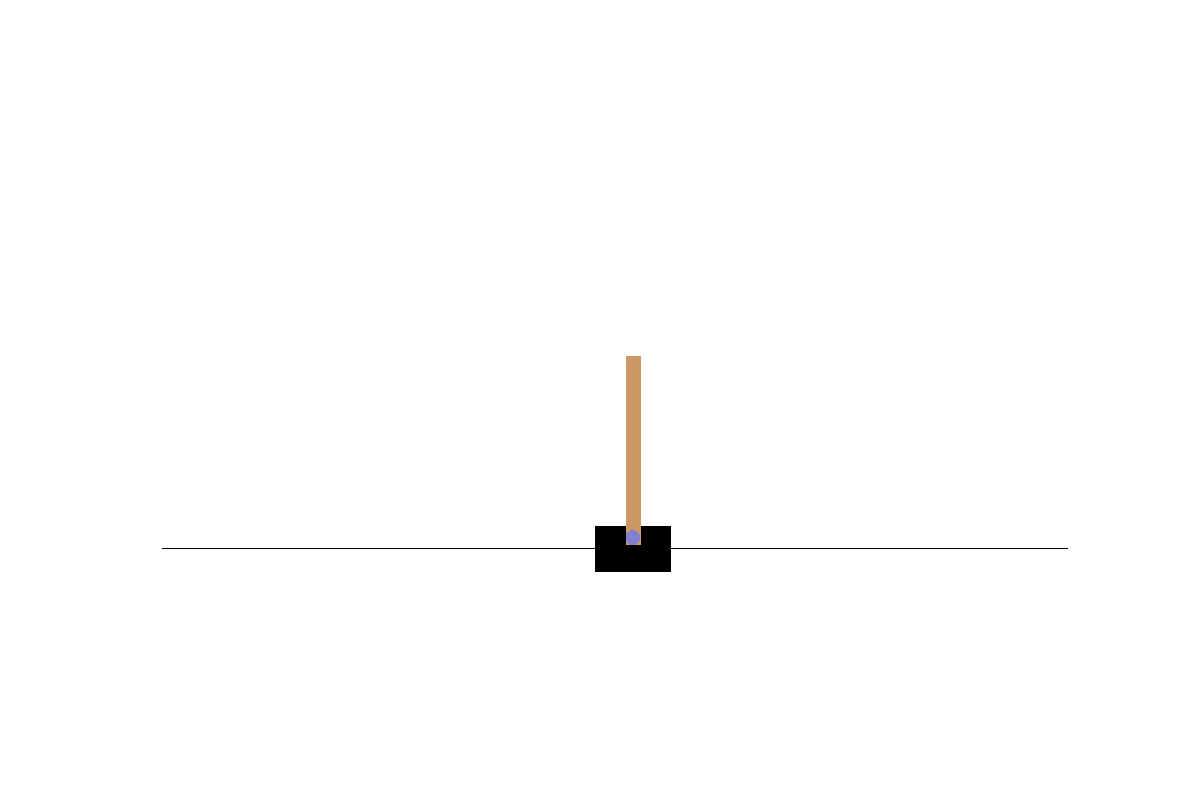
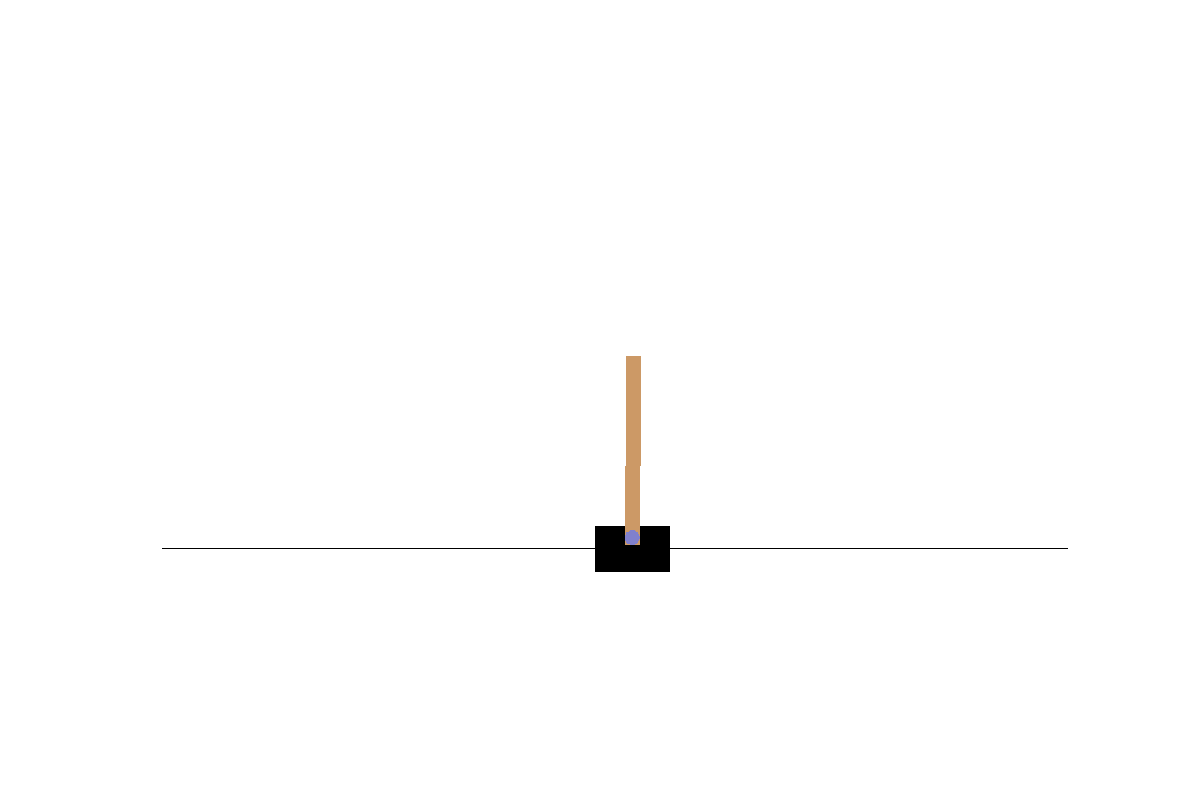
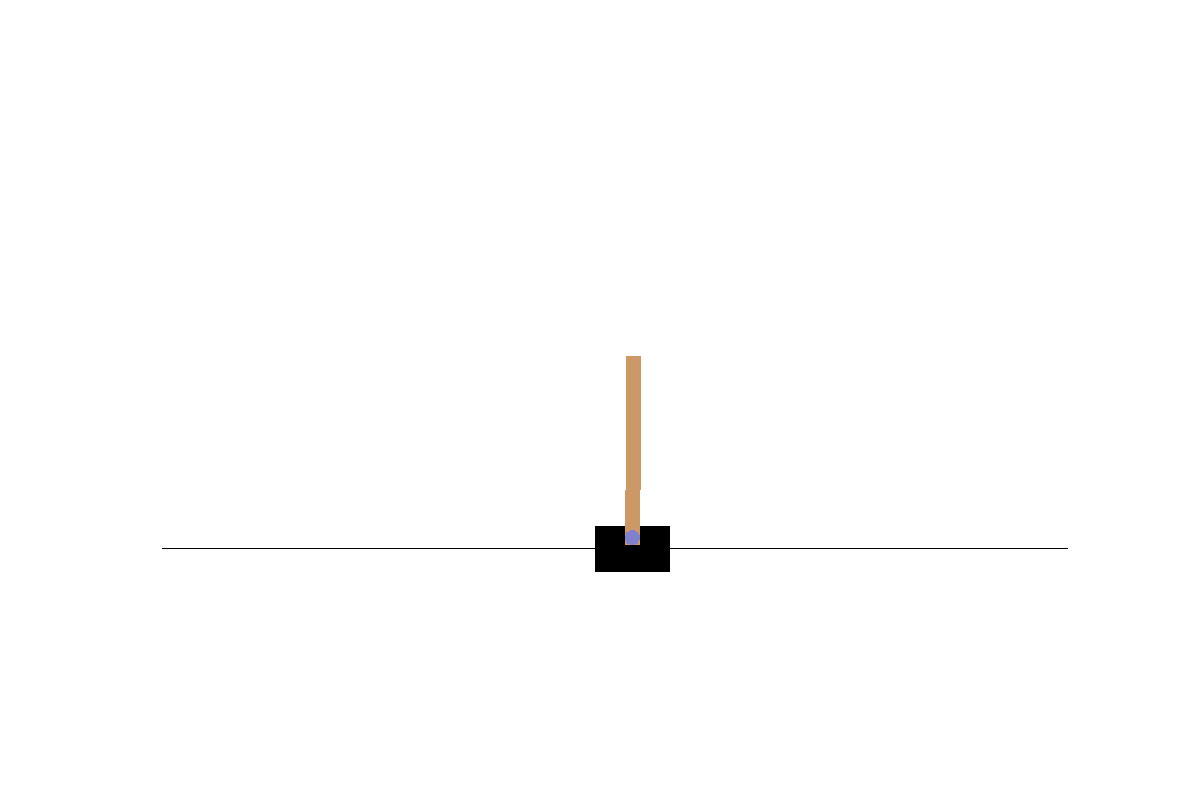
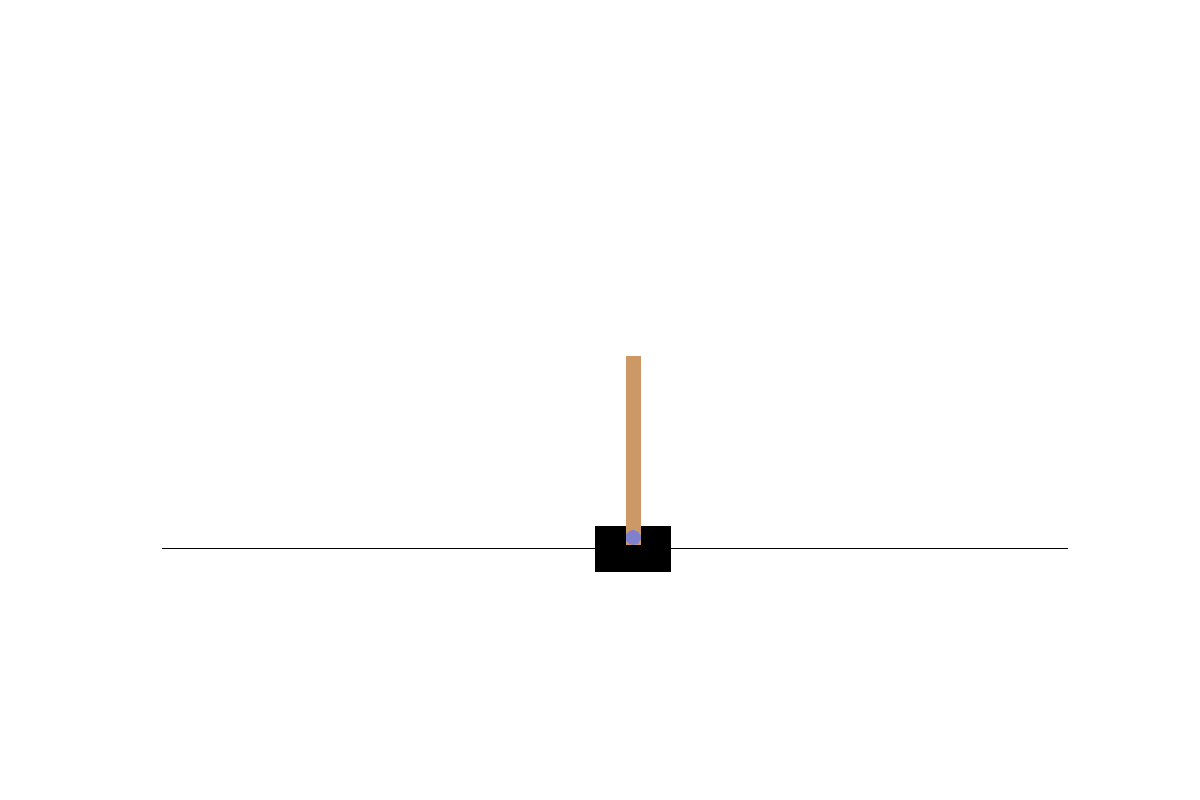
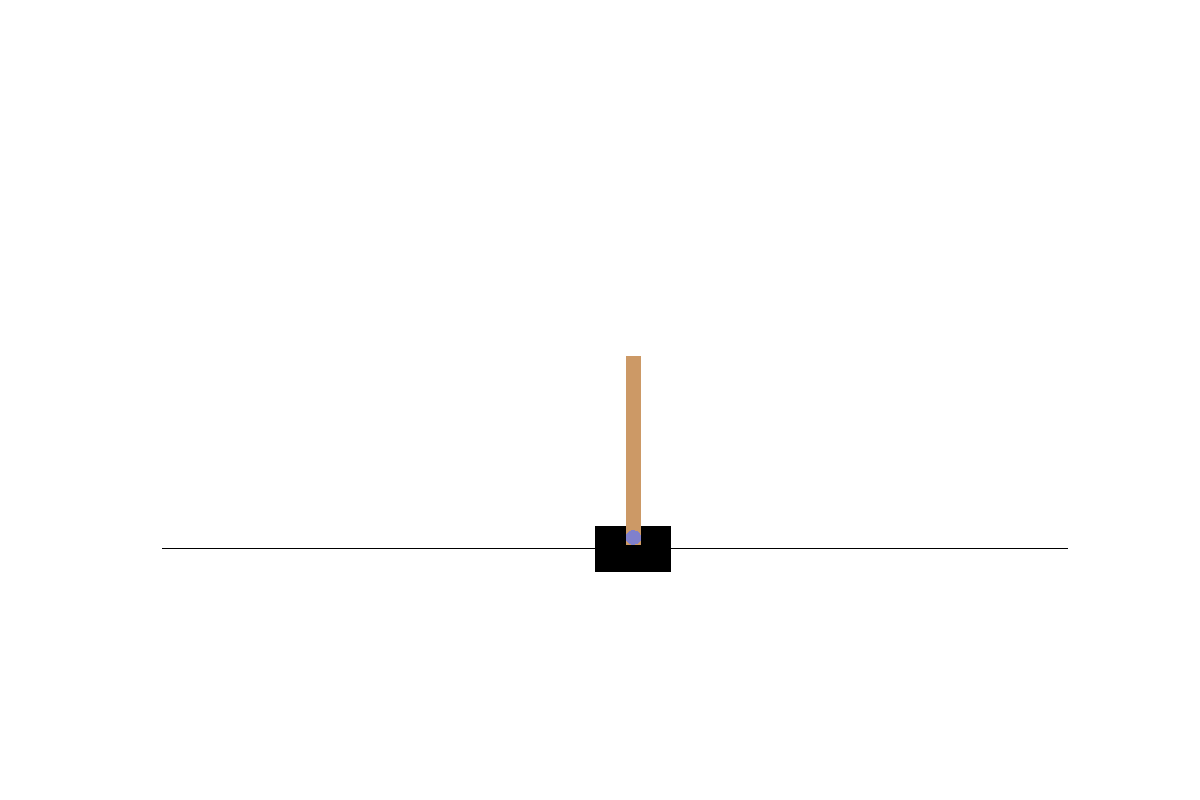
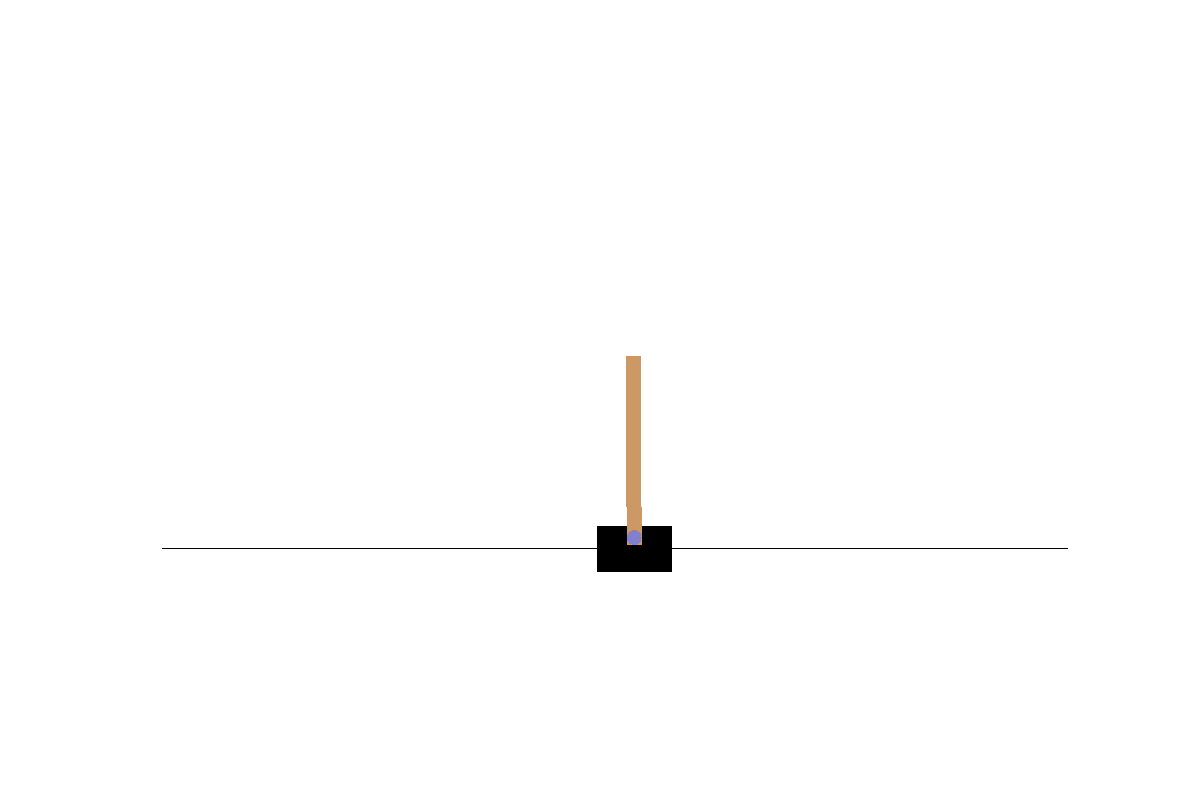
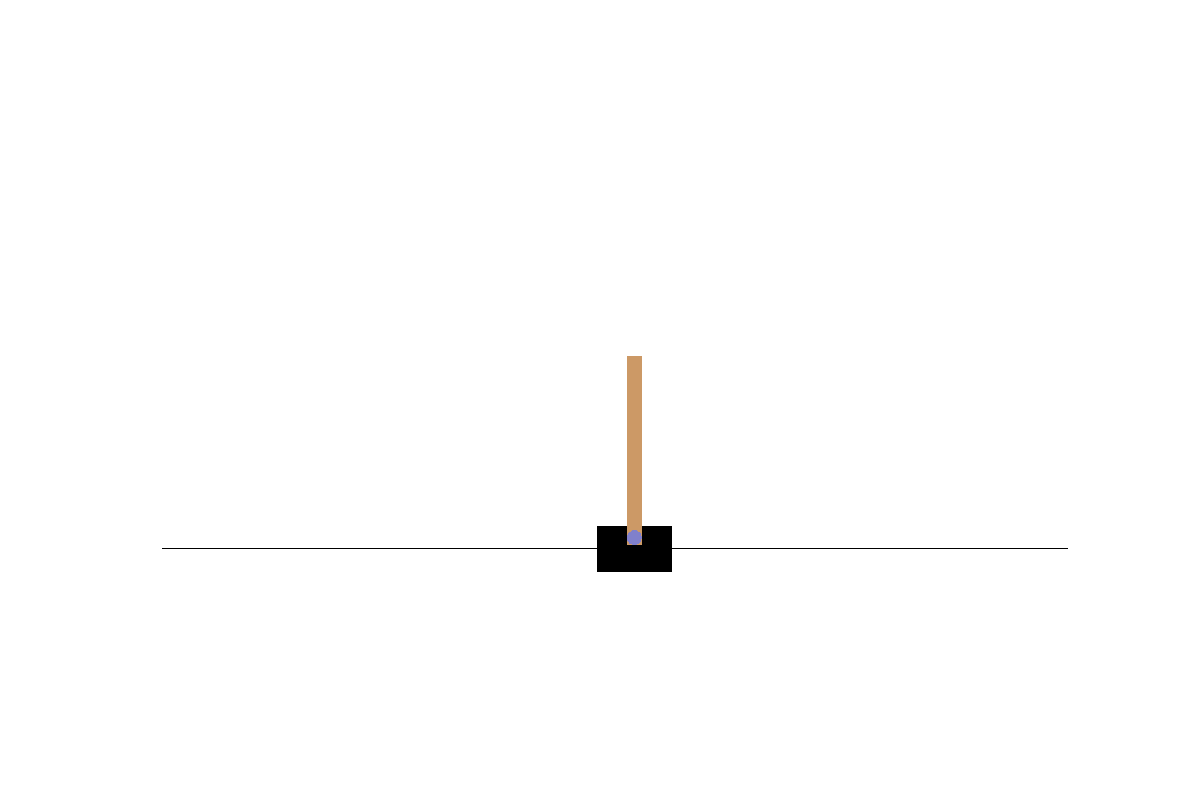
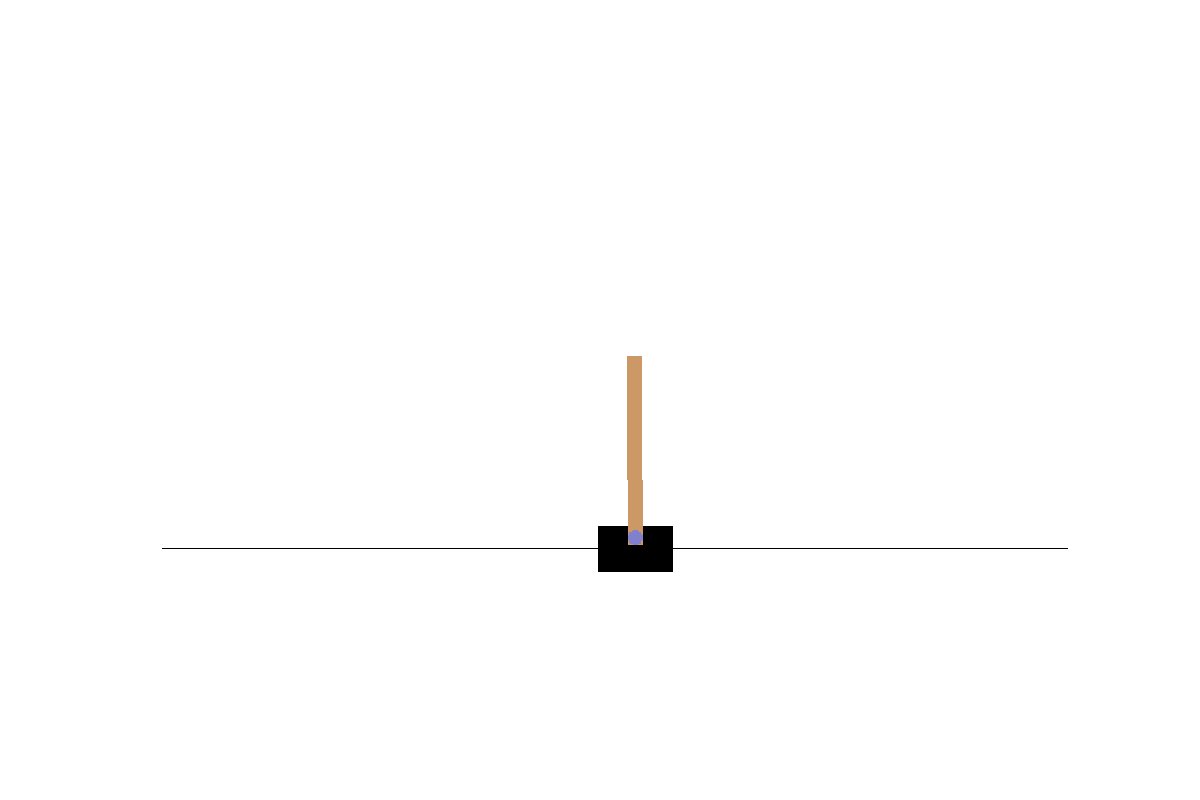
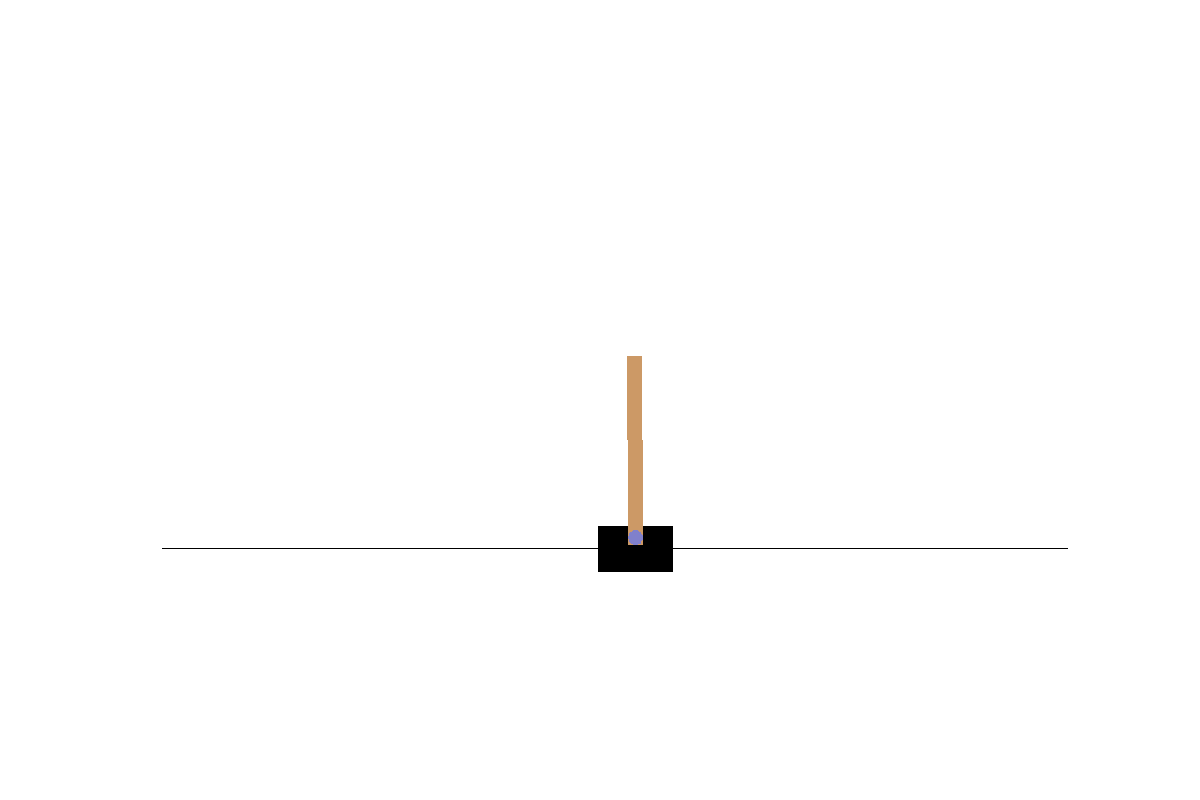
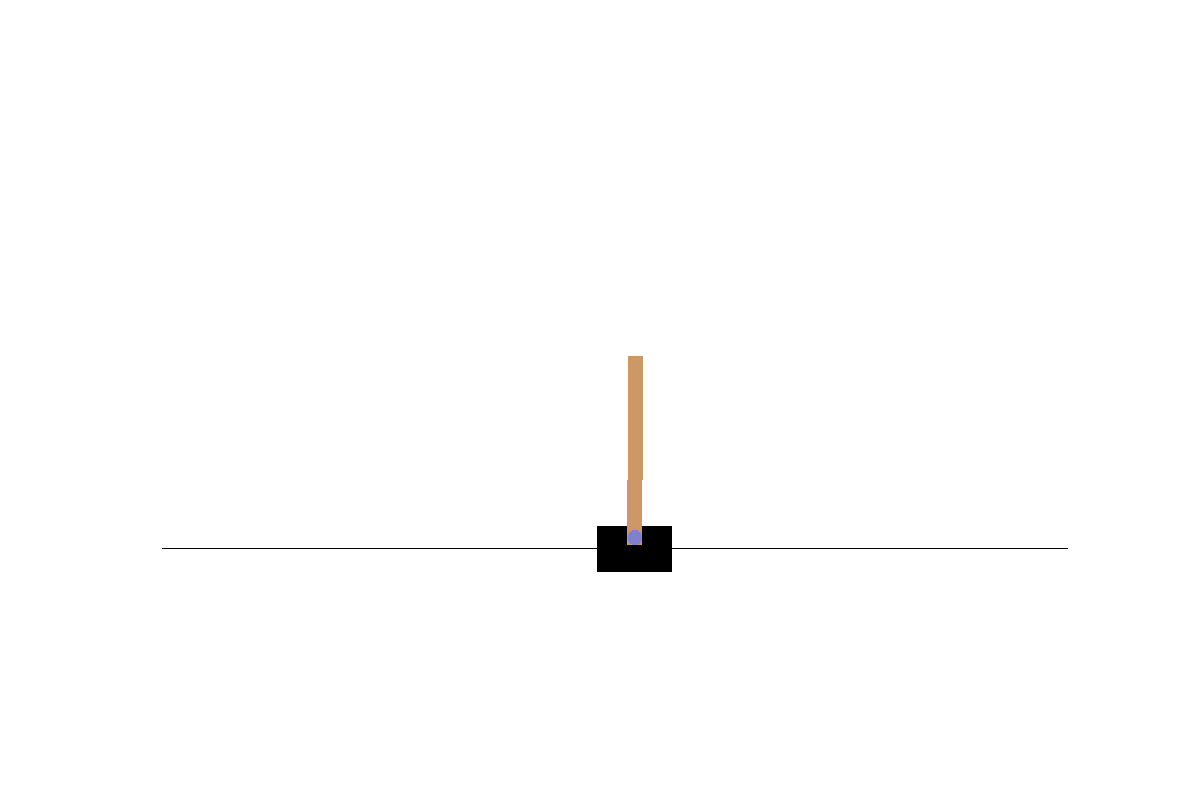
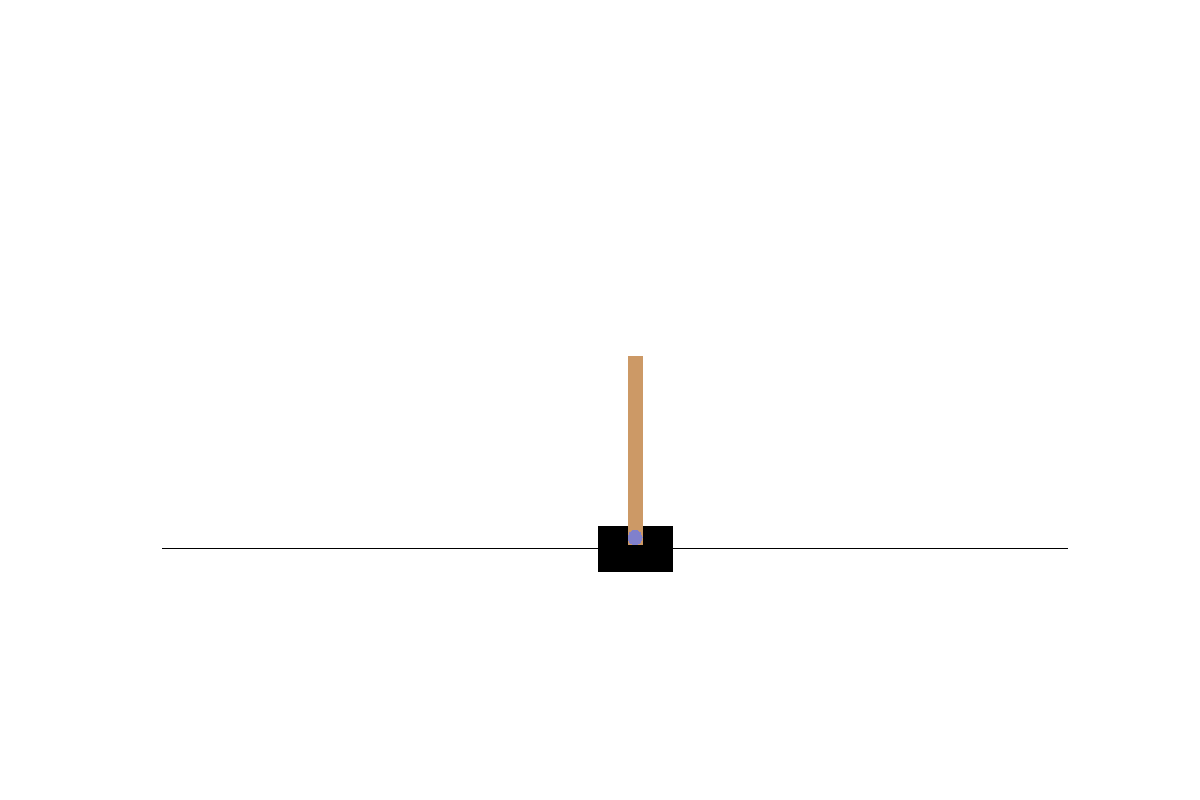
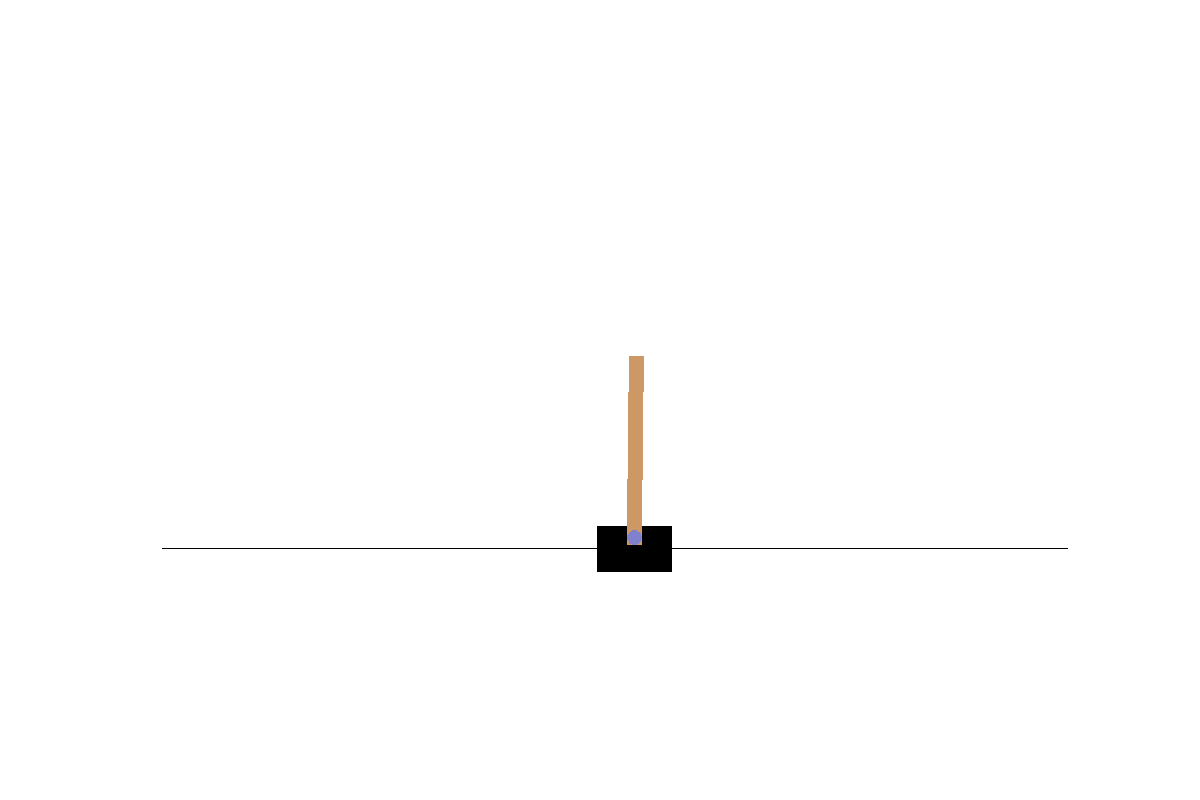
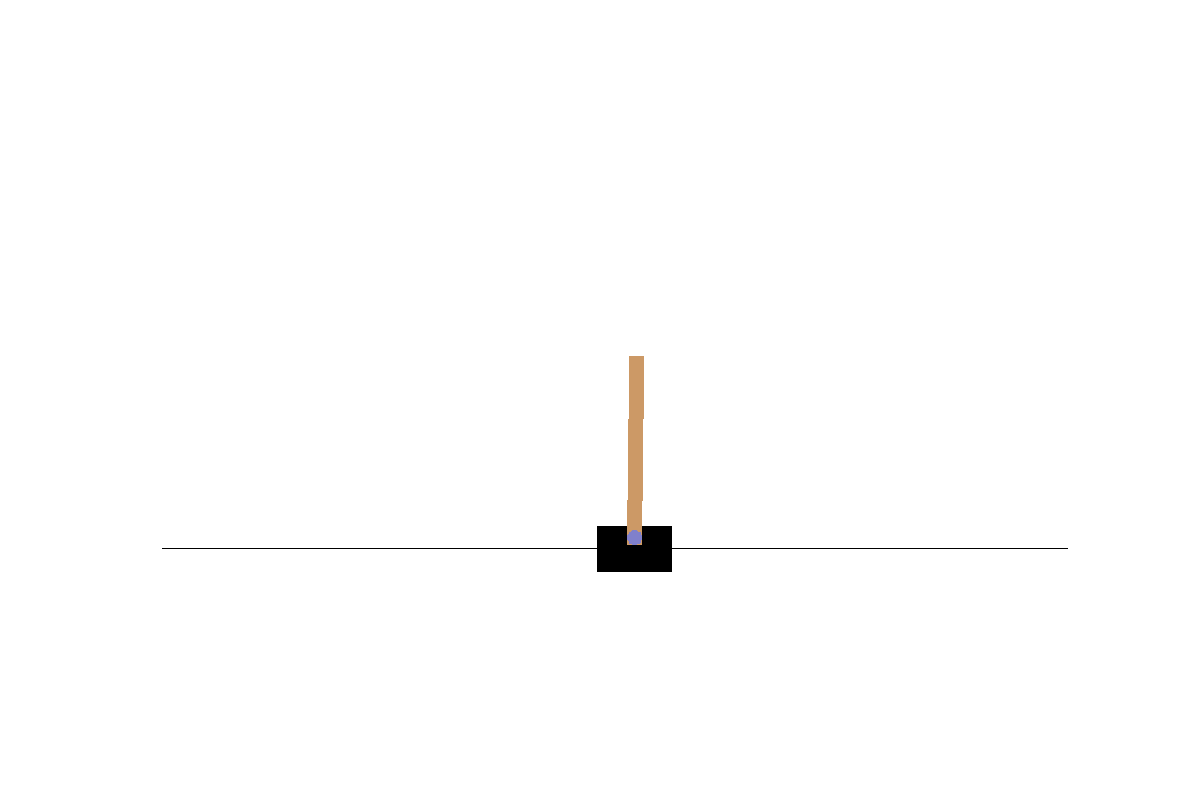
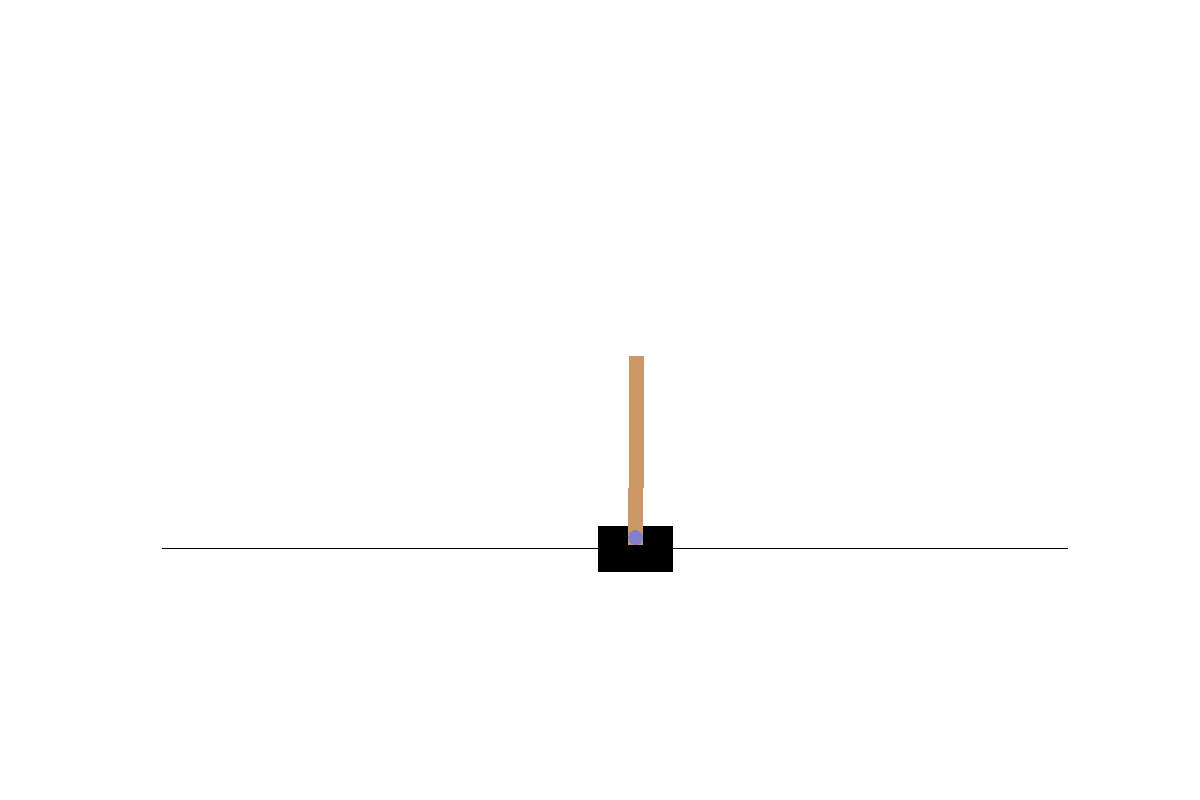
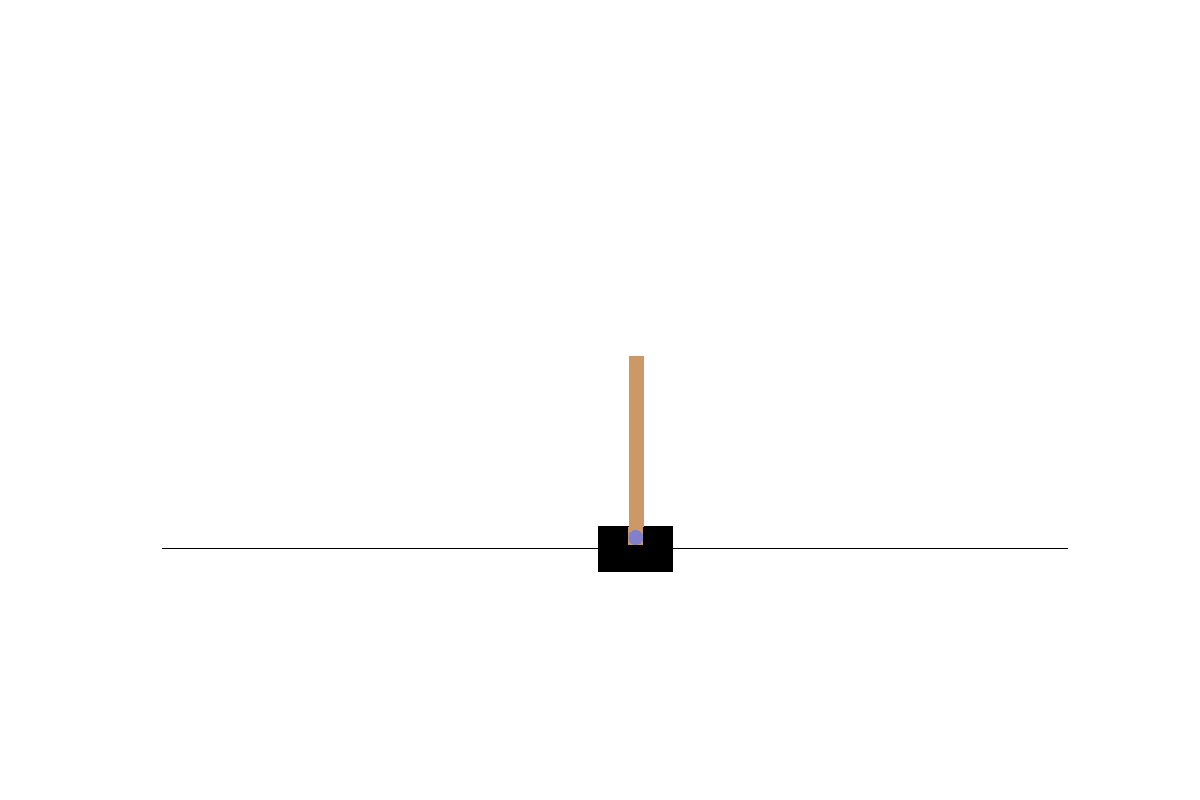
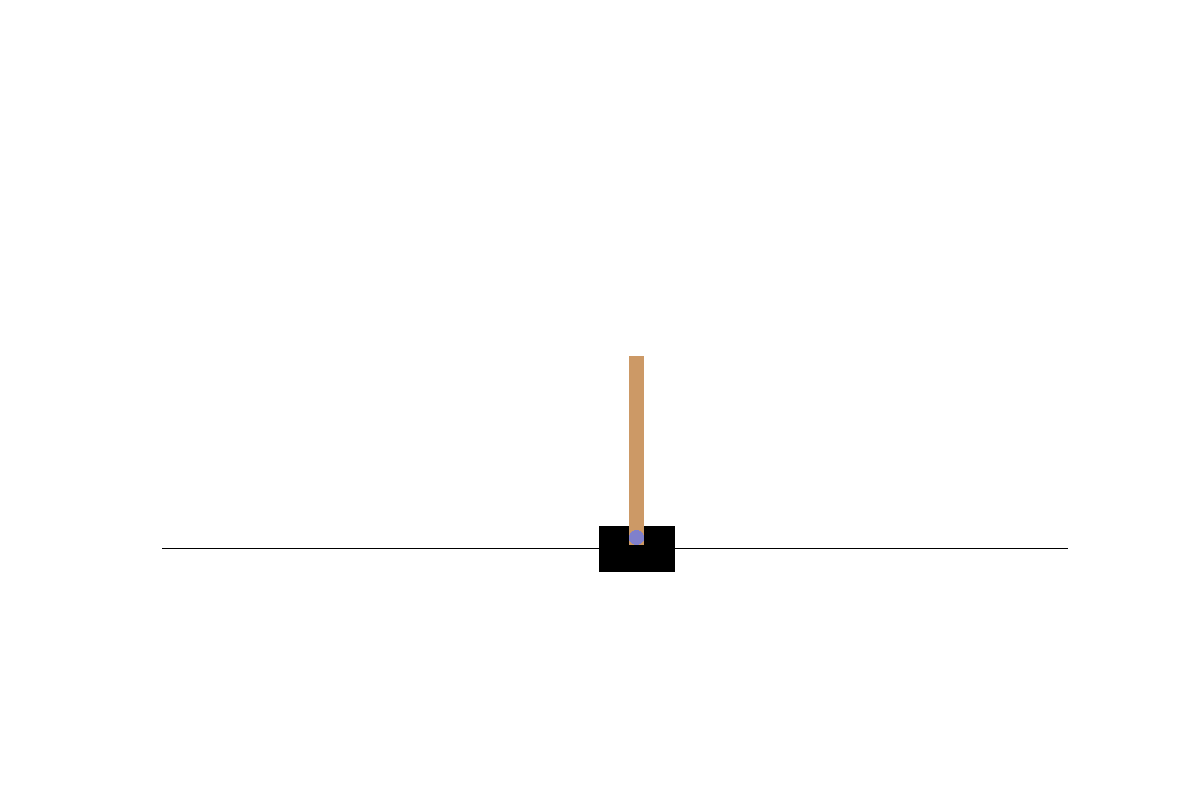
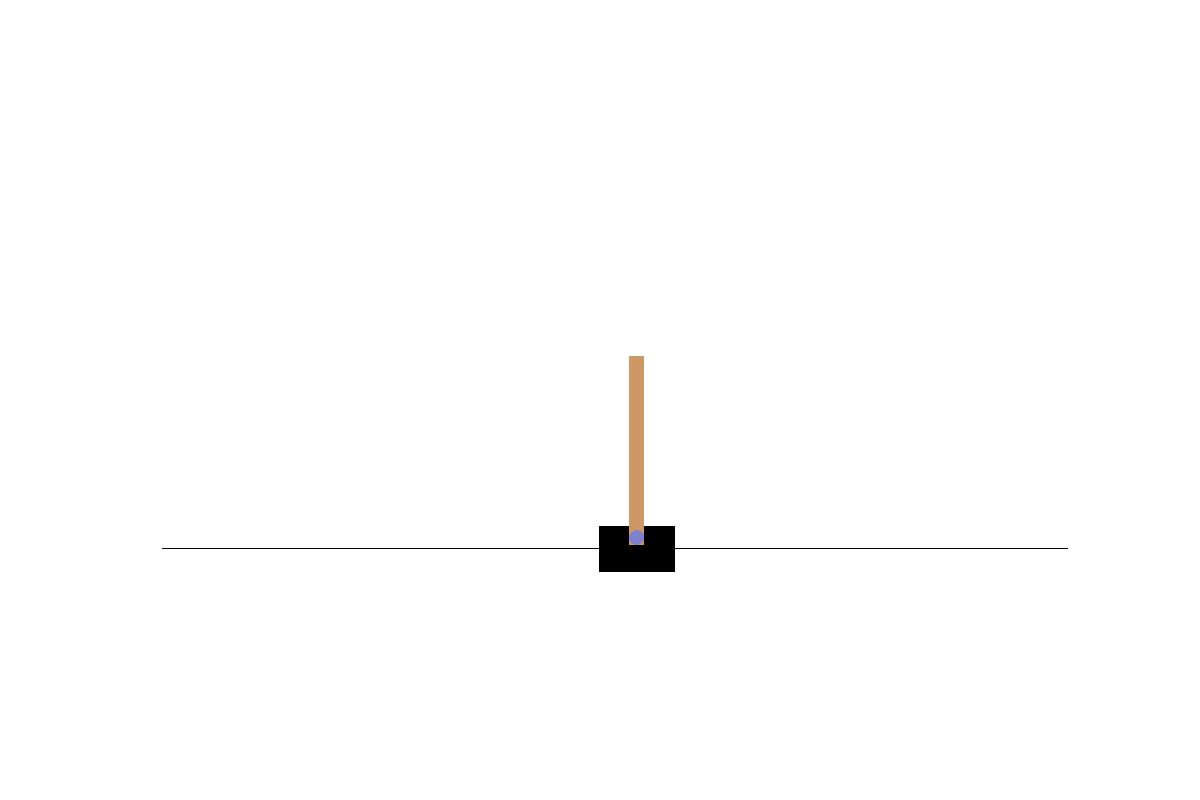
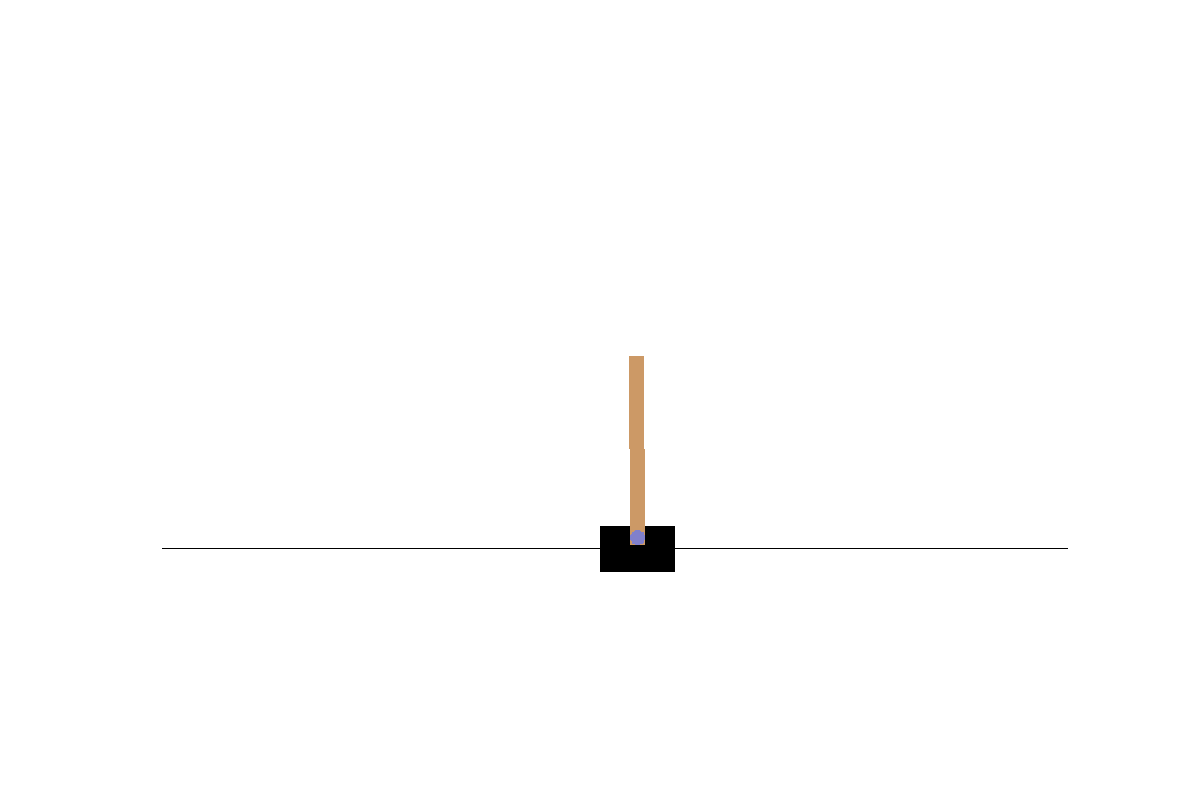
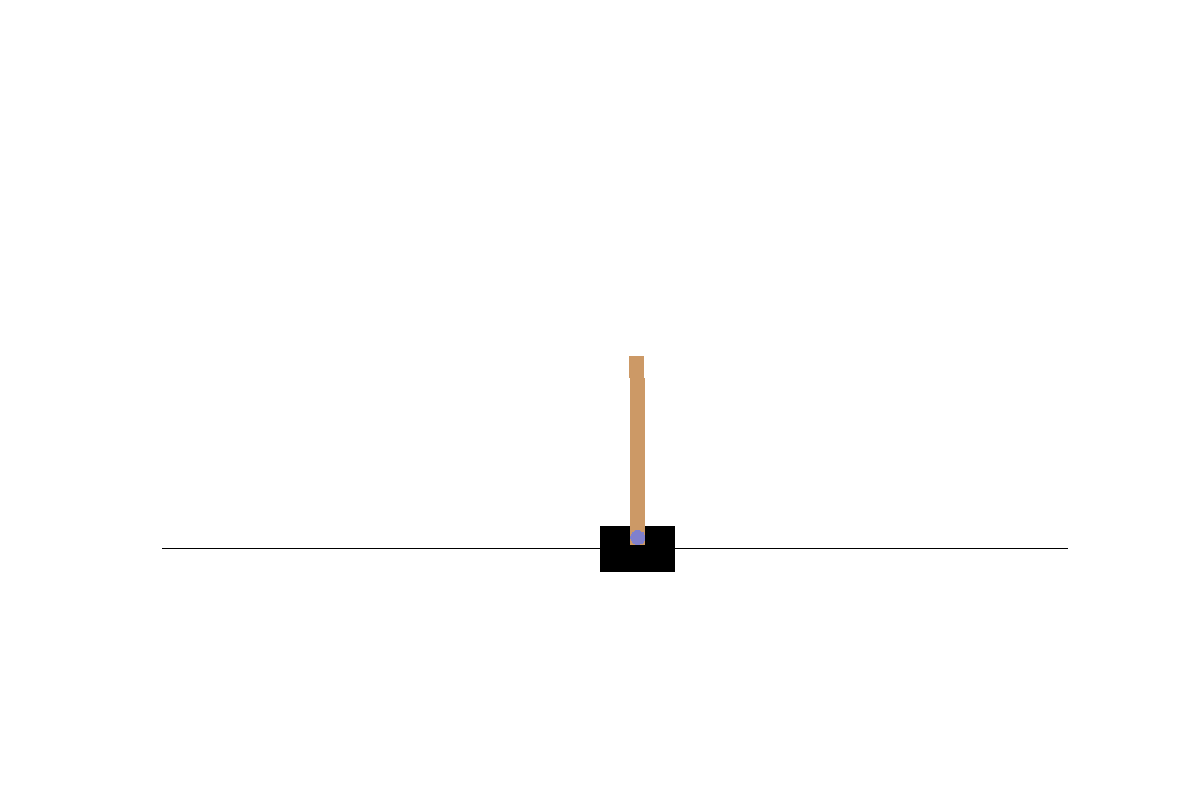
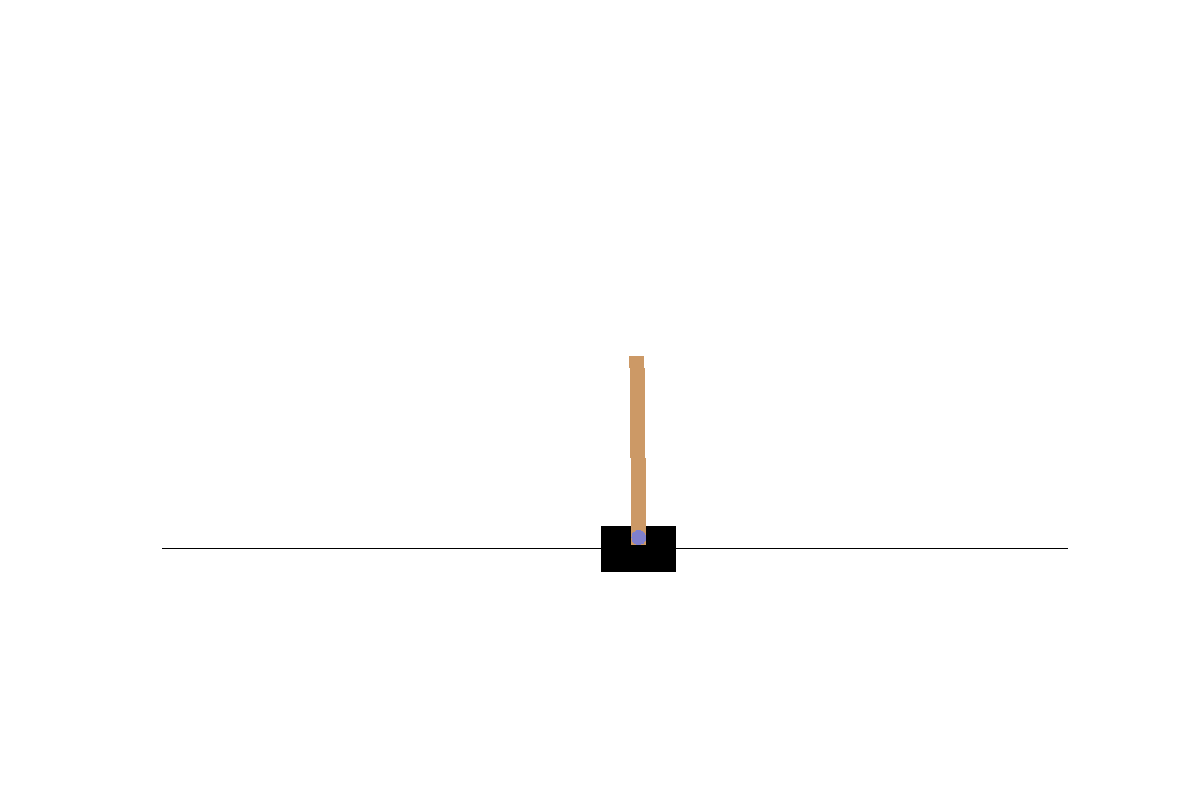
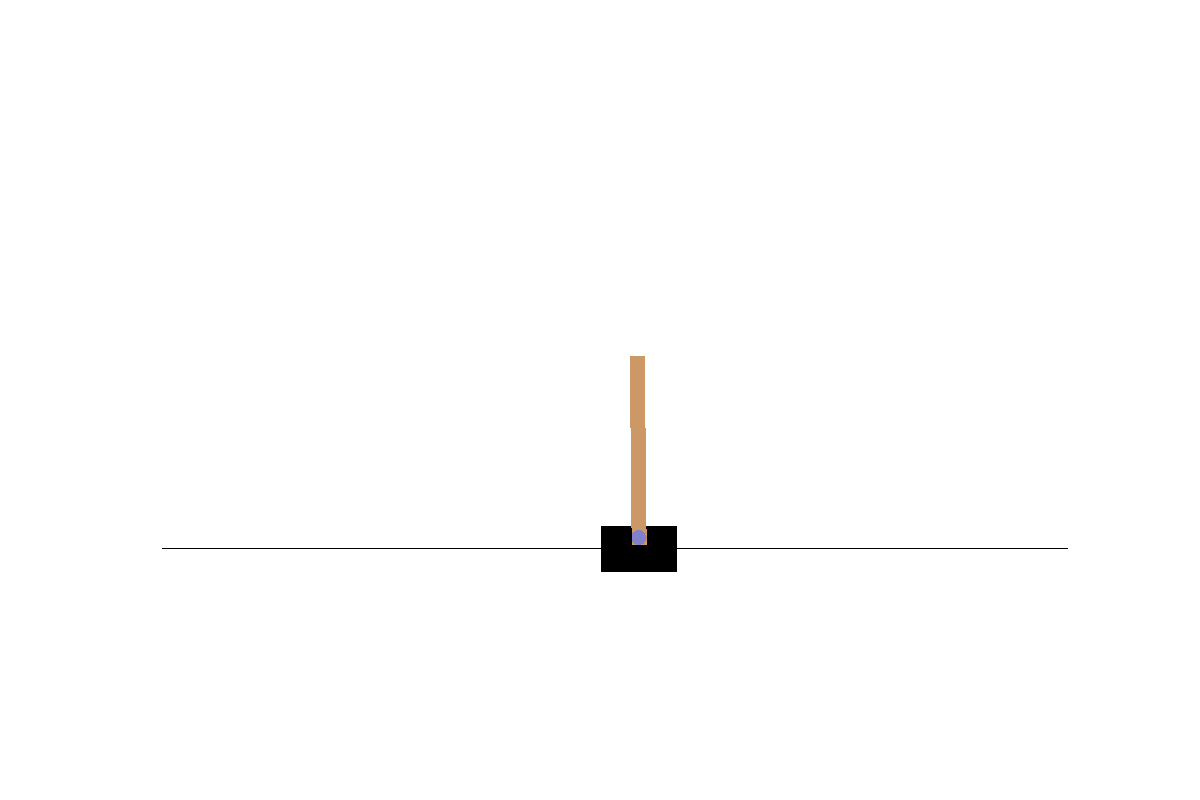
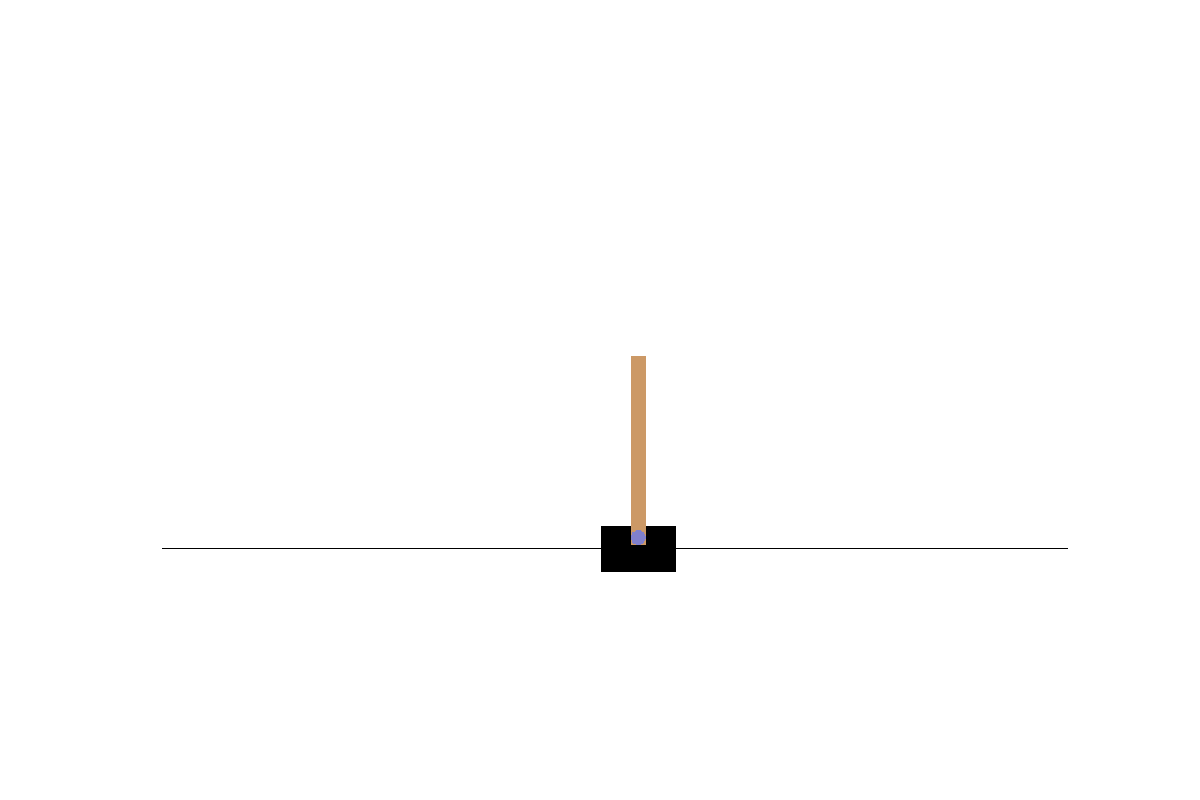
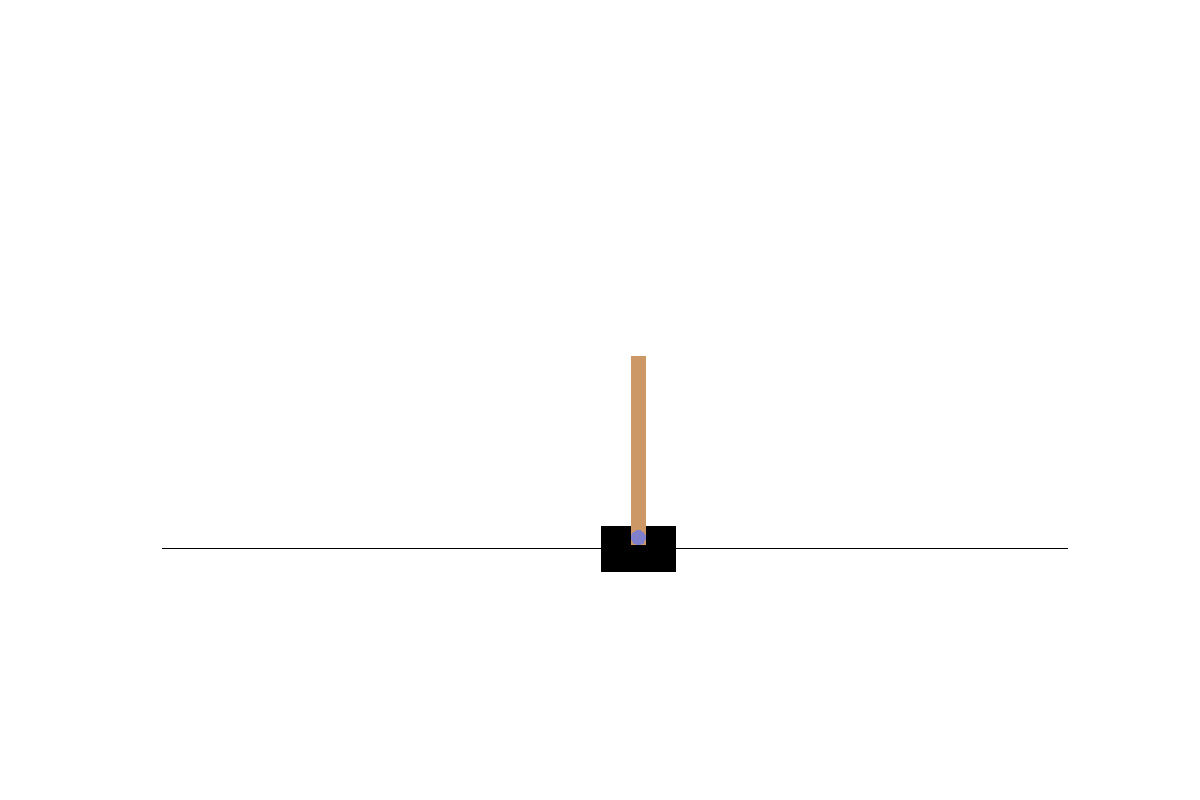
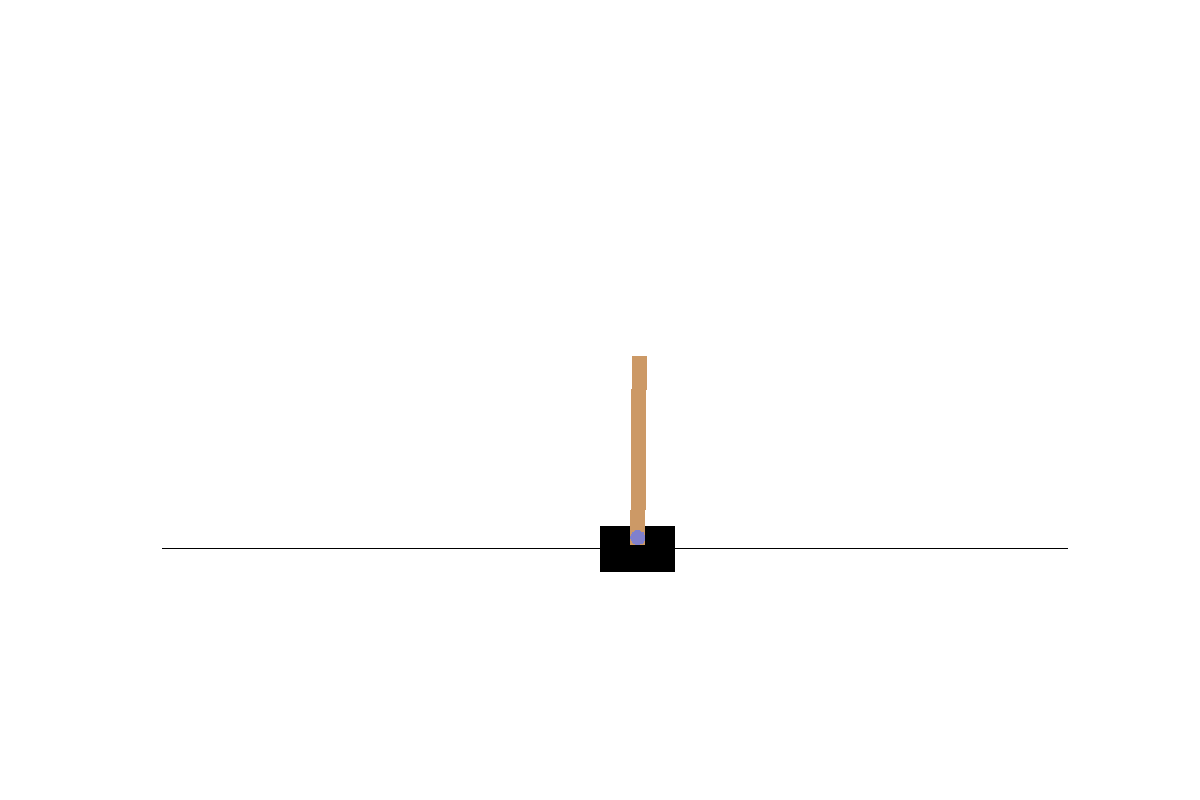
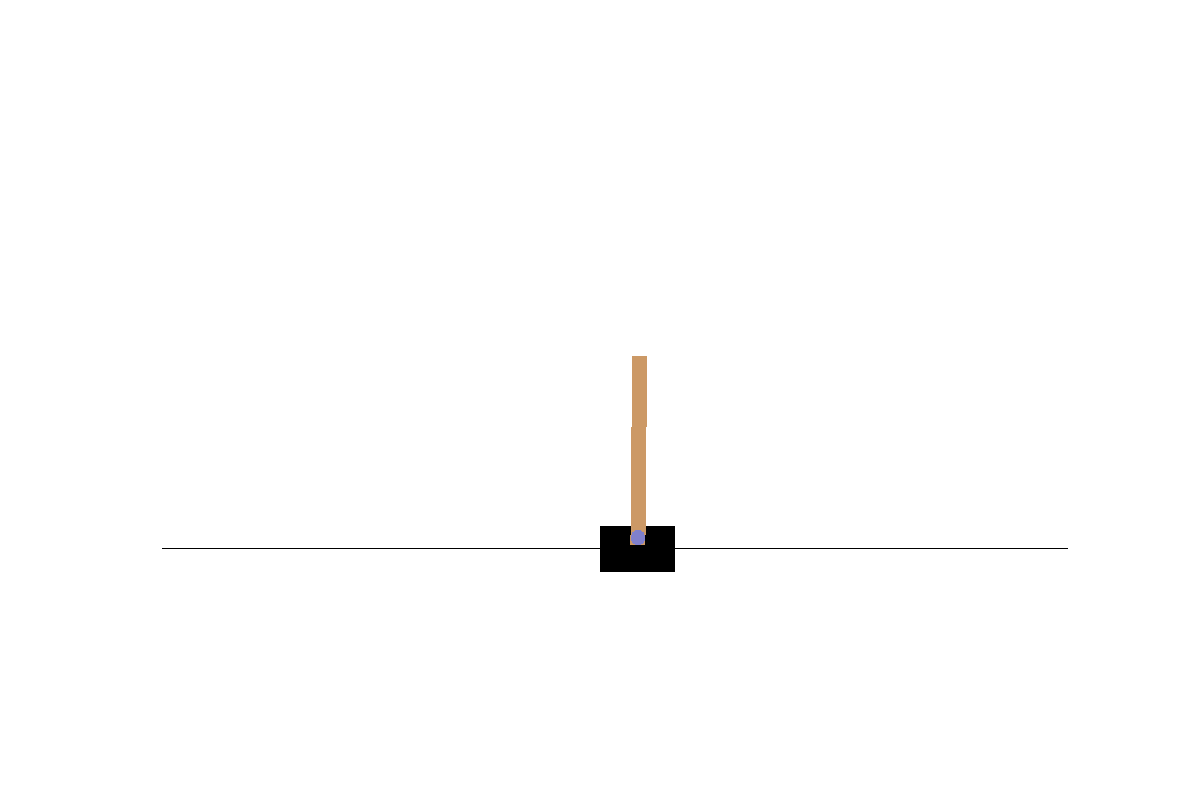
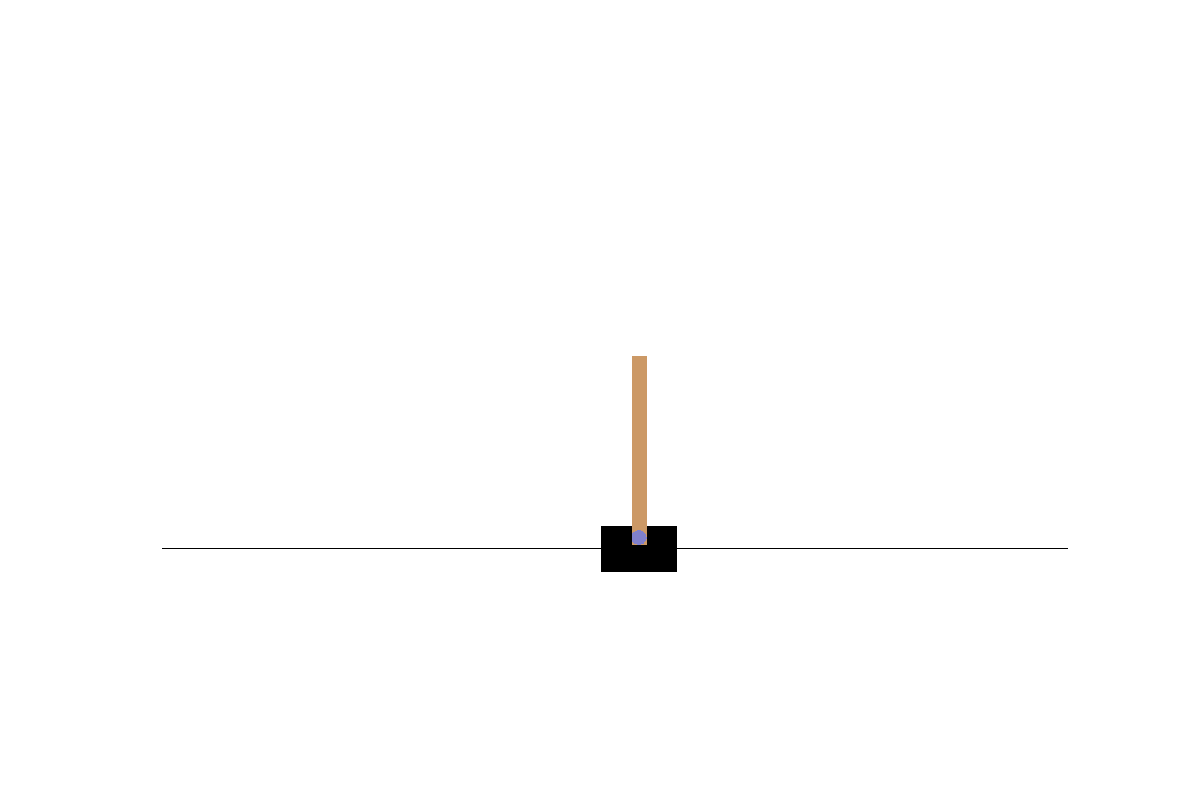
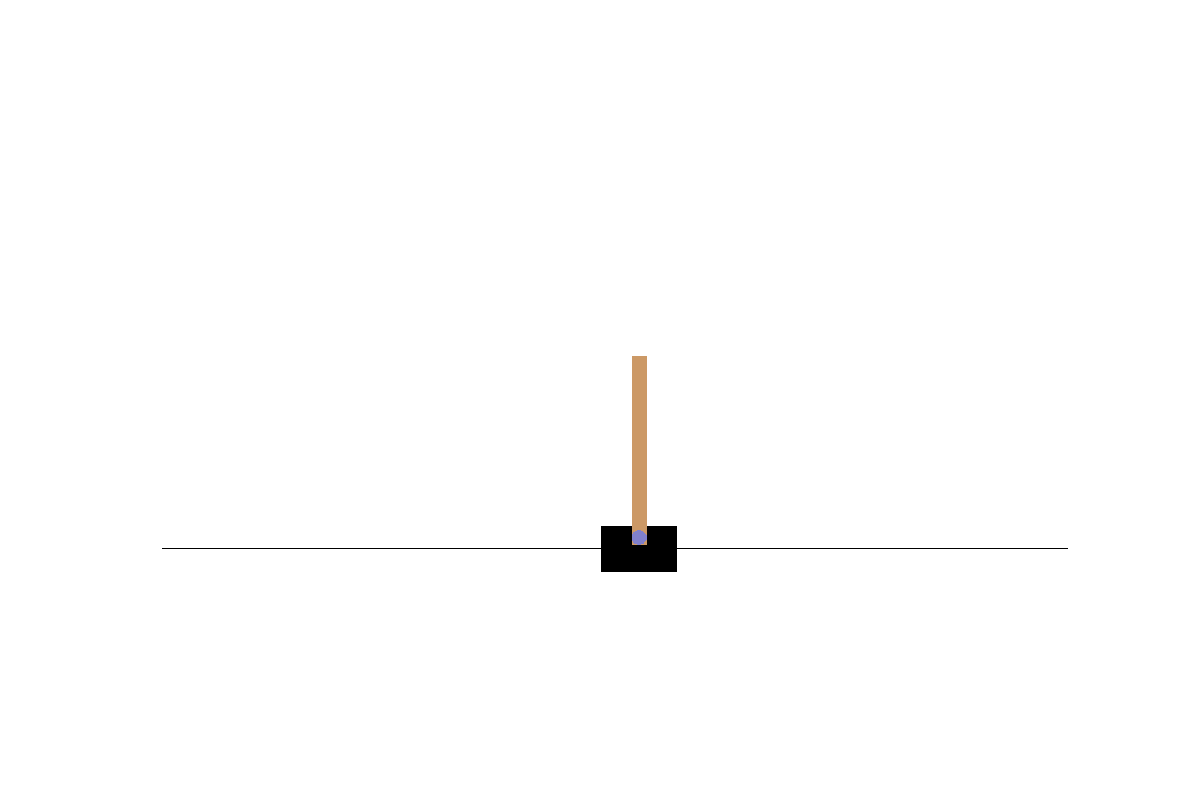
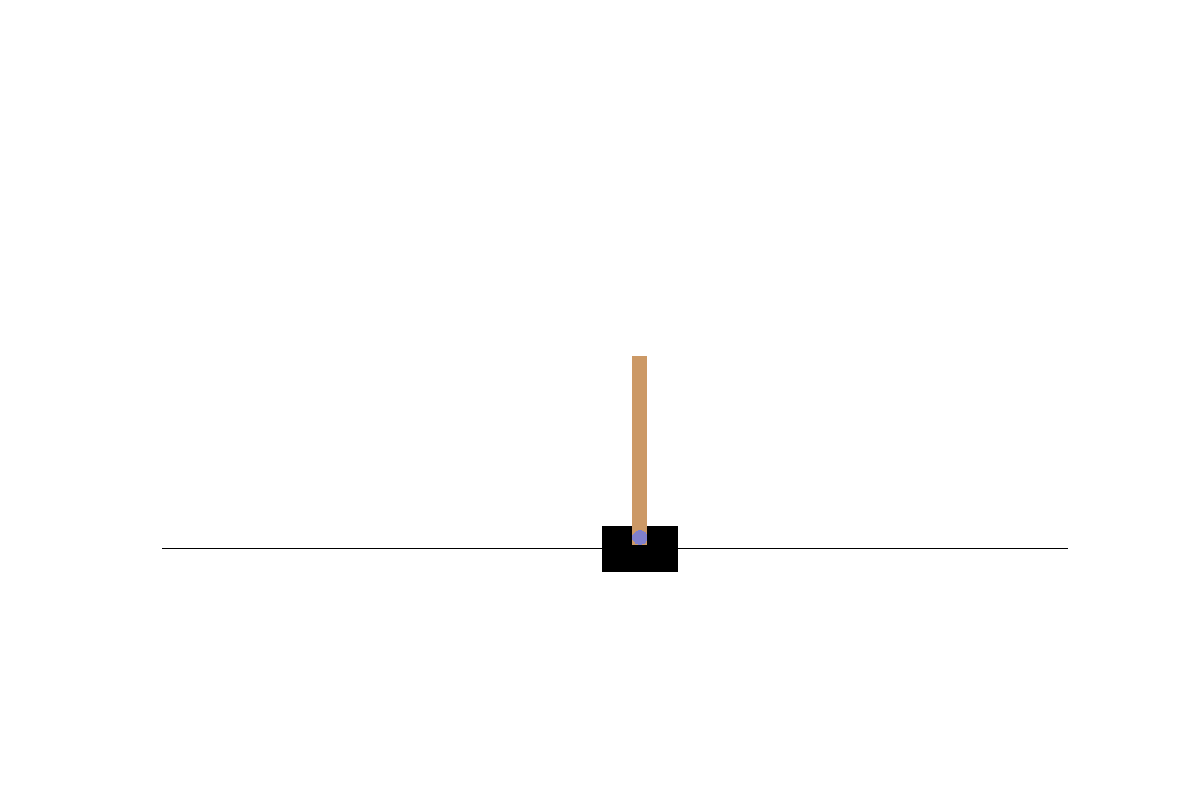
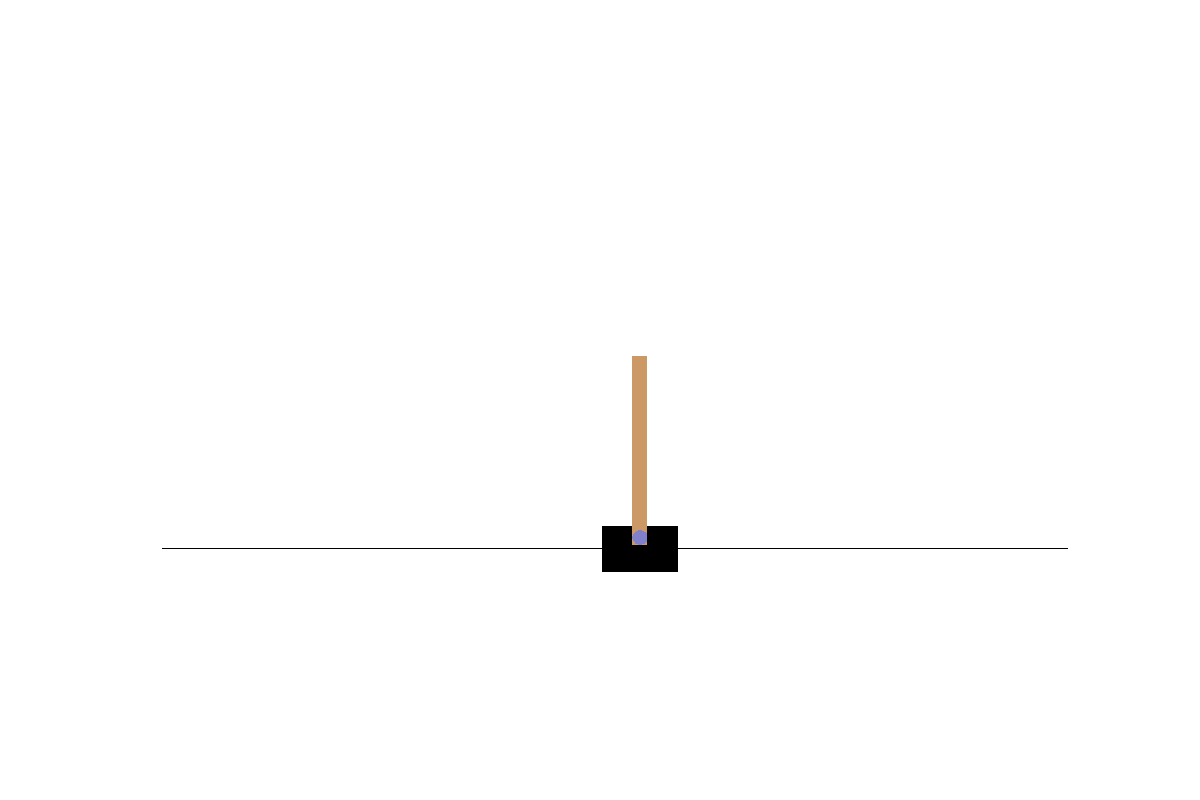
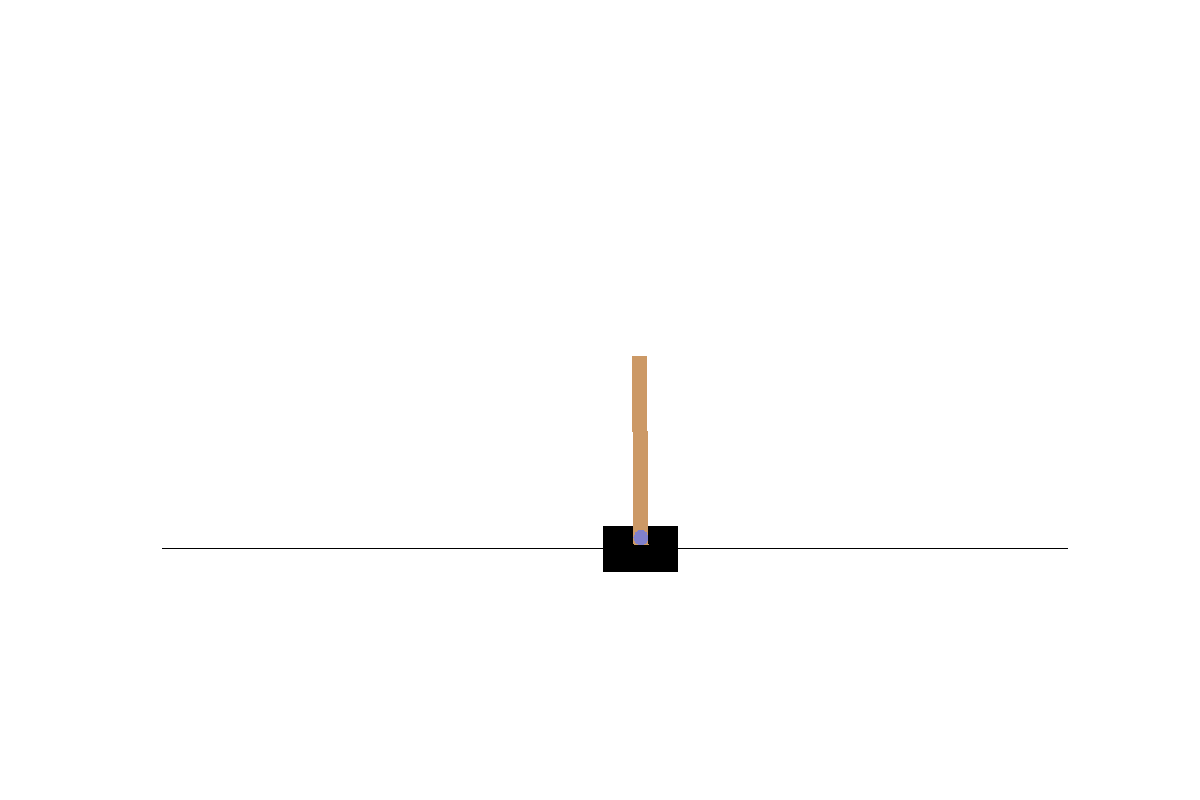
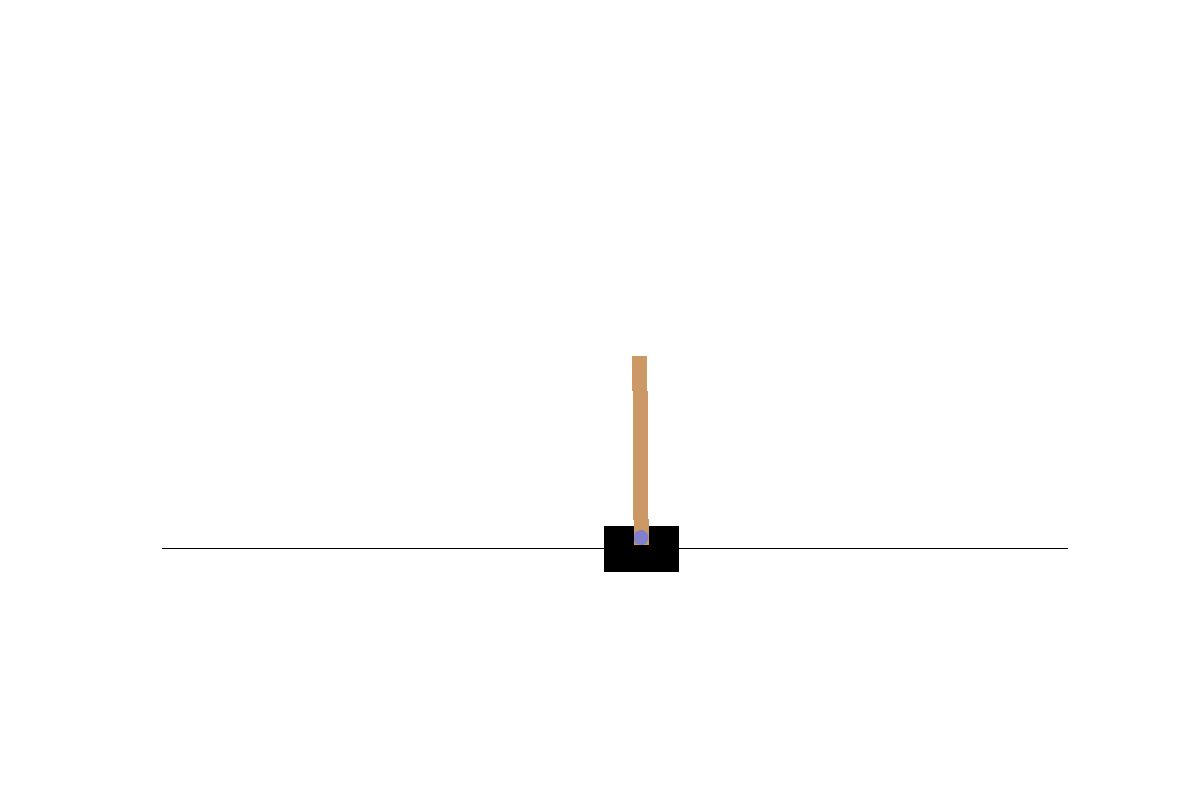
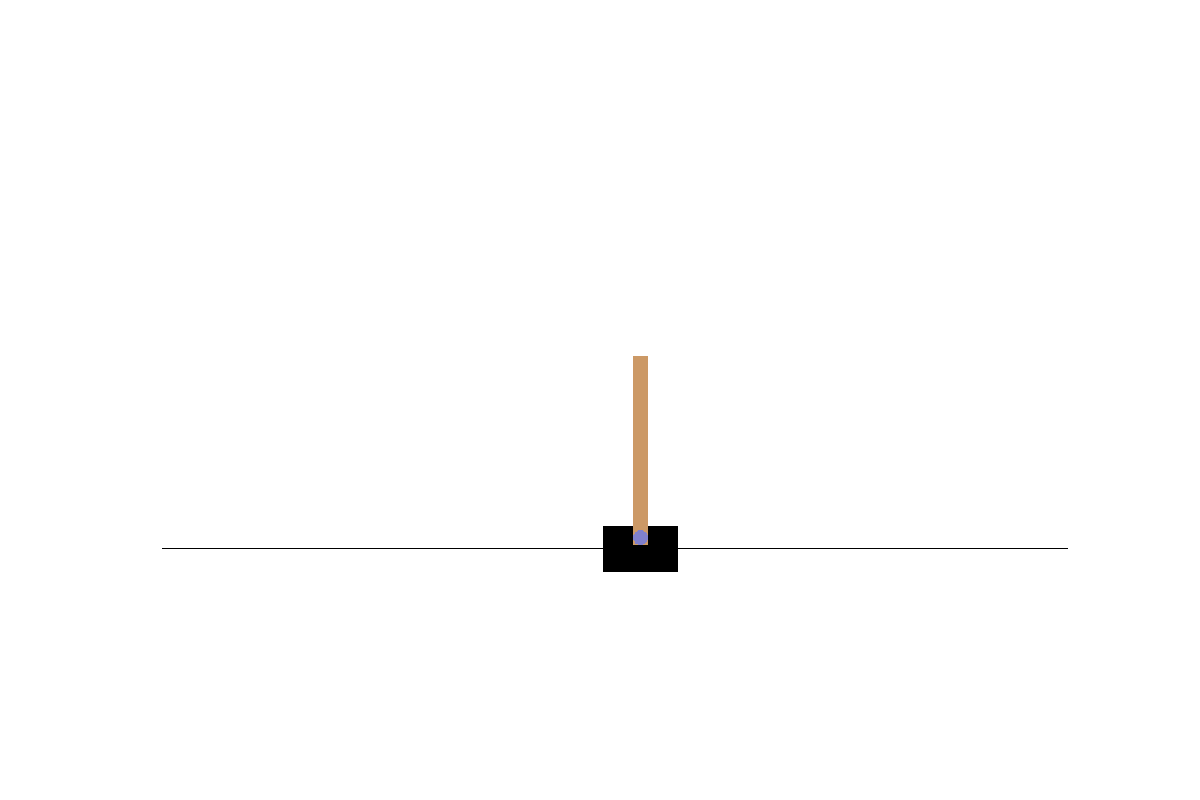
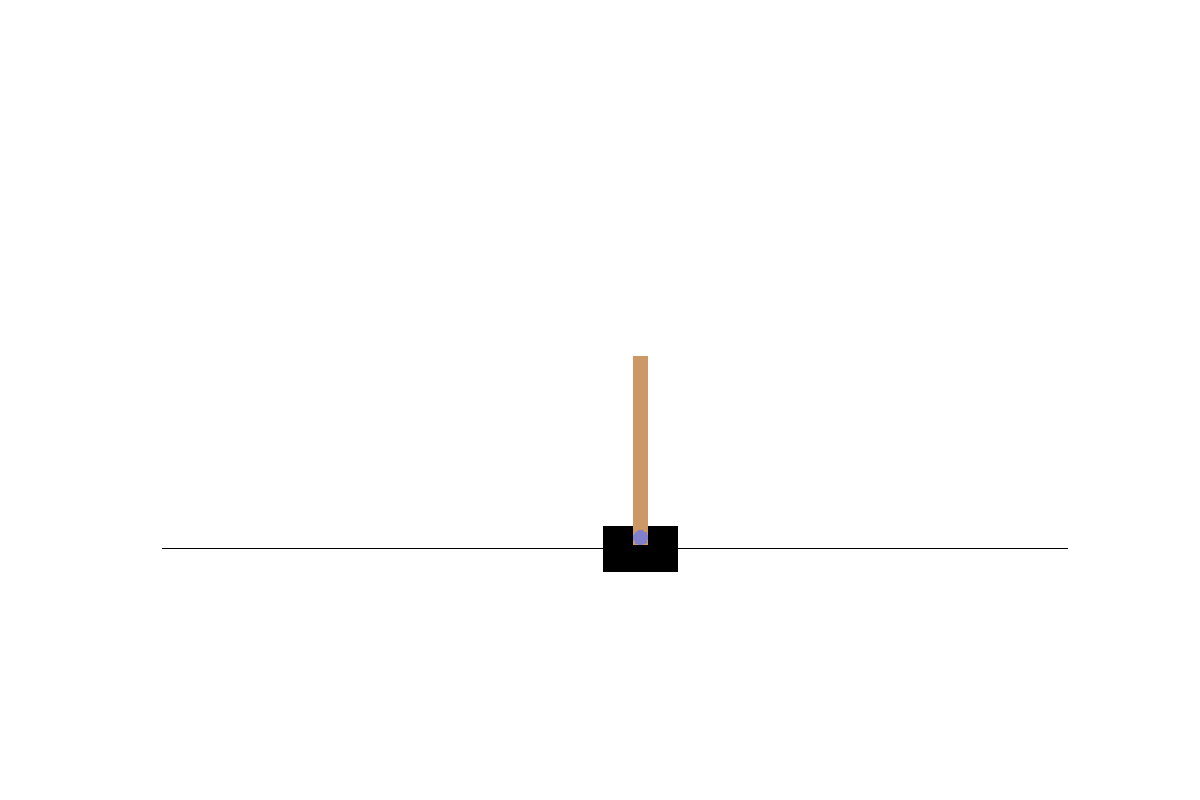
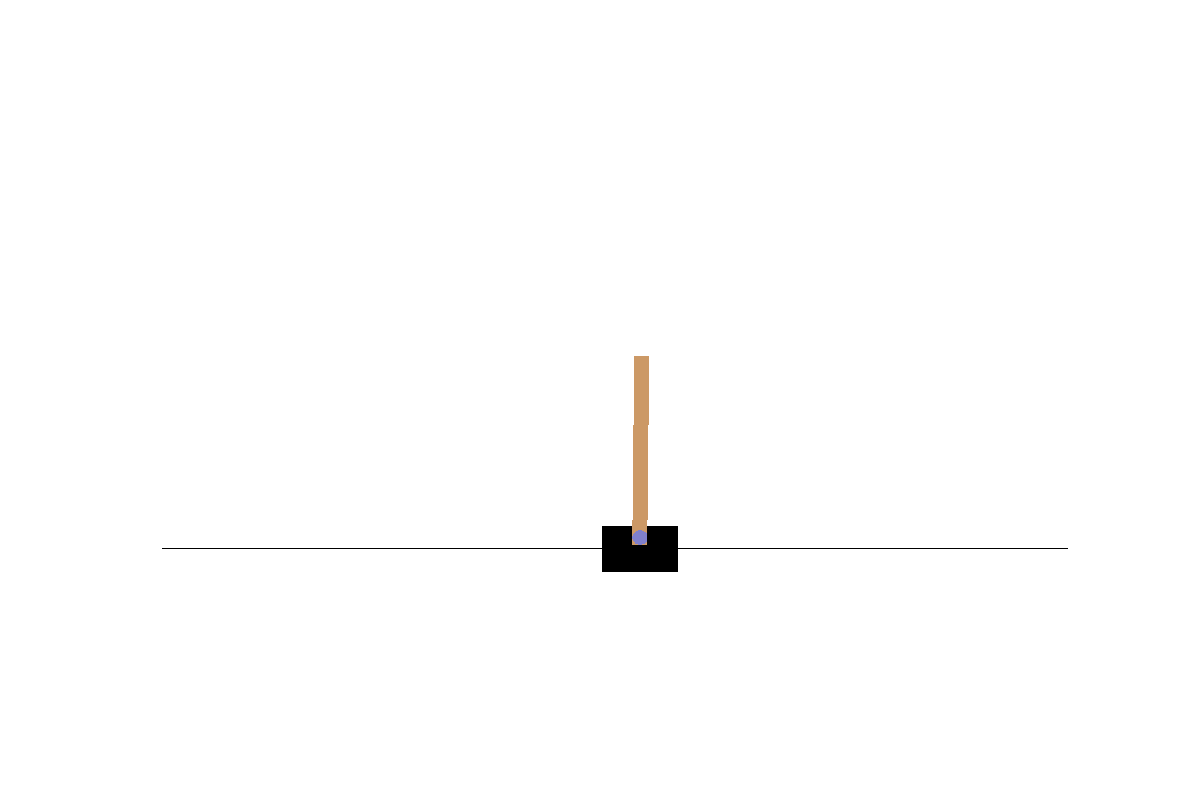
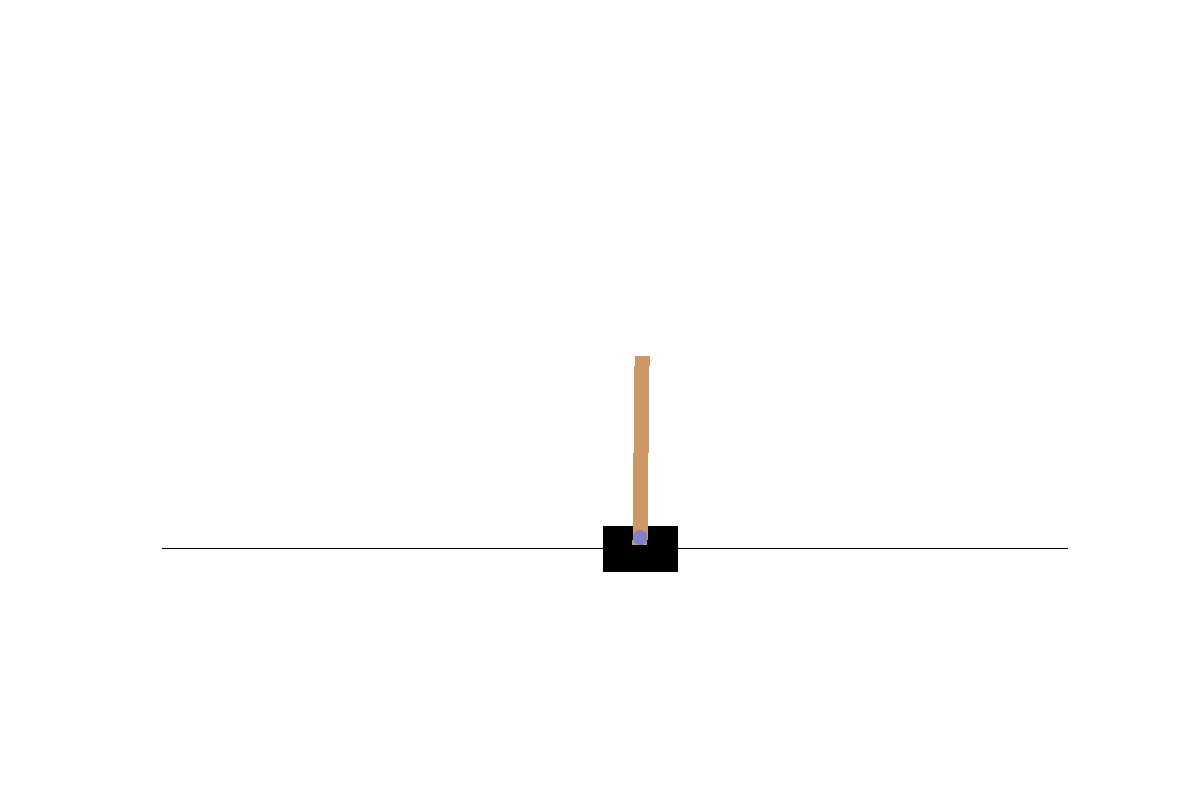
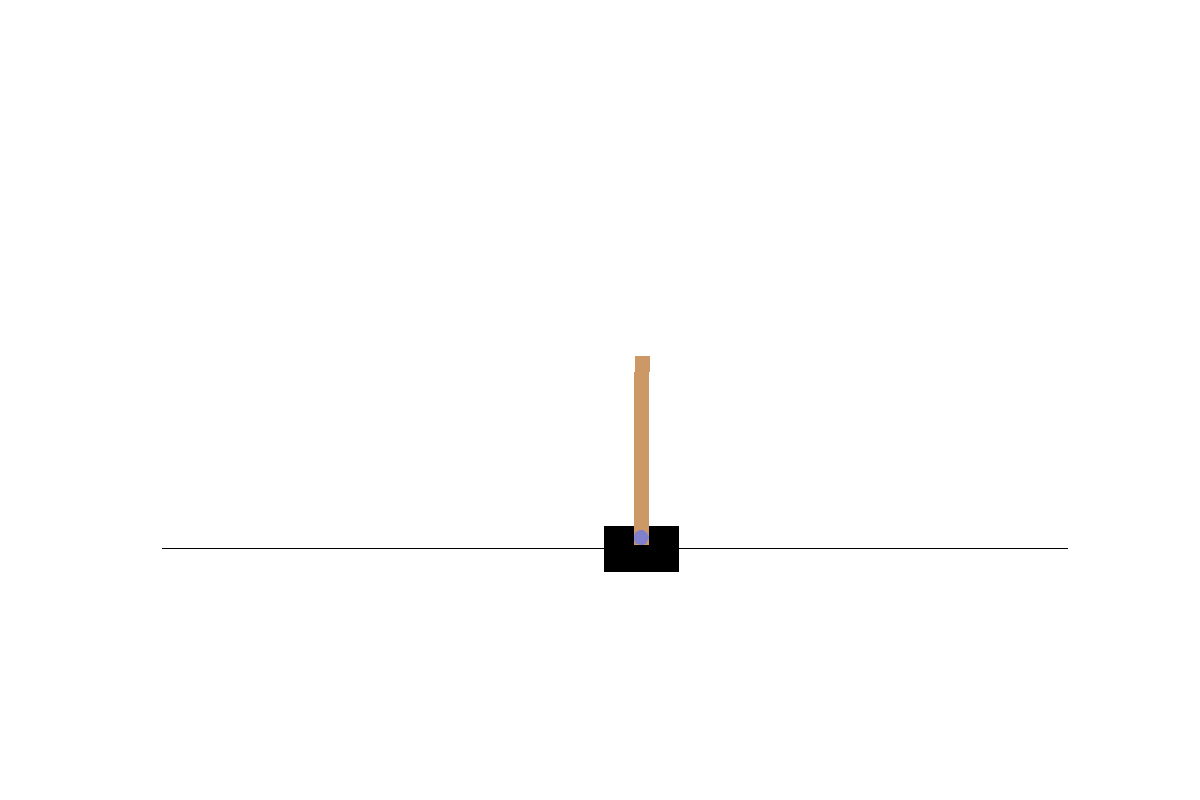
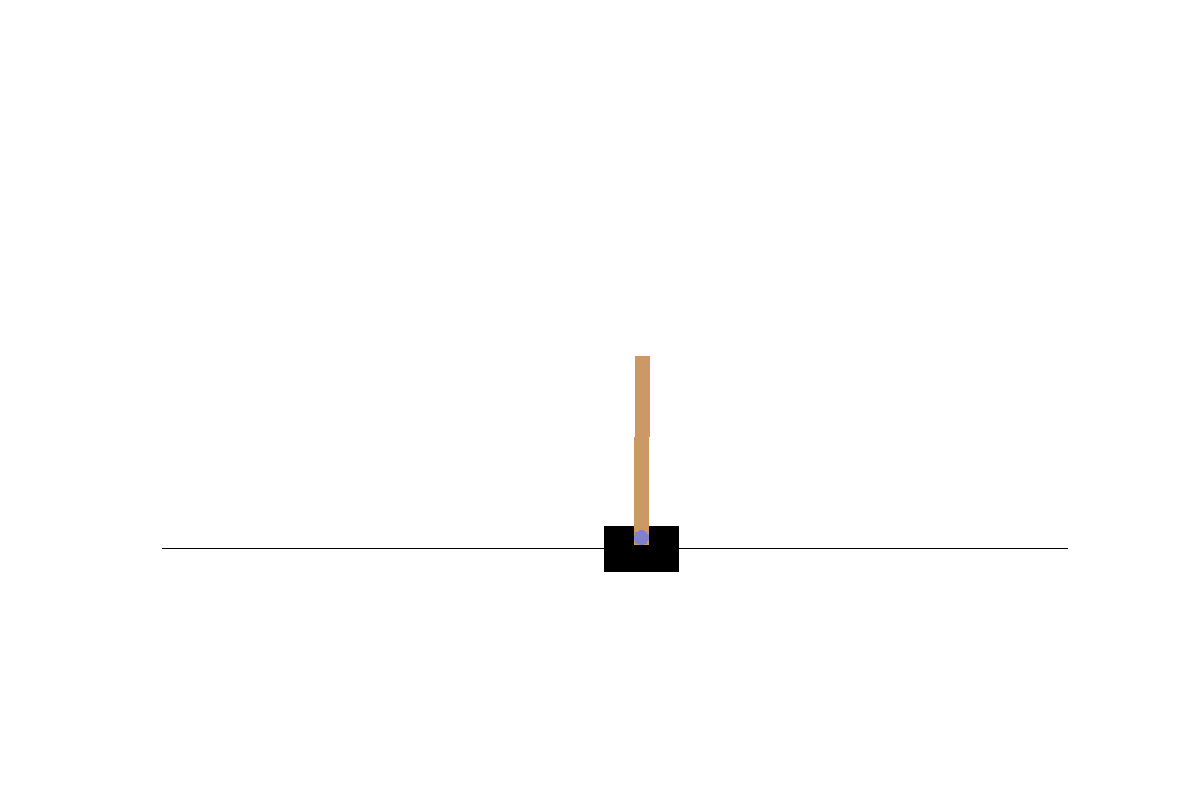
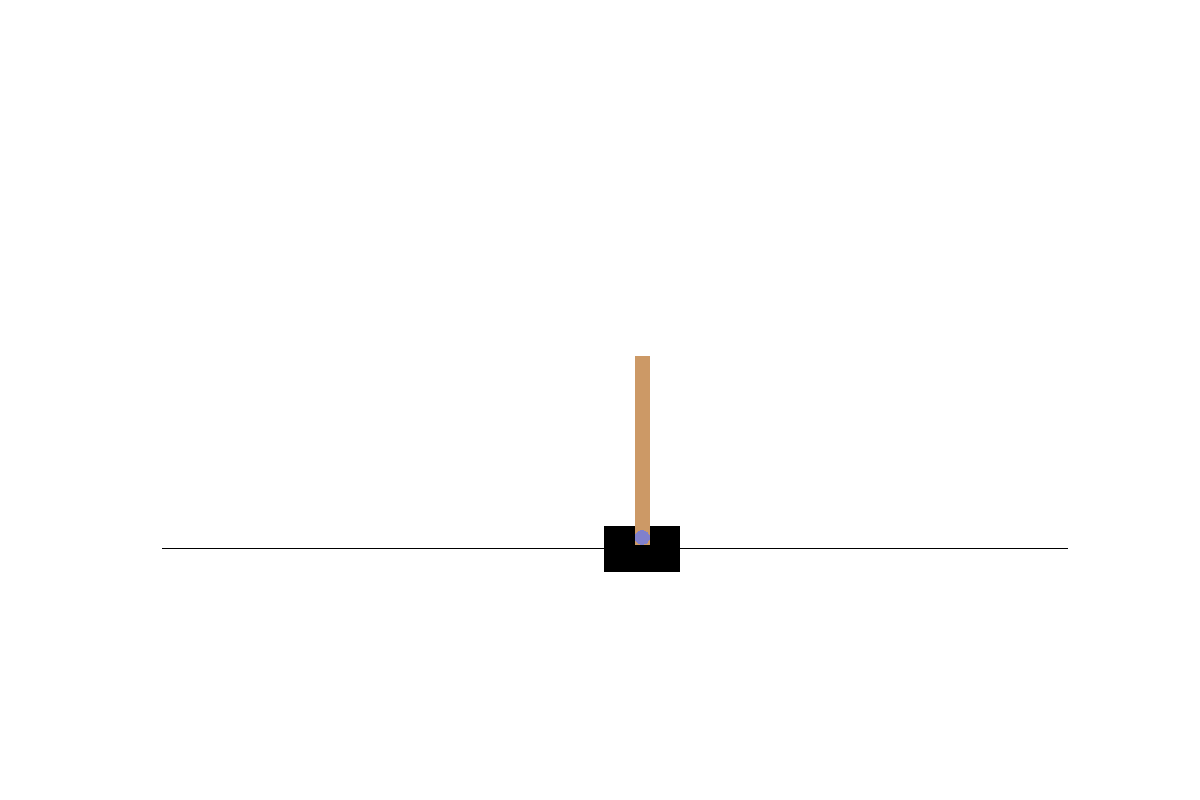
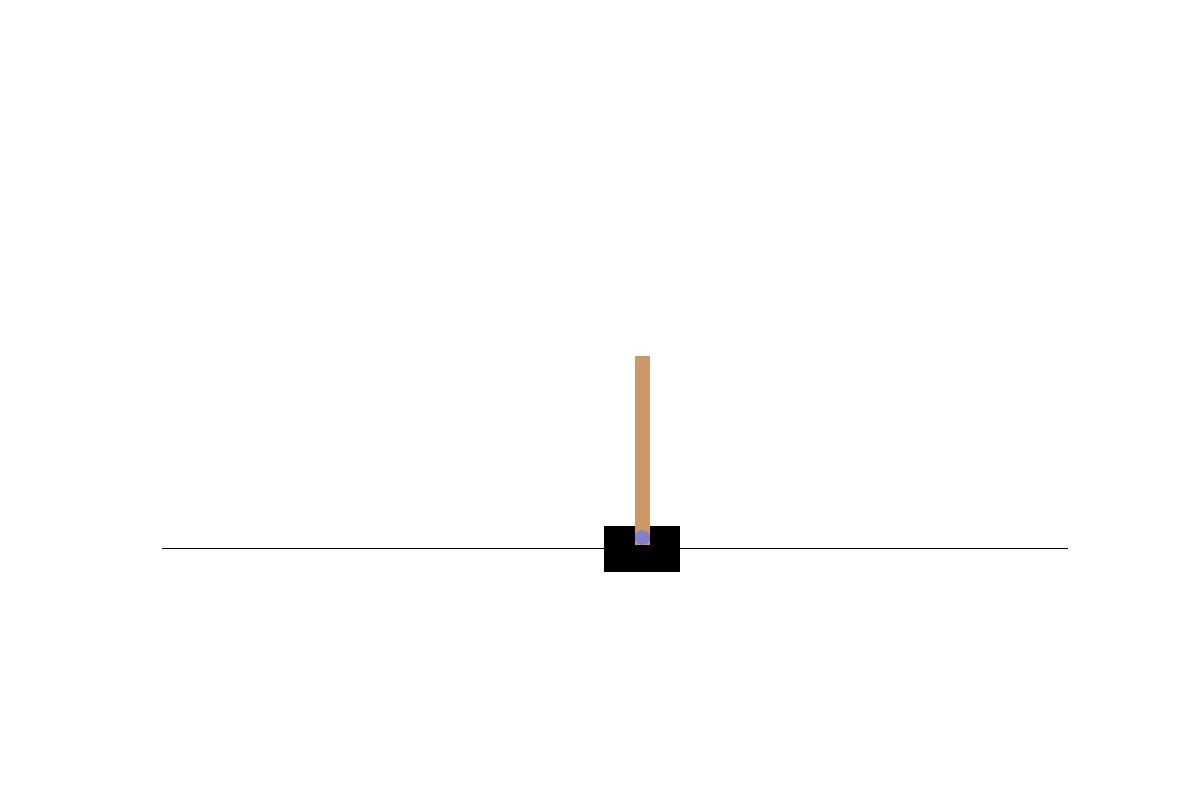
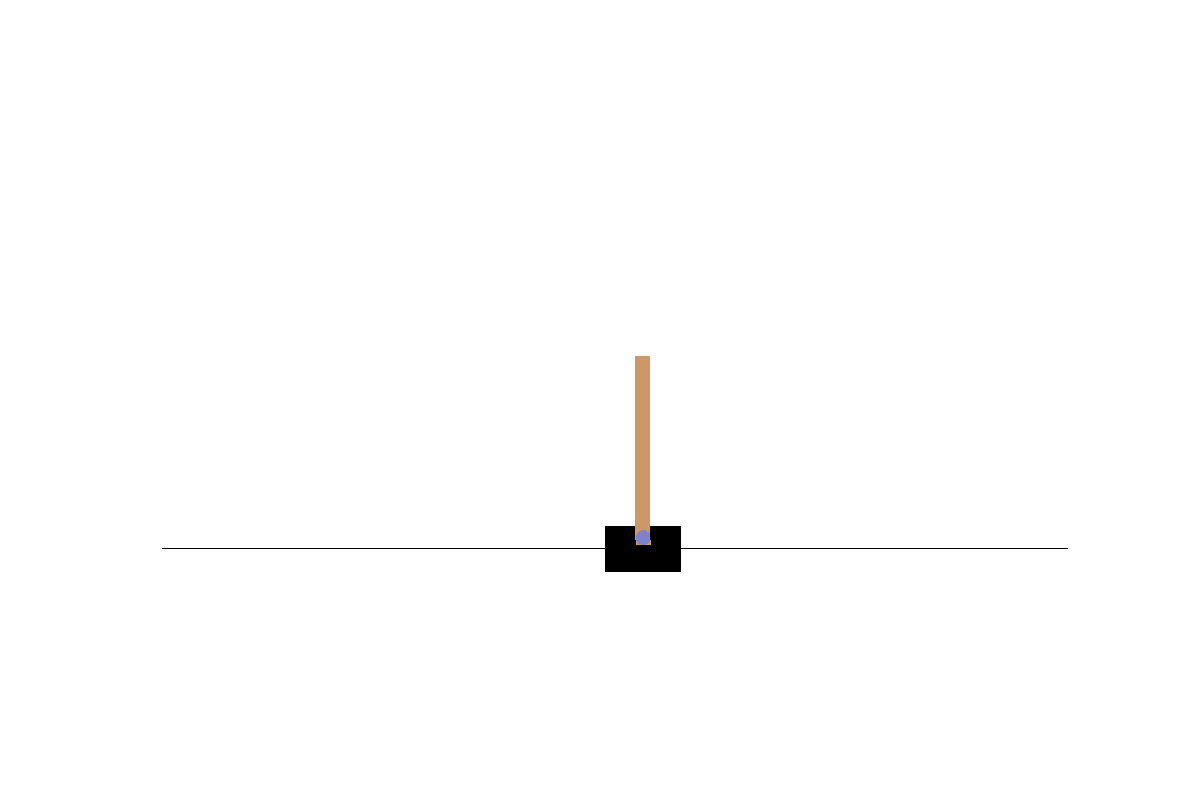
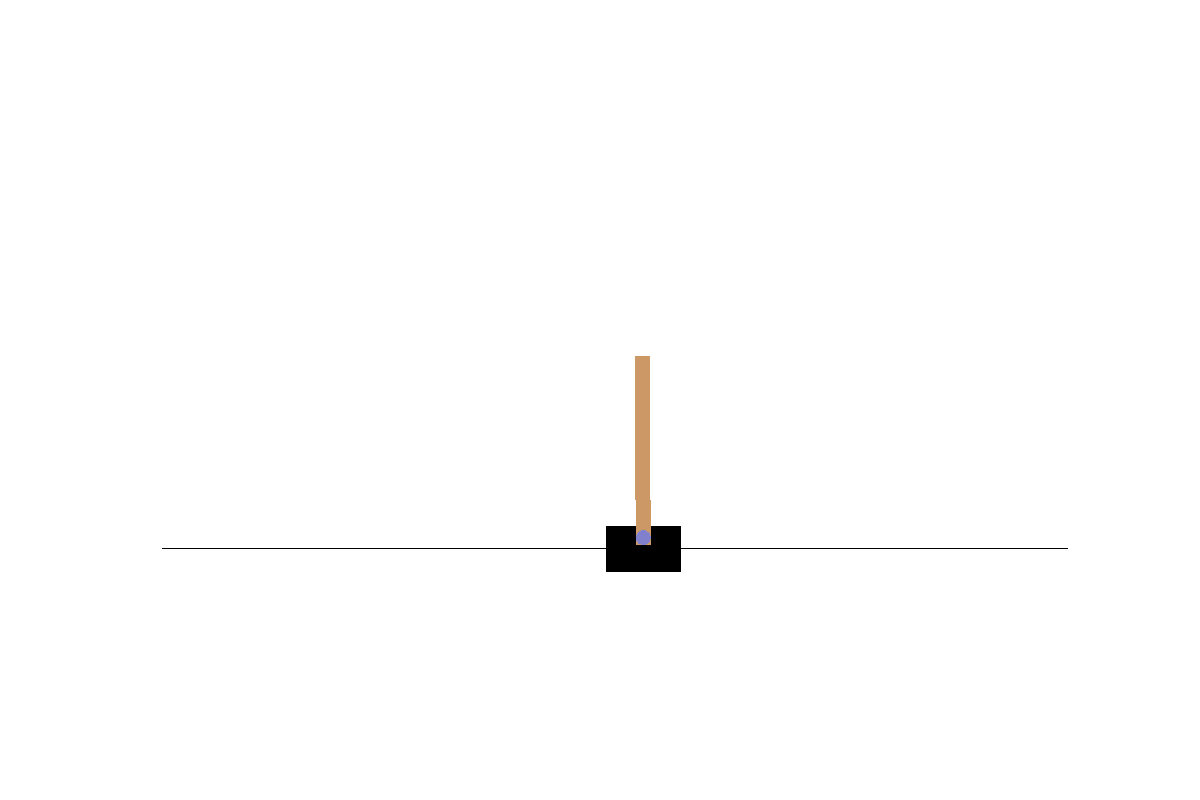
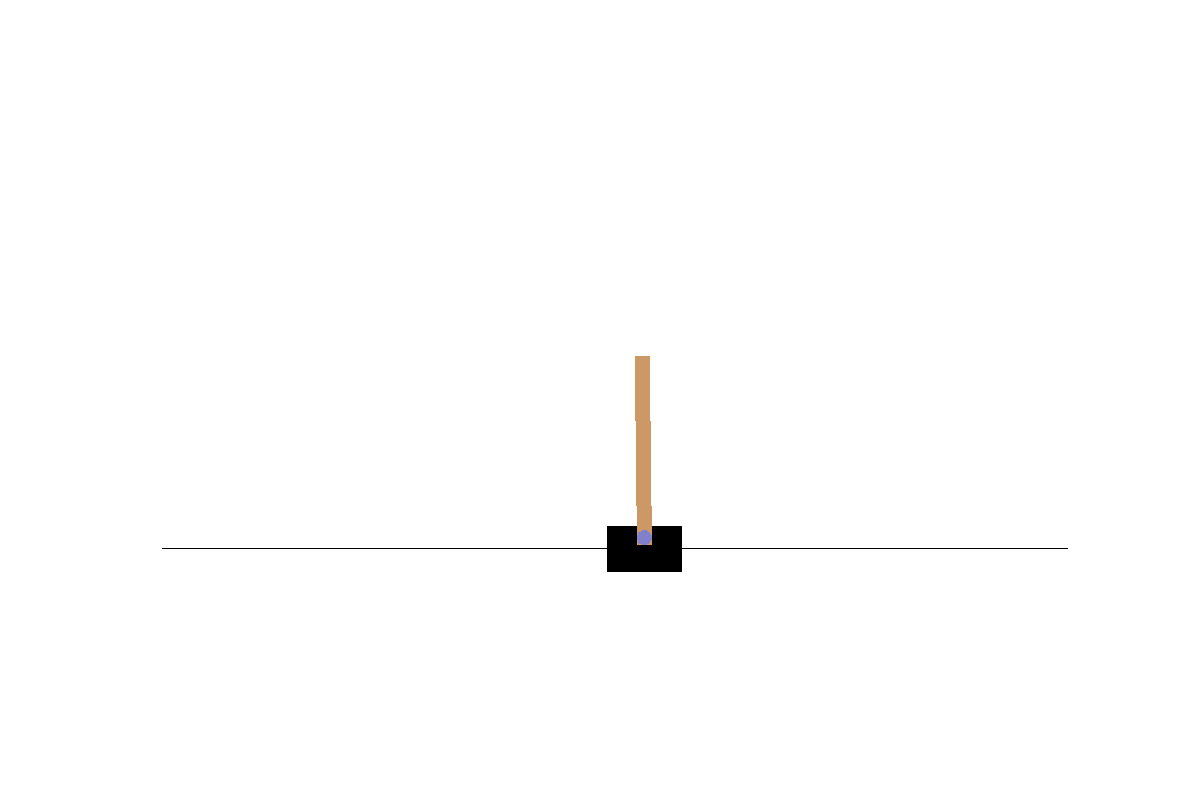
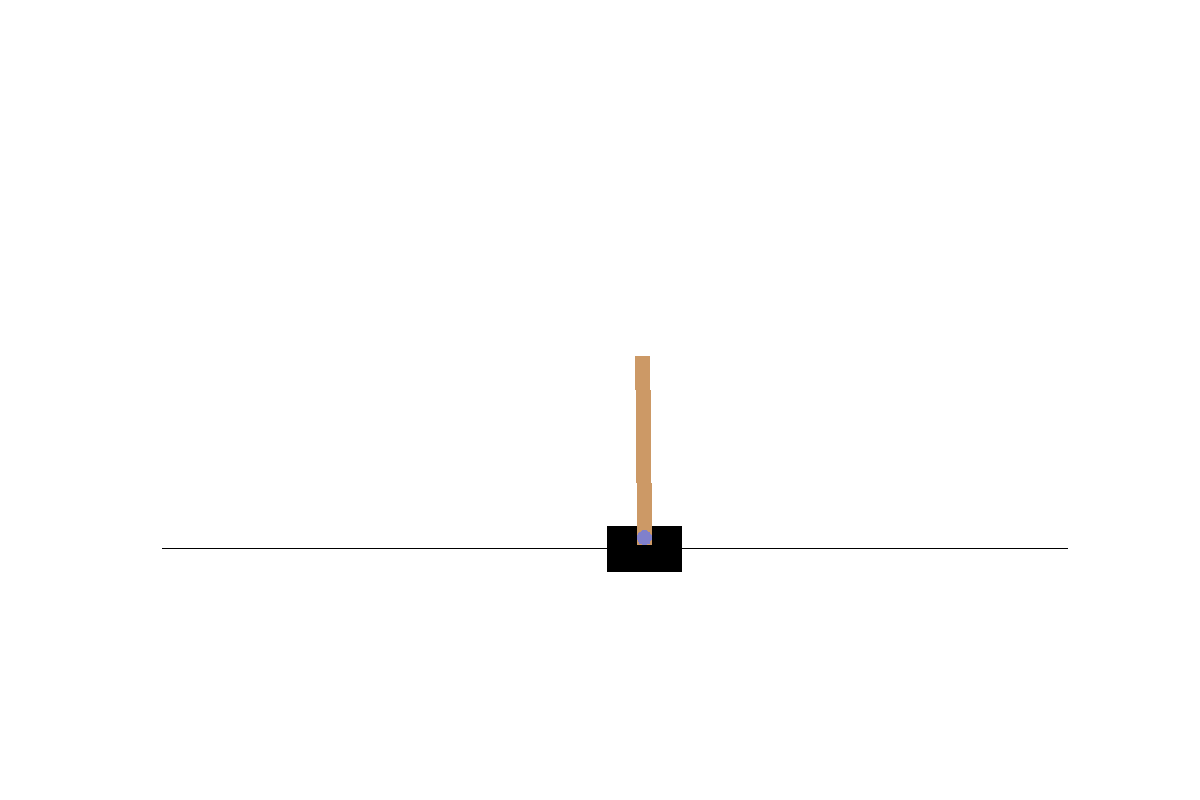
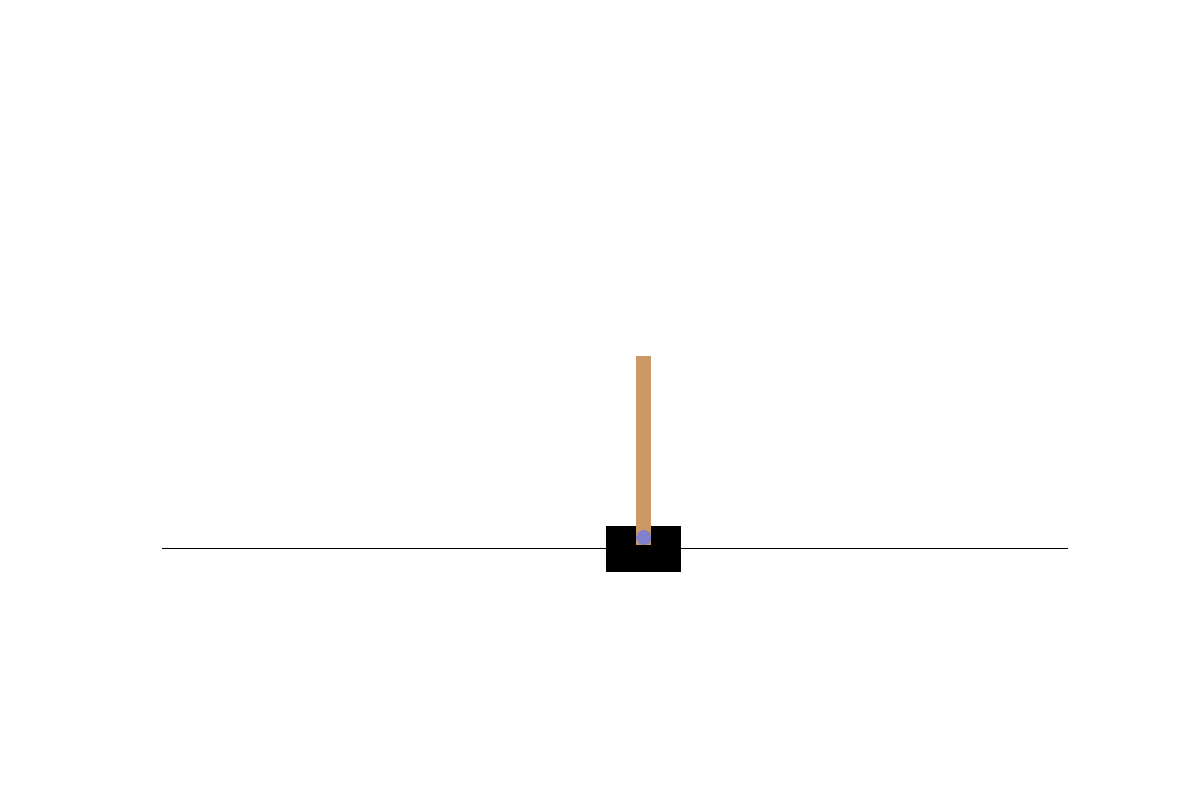
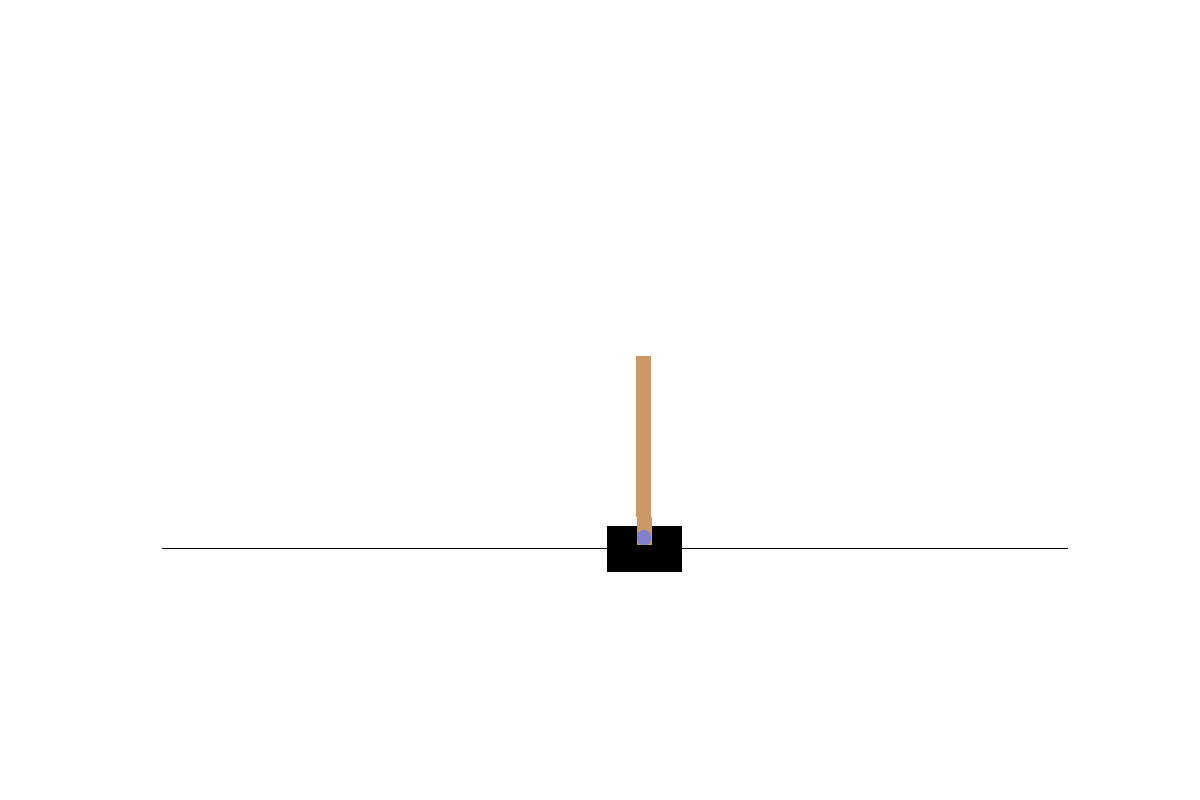
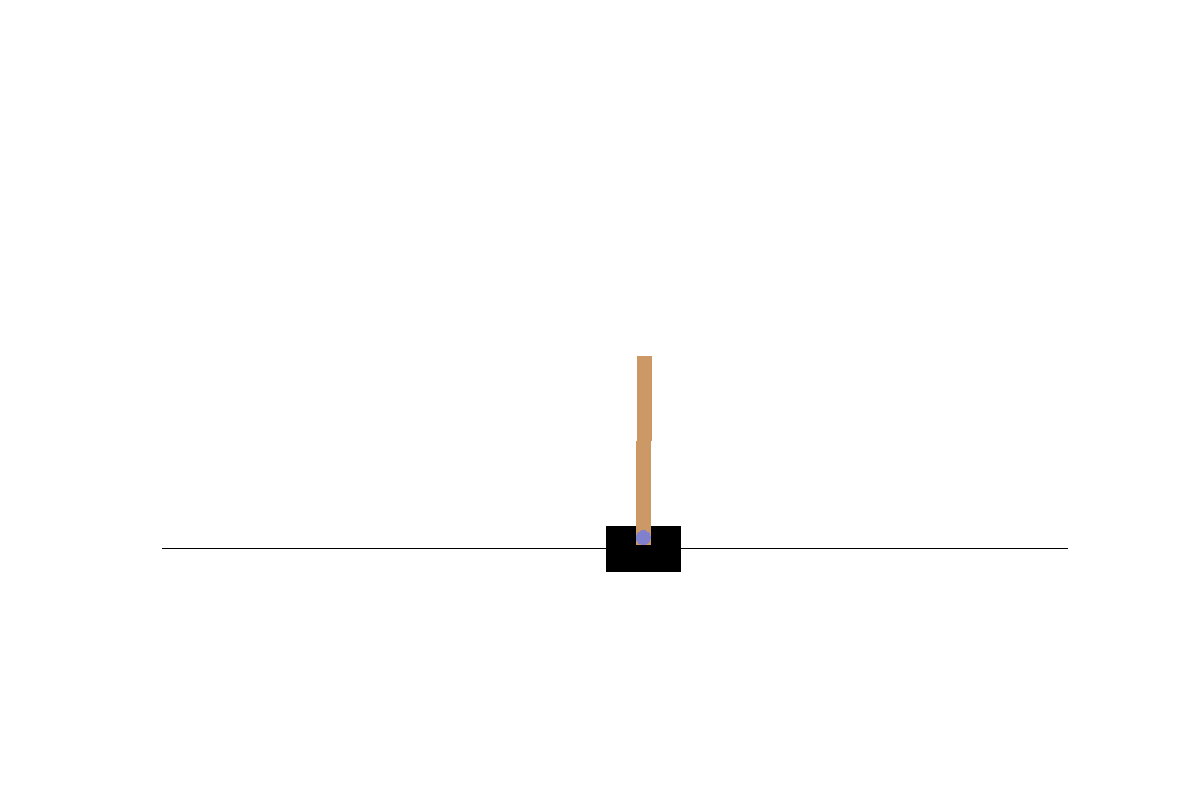
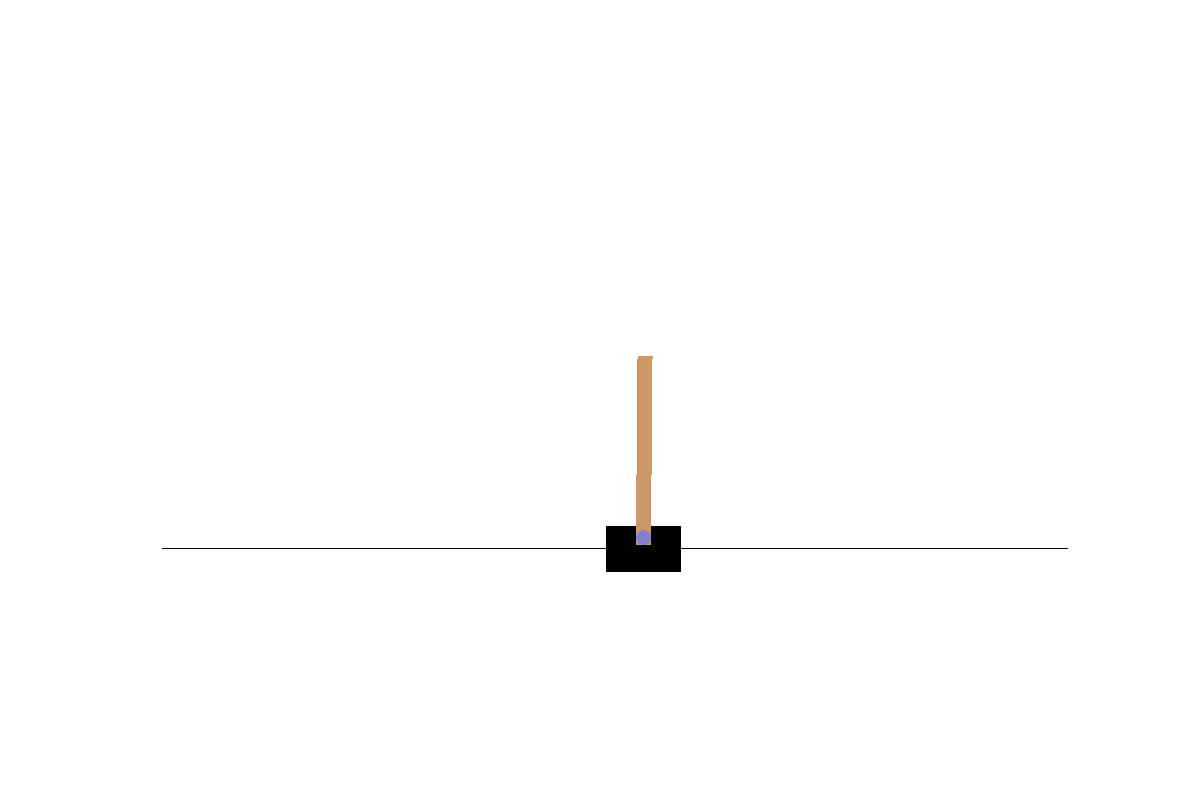
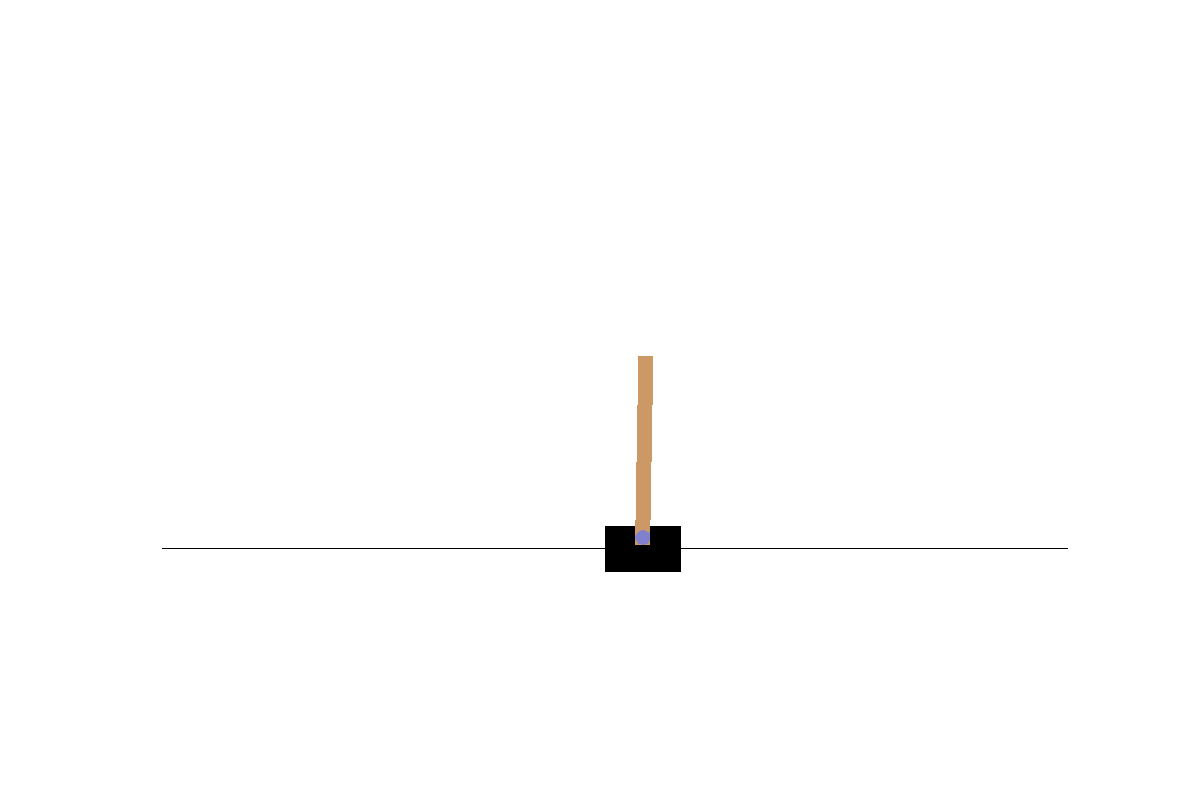
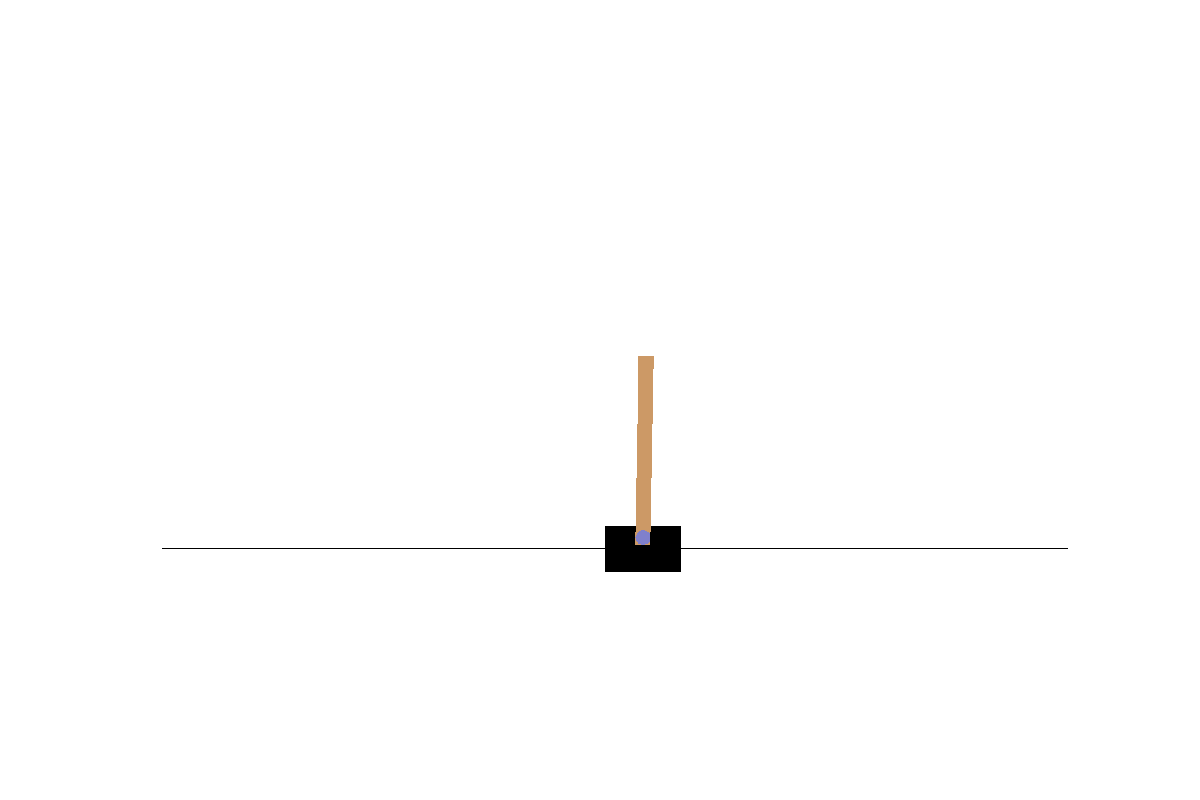
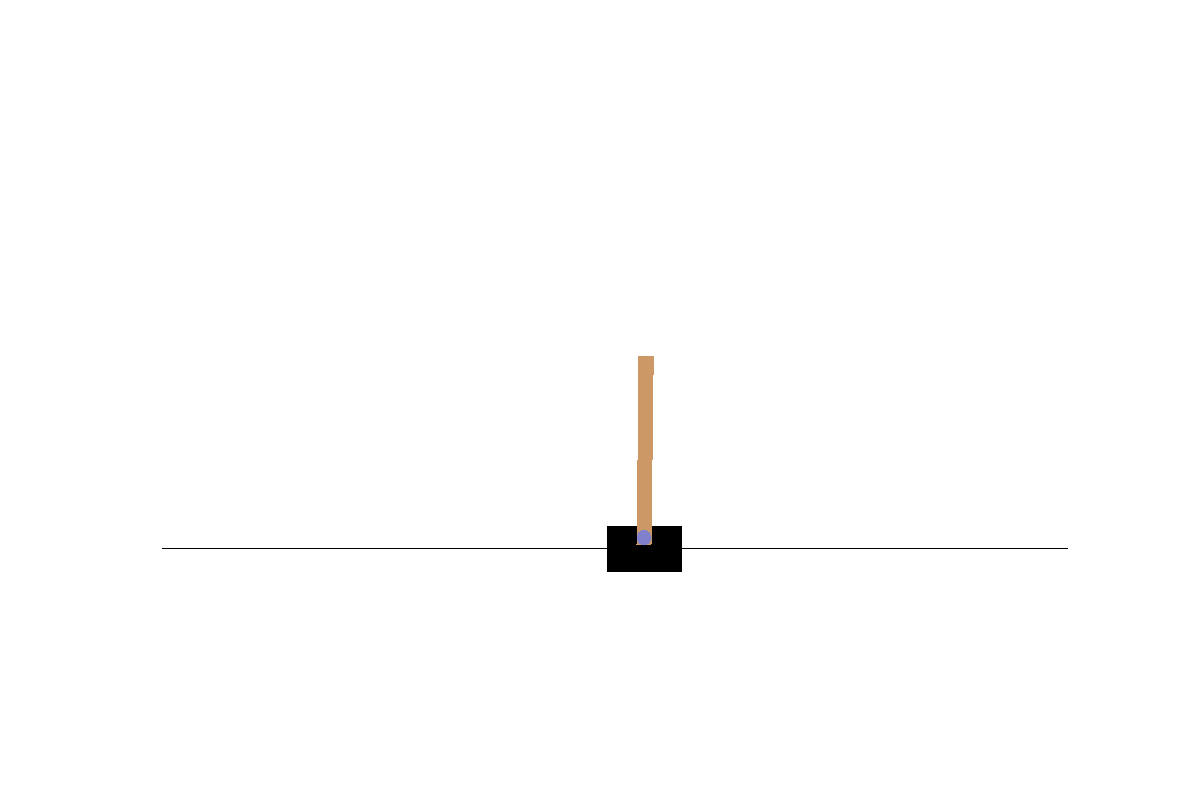
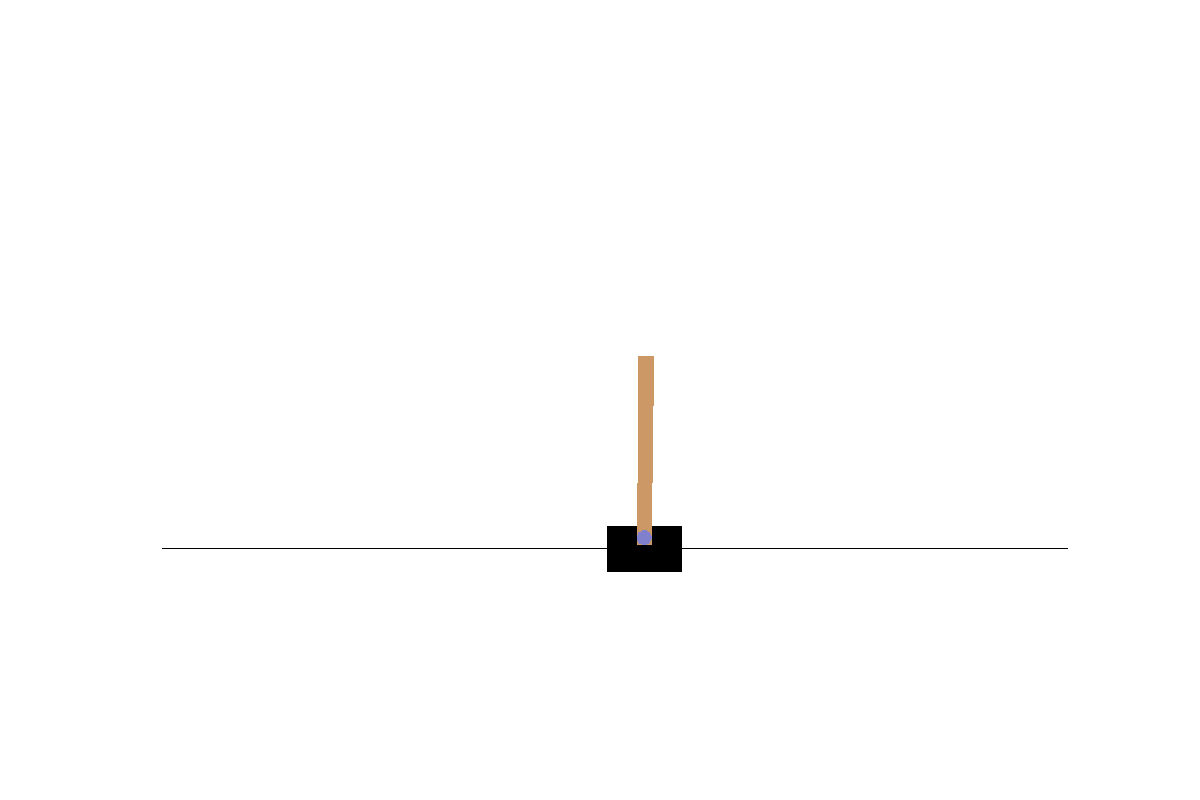
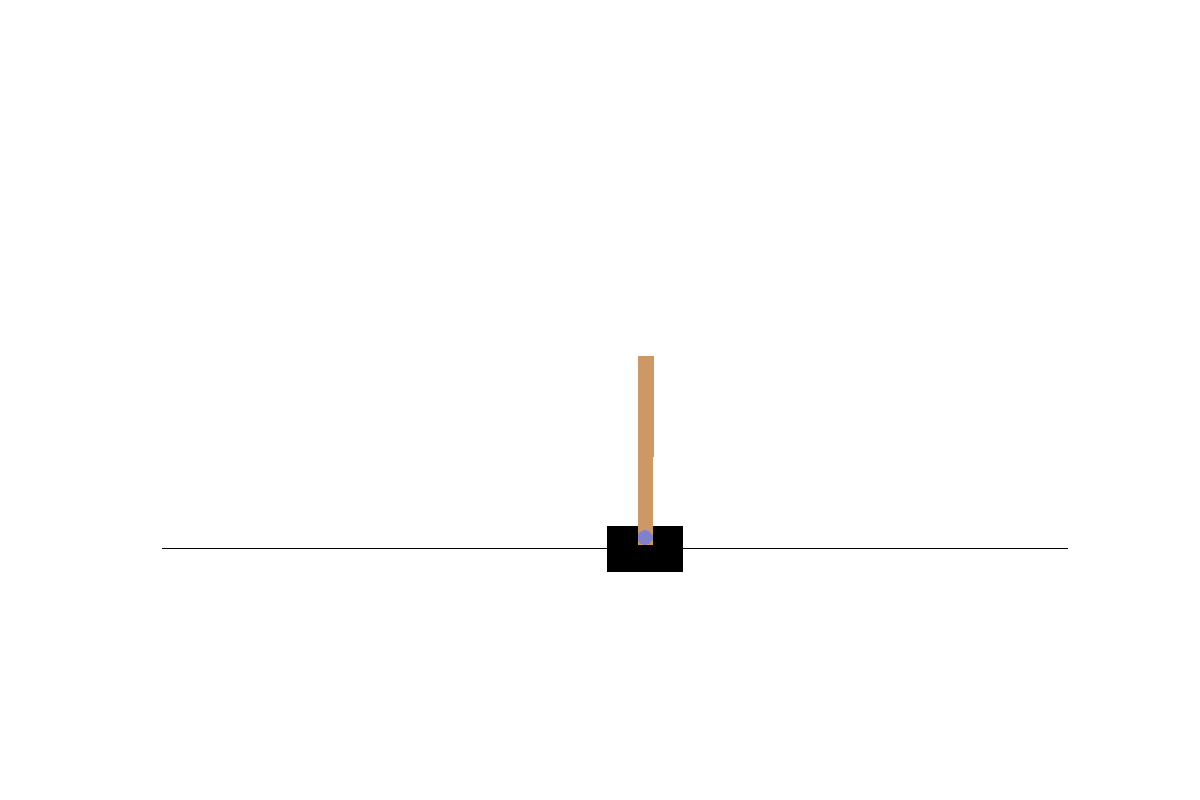
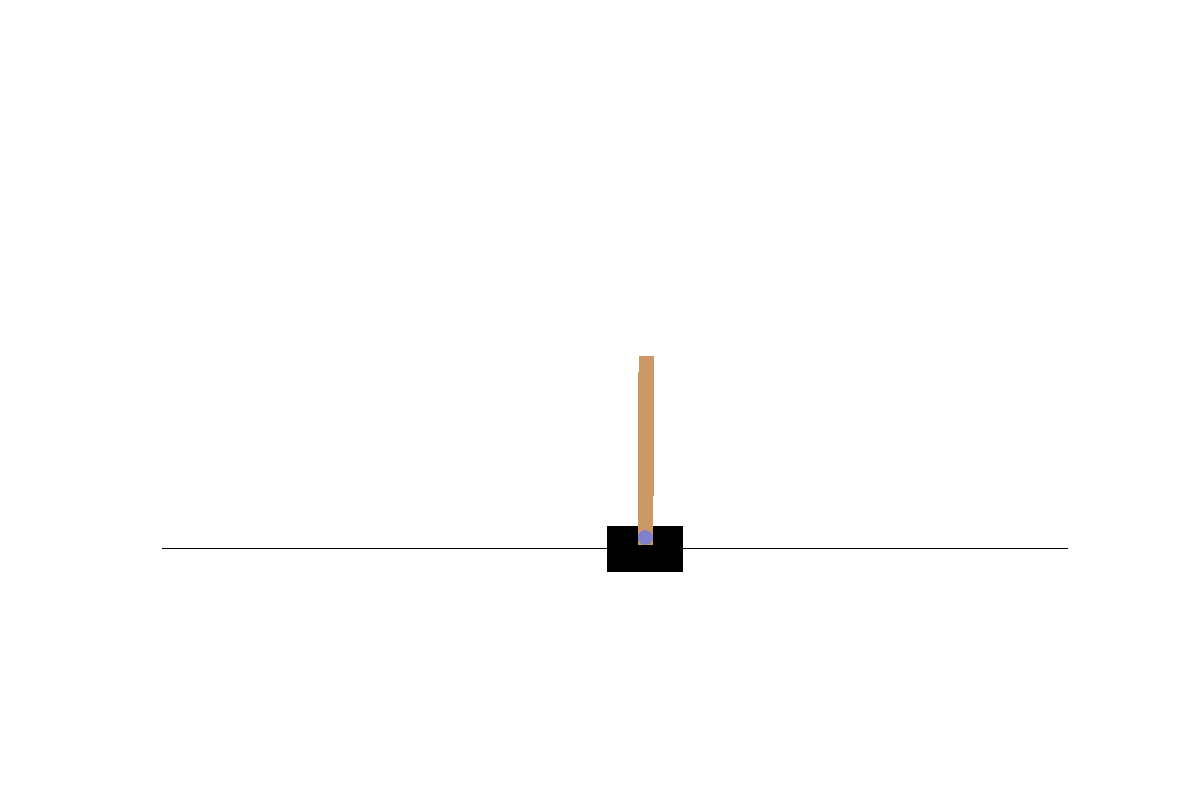
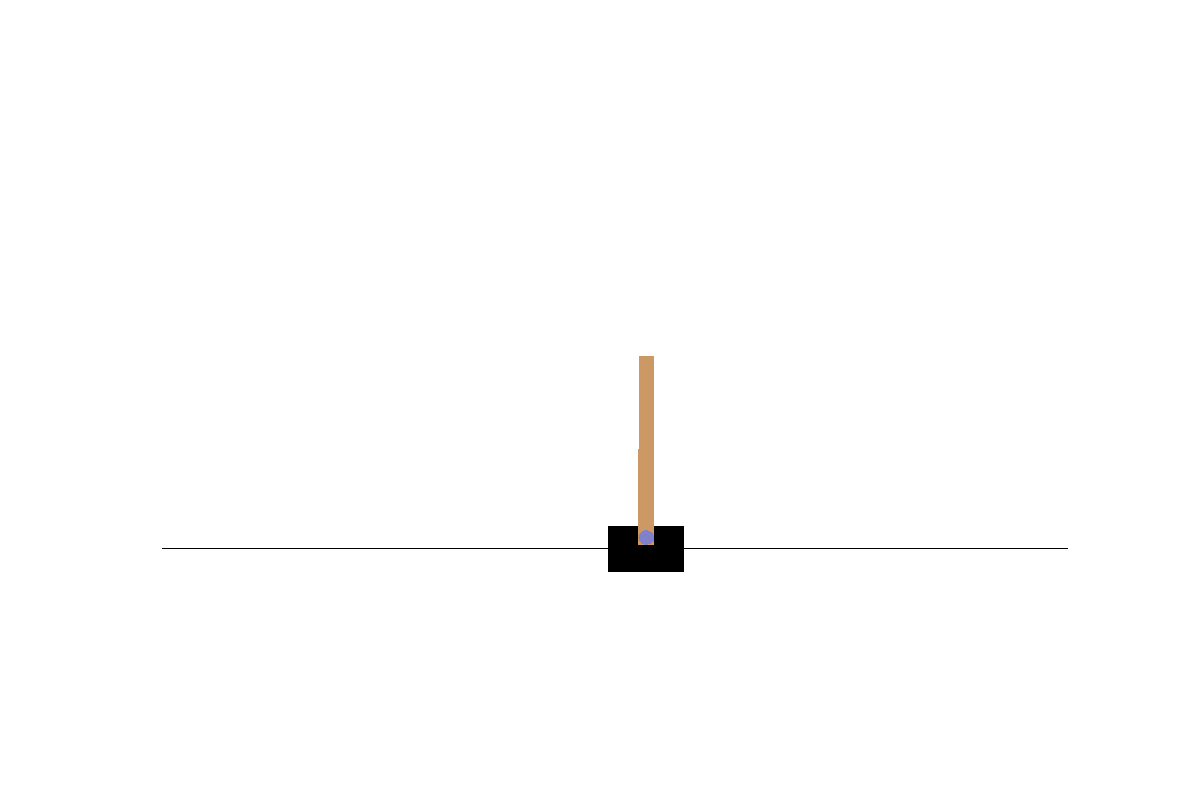
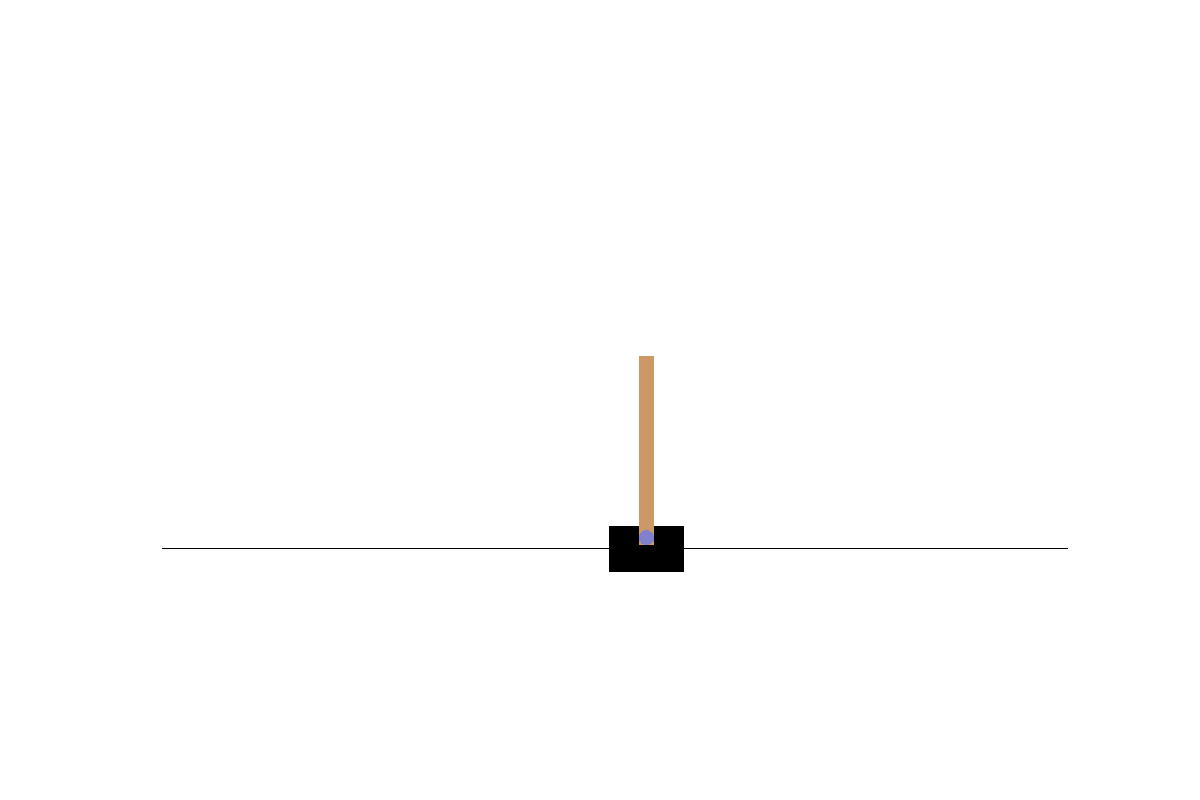
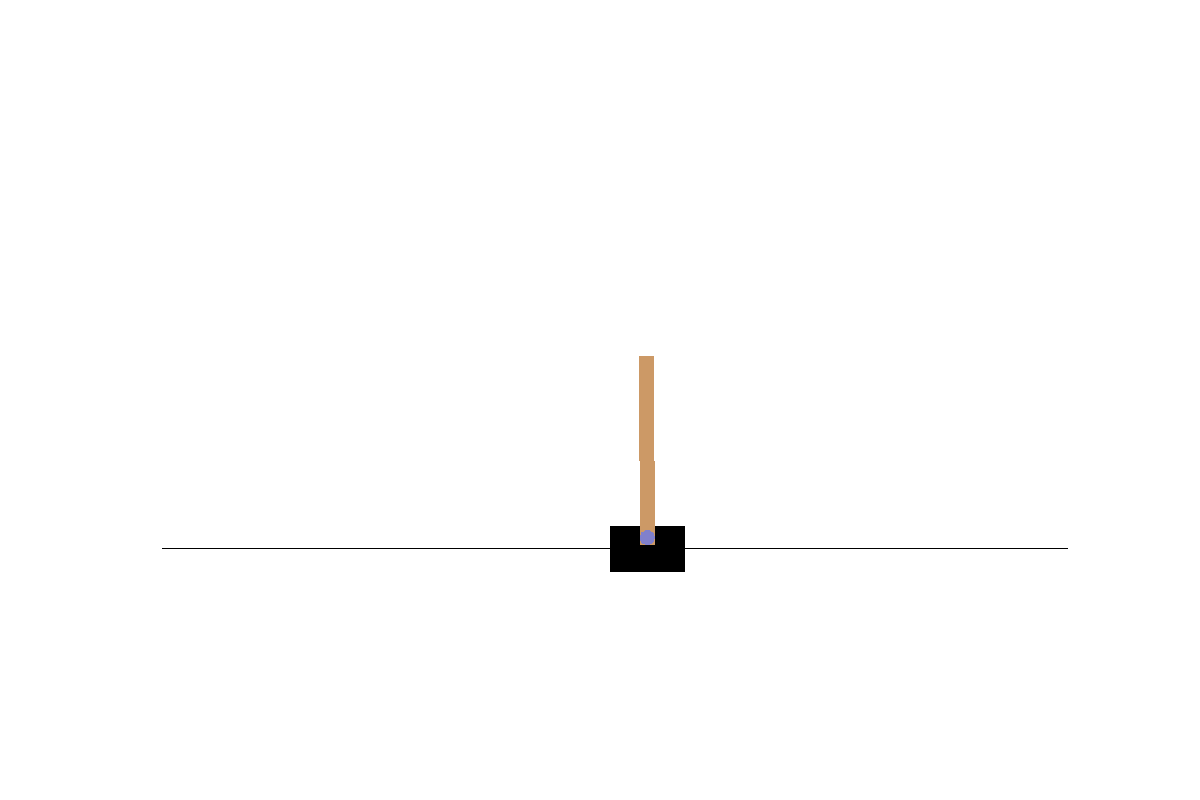
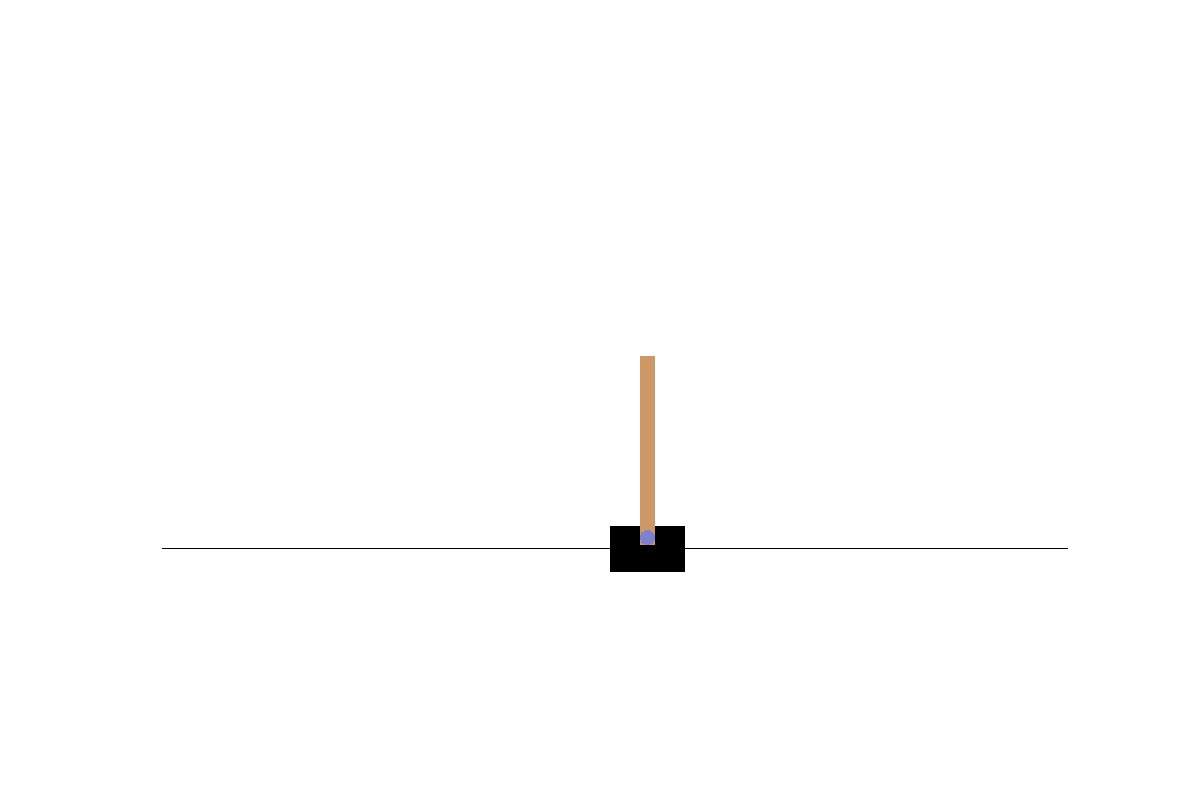
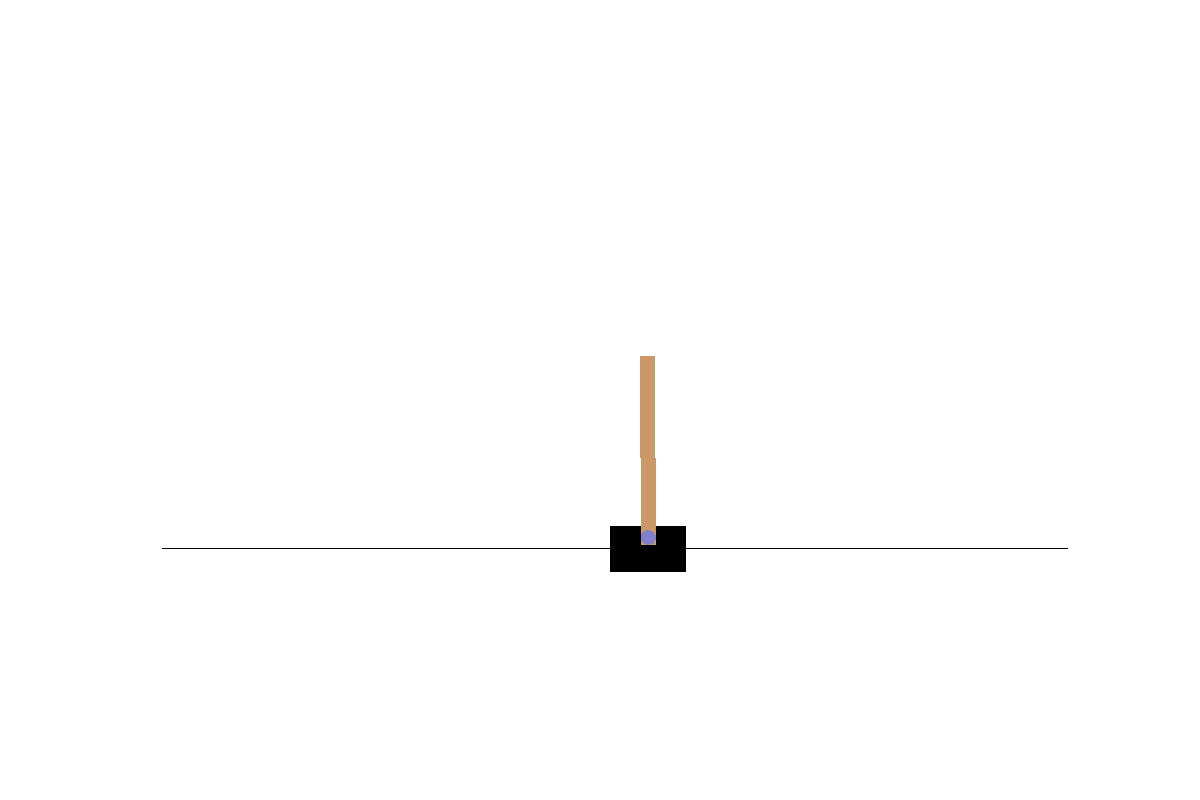
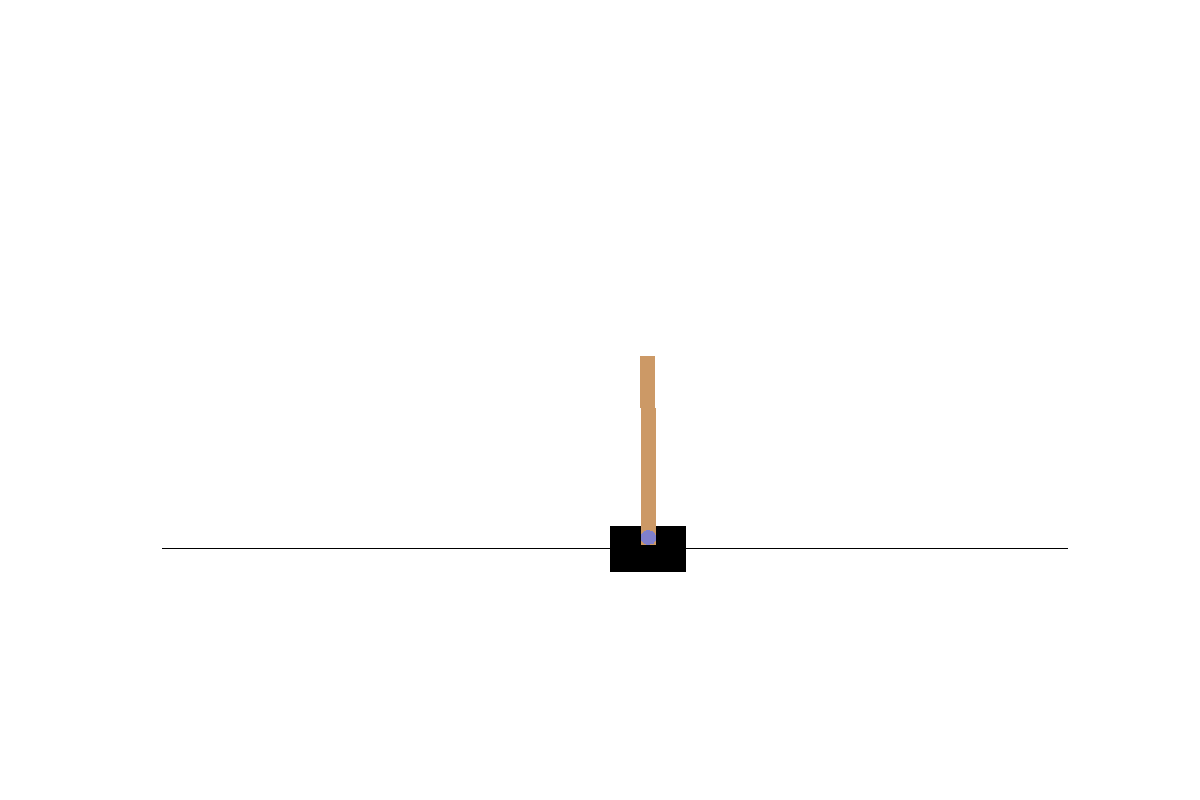
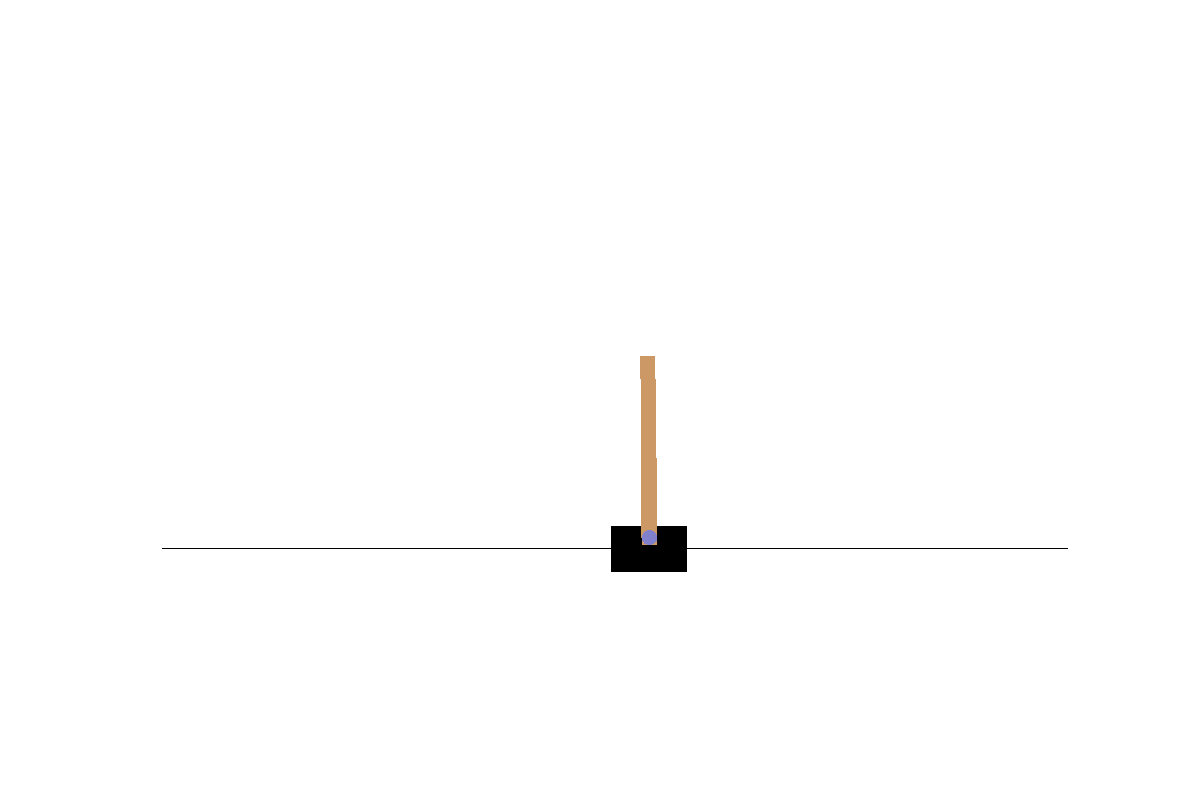
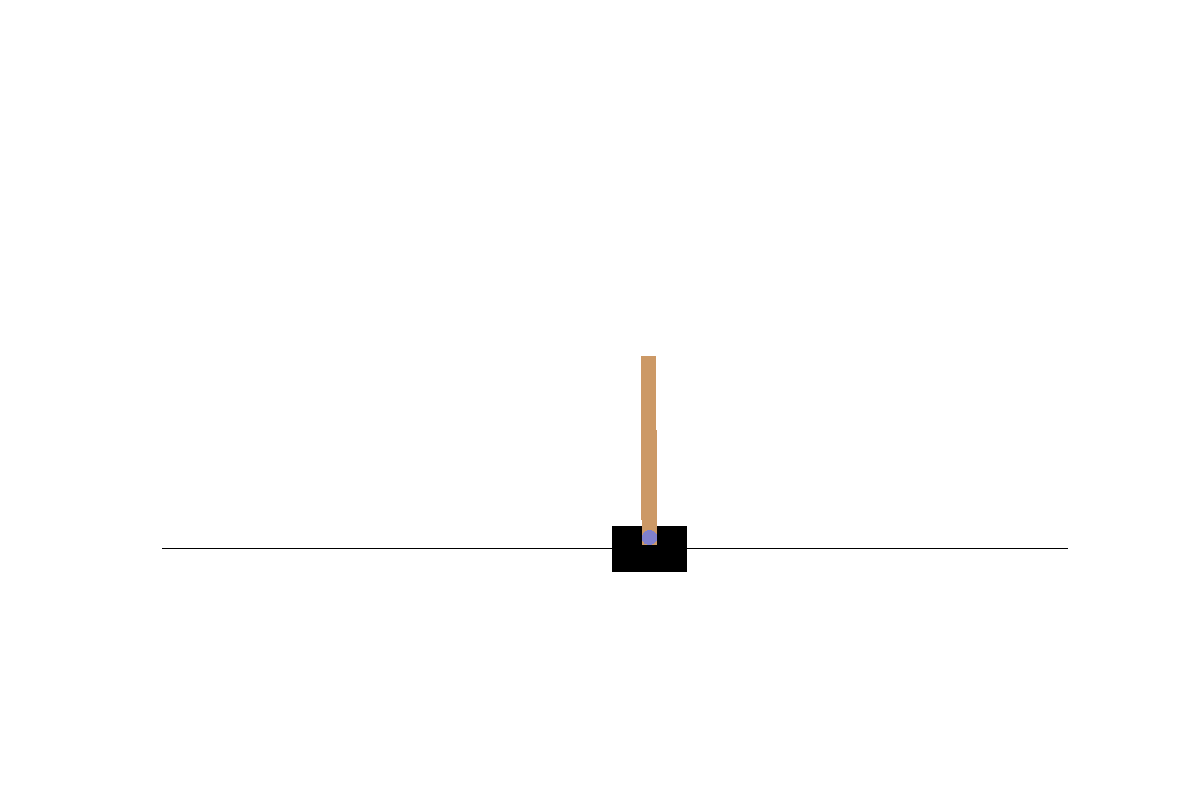
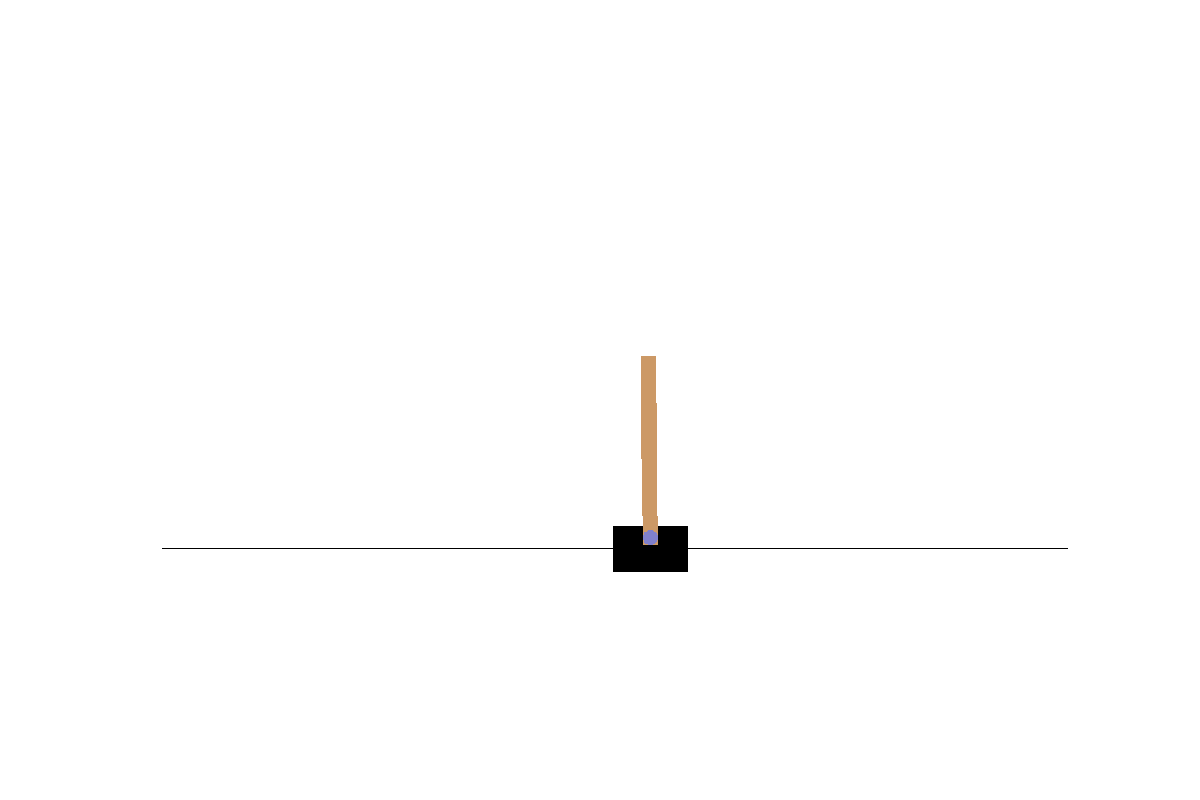
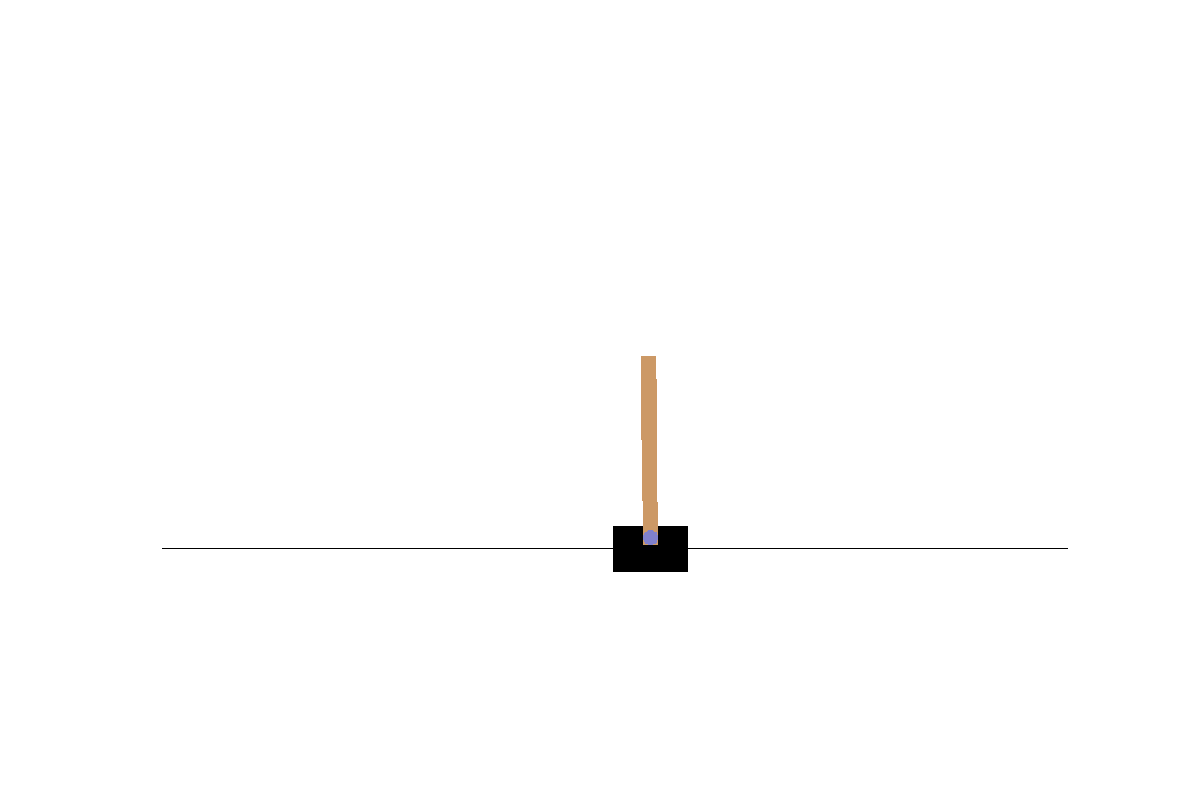
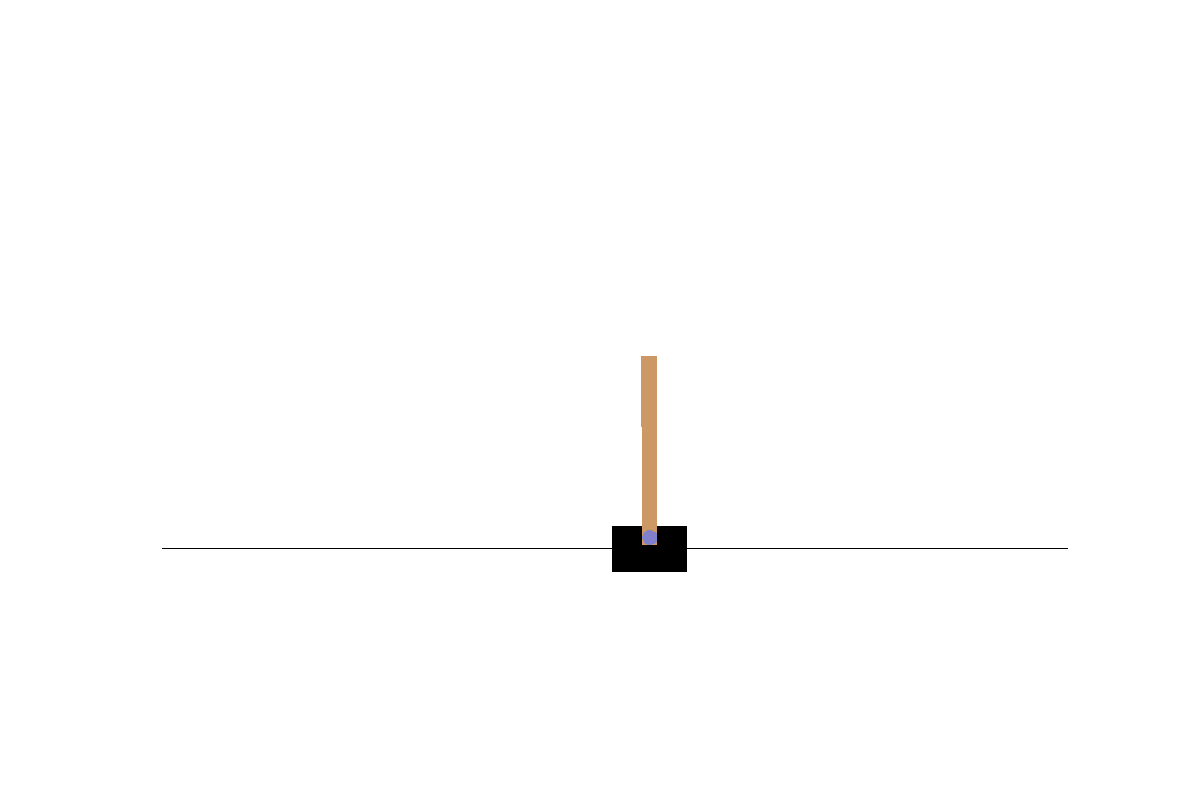
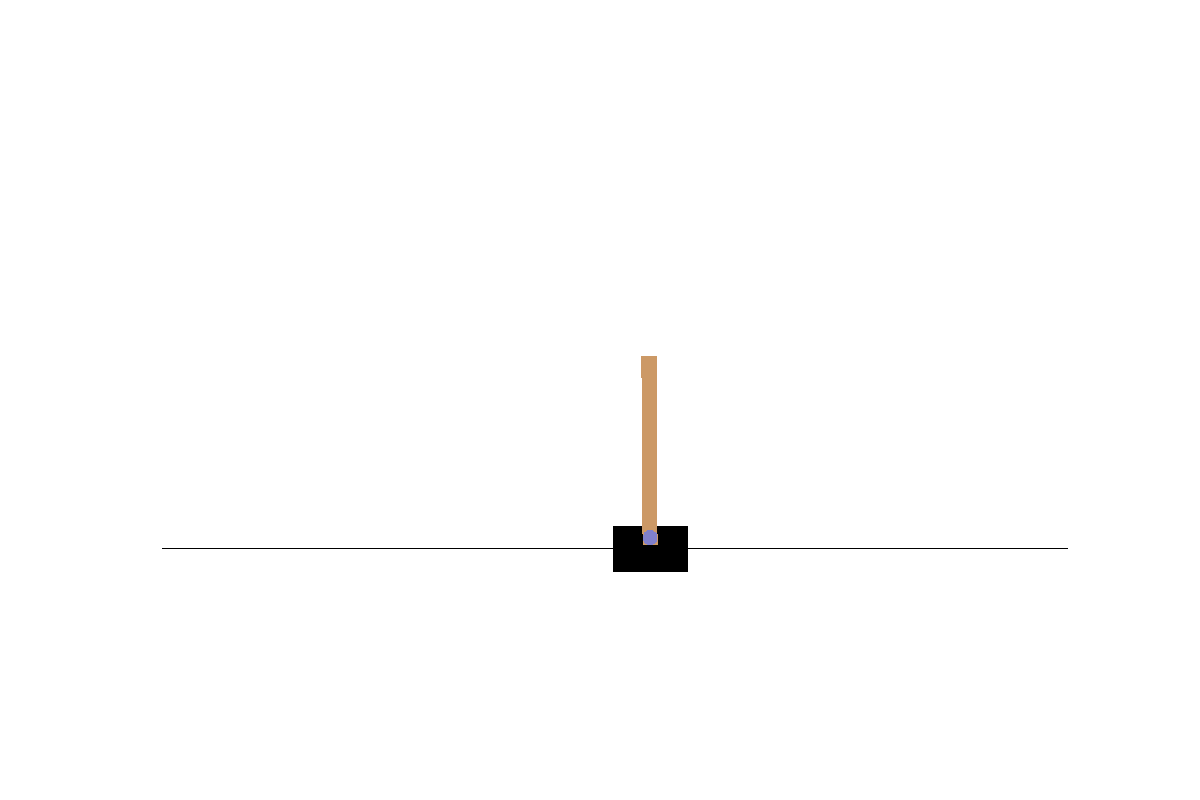
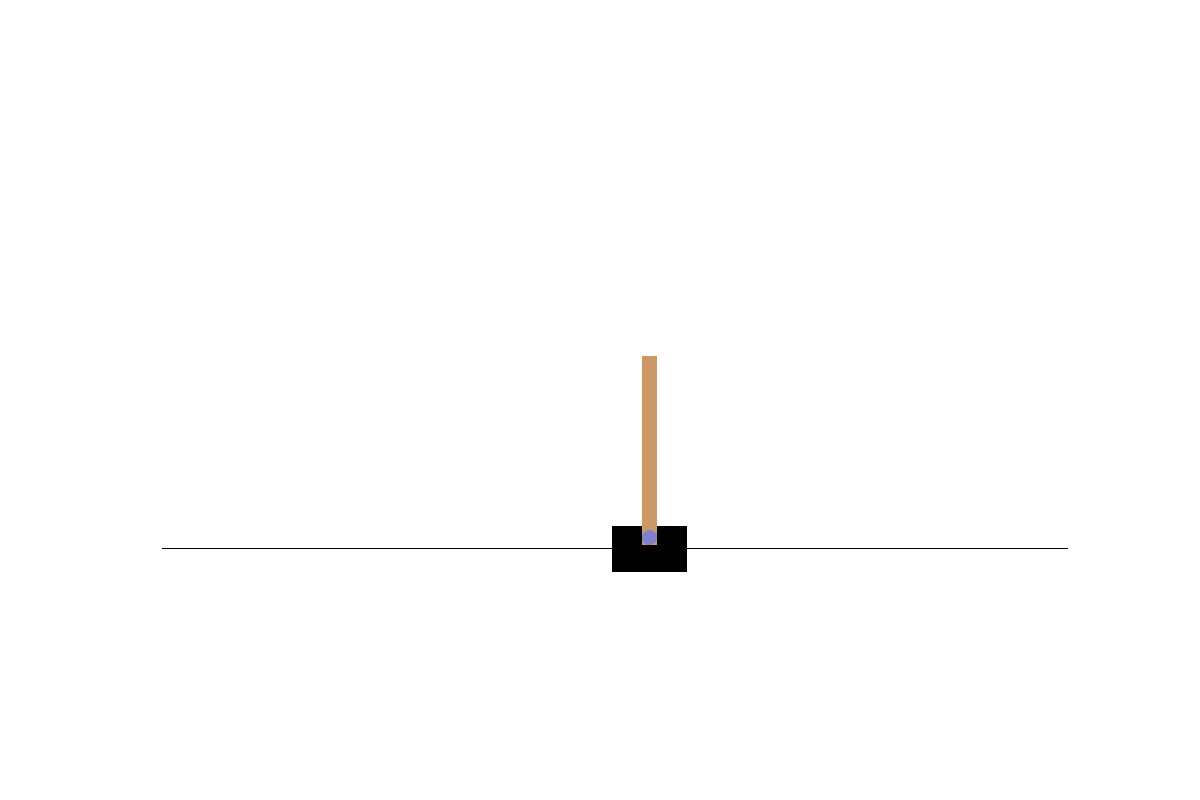
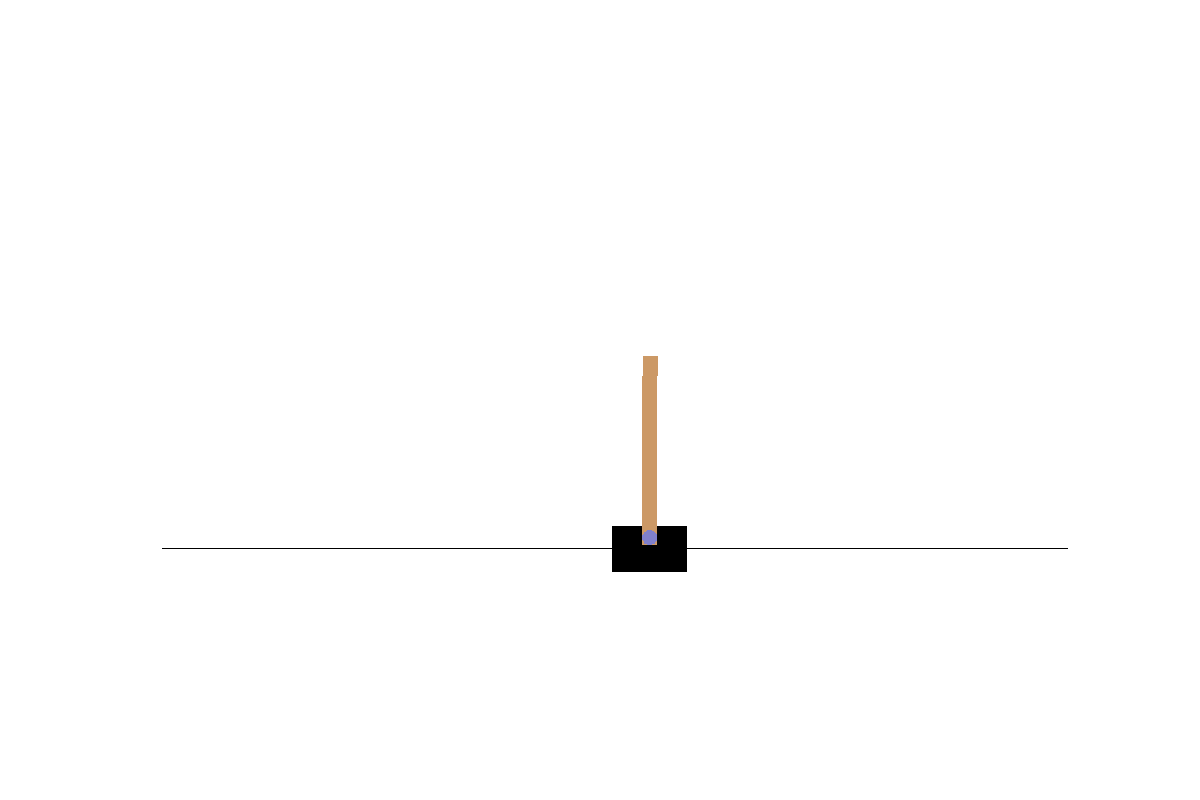
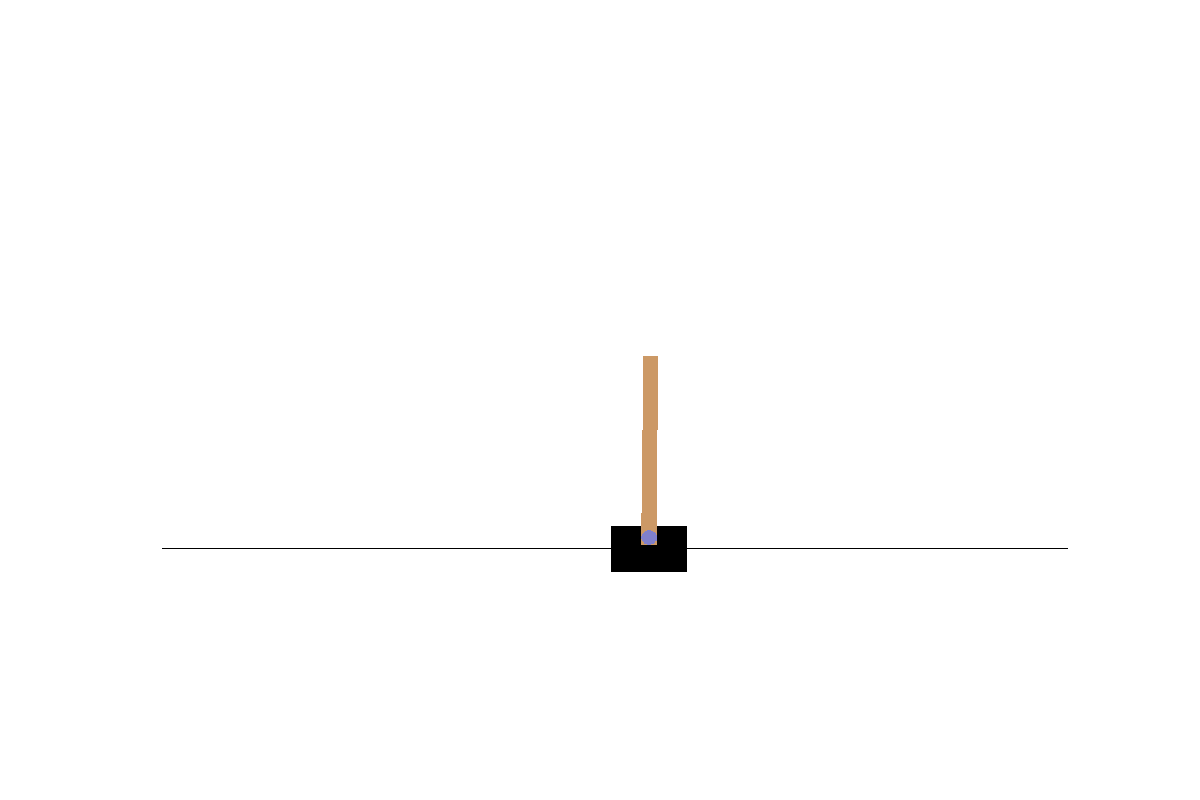
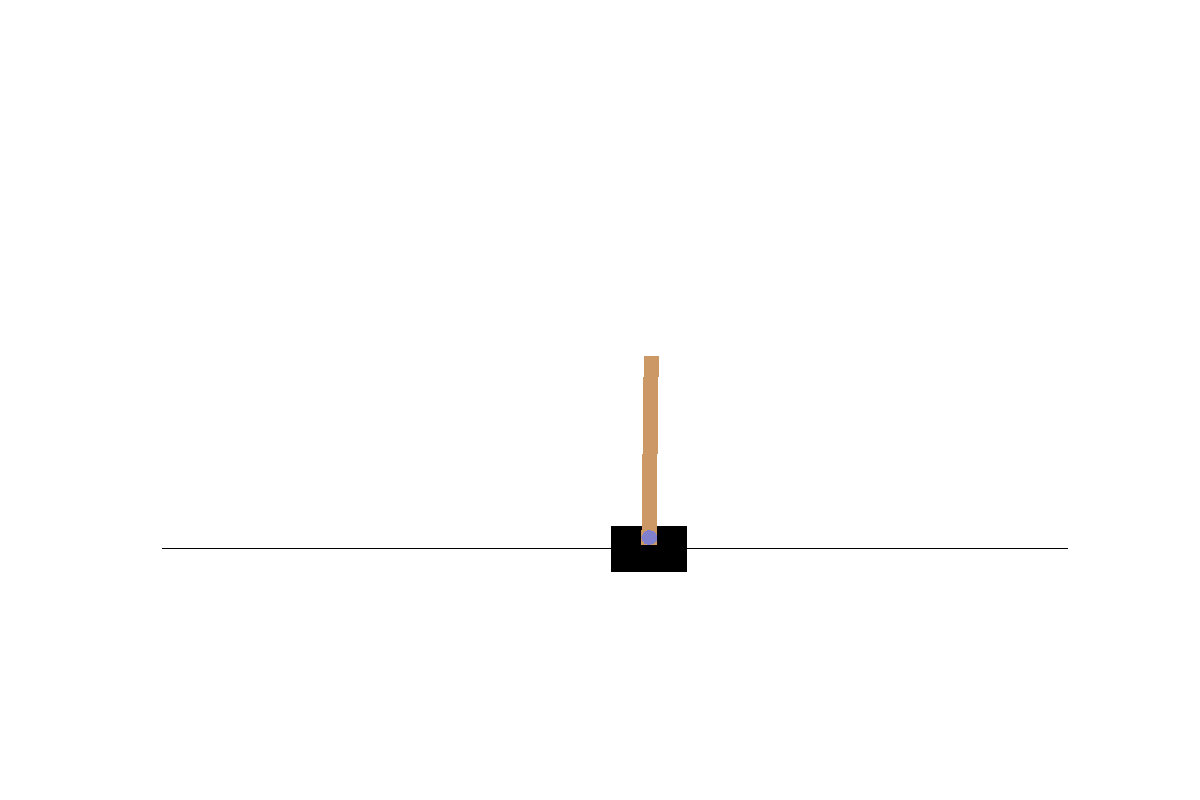
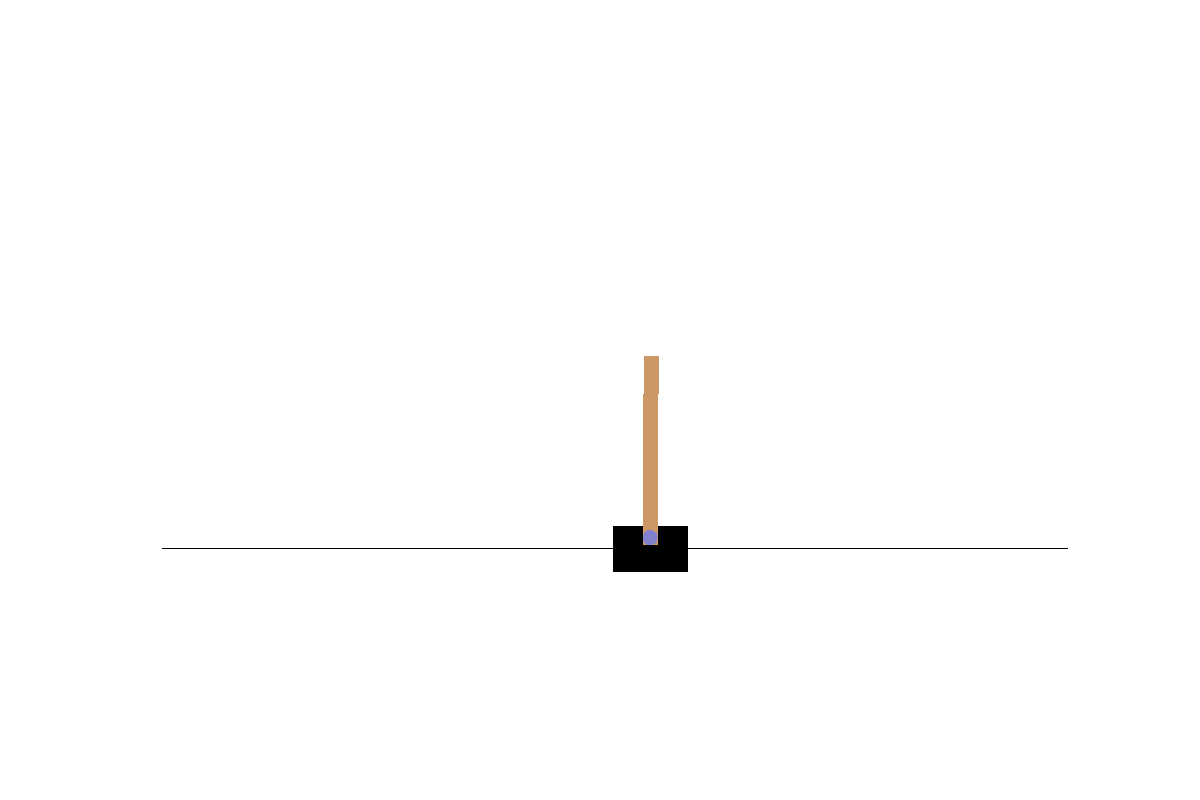
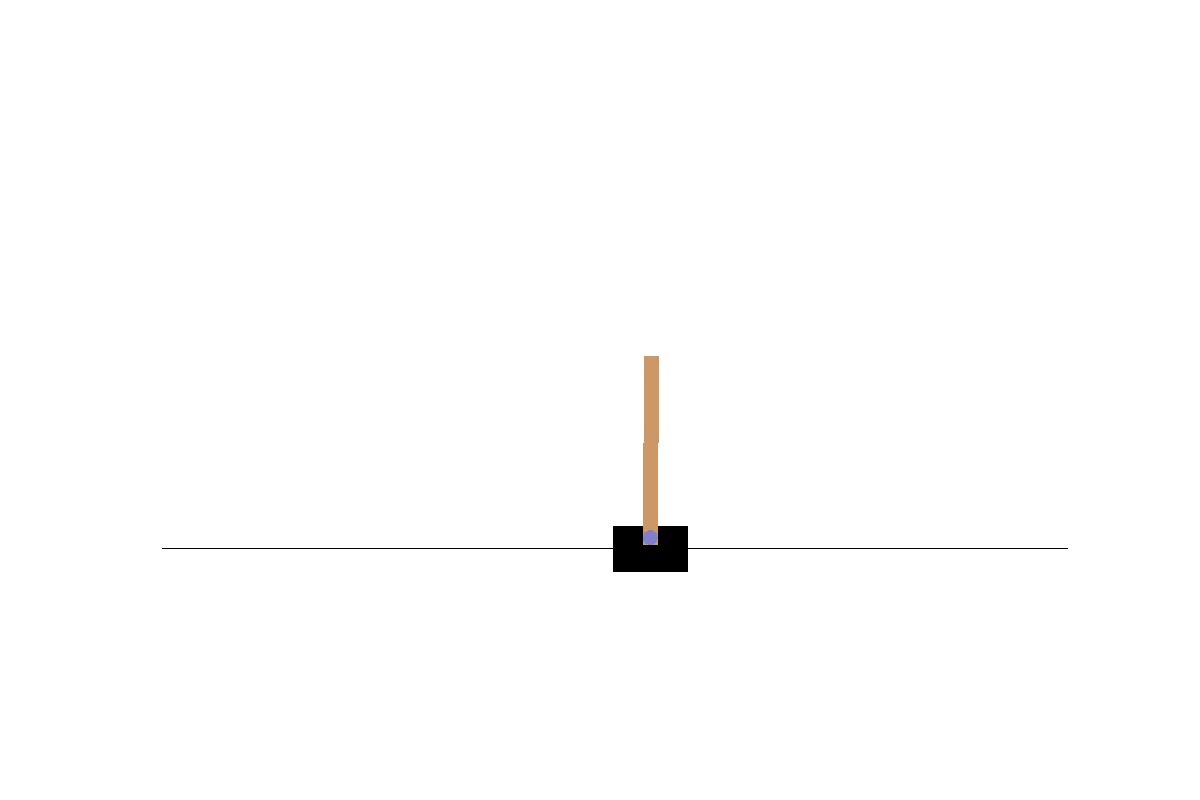
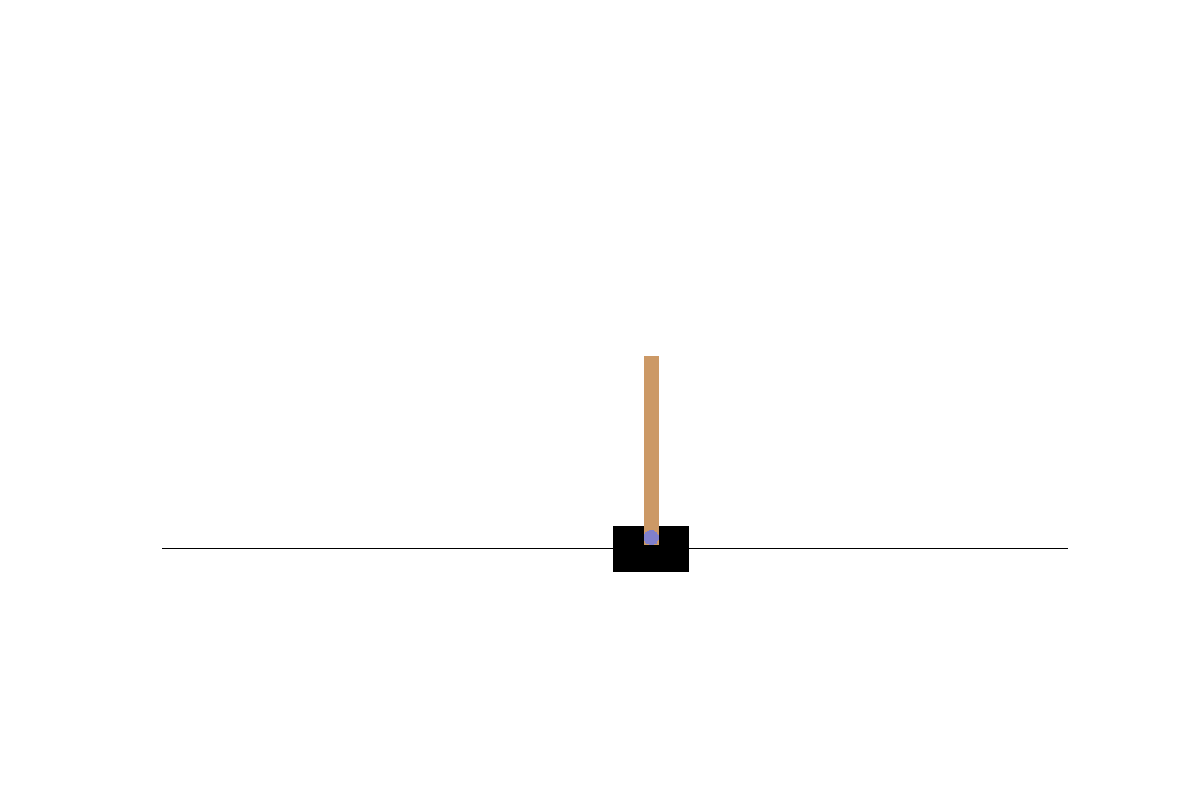
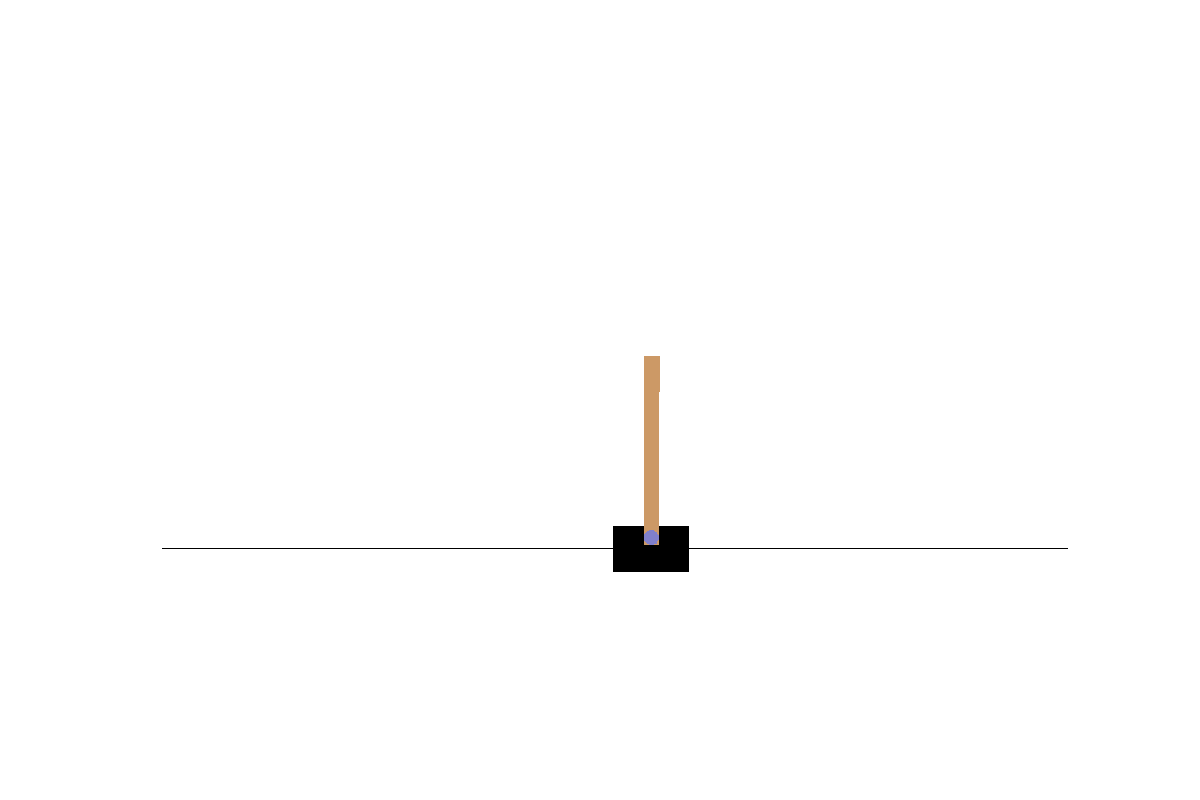
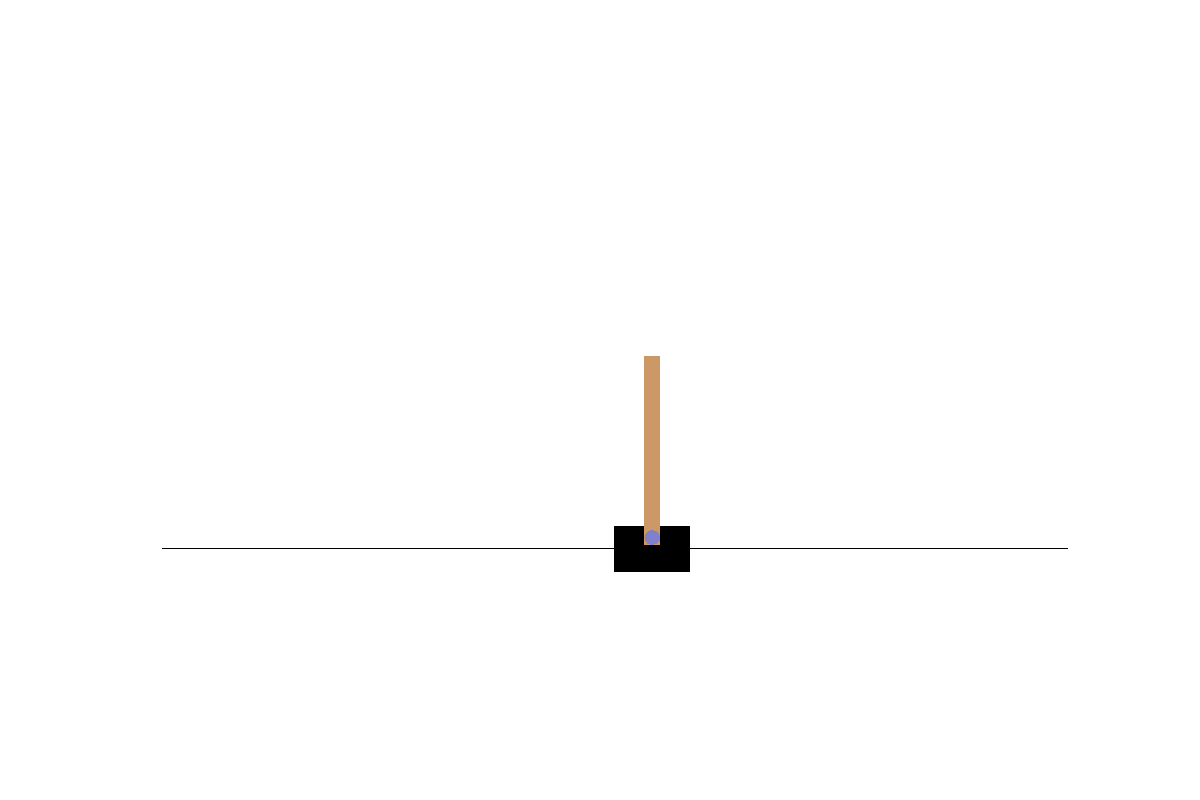
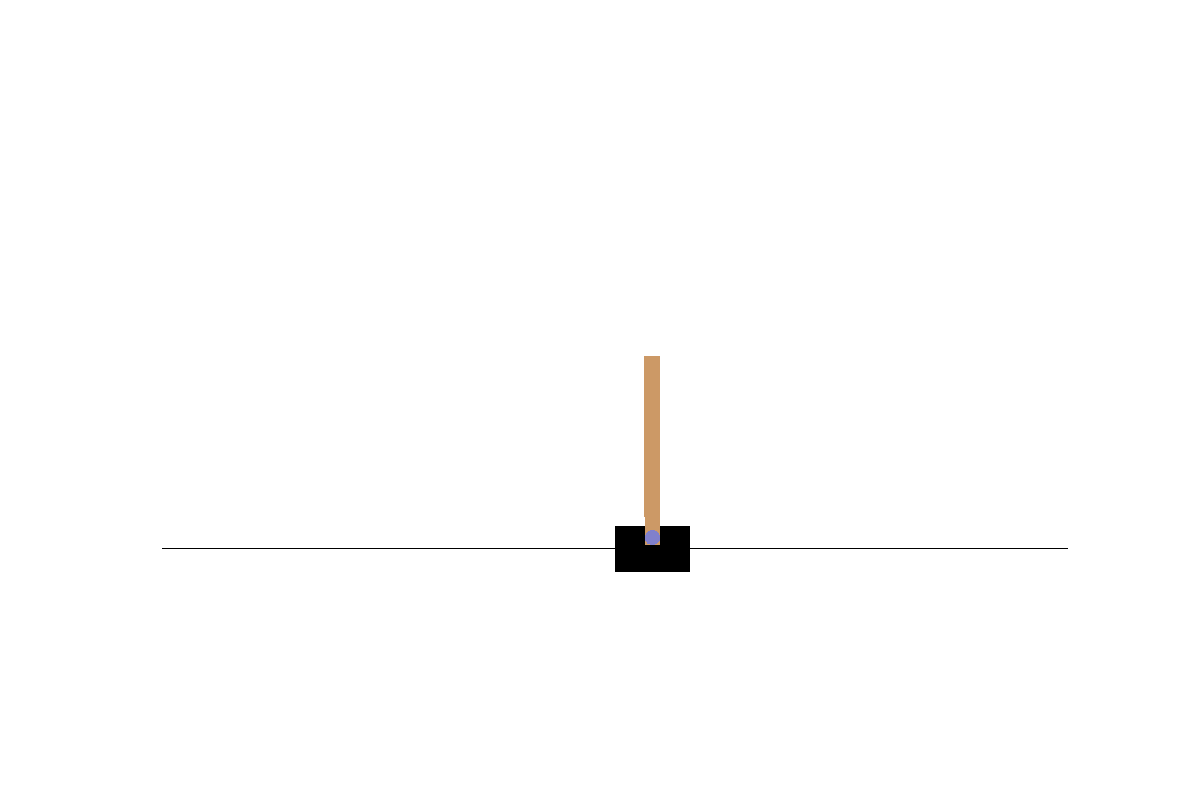
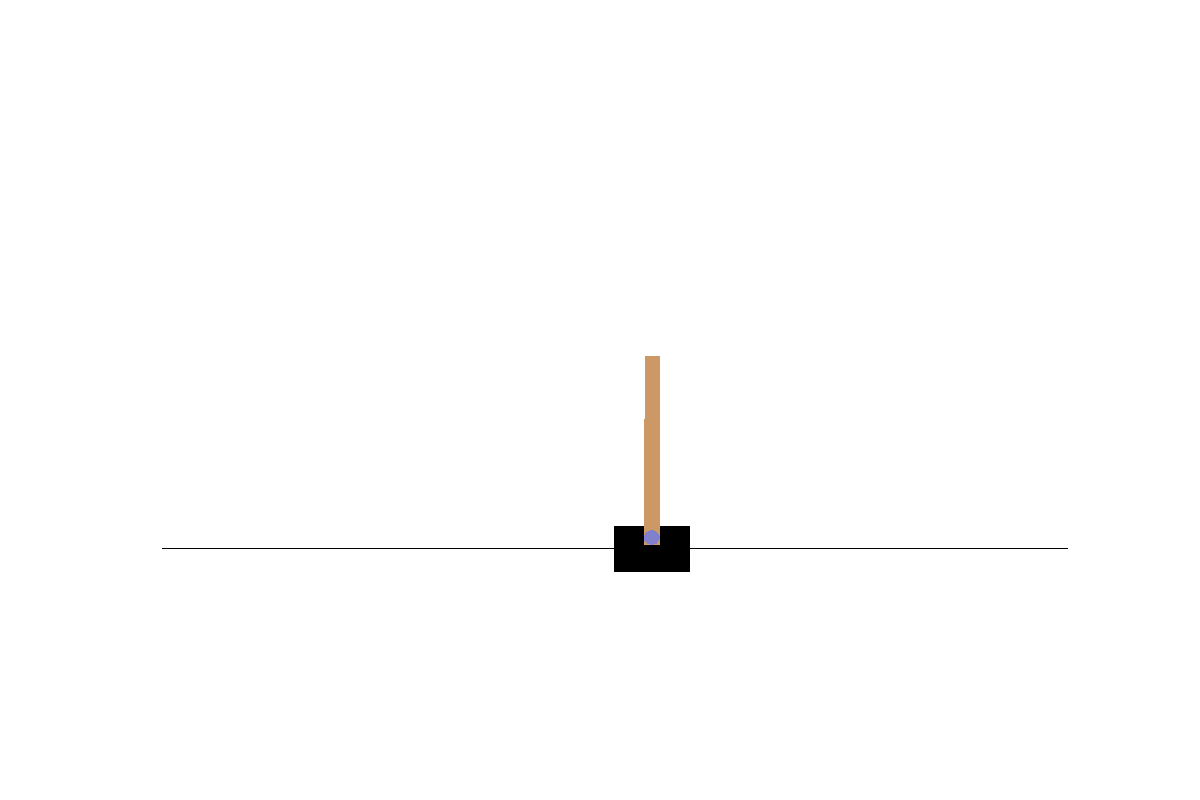
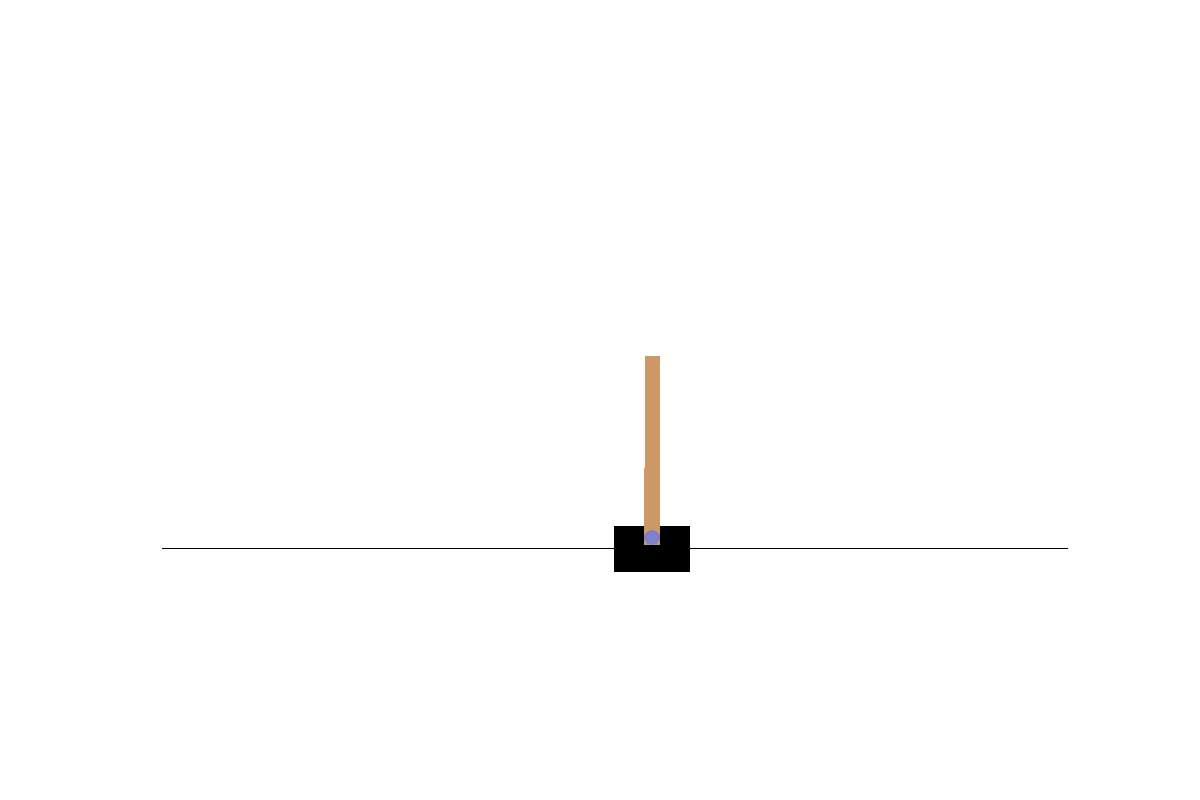
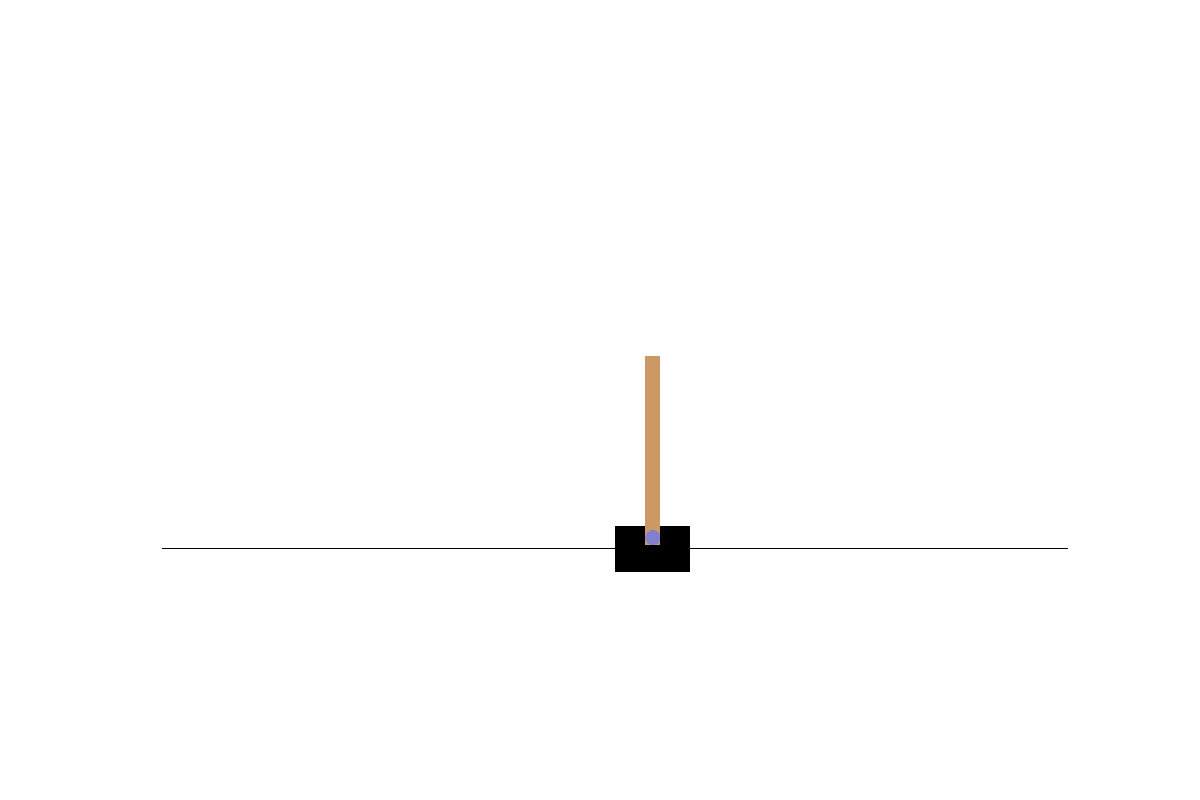
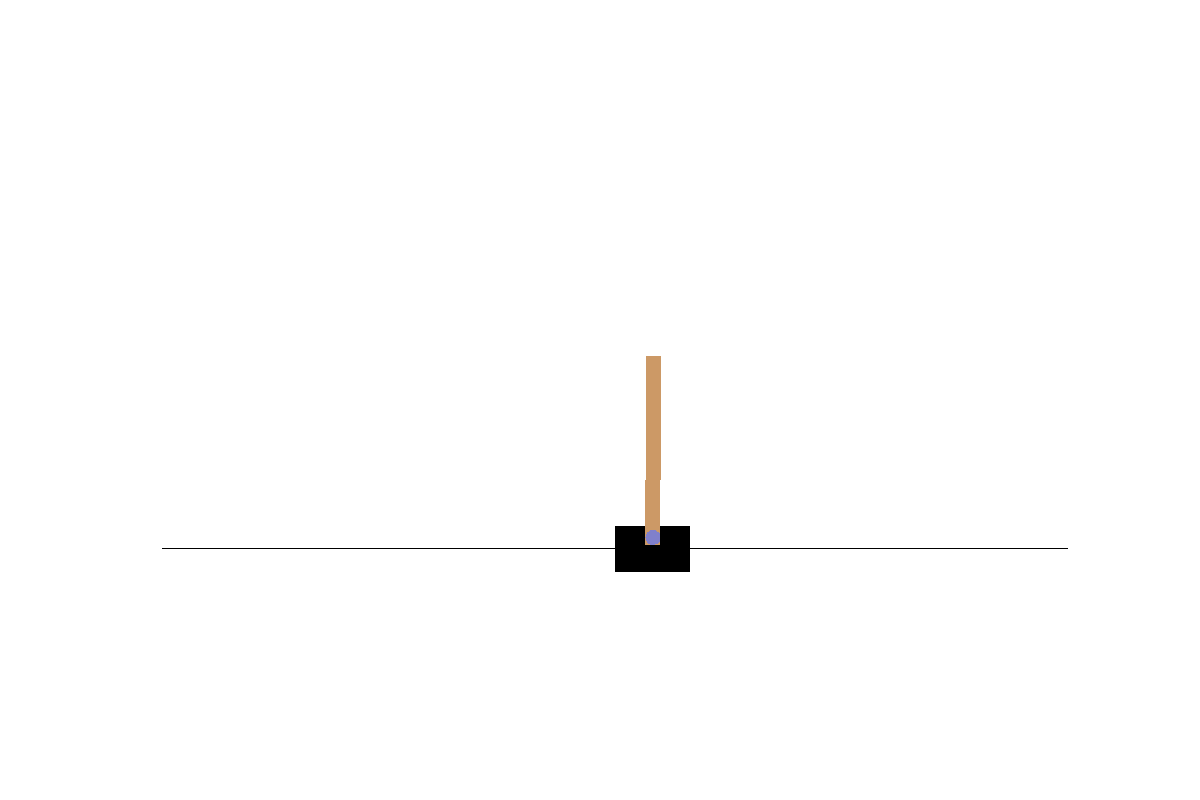
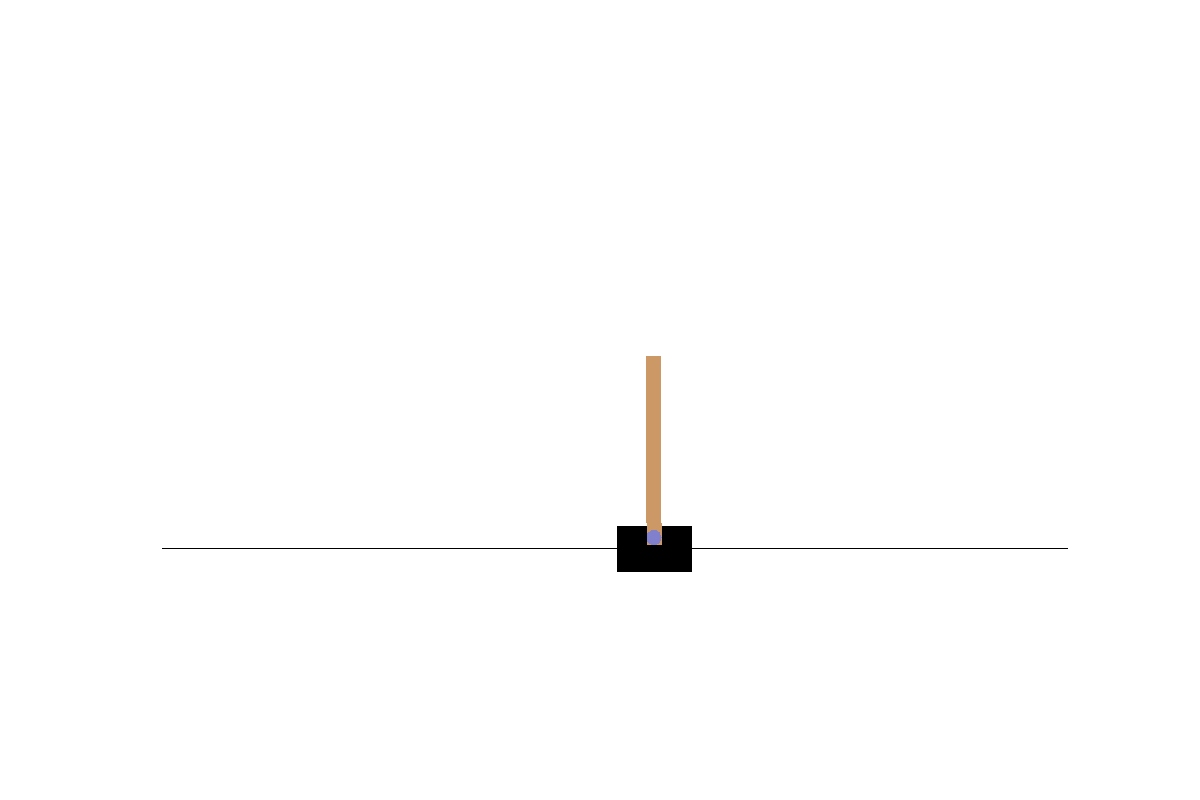
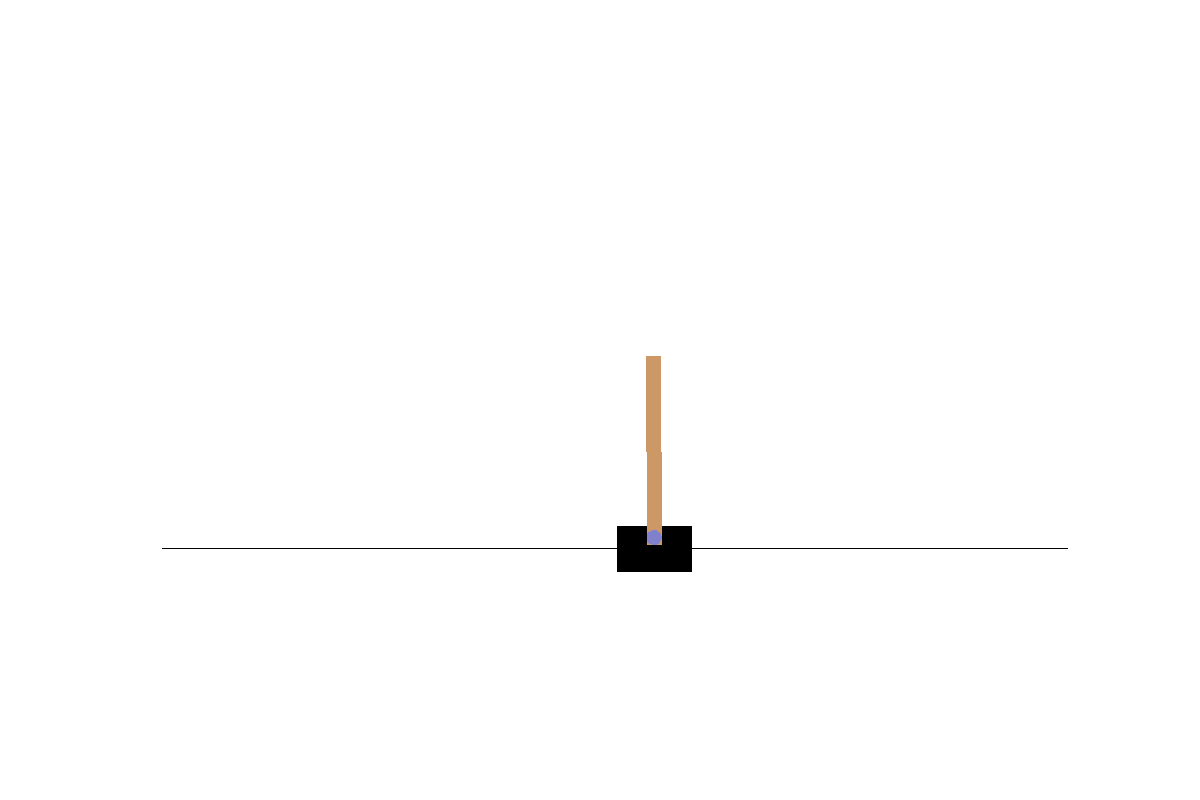
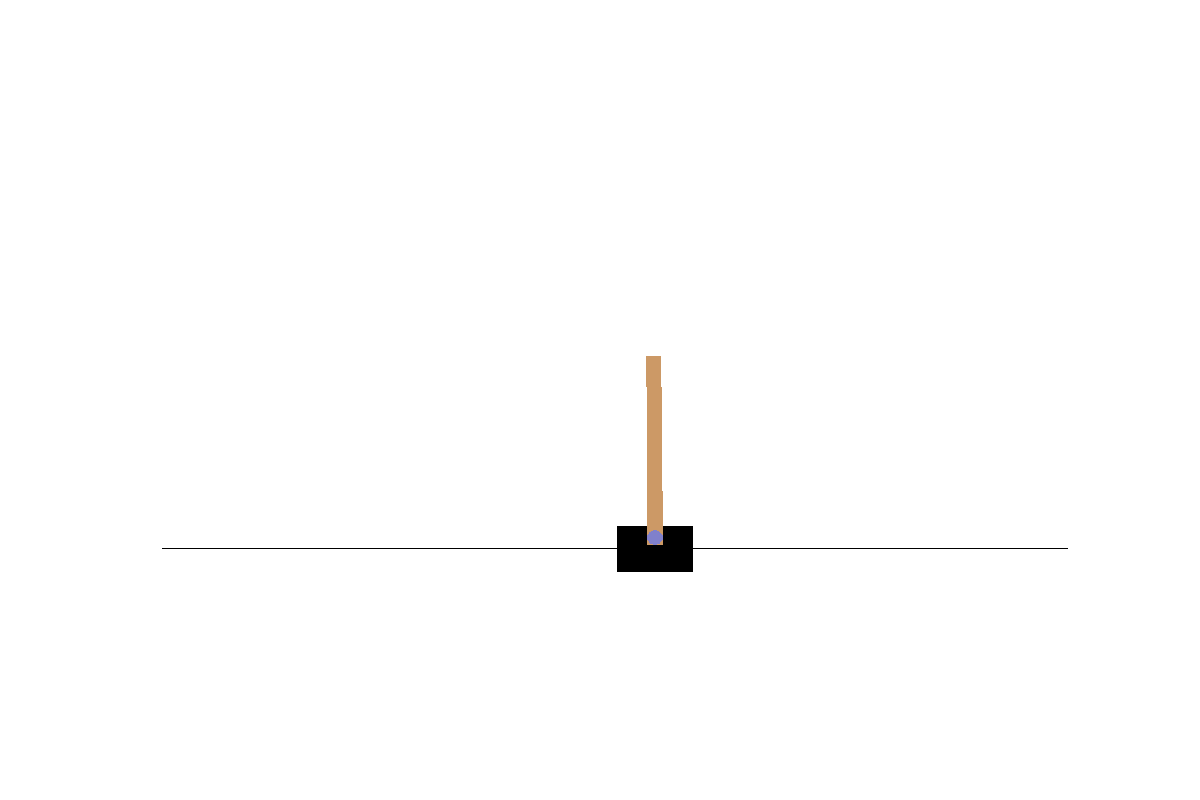
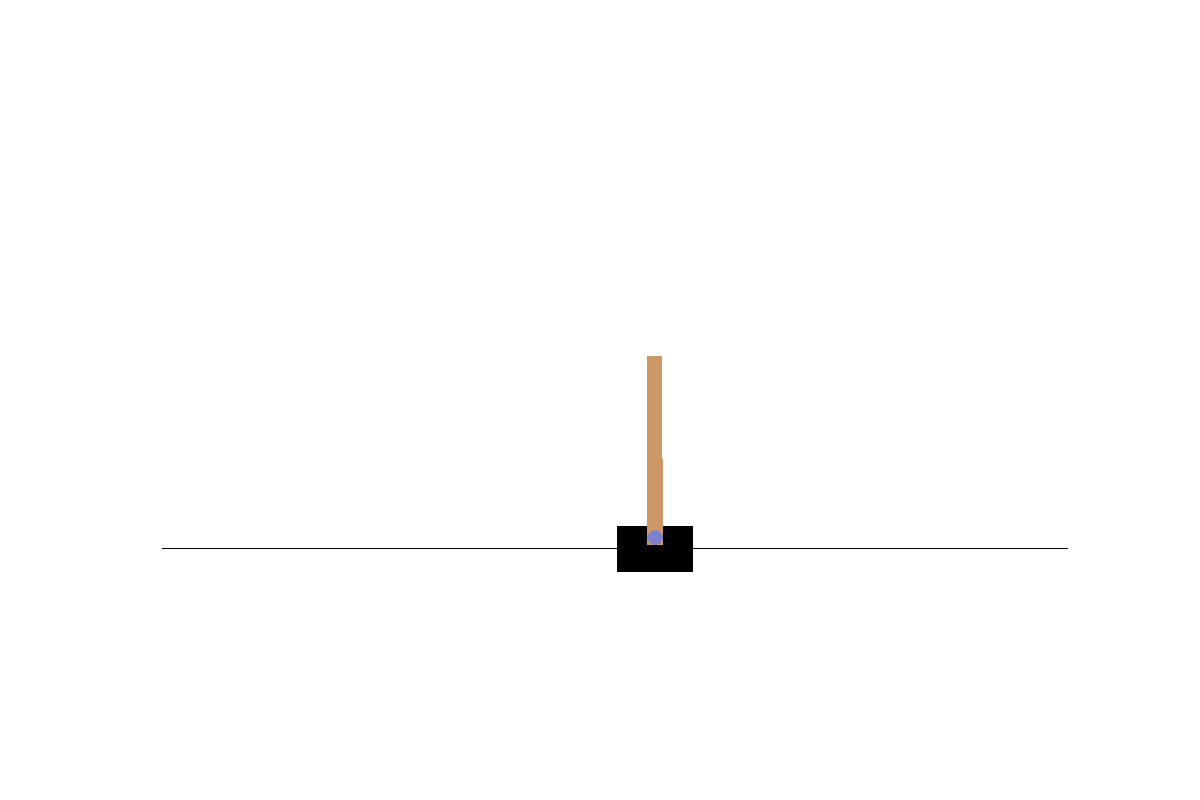
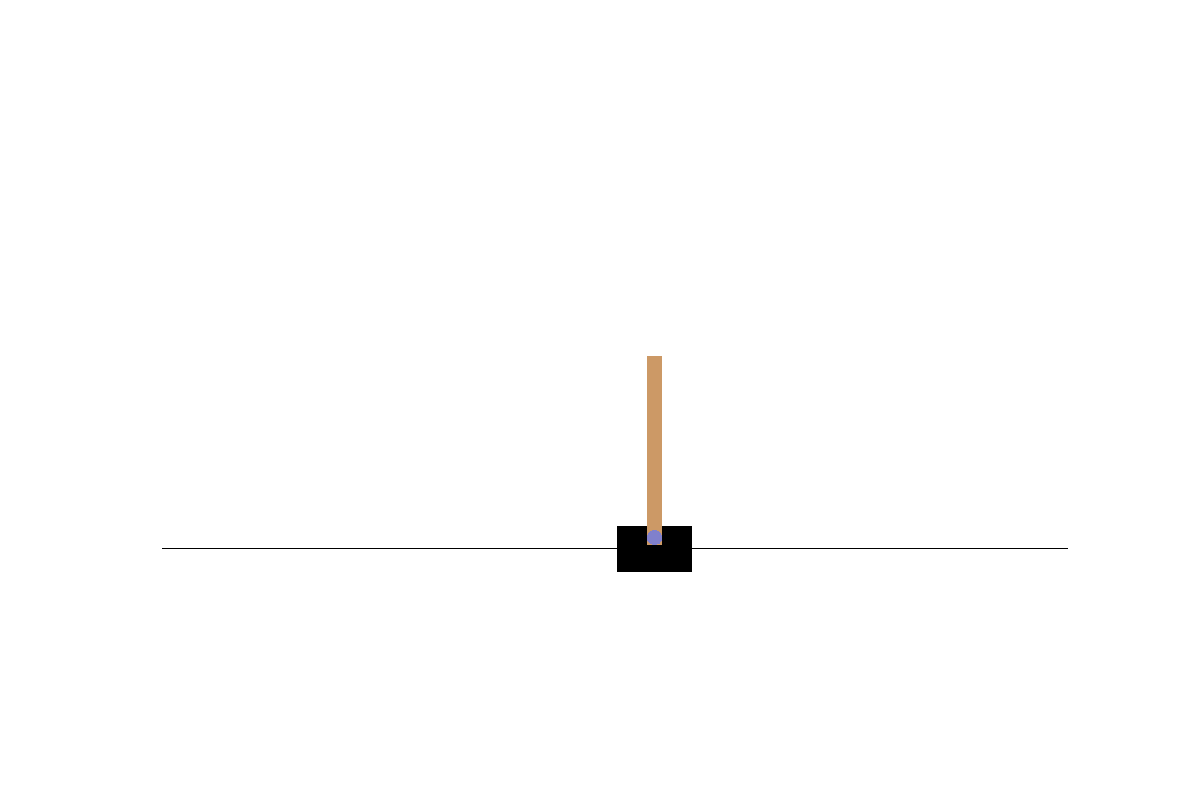
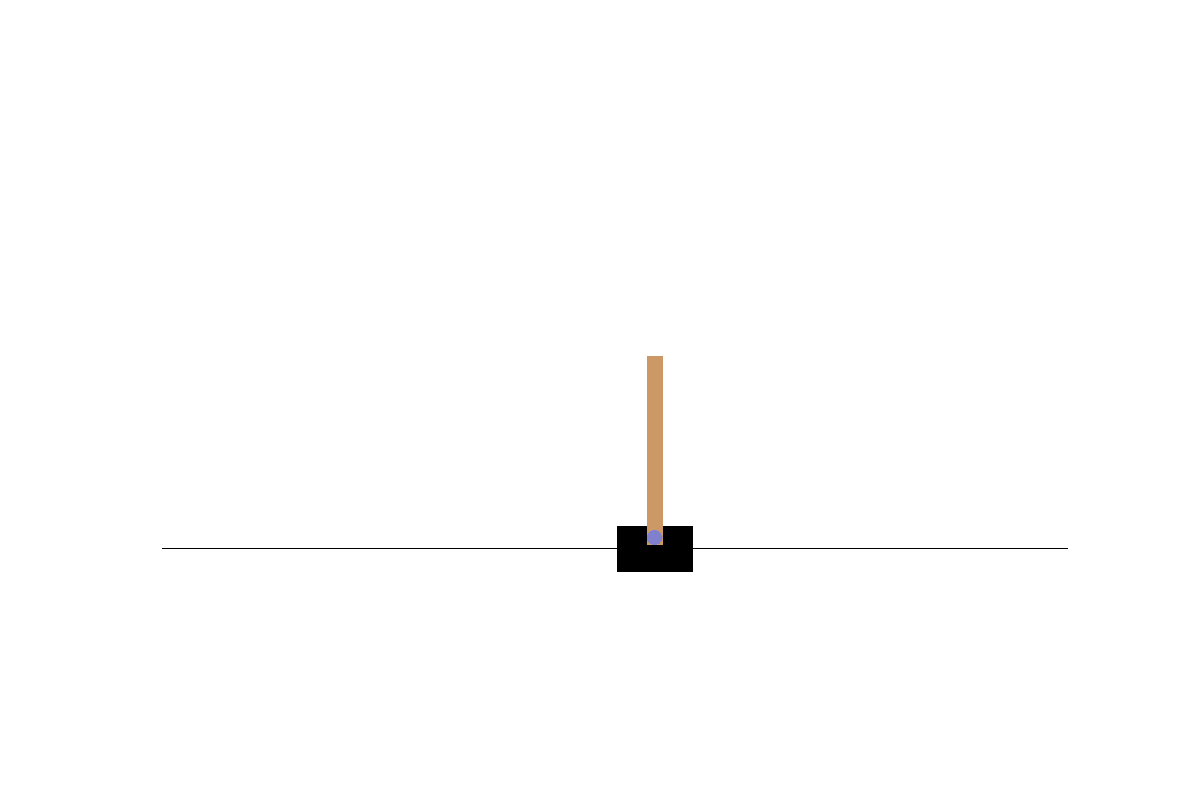
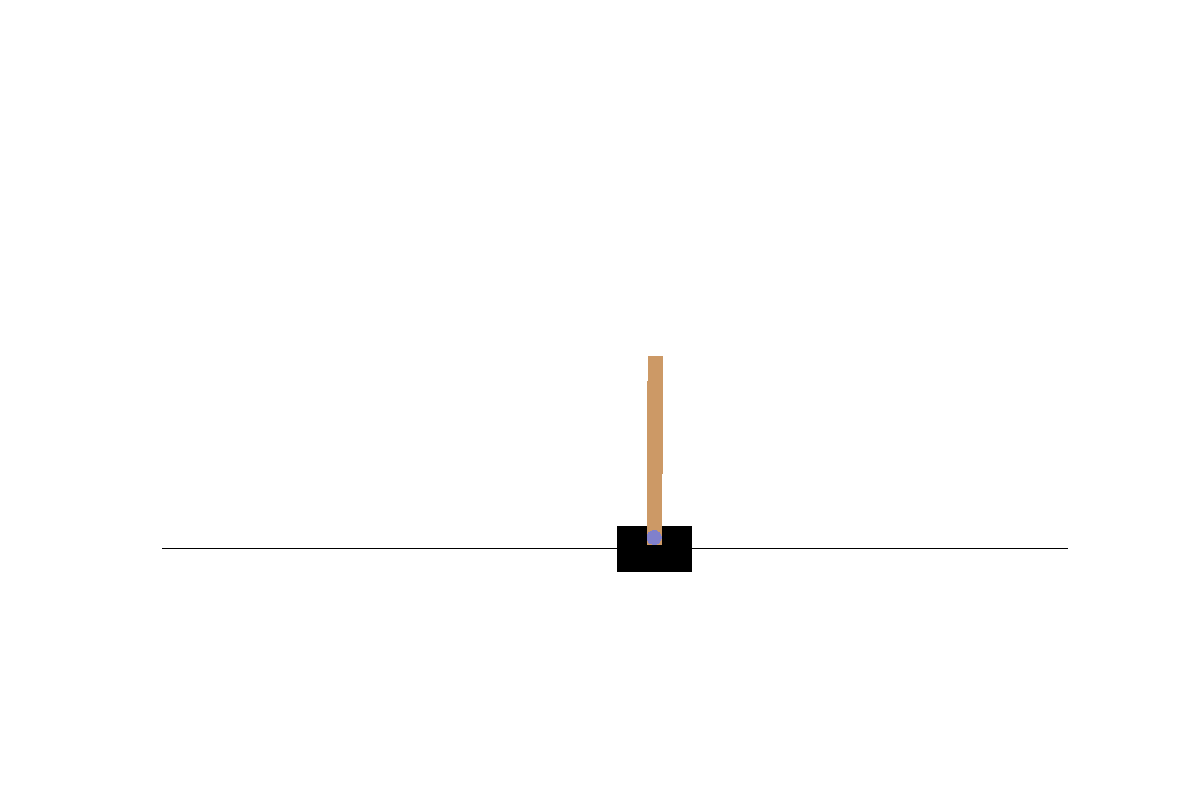
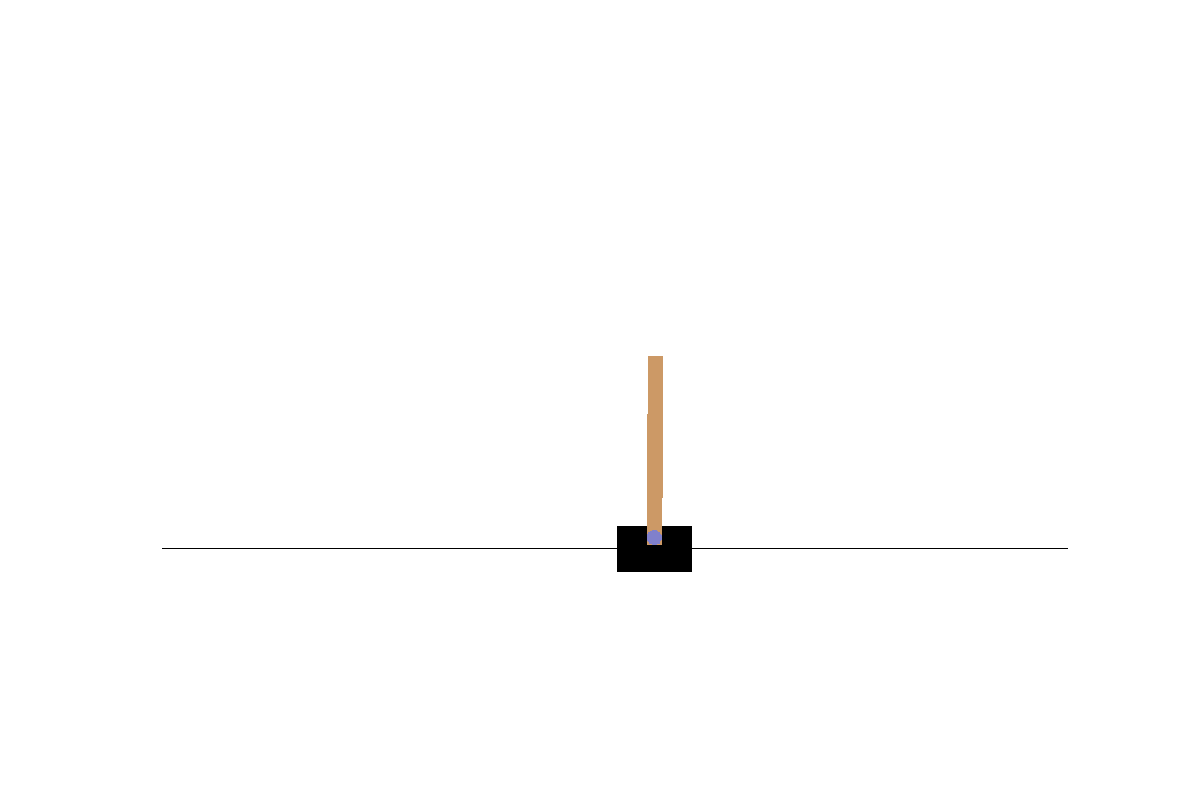
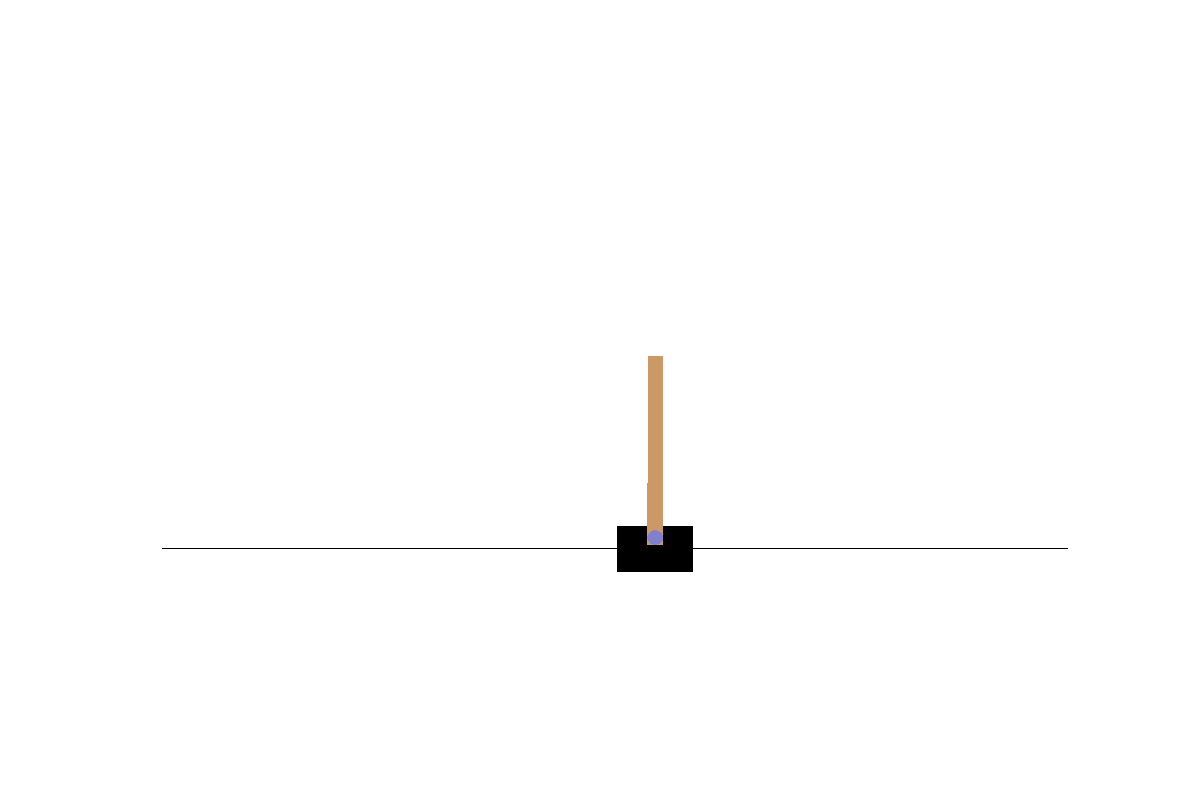
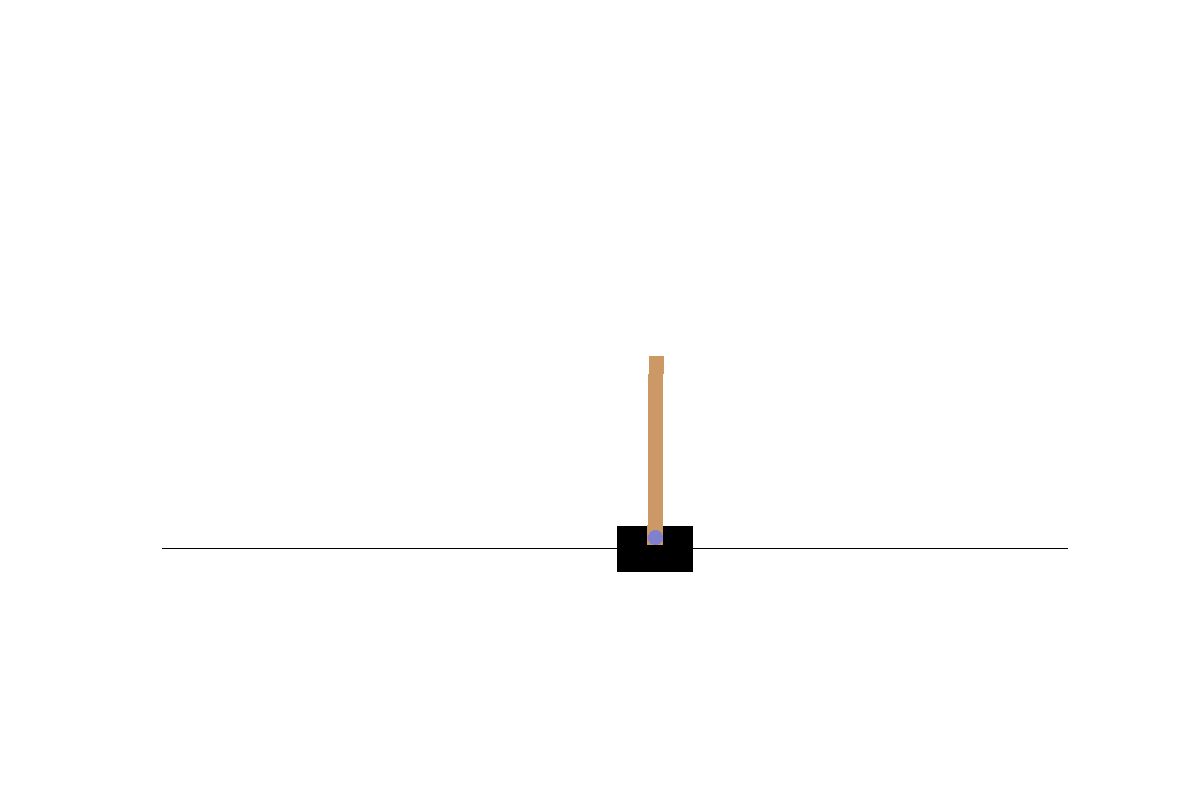
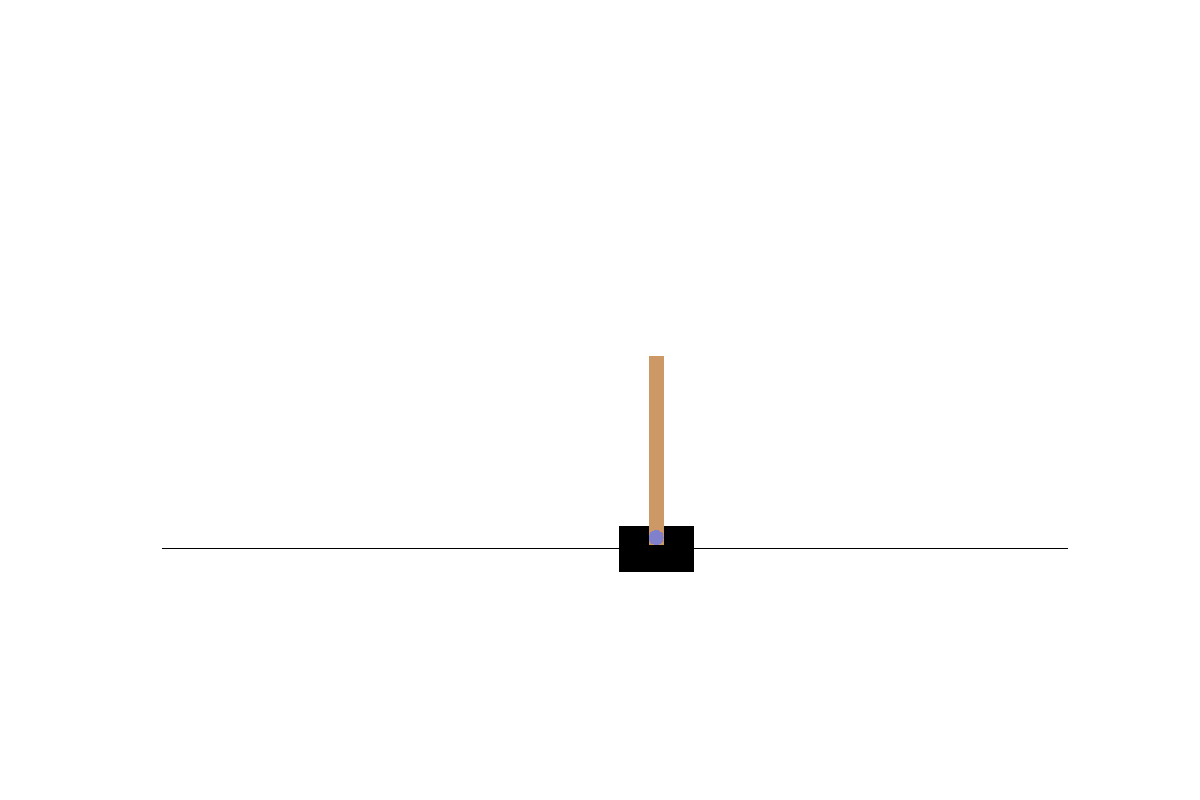
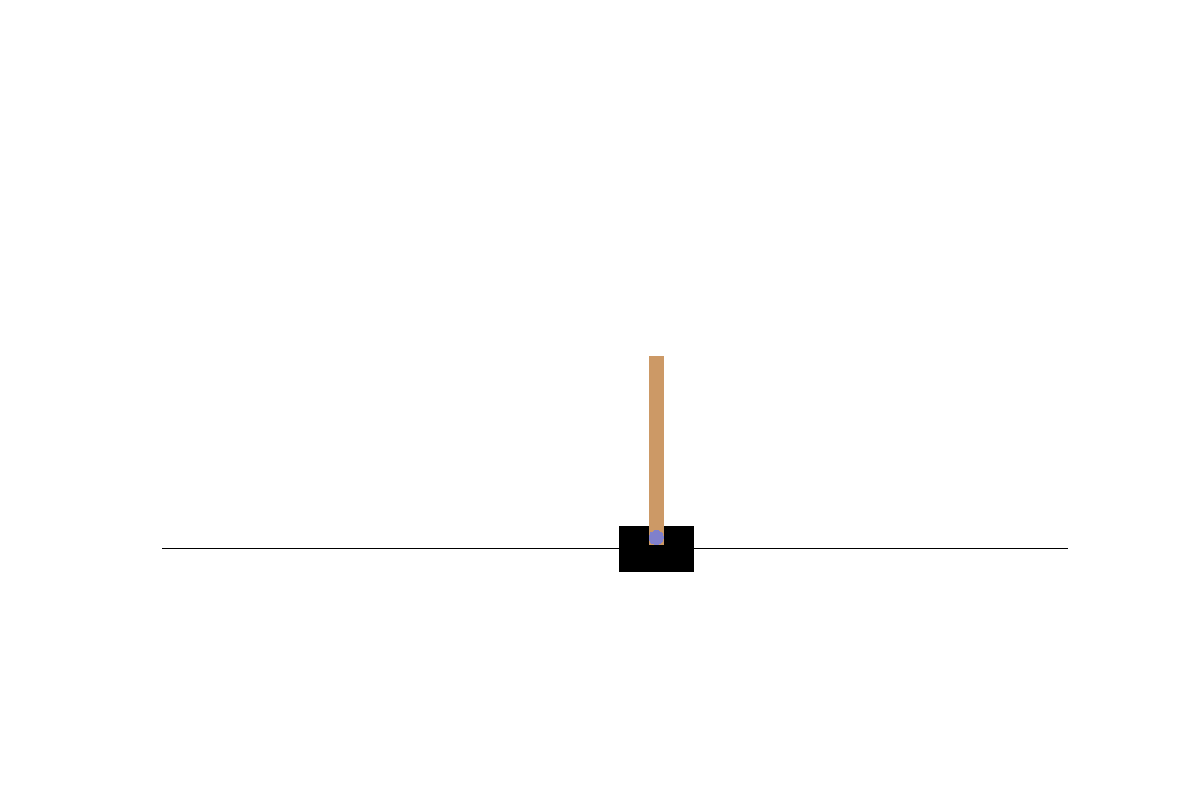
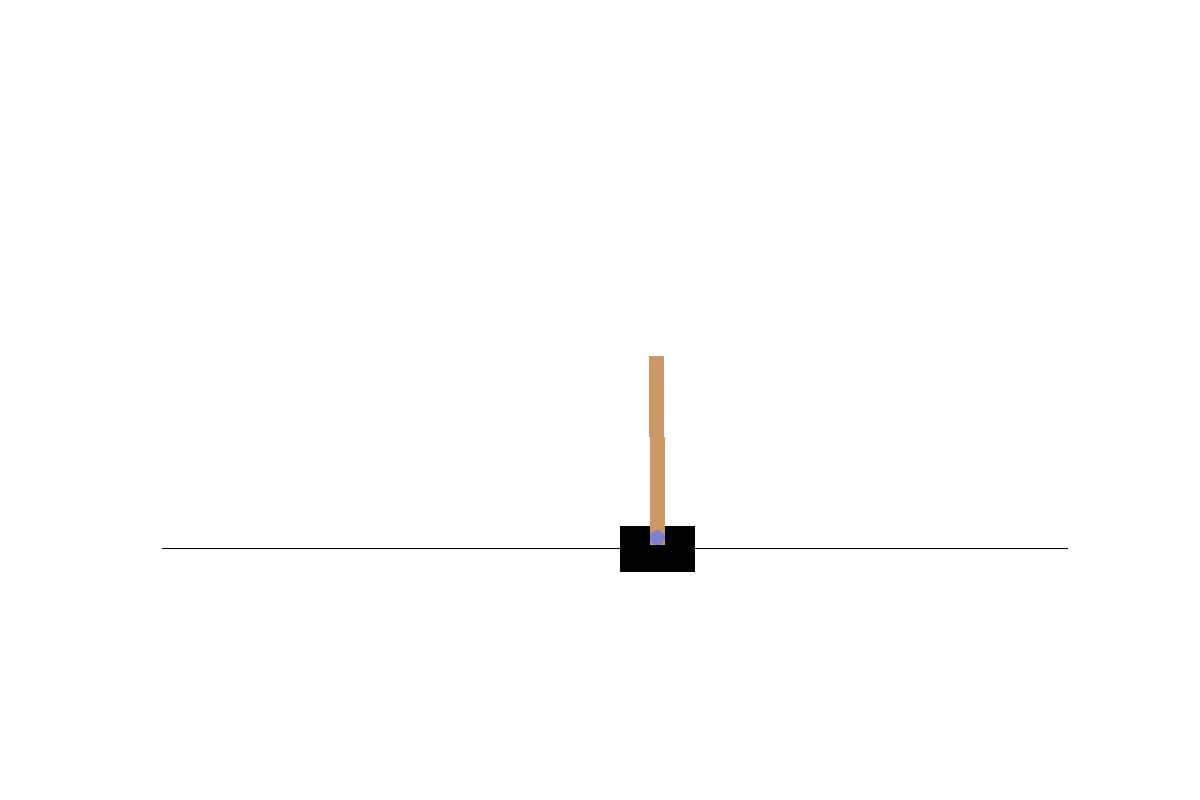
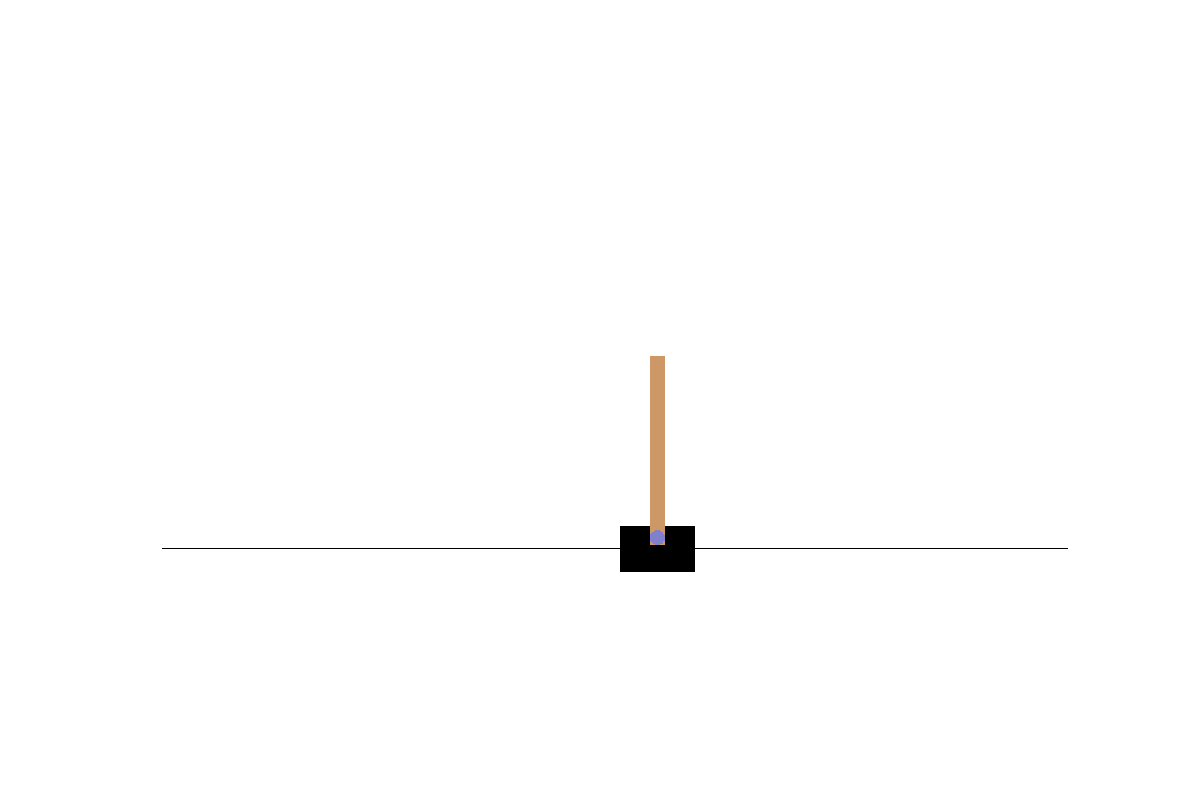
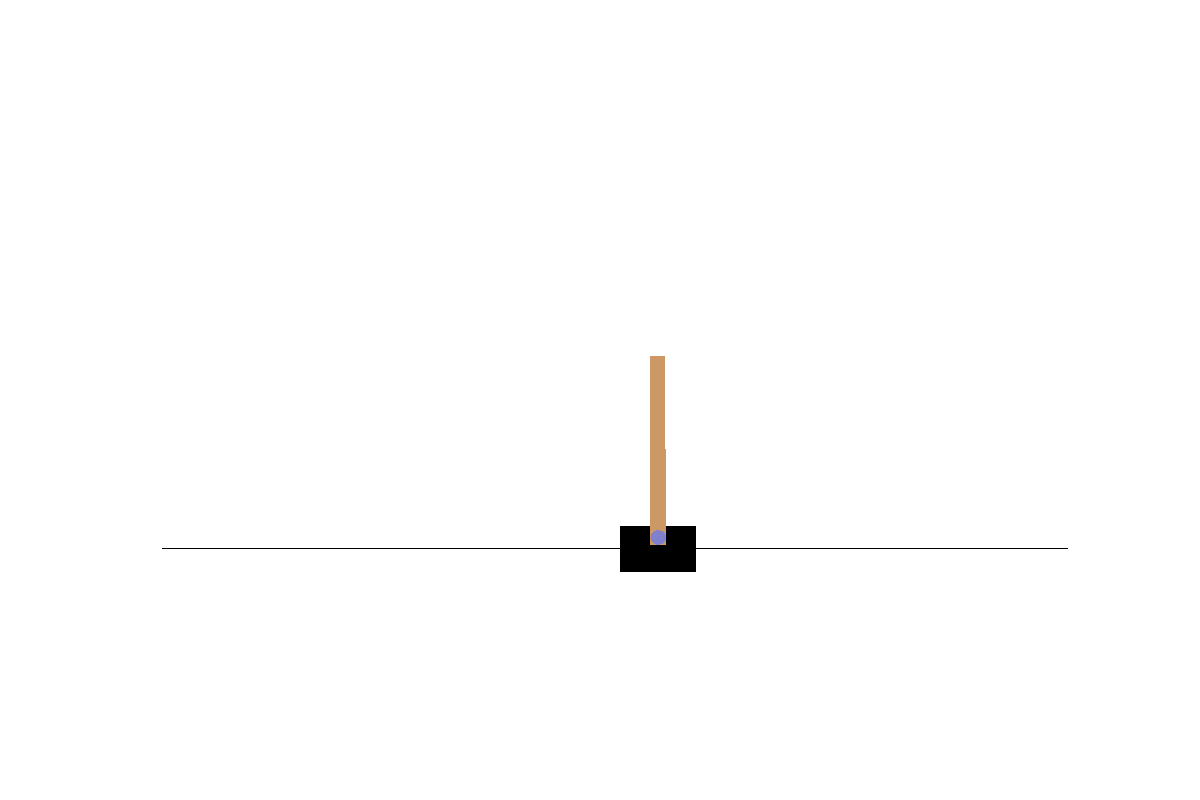
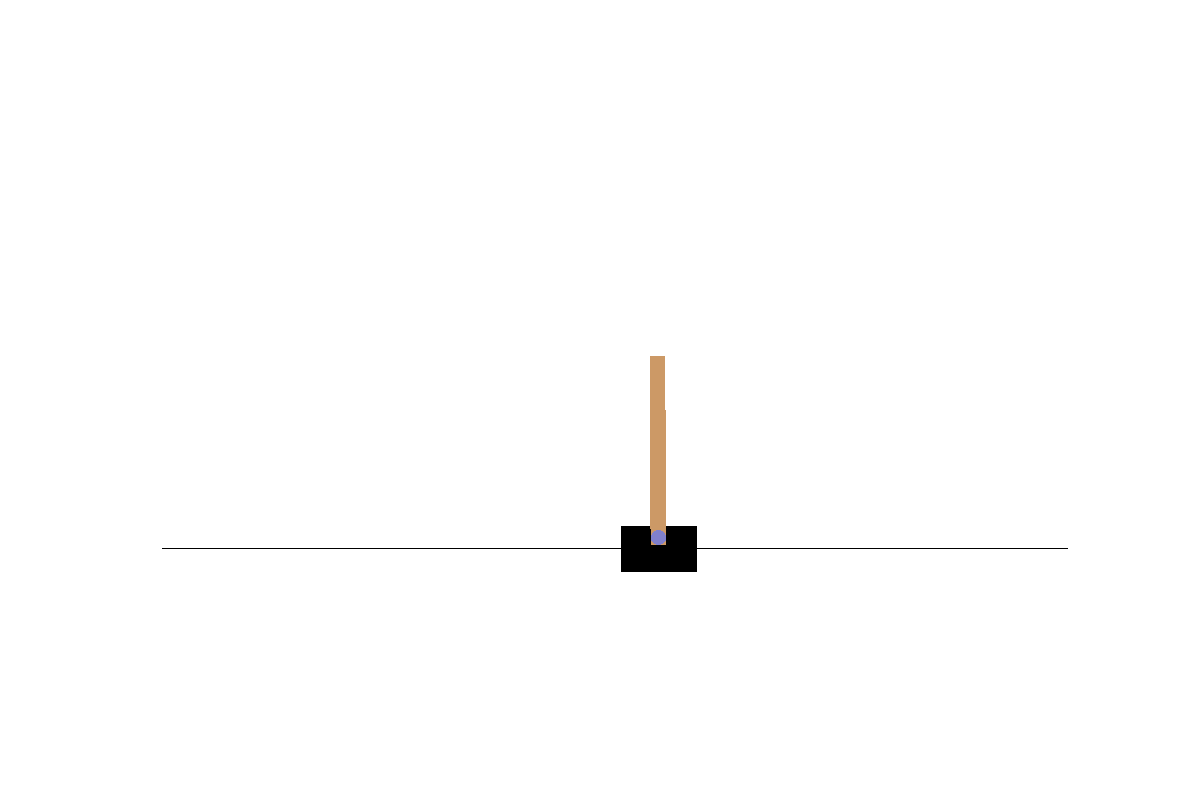
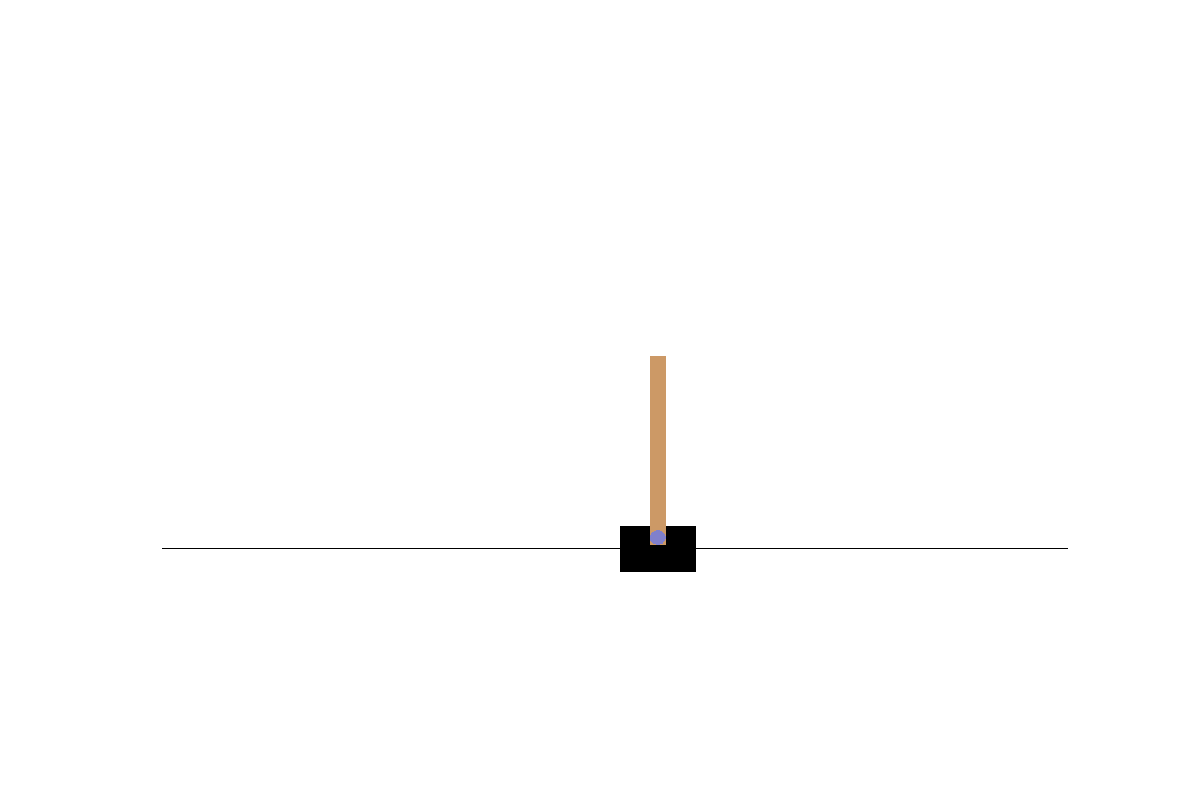
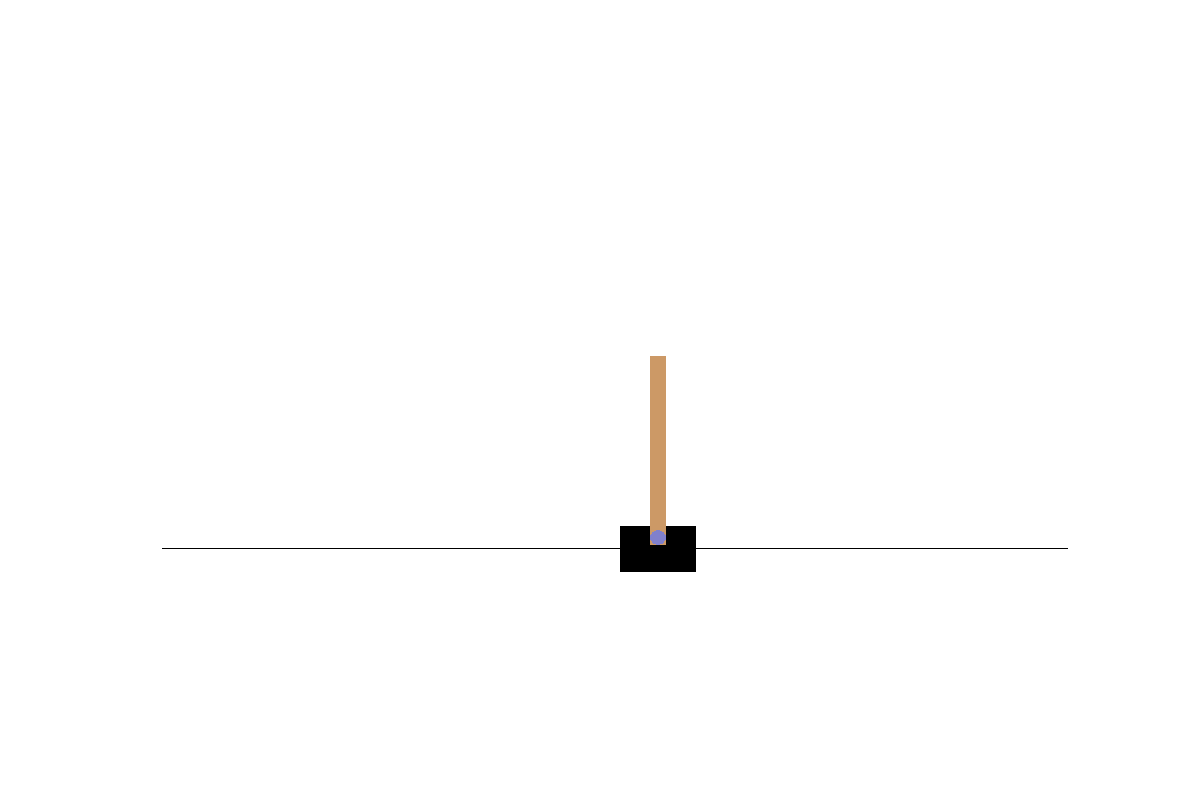
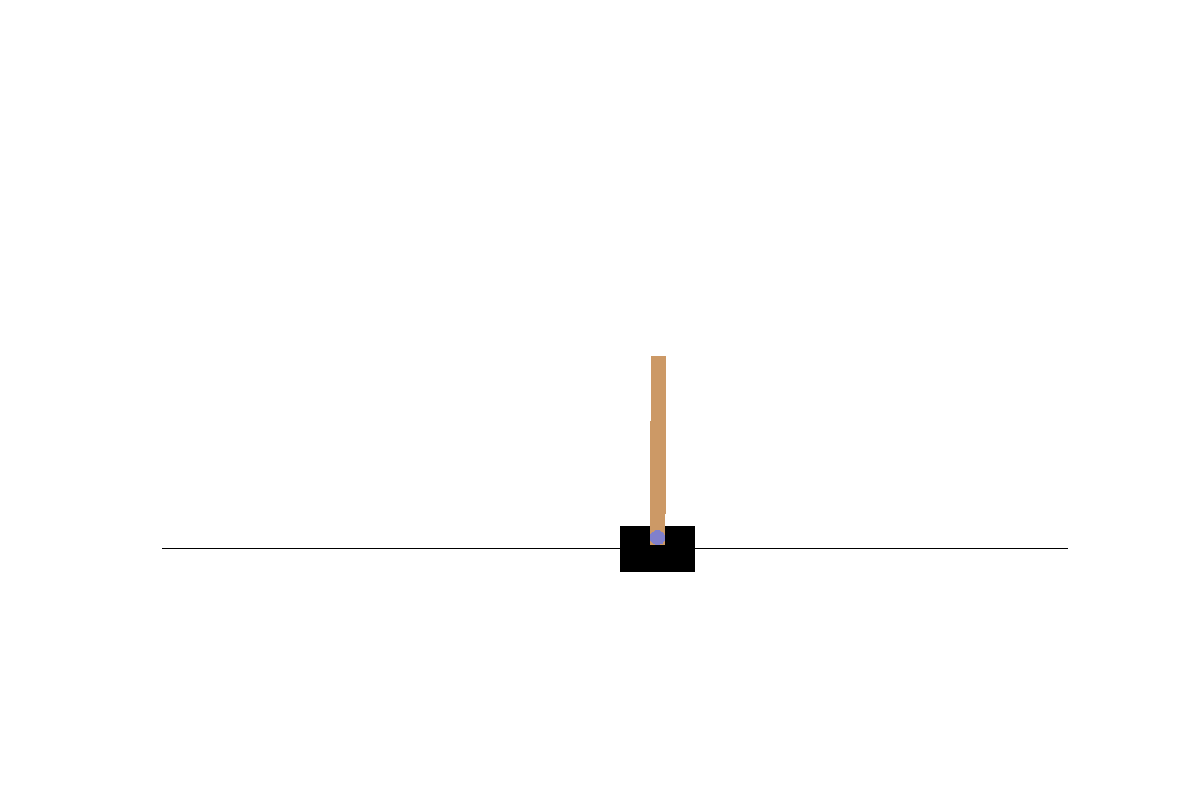
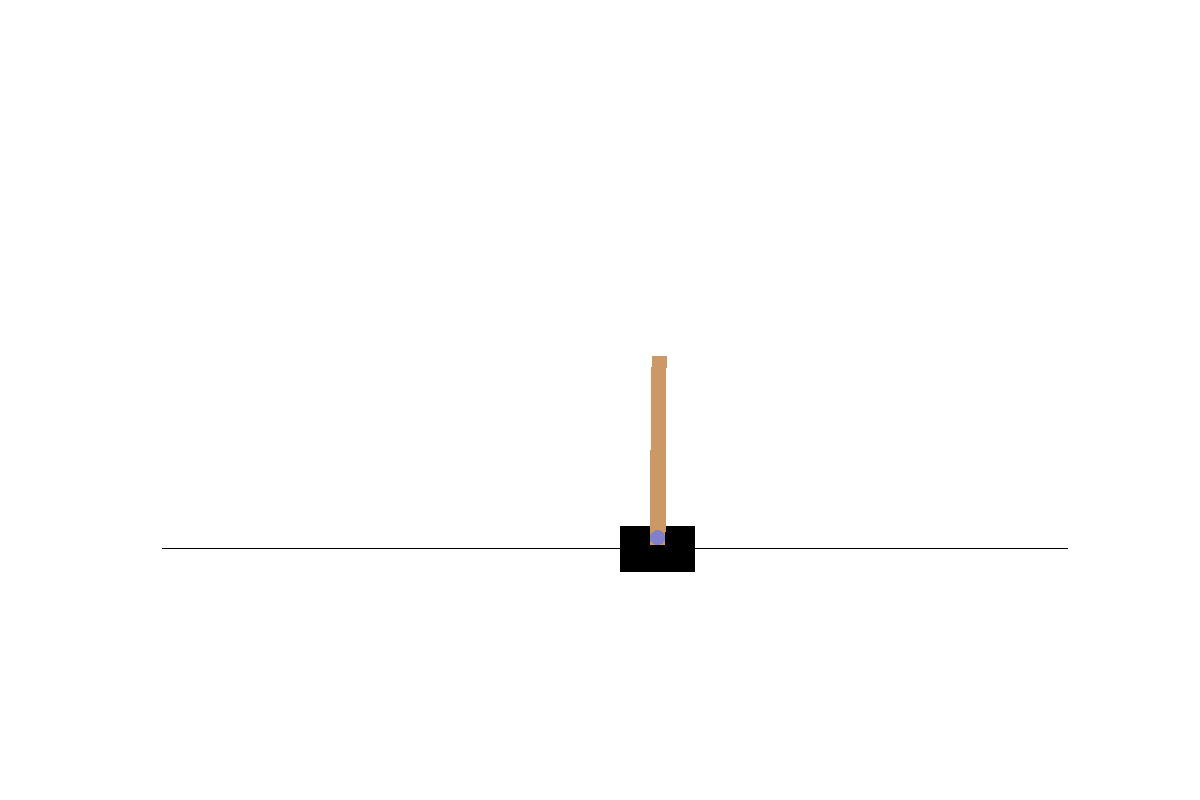
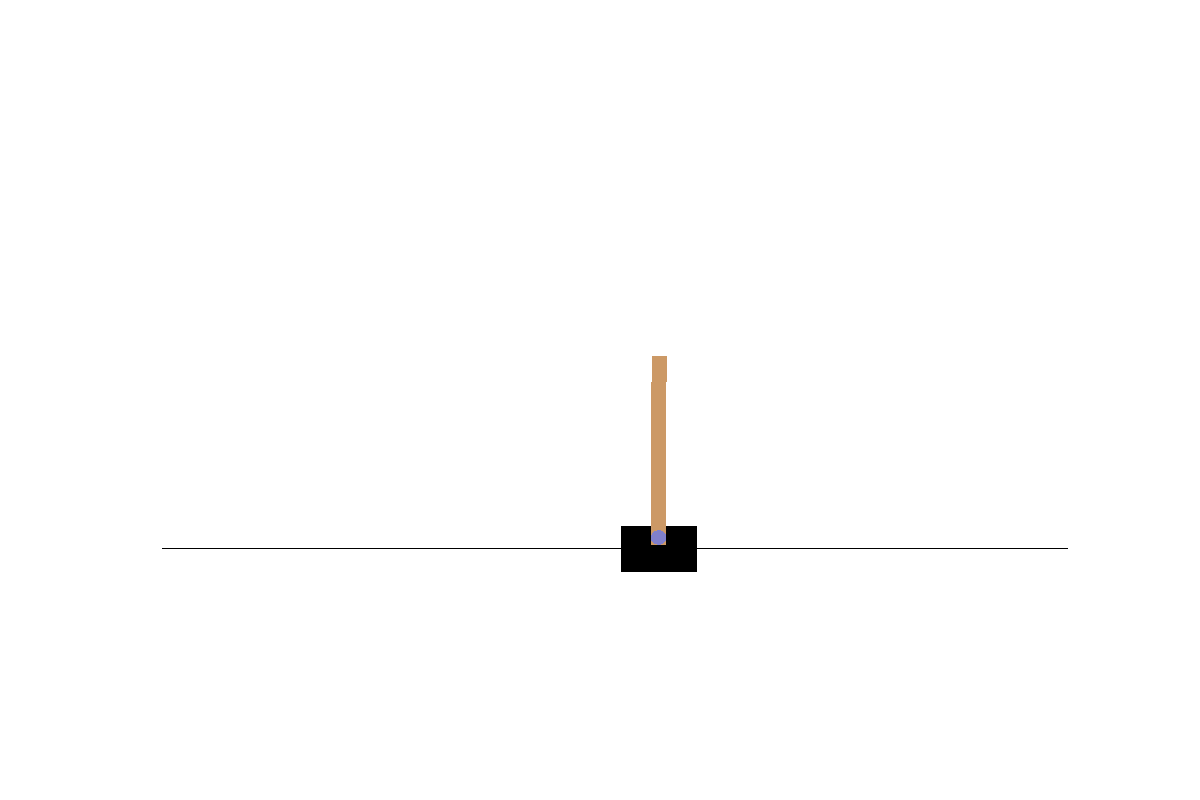
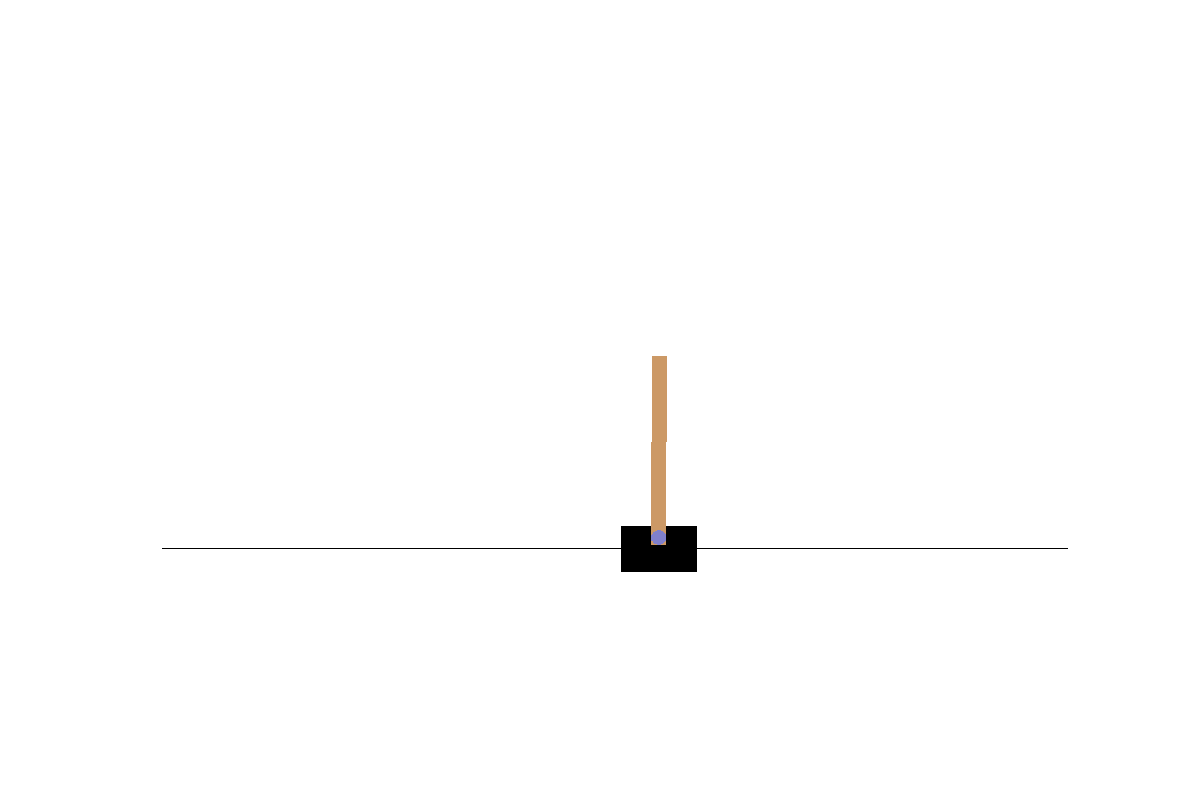
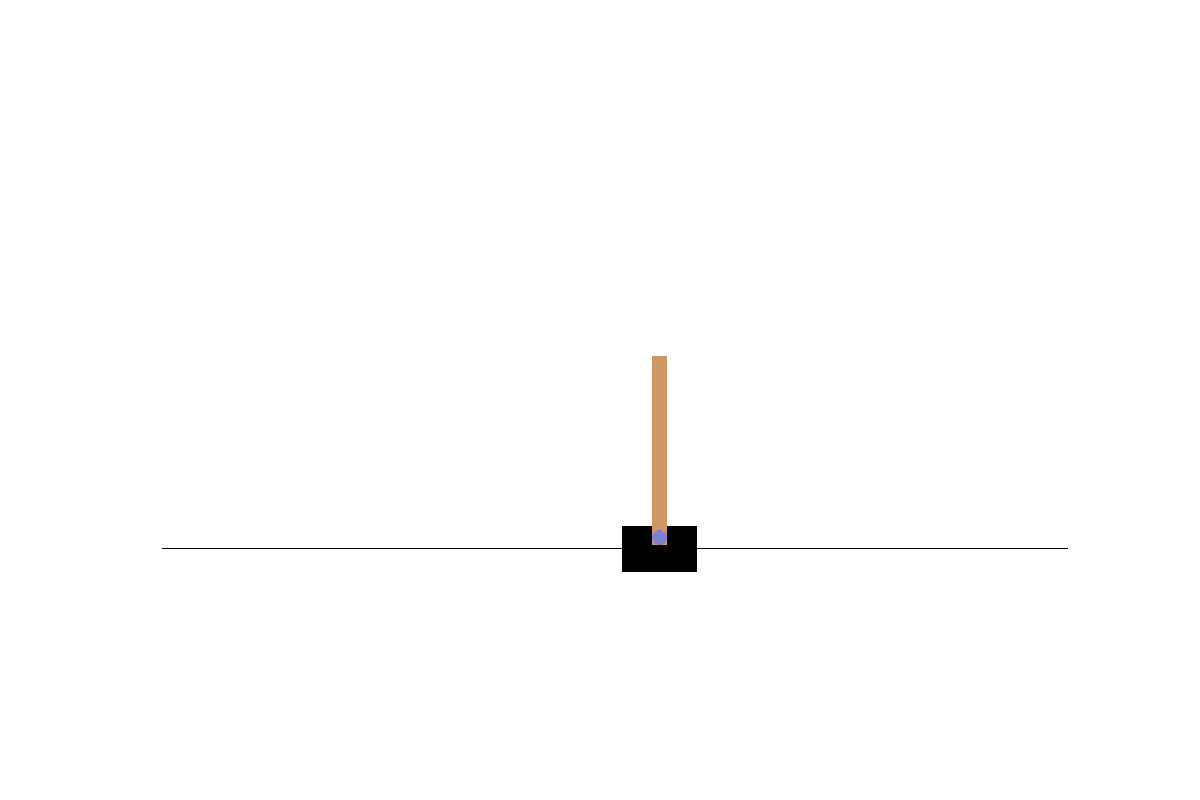
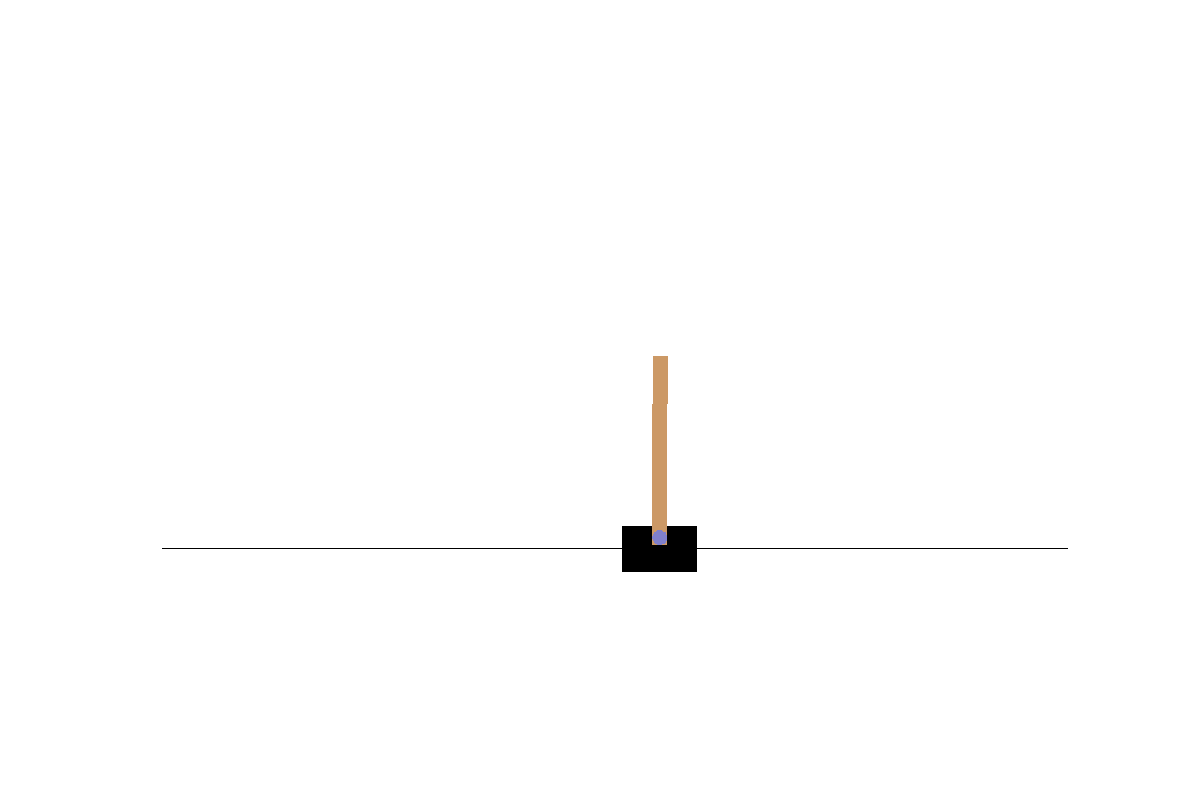
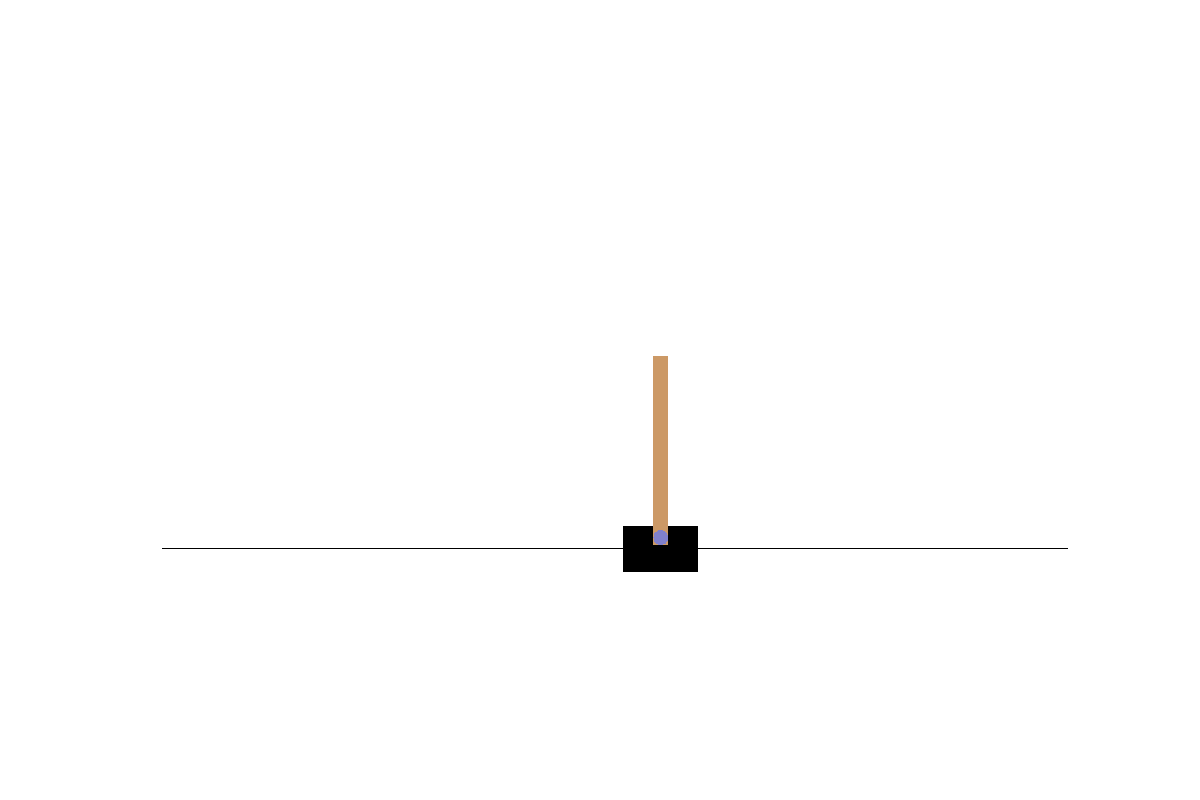
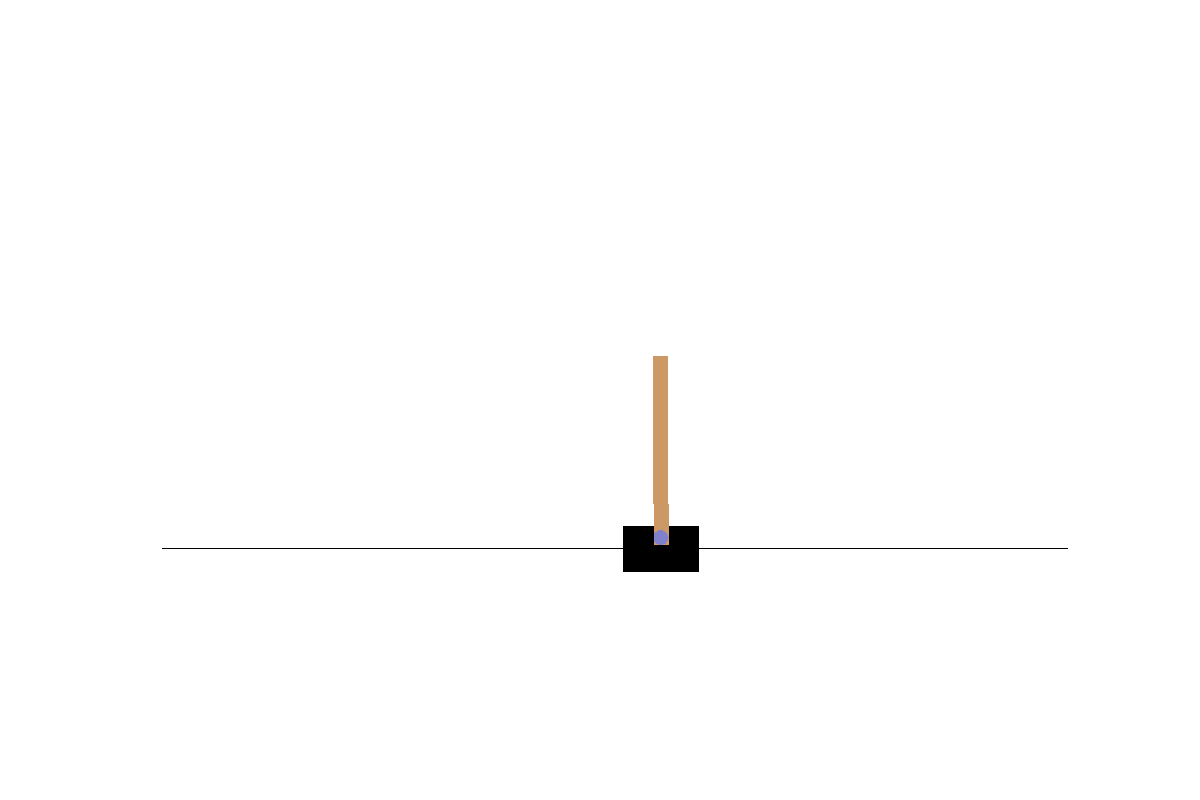
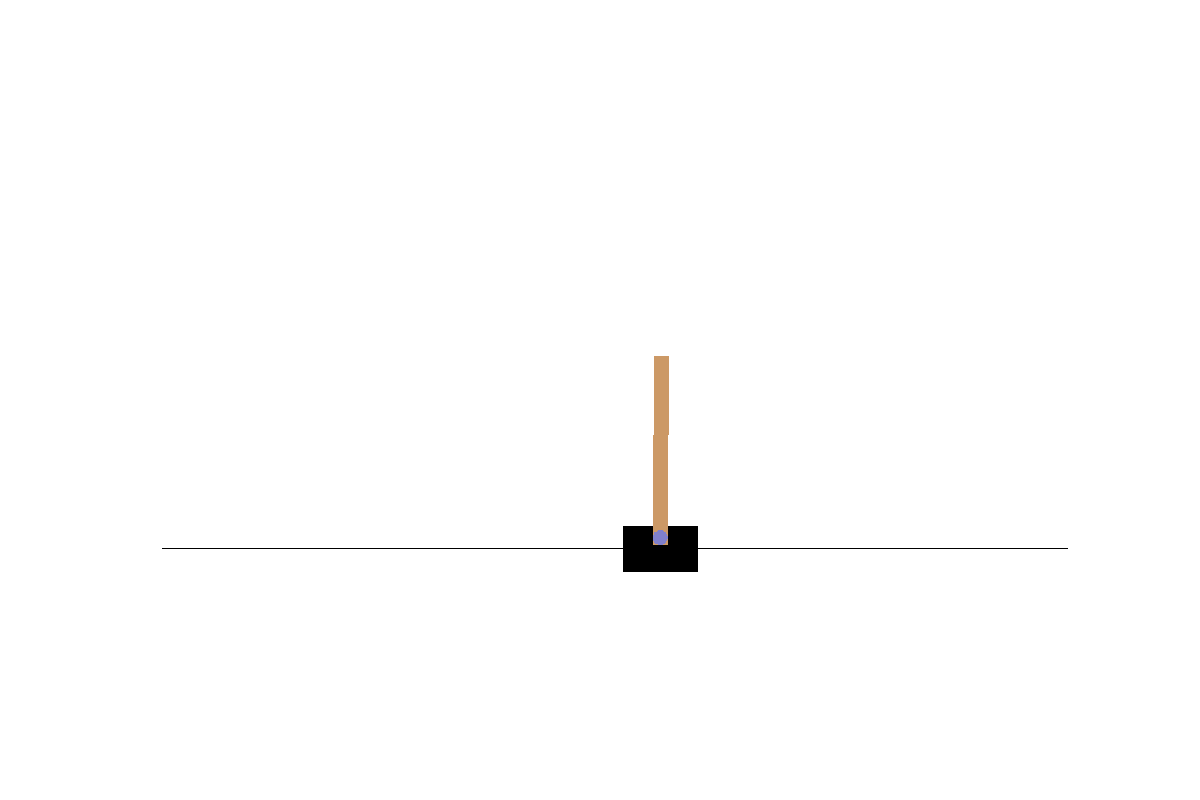
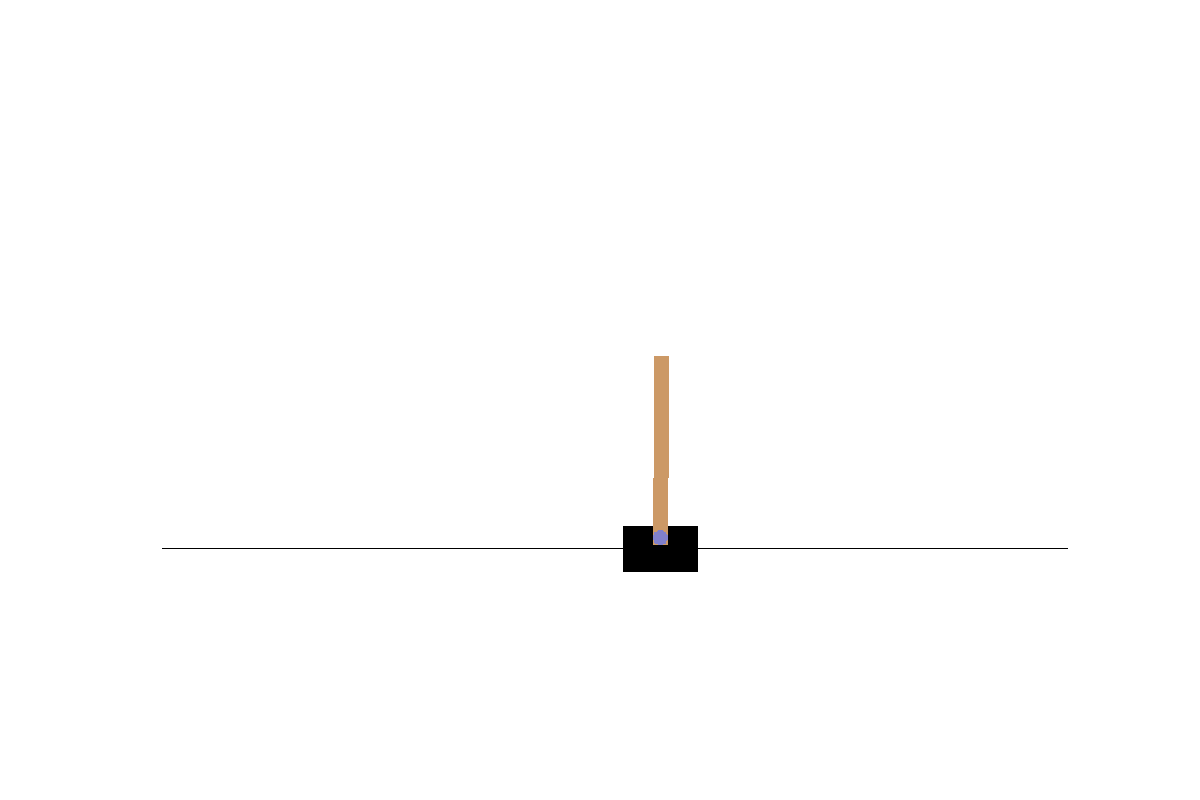
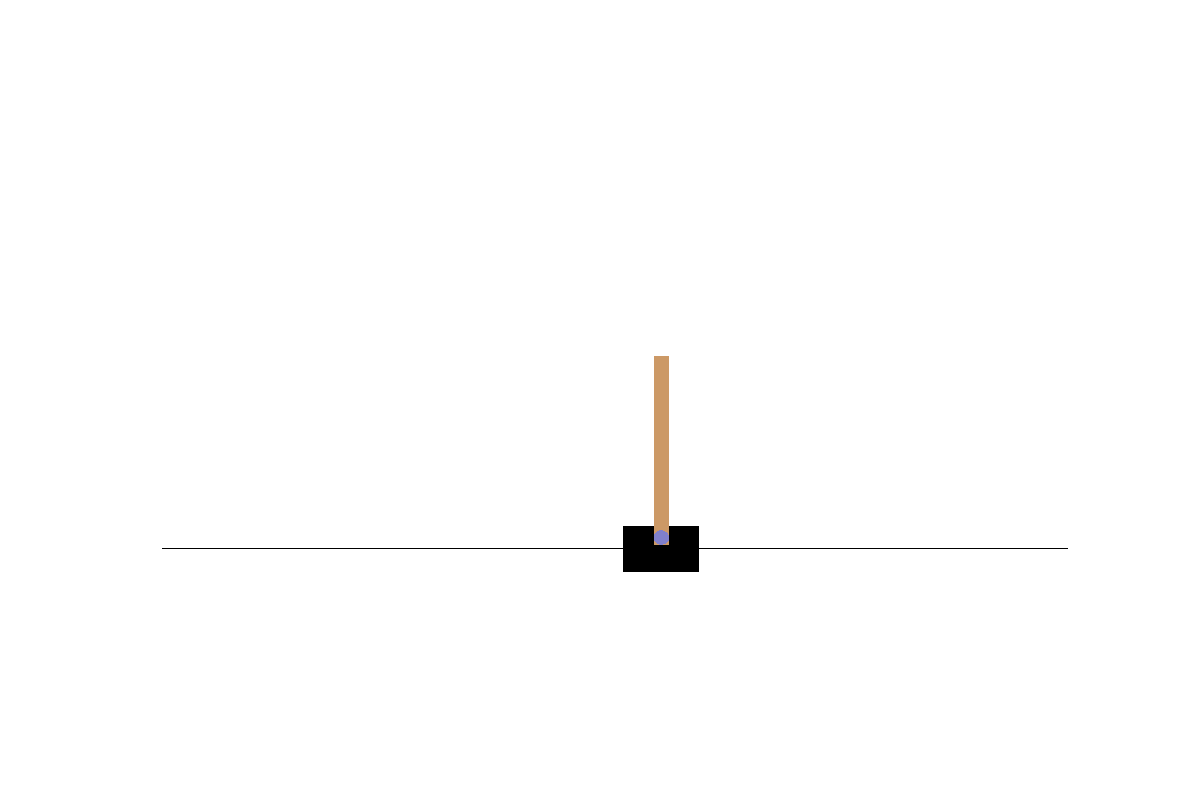
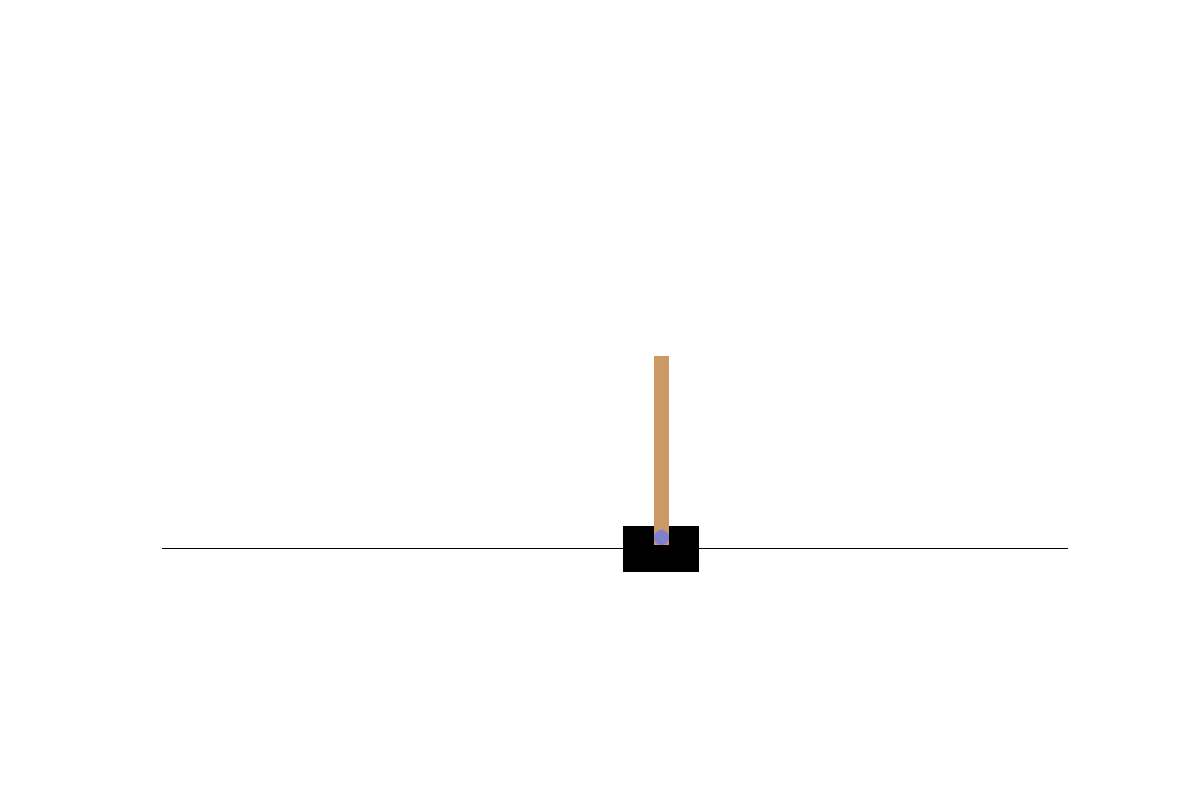
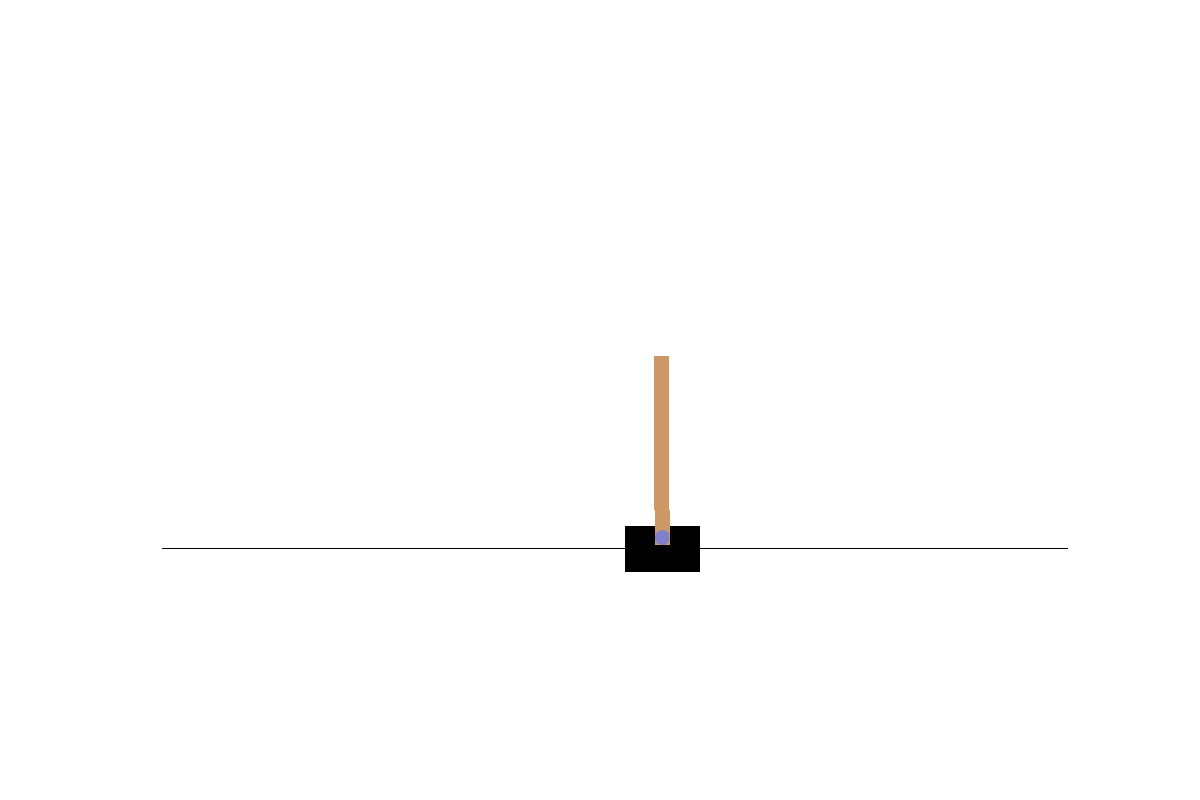
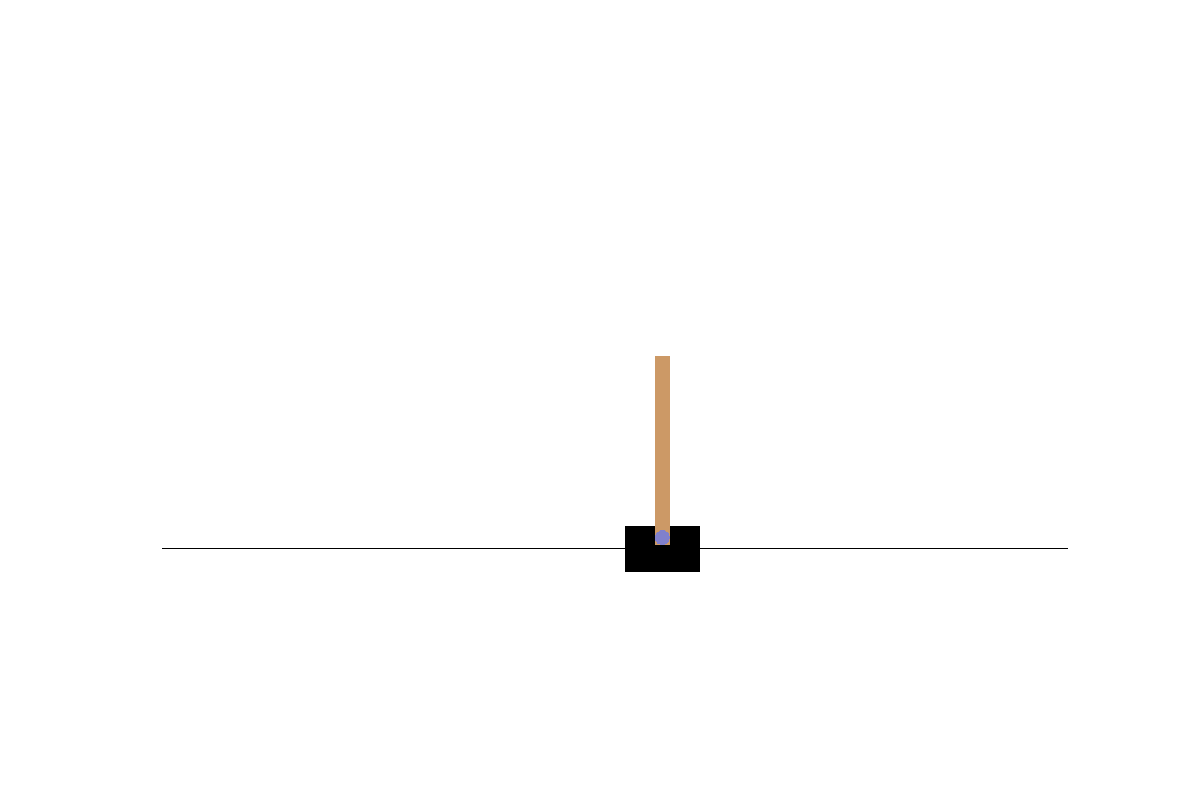
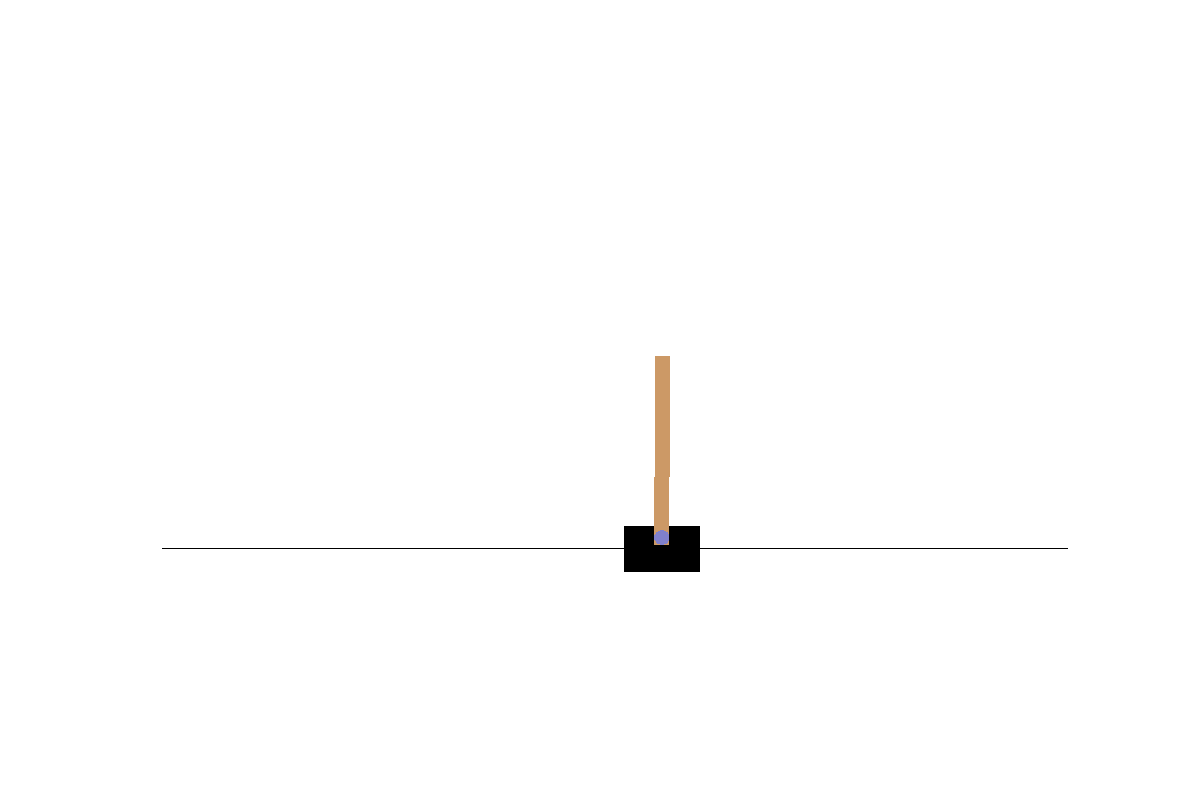
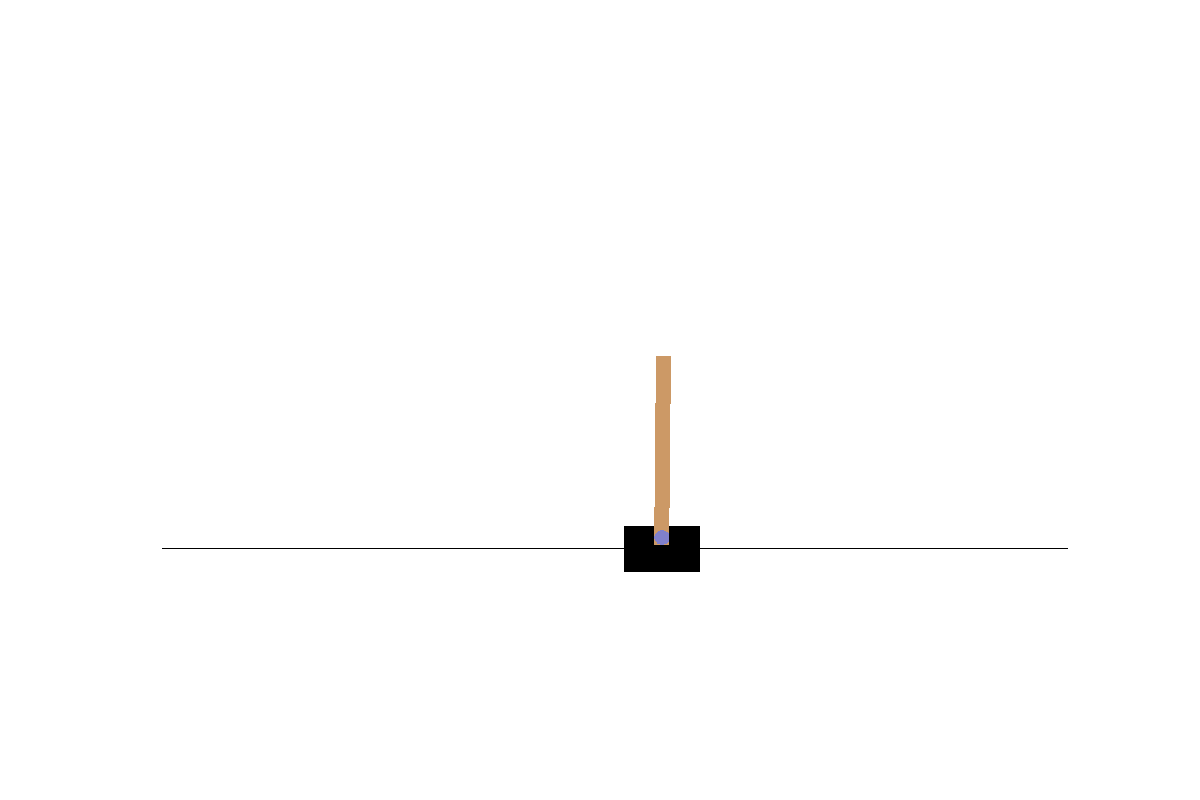
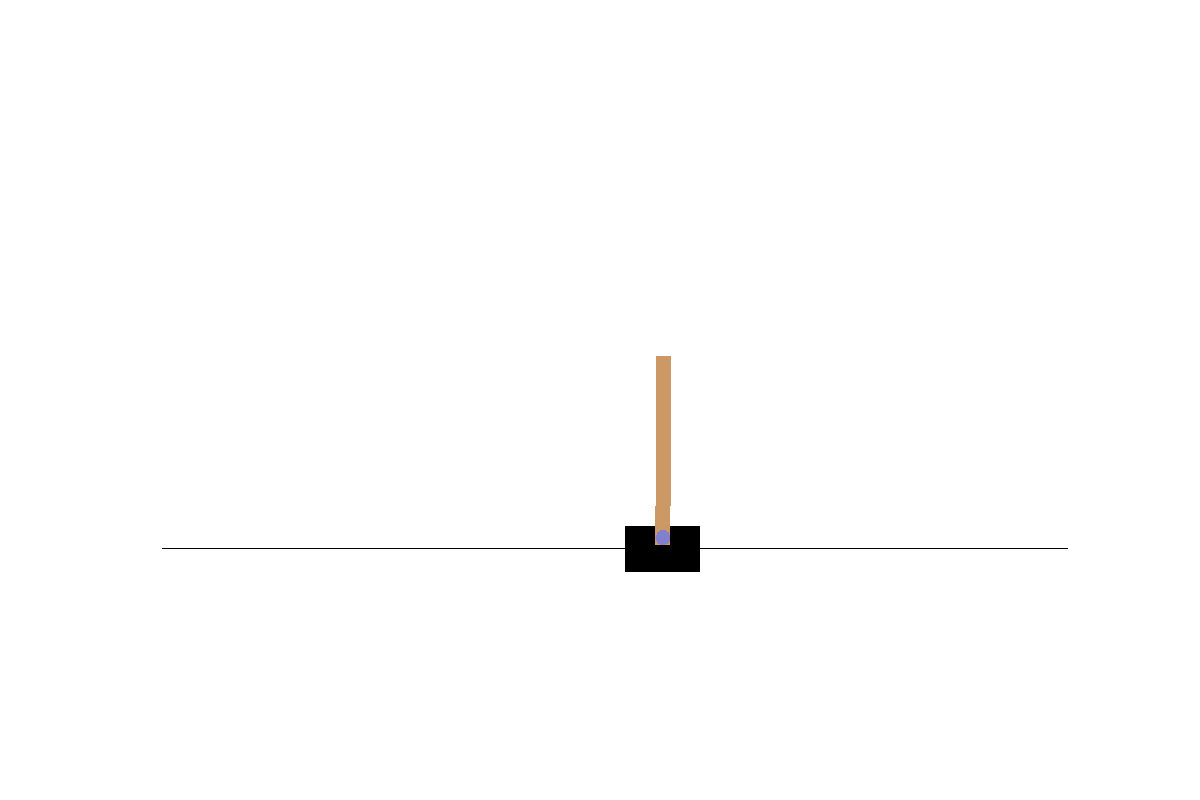
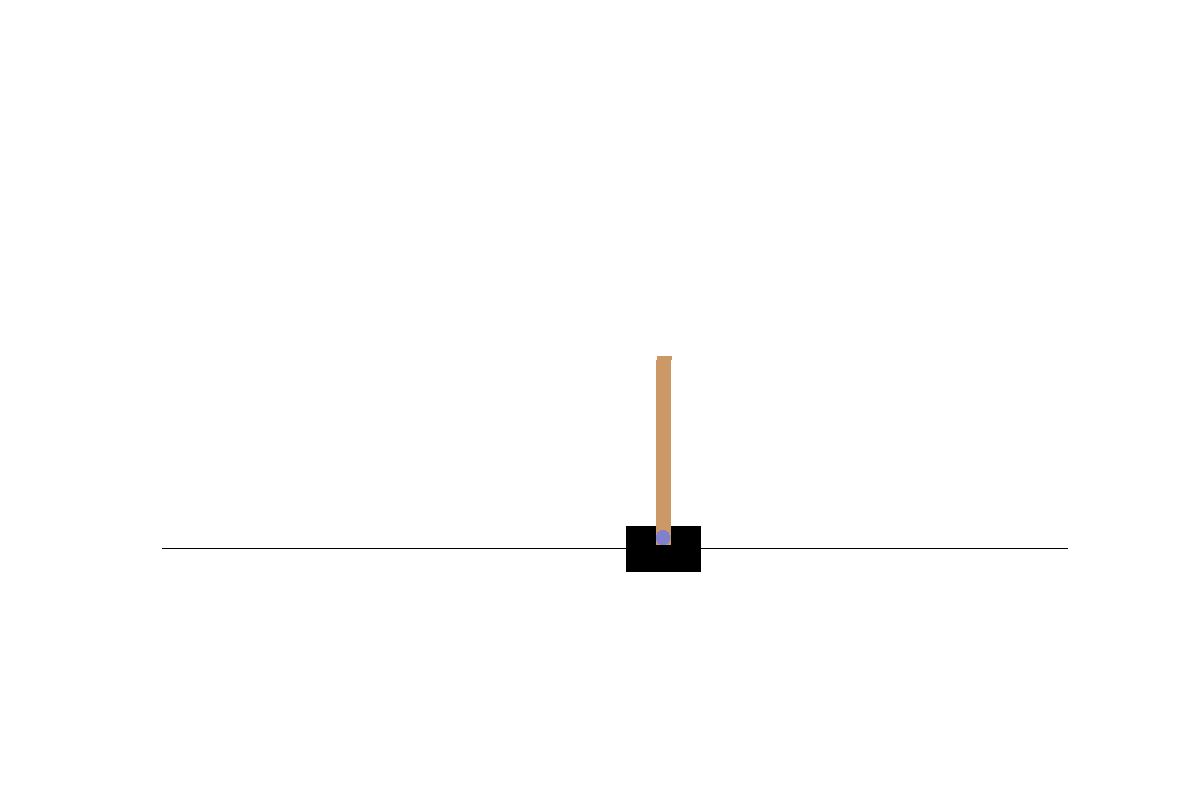
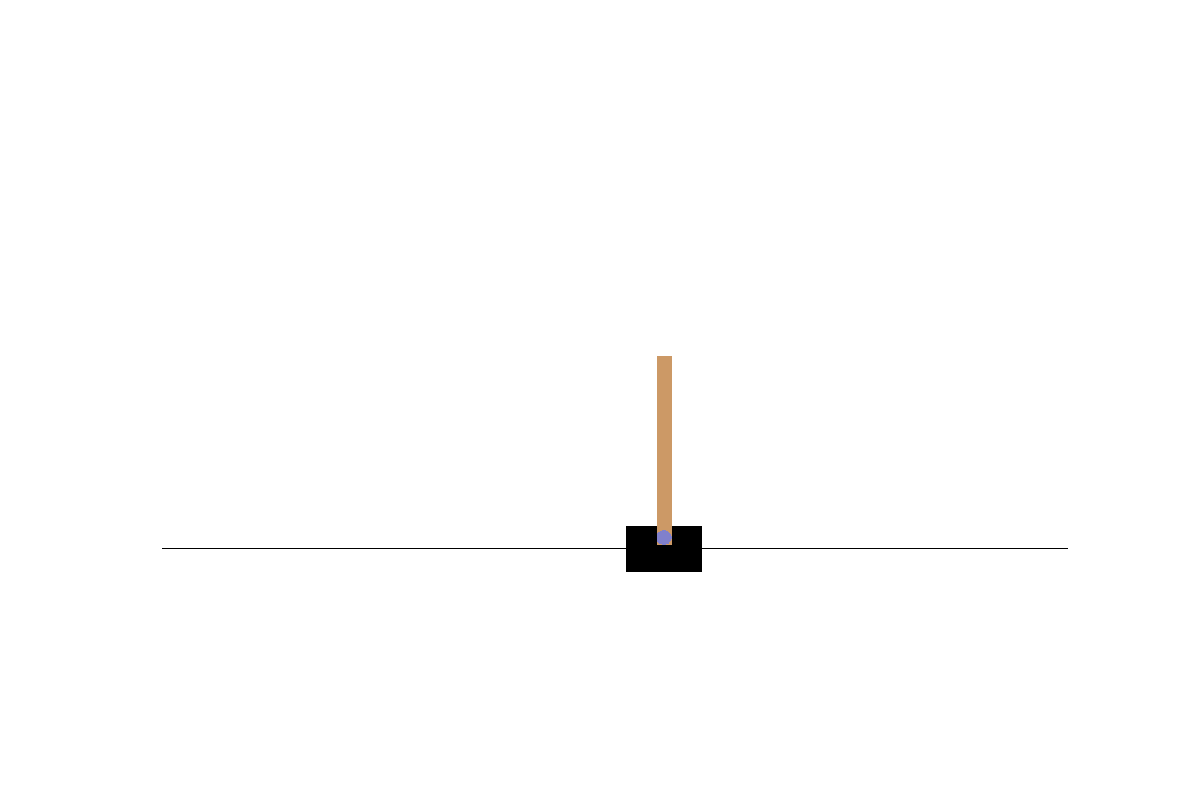
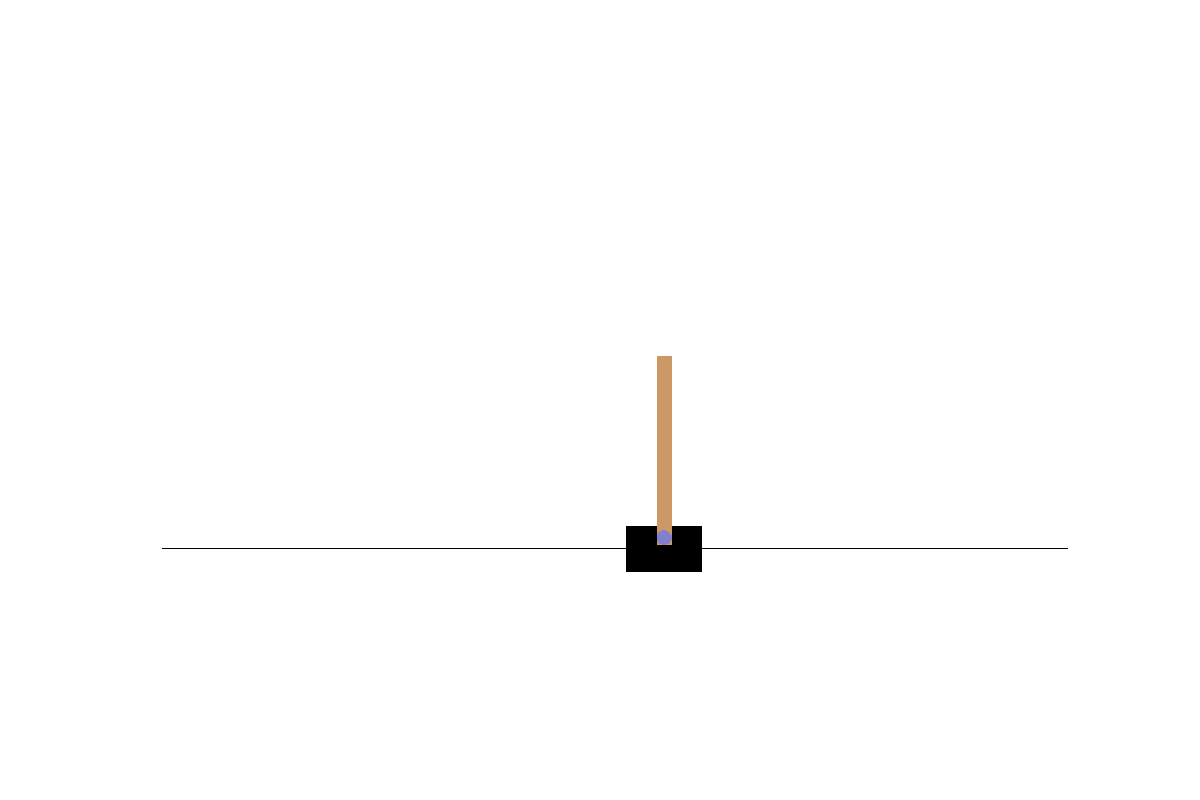
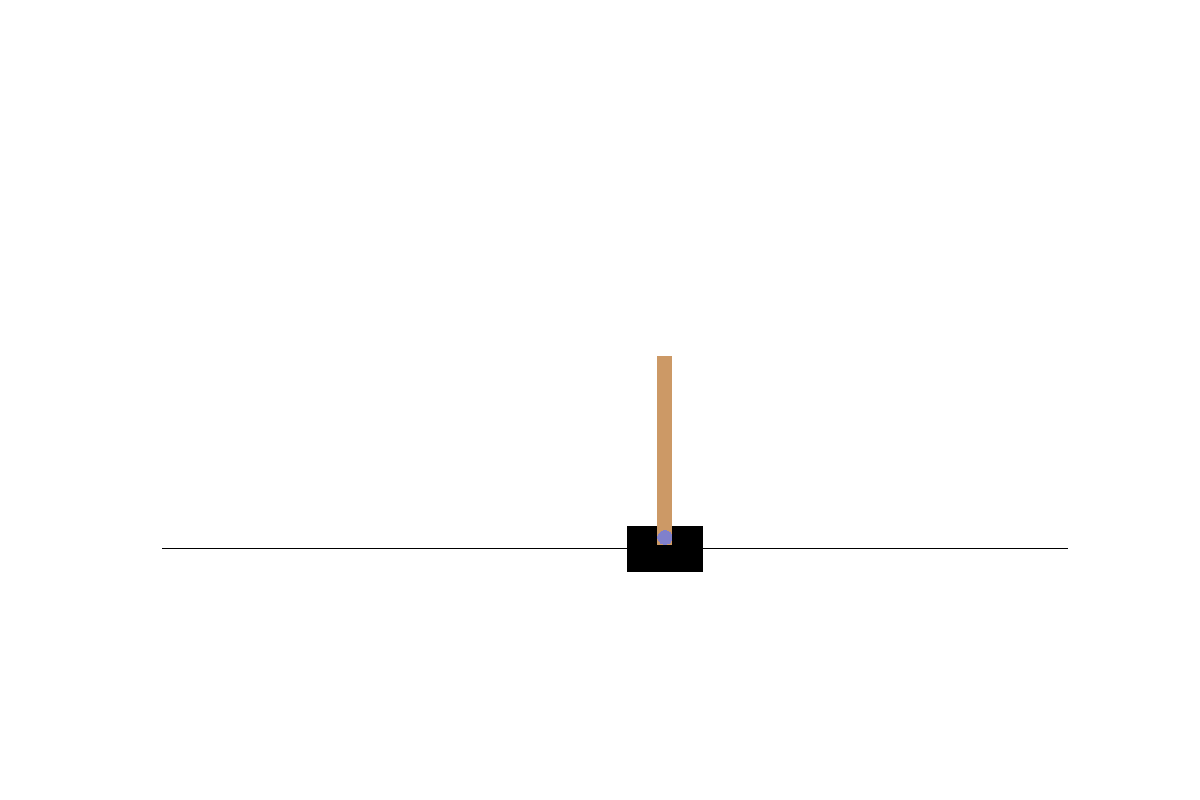

In [4]:
print('reward of one episode is ', agent.test(test_step=None))
env.animation.run()
q_network.save("ddqn_cartpole.h5")